In [4]:
# Kromofob = 0, papiller = 1, cc = 2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel

# random seed for reproducibility
np.random.seed(1)

number_of_features = 5
#Loading Data & Randomize 
df = pd.read_csv("bobrek_tumor_verileri.csv")
df = df.sample(frac = 1) 


In [5]:
#Split into input and output
X = np.array(df.drop(['subtip'],1))
y = np.array(df['subtip'])

df = df.drop(['subtip'],1)
feature_names = list(df.columns)

for i in range(61):
    if y[i] == 2:
        y[i] =0
        


In [6]:
#Normalization        
X = MinMaxScaler().fit_transform(X) 

Train on 48 samples, validate on 13 samples
Epoch 1/5000
48/48 [==============================] - 0s 3ms/step - loss: 0.6607 - accuracy: 0.6667 - val_loss: 0.6350 - val_accuracy: 0.6923
Epoch 2/5000
48/48 [==============================] - 0s 280us/step - loss: 0.6461 - accuracy: 0.6667 - val_loss: 0.6249 - val_accuracy: 0.6923
Epoch 3/5000
48/48 [==============================] - 0s 332us/step - loss: 0.6406 - accuracy: 0.6667 - val_loss: 0.6101 - val_accuracy: 0.6923
Epoch 4/5000
48/48 [==============================] - 0s 332us/step - loss: 0.6326 - accuracy: 0.6458 - val_loss: 0.5960 - val_accuracy: 0.6923
Epoch 5/5000
48/48 [==============================] - 0s 312us/step - loss: 0.6264 - accuracy: 0.6458 - val_loss: 0.5850 - val_accuracy: 0.6923
Epoch 6/5000
48/48 [==============================] - 0s 308us/step - loss: 0.6198 - accuracy: 0.6458 - val_loss: 0.5757 - val_accuracy: 0.6923
Epoch 7/5000
48/48 [==============================] - 0s 312us/step - loss: 0.6141 - accuracy:

48/48 [==============================] - 0s 205us/step - loss: 0.4202 - accuracy: 0.8125 - val_loss: 0.4125 - val_accuracy: 0.7692
Epoch 58/5000
48/48 [==============================] - 0s 213us/step - loss: 0.4125 - accuracy: 0.8125 - val_loss: 0.4187 - val_accuracy: 0.7692
Epoch 59/5000
48/48 [==============================] - 0s 208us/step - loss: 0.4084 - accuracy: 0.8125 - val_loss: 0.4247 - val_accuracy: 0.8462
Epoch 60/5000
48/48 [==============================] - 0s 197us/step - loss: 0.4061 - accuracy: 0.8125 - val_loss: 0.4302 - val_accuracy: 0.8462
Epoch 61/5000
48/48 [==============================] - 0s 232us/step - loss: 0.4028 - accuracy: 0.8333 - val_loss: 0.4163 - val_accuracy: 0.7692
Epoch 62/5000
48/48 [==============================] - 0s 241us/step - loss: 0.3968 - accuracy: 0.8125 - val_loss: 0.4148 - val_accuracy: 0.7692
Epoch 63/5000
48/48 [==============================] - 0s 229us/step - loss: 0.3941 - accuracy: 0.8333 - val_loss: 0.4240 - val_accuracy: 0.7692

48/48 [==============================] - 0s 249us/step - loss: 0.2357 - accuracy: 0.9375 - val_loss: 0.5665 - val_accuracy: 0.6154
Epoch 114/5000
48/48 [==============================] - 0s 208us/step - loss: 0.2381 - accuracy: 0.9375 - val_loss: 0.5429 - val_accuracy: 0.6923
Epoch 115/5000
48/48 [==============================] - 0s 217us/step - loss: 0.2310 - accuracy: 0.9375 - val_loss: 0.5725 - val_accuracy: 0.6154
Epoch 116/5000
48/48 [==============================] - 0s 229us/step - loss: 0.2286 - accuracy: 0.9583 - val_loss: 0.5833 - val_accuracy: 0.6154
Epoch 117/5000
48/48 [==============================] - 0s 209us/step - loss: 0.2262 - accuracy: 0.9375 - val_loss: 0.5760 - val_accuracy: 0.6154
Epoch 118/5000
48/48 [==============================] - 0s 234us/step - loss: 0.2228 - accuracy: 0.9583 - val_loss: 0.5579 - val_accuracy: 0.6154
Epoch 119/5000
48/48 [==============================] - 0s 249us/step - loss: 0.2235 - accuracy: 0.9375 - val_loss: 0.5505 - val_accuracy: 

48/48 [==============================] - 0s 220us/step - loss: 0.1214 - accuracy: 0.9792 - val_loss: 0.6285 - val_accuracy: 0.6154
Epoch 170/5000
48/48 [==============================] - 0s 242us/step - loss: 0.1197 - accuracy: 0.9792 - val_loss: 0.6395 - val_accuracy: 0.6154
Epoch 171/5000
48/48 [==============================] - 0s 229us/step - loss: 0.1179 - accuracy: 0.9792 - val_loss: 0.6429 - val_accuracy: 0.6154
Epoch 172/5000
48/48 [==============================] - 0s 229us/step - loss: 0.1159 - accuracy: 0.9792 - val_loss: 0.6229 - val_accuracy: 0.6154
Epoch 173/5000
48/48 [==============================] - 0s 229us/step - loss: 0.1143 - accuracy: 0.9792 - val_loss: 0.6185 - val_accuracy: 0.6923
Epoch 174/5000
48/48 [==============================] - 0s 224us/step - loss: 0.1130 - accuracy: 0.9792 - val_loss: 0.6227 - val_accuracy: 0.6154
Epoch 175/5000
48/48 [==============================] - 0s 202us/step - loss: 0.1153 - accuracy: 0.9792 - val_loss: 0.6466 - val_accuracy: 

48/48 [==============================] - 0s 381us/step - loss: 0.0604 - accuracy: 1.0000 - val_loss: 0.6483 - val_accuracy: 0.6154
Epoch 226/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0599 - accuracy: 1.0000 - val_loss: 0.6412 - val_accuracy: 0.6154
Epoch 227/5000
48/48 [==============================] - 0s 255us/step - loss: 0.0590 - accuracy: 1.0000 - val_loss: 0.6403 - val_accuracy: 0.6154
Epoch 228/5000
48/48 [==============================] - 0s 253us/step - loss: 0.0583 - accuracy: 1.0000 - val_loss: 0.6381 - val_accuracy: 0.6154
Epoch 229/5000
48/48 [==============================] - 0s 205us/step - loss: 0.0573 - accuracy: 1.0000 - val_loss: 0.6459 - val_accuracy: 0.6154
Epoch 230/5000
48/48 [==============================] - 0s 215us/step - loss: 0.0573 - accuracy: 1.0000 - val_loss: 0.6431 - val_accuracy: 0.6154
Epoch 231/5000
48/48 [==============================] - 0s 242us/step - loss: 0.0571 - accuracy: 0.9792 - val_loss: 0.6401 - val_accuracy: 

48/48 [==============================] - 0s 291us/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 0.7668 - val_accuracy: 0.6923
Epoch 282/5000
48/48 [==============================] - 0s 305us/step - loss: 0.0300 - accuracy: 1.0000 - val_loss: 0.7633 - val_accuracy: 0.6923
Epoch 283/5000
48/48 [==============================] - 0s 293us/step - loss: 0.0299 - accuracy: 1.0000 - val_loss: 0.7672 - val_accuracy: 0.6923
Epoch 284/5000
48/48 [==============================] - 0s 227us/step - loss: 0.0298 - accuracy: 1.0000 - val_loss: 0.7726 - val_accuracy: 0.6923
Epoch 285/5000
48/48 [==============================] - 0s 221us/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 0.7679 - val_accuracy: 0.6923
Epoch 286/5000
48/48 [==============================] - 0s 224us/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 0.7728 - val_accuracy: 0.6923
Epoch 287/5000
48/48 [==============================] - 0s 250us/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 0.7794 - val_accuracy: 

Epoch 337/5000
48/48 [==============================] - 0s 310us/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.9242 - val_accuracy: 0.6923
Epoch 338/5000
48/48 [==============================] - 0s 271us/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.9344 - val_accuracy: 0.6923
Epoch 339/5000
48/48 [==============================] - 0s 270us/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.9428 - val_accuracy: 0.6923
Epoch 340/5000
48/48 [==============================] - 0s 273us/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.9439 - val_accuracy: 0.6923
Epoch 341/5000
48/48 [==============================] - 0s 228us/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.9425 - val_accuracy: 0.6923
Epoch 342/5000
48/48 [==============================] - 0s 271us/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.9449 - val_accuracy: 0.6923
Epoch 343/5000
48/48 [==============================] - 0s 249us/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.9545 -

48/48 [==============================] - 0s 231us/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 1.0955 - val_accuracy: 0.6923
Epoch 394/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 1.0998 - val_accuracy: 0.6923
Epoch 395/5000
48/48 [==============================] - 0s 231us/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 1.1030 - val_accuracy: 0.6923
Epoch 396/5000
48/48 [==============================] - 0s 231us/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 1.1027 - val_accuracy: 0.6923
Epoch 397/5000
48/48 [==============================] - 0s 262us/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.1106 - val_accuracy: 0.6923
Epoch 398/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 1.1139 - val_accuracy: 0.6923
Epoch 399/5000
48/48 [==============================] - 0s 253us/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.1155 - val_accuracy: 

48/48 [==============================] - 0s 202us/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 1.2679 - val_accuracy: 0.6923
Epoch 450/5000
48/48 [==============================] - 0s 288us/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 1.2655 - val_accuracy: 0.6923
Epoch 451/5000
48/48 [==============================] - 0s 221us/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 1.2670 - val_accuracy: 0.6923
Epoch 452/5000
48/48 [==============================] - 0s 220us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.2700 - val_accuracy: 0.6923
Epoch 453/5000
48/48 [==============================] - 0s 230us/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.2716 - val_accuracy: 0.6923
Epoch 454/5000
48/48 [==============================] - 0s 210us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.2717 - val_accuracy: 0.6923
Epoch 455/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.2713 - val_accuracy: 

48/48 [==============================] - 0s 229us/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.3963 - val_accuracy: 0.6923
Epoch 506/5000
48/48 [==============================] - 0s 263us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.4030 - val_accuracy: 0.6923
Epoch 507/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.4039 - val_accuracy: 0.6923
Epoch 508/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.4009 - val_accuracy: 0.6923
Epoch 509/5000
48/48 [==============================] - 0s 221us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.4082 - val_accuracy: 0.6923
Epoch 510/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.4117 - val_accuracy: 0.6923
Epoch 511/5000
48/48 [==============================] - 0s 209us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.4157 - val_accuracy: 

48/48 [==============================] - 0s 208us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.5308 - val_accuracy: 0.6923
Epoch 562/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.5331 - val_accuracy: 0.6923
Epoch 563/5000
48/48 [==============================] - 0s 194us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.5322 - val_accuracy: 0.6923
Epoch 564/5000
48/48 [==============================] - 0s 186us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.5306 - val_accuracy: 0.6923
Epoch 565/5000
48/48 [==============================] - 0s 209us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.5339 - val_accuracy: 0.6923
Epoch 566/5000
48/48 [==============================] - 0s 214us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.5378 - val_accuracy: 0.6923
Epoch 567/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.5427 - val_accuracy: 

48/48 [==============================] - 0s 253us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.6387 - val_accuracy: 0.6923
Epoch 618/5000
48/48 [==============================] - 0s 210us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.6428 - val_accuracy: 0.6923
Epoch 619/5000
48/48 [==============================] - 0s 211us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.6456 - val_accuracy: 0.6923
Epoch 620/5000
48/48 [==============================] - 0s 215us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.6475 - val_accuracy: 0.6923
Epoch 621/5000
48/48 [==============================] - 0s 244us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.6465 - val_accuracy: 0.6923
Epoch 622/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.6530 - val_accuracy: 0.6923
Epoch 623/5000
48/48 [==============================] - 0s 213us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.6539 - val_accuracy: 

48/48 [==============================] - 0s 229us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.7607 - val_accuracy: 0.6923
Epoch 673/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.7610 - val_accuracy: 0.6923
Epoch 674/5000
48/48 [==============================] - 0s 221us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.7625 - val_accuracy: 0.6923
Epoch 675/5000
48/48 [==============================] - 0s 231us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.7598 - val_accuracy: 0.6923
Epoch 676/5000
48/48 [==============================] - 0s 200us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.7630 - val_accuracy: 0.6923
Epoch 677/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.7686 - val_accuracy: 0.6923
Epoch 678/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.7704 - val_accuracy: 

48/48 [==============================] - 0s 209us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.8623 - val_accuracy: 0.6923
Epoch 729/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.8675 - val_accuracy: 0.6923
Epoch 730/5000
48/48 [==============================] - 0s 258us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.8691 - val_accuracy: 0.6923
Epoch 731/5000
48/48 [==============================] - 0s 222us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.8696 - val_accuracy: 0.6923
Epoch 732/5000
48/48 [==============================] - 0s 223us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.8696 - val_accuracy: 0.6923
Epoch 733/5000
48/48 [==============================] - 0s 228us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.8726 - val_accuracy: 0.6923
Epoch 734/5000
48/48 [==============================] - 0s 255us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.8775 - val_accuracy: 

Epoch 784/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.9705 - val_accuracy: 0.6923
Epoch 785/5000
48/48 [==============================] - 0s 207us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.9743 - val_accuracy: 0.6923
Epoch 786/5000
48/48 [==============================] - 0s 231us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.9778 - val_accuracy: 0.6923
Epoch 787/5000
48/48 [==============================] - 0s 194us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.9810 - val_accuracy: 0.6923
Epoch 788/5000
48/48 [==============================] - 0s 222us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.9789 - val_accuracy: 0.6923
Epoch 789/5000
48/48 [==============================] - 0s 331us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.9821 - val_accuracy: 0.6923
Epoch 790/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.9830 -

Epoch 839/5000
48/48 [==============================] - 0s 197us/step - loss: 8.1801e-04 - accuracy: 1.0000 - val_loss: 2.0666 - val_accuracy: 0.6923
Epoch 840/5000
48/48 [==============================] - 0s 187us/step - loss: 8.1936e-04 - accuracy: 1.0000 - val_loss: 2.0691 - val_accuracy: 0.6923
Epoch 841/5000
48/48 [==============================] - 0s 194us/step - loss: 8.1589e-04 - accuracy: 1.0000 - val_loss: 2.0736 - val_accuracy: 0.6923
Epoch 842/5000
48/48 [==============================] - 0s 208us/step - loss: 8.1682e-04 - accuracy: 1.0000 - val_loss: 2.0766 - val_accuracy: 0.6923
Epoch 843/5000
48/48 [==============================] - 0s 206us/step - loss: 8.1087e-04 - accuracy: 1.0000 - val_loss: 2.0765 - val_accuracy: 0.6923
Epoch 844/5000
48/48 [==============================] - 0s 208us/step - loss: 8.0505e-04 - accuracy: 1.0000 - val_loss: 2.0769 - val_accuracy: 0.6923
Epoch 845/5000
48/48 [==============================] - 0s 228us/step - loss: 8.0707e-04 - accuracy:

48/48 [==============================] - 0s 249us/step - loss: 6.5364e-04 - accuracy: 1.0000 - val_loss: 2.1608 - val_accuracy: 0.6923
Epoch 894/5000
48/48 [==============================] - 0s 249us/step - loss: 6.5140e-04 - accuracy: 1.0000 - val_loss: 2.1651 - val_accuracy: 0.6923
Epoch 895/5000
48/48 [==============================] - 0s 228us/step - loss: 6.4719e-04 - accuracy: 1.0000 - val_loss: 2.1669 - val_accuracy: 0.6923
Epoch 896/5000
48/48 [==============================] - 0s 359us/step - loss: 6.4748e-04 - accuracy: 1.0000 - val_loss: 2.1668 - val_accuracy: 0.6923
Epoch 897/5000
48/48 [==============================] - 0s 233us/step - loss: 6.4429e-04 - accuracy: 1.0000 - val_loss: 2.1703 - val_accuracy: 0.6923
Epoch 898/5000
48/48 [==============================] - 0s 239us/step - loss: 6.4130e-04 - accuracy: 1.0000 - val_loss: 2.1705 - val_accuracy: 0.6923
Epoch 899/5000
48/48 [==============================] - 0s 249us/step - loss: 6.3893e-04 - accuracy: 1.0000 - val_l

Epoch 948/5000
48/48 [==============================] - 0s 202us/step - loss: 5.2584e-04 - accuracy: 1.0000 - val_loss: 2.2487 - val_accuracy: 0.6923
Epoch 949/5000
48/48 [==============================] - 0s 209us/step - loss: 5.2888e-04 - accuracy: 1.0000 - val_loss: 2.2544 - val_accuracy: 0.6923
Epoch 950/5000
48/48 [==============================] - 0s 208us/step - loss: 5.2107e-04 - accuracy: 1.0000 - val_loss: 2.2555 - val_accuracy: 0.6923
Epoch 951/5000
48/48 [==============================] - 0s 236us/step - loss: 5.2025e-04 - accuracy: 1.0000 - val_loss: 2.2558 - val_accuracy: 0.6923
Epoch 952/5000
48/48 [==============================] - 0s 204us/step - loss: 5.1748e-04 - accuracy: 1.0000 - val_loss: 2.2587 - val_accuracy: 0.6923
Epoch 953/5000
48/48 [==============================] - 0s 232us/step - loss: 5.1731e-04 - accuracy: 1.0000 - val_loss: 2.2585 - val_accuracy: 0.6923
Epoch 954/5000
48/48 [==============================] - 0s 227us/step - loss: 5.1405e-04 - accuracy:

48/48 [==============================] - 0s 386us/step - loss: 4.3062e-04 - accuracy: 1.0000 - val_loss: 2.3462 - val_accuracy: 0.6923
Epoch 1003/5000
48/48 [==============================] - 0s 249us/step - loss: 4.2746e-04 - accuracy: 1.0000 - val_loss: 2.3469 - val_accuracy: 0.6923
Epoch 1004/5000
48/48 [==============================] - 0s 214us/step - loss: 4.2439e-04 - accuracy: 1.0000 - val_loss: 2.3468 - val_accuracy: 0.6923
Epoch 1005/5000
48/48 [==============================] - 0s 206us/step - loss: 4.2470e-04 - accuracy: 1.0000 - val_loss: 2.3458 - val_accuracy: 0.6923
Epoch 1006/5000
48/48 [==============================] - 0s 249us/step - loss: 4.2374e-04 - accuracy: 1.0000 - val_loss: 2.3466 - val_accuracy: 0.6923
Epoch 1007/5000
48/48 [==============================] - 0s 249us/step - loss: 4.2090e-04 - accuracy: 1.0000 - val_loss: 2.3477 - val_accuracy: 0.6923
Epoch 1008/5000
48/48 [==============================] - 0s 229us/step - loss: 4.2202e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 3.4949e-04 - accuracy: 1.0000 - val_loss: 2.4277 - val_accuracy: 0.6923
Epoch 1057/5000
48/48 [==============================] - 0s 225us/step - loss: 3.4852e-04 - accuracy: 1.0000 - val_loss: 2.4288 - val_accuracy: 0.6923
Epoch 1058/5000
48/48 [==============================] - 0s 374us/step - loss: 3.4593e-04 - accuracy: 1.0000 - val_loss: 2.4299 - val_accuracy: 0.6923
Epoch 1059/5000
48/48 [==============================] - 0s 229us/step - loss: 3.4503e-04 - accuracy: 1.0000 - val_loss: 2.4298 - val_accuracy: 0.6923
Epoch 1060/5000
48/48 [==============================] - 0s 268us/step - loss: 3.4610e-04 - accuracy: 1.0000 - val_loss: 2.4327 - val_accuracy: 0.6923
Epoch 1061/5000
48/48 [==============================] - 0s 228us/step - loss: 3.4337e-04 - accuracy: 1.0000 - val_loss: 2.4348 - val_accuracy: 0.6923
Epoch 1062/5000
48/48 [==============================] - 0s 228us/step - loss: 3.4276e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 270us/step - loss: 2.8651e-04 - accuracy: 1.0000 - val_loss: 2.5100 - val_accuracy: 0.6923
Epoch 1111/5000
48/48 [==============================] - 0s 232us/step - loss: 2.8738e-04 - accuracy: 1.0000 - val_loss: 2.5122 - val_accuracy: 0.6923
Epoch 1112/5000
48/48 [==============================] - 0s 220us/step - loss: 2.8612e-04 - accuracy: 1.0000 - val_loss: 2.5155 - val_accuracy: 0.6923
Epoch 1113/5000
48/48 [==============================] - 0s 229us/step - loss: 2.8536e-04 - accuracy: 1.0000 - val_loss: 2.5182 - val_accuracy: 0.6923
Epoch 1114/5000
48/48 [==============================] - 0s 229us/step - loss: 2.8305e-04 - accuracy: 1.0000 - val_loss: 2.5217 - val_accuracy: 0.6923
Epoch 1115/5000
48/48 [==============================] - 0s 240us/step - loss: 2.8210e-04 - accuracy: 1.0000 - val_loss: 2.5265 - val_accuracy: 0.6923
Epoch 1116/5000
48/48 [==============================] - 0s 231us/step - loss: 2.8114e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 270us/step - loss: 2.3649e-04 - accuracy: 1.0000 - val_loss: 2.5985 - val_accuracy: 0.6923
Epoch 1165/5000
48/48 [==============================] - 0s 298us/step - loss: 2.3584e-04 - accuracy: 1.0000 - val_loss: 2.5977 - val_accuracy: 0.6923
Epoch 1166/5000
48/48 [==============================] - 0s 264us/step - loss: 2.3566e-04 - accuracy: 1.0000 - val_loss: 2.5986 - val_accuracy: 0.6923
Epoch 1167/5000
48/48 [==============================] - 0s 308us/step - loss: 2.3666e-04 - accuracy: 1.0000 - val_loss: 2.5998 - val_accuracy: 0.6923
Epoch 1168/5000
48/48 [==============================] - 0s 290us/step - loss: 2.3437e-04 - accuracy: 1.0000 - val_loss: 2.6022 - val_accuracy: 0.6923
Epoch 1169/5000
48/48 [==============================] - 0s 252us/step - loss: 2.3329e-04 - accuracy: 1.0000 - val_loss: 2.6019 - val_accuracy: 0.6923
Epoch 1170/5000
48/48 [==============================] - 0s 332us/step - loss: 2.3307e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 228us/step - loss: 1.9863e-04 - accuracy: 1.0000 - val_loss: 2.6773 - val_accuracy: 0.6923
Epoch 1219/5000
48/48 [==============================] - 0s 208us/step - loss: 1.9606e-04 - accuracy: 1.0000 - val_loss: 2.6760 - val_accuracy: 0.6923
Epoch 1220/5000
48/48 [==============================] - 0s 192us/step - loss: 1.9565e-04 - accuracy: 1.0000 - val_loss: 2.6788 - val_accuracy: 0.6923
Epoch 1221/5000
48/48 [==============================] - 0s 209us/step - loss: 1.9610e-04 - accuracy: 1.0000 - val_loss: 2.6811 - val_accuracy: 0.6923
Epoch 1222/5000
48/48 [==============================] - 0s 249us/step - loss: 1.9442e-04 - accuracy: 1.0000 - val_loss: 2.6844 - val_accuracy: 0.6923
Epoch 1223/5000
48/48 [==============================] - 0s 214us/step - loss: 1.9284e-04 - accuracy: 1.0000 - val_loss: 2.6881 - val_accuracy: 0.6923
Epoch 1224/5000
48/48 [==============================] - 0s 223us/step - loss: 1.9225e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 330us/step - loss: 1.6325e-04 - accuracy: 1.0000 - val_loss: 2.7563 - val_accuracy: 0.6923
Epoch 1273/5000
48/48 [==============================] - 0s 253us/step - loss: 1.6255e-04 - accuracy: 1.0000 - val_loss: 2.7616 - val_accuracy: 0.6923
Epoch 1274/5000
48/48 [==============================] - 0s 211us/step - loss: 1.6325e-04 - accuracy: 1.0000 - val_loss: 2.7630 - val_accuracy: 0.6923
Epoch 1275/5000
48/48 [==============================] - 0s 235us/step - loss: 1.6428e-04 - accuracy: 1.0000 - val_loss: 2.7624 - val_accuracy: 0.6923
Epoch 1276/5000
48/48 [==============================] - 0s 229us/step - loss: 1.6154e-04 - accuracy: 1.0000 - val_loss: 2.7648 - val_accuracy: 0.6923
Epoch 1277/5000
48/48 [==============================] - 0s 203us/step - loss: 1.6172e-04 - accuracy: 1.0000 - val_loss: 2.7714 - val_accuracy: 0.6923
Epoch 1278/5000
48/48 [==============================] - 0s 220us/step - loss: 1.6095e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 227us/step - loss: 1.3678e-04 - accuracy: 1.0000 - val_loss: 2.8360 - val_accuracy: 0.6923
Epoch 1327/5000
48/48 [==============================] - 0s 229us/step - loss: 1.3661e-04 - accuracy: 1.0000 - val_loss: 2.8404 - val_accuracy: 0.6923
Epoch 1328/5000
48/48 [==============================] - 0s 208us/step - loss: 1.3575e-04 - accuracy: 1.0000 - val_loss: 2.8430 - val_accuracy: 0.6923
Epoch 1329/5000
48/48 [==============================] - 0s 229us/step - loss: 1.3550e-04 - accuracy: 1.0000 - val_loss: 2.8407 - val_accuracy: 0.6923
Epoch 1330/5000
48/48 [==============================] - 0s 188us/step - loss: 1.3407e-04 - accuracy: 1.0000 - val_loss: 2.8422 - val_accuracy: 0.6923
Epoch 1331/5000
48/48 [==============================] - 0s 250us/step - loss: 1.3426e-04 - accuracy: 1.0000 - val_loss: 2.8430 - val_accuracy: 0.6923
Epoch 1332/5000
48/48 [==============================] - 0s 206us/step - loss: 1.3319e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 227us/step - loss: 1.1402e-04 - accuracy: 1.0000 - val_loss: 2.9220 - val_accuracy: 0.6923
Epoch 1381/5000
48/48 [==============================] - 0s 220us/step - loss: 1.1518e-04 - accuracy: 1.0000 - val_loss: 2.9200 - val_accuracy: 0.6923
Epoch 1382/5000
48/48 [==============================] - 0s 250us/step - loss: 1.1377e-04 - accuracy: 1.0000 - val_loss: 2.9250 - val_accuracy: 0.6923
Epoch 1383/5000
48/48 [==============================] - 0s 204us/step - loss: 1.1304e-04 - accuracy: 1.0000 - val_loss: 2.9280 - val_accuracy: 0.6923
Epoch 1384/5000
48/48 [==============================] - 0s 206us/step - loss: 1.1325e-04 - accuracy: 1.0000 - val_loss: 2.9300 - val_accuracy: 0.6923
Epoch 1385/5000
48/48 [==============================] - 0s 254us/step - loss: 1.1227e-04 - accuracy: 1.0000 - val_loss: 2.9296 - val_accuracy: 0.6923
Epoch 1386/5000
48/48 [==============================] - 0s 226us/step - loss: 1.1178e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 287us/step - loss: 9.5659e-05 - accuracy: 1.0000 - val_loss: 2.9992 - val_accuracy: 0.6923
Epoch 1435/5000
48/48 [==============================] - 0s 207us/step - loss: 9.5335e-05 - accuracy: 1.0000 - val_loss: 3.0020 - val_accuracy: 0.6923
Epoch 1436/5000
48/48 [==============================] - 0s 217us/step - loss: 9.6071e-05 - accuracy: 1.0000 - val_loss: 3.0096 - val_accuracy: 0.6923
Epoch 1437/5000
48/48 [==============================] - 0s 270us/step - loss: 9.4592e-05 - accuracy: 1.0000 - val_loss: 3.0043 - val_accuracy: 0.6923
Epoch 1438/5000
48/48 [==============================] - 0s 249us/step - loss: 9.4821e-05 - accuracy: 1.0000 - val_loss: 3.0011 - val_accuracy: 0.6923
Epoch 1439/5000
48/48 [==============================] - 0s 253us/step - loss: 9.4961e-05 - accuracy: 1.0000 - val_loss: 3.0009 - val_accuracy: 0.6923
Epoch 1440/5000
48/48 [==============================] - 0s 184us/step - loss: 9.3515e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 230us/step - loss: 8.0461e-05 - accuracy: 1.0000 - val_loss: 3.0741 - val_accuracy: 0.6923
Epoch 1489/5000
48/48 [==============================] - 0s 228us/step - loss: 8.0025e-05 - accuracy: 1.0000 - val_loss: 3.0784 - val_accuracy: 0.6923
Epoch 1490/5000
48/48 [==============================] - 0s 221us/step - loss: 7.9800e-05 - accuracy: 1.0000 - val_loss: 3.0825 - val_accuracy: 0.6923
Epoch 1491/5000
48/48 [==============================] - 0s 264us/step - loss: 7.9917e-05 - accuracy: 1.0000 - val_loss: 3.0851 - val_accuracy: 0.6923
Epoch 1492/5000
48/48 [==============================] - 0s 229us/step - loss: 7.9786e-05 - accuracy: 1.0000 - val_loss: 3.0837 - val_accuracy: 0.6923
Epoch 1493/5000
48/48 [==============================] - 0s 183us/step - loss: 7.9247e-05 - accuracy: 1.0000 - val_loss: 3.0832 - val_accuracy: 0.6923
Epoch 1494/5000
48/48 [==============================] - 0s 243us/step - loss: 7.8897e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 311us/step - loss: 6.7577e-05 - accuracy: 1.0000 - val_loss: 3.1630 - val_accuracy: 0.6154
Epoch 1543/5000
48/48 [==============================] - 0s 229us/step - loss: 6.7621e-05 - accuracy: 1.0000 - val_loss: 3.1616 - val_accuracy: 0.6154
Epoch 1544/5000
48/48 [==============================] - 0s 208us/step - loss: 6.7173e-05 - accuracy: 1.0000 - val_loss: 3.1625 - val_accuracy: 0.6154
Epoch 1545/5000
48/48 [==============================] - 0s 209us/step - loss: 6.6929e-05 - accuracy: 1.0000 - val_loss: 3.1663 - val_accuracy: 0.6154
Epoch 1546/5000
48/48 [==============================] - 0s 204us/step - loss: 6.6889e-05 - accuracy: 1.0000 - val_loss: 3.1661 - val_accuracy: 0.6154
Epoch 1547/5000
48/48 [==============================] - 0s 228us/step - loss: 6.6840e-05 - accuracy: 1.0000 - val_loss: 3.1715 - val_accuracy: 0.6154
Epoch 1548/5000
48/48 [==============================] - 0s 243us/step - loss: 6.6456e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 5.7205e-05 - accuracy: 1.0000 - val_loss: 3.2441 - val_accuracy: 0.6154
Epoch 1597/5000
48/48 [==============================] - 0s 228us/step - loss: 5.7105e-05 - accuracy: 1.0000 - val_loss: 3.2413 - val_accuracy: 0.6154
Epoch 1598/5000
48/48 [==============================] - 0s 238us/step - loss: 5.6782e-05 - accuracy: 1.0000 - val_loss: 3.2423 - val_accuracy: 0.6154
Epoch 1599/5000
48/48 [==============================] - 0s 208us/step - loss: 5.6640e-05 - accuracy: 1.0000 - val_loss: 3.2486 - val_accuracy: 0.6154
Epoch 1600/5000
48/48 [==============================] - 0s 166us/step - loss: 5.6469e-05 - accuracy: 1.0000 - val_loss: 3.2475 - val_accuracy: 0.6154
Epoch 1601/5000
48/48 [==============================] - 0s 231us/step - loss: 5.6187e-05 - accuracy: 1.0000 - val_loss: 3.2485 - val_accuracy: 0.6154
Epoch 1602/5000
48/48 [==============================] - 0s 224us/step - loss: 5.6311e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 291us/step - loss: 4.8306e-05 - accuracy: 1.0000 - val_loss: 3.3273 - val_accuracy: 0.6154
Epoch 1651/5000
48/48 [==============================] - 0s 247us/step - loss: 4.8132e-05 - accuracy: 1.0000 - val_loss: 3.3232 - val_accuracy: 0.6154
Epoch 1652/5000
48/48 [==============================] - 0s 248us/step - loss: 4.8007e-05 - accuracy: 1.0000 - val_loss: 3.3228 - val_accuracy: 0.6154
Epoch 1653/5000
48/48 [==============================] - 0s 197us/step - loss: 4.7892e-05 - accuracy: 1.0000 - val_loss: 3.3265 - val_accuracy: 0.6154
Epoch 1654/5000
48/48 [==============================] - 0s 231us/step - loss: 4.7473e-05 - accuracy: 1.0000 - val_loss: 3.3267 - val_accuracy: 0.6154
Epoch 1655/5000
48/48 [==============================] - 0s 229us/step - loss: 4.7465e-05 - accuracy: 1.0000 - val_loss: 3.3276 - val_accuracy: 0.6154
Epoch 1656/5000
48/48 [==============================] - 0s 251us/step - loss: 4.7386e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 4.0708e-05 - accuracy: 1.0000 - val_loss: 3.4065 - val_accuracy: 0.6154
Epoch 1705/5000
48/48 [==============================] - 0s 228us/step - loss: 4.0551e-05 - accuracy: 1.0000 - val_loss: 3.4085 - val_accuracy: 0.6154
Epoch 1706/5000
48/48 [==============================] - 0s 215us/step - loss: 4.0453e-05 - accuracy: 1.0000 - val_loss: 3.4109 - val_accuracy: 0.6154
Epoch 1707/5000
48/48 [==============================] - 0s 270us/step - loss: 4.0561e-05 - accuracy: 1.0000 - val_loss: 3.4136 - val_accuracy: 0.6154
Epoch 1708/5000
48/48 [==============================] - 0s 231us/step - loss: 4.0453e-05 - accuracy: 1.0000 - val_loss: 3.4172 - val_accuracy: 0.6154
Epoch 1709/5000
48/48 [==============================] - 0s 206us/step - loss: 4.0206e-05 - accuracy: 1.0000 - val_loss: 3.4184 - val_accuracy: 0.6154
Epoch 1710/5000
48/48 [==============================] - 0s 285us/step - loss: 4.0098e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 3.4534e-05 - accuracy: 1.0000 - val_loss: 3.4866 - val_accuracy: 0.6154
Epoch 1759/5000
48/48 [==============================] - 0s 285us/step - loss: 3.4563e-05 - accuracy: 1.0000 - val_loss: 3.4925 - val_accuracy: 0.6154
Epoch 1760/5000
48/48 [==============================] - 0s 224us/step - loss: 3.4560e-05 - accuracy: 1.0000 - val_loss: 3.4856 - val_accuracy: 0.6154
Epoch 1761/5000
48/48 [==============================] - 0s 214us/step - loss: 3.4221e-05 - accuracy: 1.0000 - val_loss: 3.4865 - val_accuracy: 0.6154
Epoch 1762/5000
48/48 [==============================] - 0s 249us/step - loss: 3.4121e-05 - accuracy: 1.0000 - val_loss: 3.4883 - val_accuracy: 0.6154
Epoch 1763/5000
48/48 [==============================] - 0s 250us/step - loss: 3.3972e-05 - accuracy: 1.0000 - val_loss: 3.4968 - val_accuracy: 0.6154
Epoch 1764/5000
48/48 [==============================] - 0s 300us/step - loss: 3.3895e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 231us/step - loss: 2.9390e-05 - accuracy: 1.0000 - val_loss: 3.5601 - val_accuracy: 0.6154
Epoch 1813/5000
48/48 [==============================] - 0s 231us/step - loss: 2.9244e-05 - accuracy: 1.0000 - val_loss: 3.5646 - val_accuracy: 0.6154
Epoch 1814/5000
48/48 [==============================] - 0s 272us/step - loss: 2.9097e-05 - accuracy: 1.0000 - val_loss: 3.5683 - val_accuracy: 0.6154
Epoch 1815/5000
48/48 [==============================] - 0s 207us/step - loss: 2.9045e-05 - accuracy: 1.0000 - val_loss: 3.5720 - val_accuracy: 0.6154
Epoch 1816/5000
48/48 [==============================] - 0s 213us/step - loss: 2.8860e-05 - accuracy: 1.0000 - val_loss: 3.5759 - val_accuracy: 0.6154
Epoch 1817/5000
48/48 [==============================] - 0s 249us/step - loss: 2.8863e-05 - accuracy: 1.0000 - val_loss: 3.5780 - val_accuracy: 0.6154
Epoch 1818/5000
48/48 [==============================] - 0s 283us/step - loss: 2.8864e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 227us/step - loss: 2.4826e-05 - accuracy: 1.0000 - val_loss: 3.6458 - val_accuracy: 0.6154
Epoch 1867/5000
48/48 [==============================] - 0s 245us/step - loss: 2.4768e-05 - accuracy: 1.0000 - val_loss: 3.6471 - val_accuracy: 0.6154
Epoch 1868/5000
48/48 [==============================] - 0s 190us/step - loss: 2.4710e-05 - accuracy: 1.0000 - val_loss: 3.6519 - val_accuracy: 0.6154
Epoch 1869/5000
48/48 [==============================] - 0s 303us/step - loss: 2.4593e-05 - accuracy: 1.0000 - val_loss: 3.6510 - val_accuracy: 0.6154
Epoch 1870/5000
48/48 [==============================] - 0s 187us/step - loss: 2.4528e-05 - accuracy: 1.0000 - val_loss: 3.6513 - val_accuracy: 0.6154
Epoch 1871/5000
48/48 [==============================] - 0s 219us/step - loss: 2.4502e-05 - accuracy: 1.0000 - val_loss: 3.6573 - val_accuracy: 0.6154
Epoch 1872/5000
48/48 [==============================] - 0s 218us/step - loss: 2.4580e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 211us/step - loss: 2.1189e-05 - accuracy: 1.0000 - val_loss: 3.7228 - val_accuracy: 0.6154
Epoch 1921/5000
48/48 [==============================] - 0s 204us/step - loss: 2.1089e-05 - accuracy: 1.0000 - val_loss: 3.7271 - val_accuracy: 0.6154
Epoch 1922/5000
48/48 [==============================] - 0s 249us/step - loss: 2.0976e-05 - accuracy: 1.0000 - val_loss: 3.7261 - val_accuracy: 0.6154
Epoch 1923/5000
48/48 [==============================] - 0s 296us/step - loss: 2.0909e-05 - accuracy: 1.0000 - val_loss: 3.7284 - val_accuracy: 0.6154
Epoch 1924/5000
48/48 [==============================] - 0s 314us/step - loss: 2.0836e-05 - accuracy: 1.0000 - val_loss: 3.7322 - val_accuracy: 0.6154
Epoch 1925/5000
48/48 [==============================] - 0s 240us/step - loss: 2.0780e-05 - accuracy: 1.0000 - val_loss: 3.7349 - val_accuracy: 0.6154
Epoch 1926/5000
48/48 [==============================] - 0s 166us/step - loss: 2.0689e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 274us/step - loss: 1.7945e-05 - accuracy: 1.0000 - val_loss: 3.7958 - val_accuracy: 0.6154
Epoch 1975/5000
48/48 [==============================] - 0s 208us/step - loss: 1.7855e-05 - accuracy: 1.0000 - val_loss: 3.7981 - val_accuracy: 0.6154
Epoch 1976/5000
48/48 [==============================] - 0s 391us/step - loss: 1.7878e-05 - accuracy: 1.0000 - val_loss: 3.8037 - val_accuracy: 0.6154
Epoch 1977/5000
48/48 [==============================] - 0s 270us/step - loss: 1.7832e-05 - accuracy: 1.0000 - val_loss: 3.8071 - val_accuracy: 0.6154
Epoch 1978/5000
48/48 [==============================] - 0s 270us/step - loss: 1.7793e-05 - accuracy: 1.0000 - val_loss: 3.8060 - val_accuracy: 0.6154
Epoch 1979/5000
48/48 [==============================] - 0s 270us/step - loss: 1.7720e-05 - accuracy: 1.0000 - val_loss: 3.8115 - val_accuracy: 0.6154
Epoch 1980/5000
48/48 [==============================] - 0s 228us/step - loss: 1.7793e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 217us/step - loss: 1.5266e-05 - accuracy: 1.0000 - val_loss: 3.8748 - val_accuracy: 0.6154
Epoch 2029/5000
48/48 [==============================] - 0s 207us/step - loss: 1.5250e-05 - accuracy: 1.0000 - val_loss: 3.8768 - val_accuracy: 0.6154
Epoch 2030/5000
48/48 [==============================] - 0s 203us/step - loss: 1.5194e-05 - accuracy: 1.0000 - val_loss: 3.8808 - val_accuracy: 0.6154
Epoch 2031/5000
48/48 [==============================] - 0s 188us/step - loss: 1.5178e-05 - accuracy: 1.0000 - val_loss: 3.8812 - val_accuracy: 0.6154
Epoch 2032/5000
48/48 [==============================] - 0s 190us/step - loss: 1.5118e-05 - accuracy: 1.0000 - val_loss: 3.8819 - val_accuracy: 0.6154
Epoch 2033/5000
48/48 [==============================] - 0s 204us/step - loss: 1.5097e-05 - accuracy: 1.0000 - val_loss: 3.8835 - val_accuracy: 0.6154
Epoch 2034/5000
48/48 [==============================] - 0s 169us/step - loss: 1.5011e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 422us/step - loss: 1.3073e-05 - accuracy: 1.0000 - val_loss: 3.9472 - val_accuracy: 0.6154
Epoch 2083/5000
48/48 [==============================] - 0s 270us/step - loss: 1.2937e-05 - accuracy: 1.0000 - val_loss: 3.9530 - val_accuracy: 0.6154
Epoch 2084/5000
48/48 [==============================] - 0s 243us/step - loss: 1.2930e-05 - accuracy: 1.0000 - val_loss: 3.9539 - val_accuracy: 0.6154
Epoch 2085/5000
48/48 [==============================] - 0s 232us/step - loss: 1.2889e-05 - accuracy: 1.0000 - val_loss: 3.9538 - val_accuracy: 0.6154
Epoch 2086/5000
48/48 [==============================] - 0s 255us/step - loss: 1.2889e-05 - accuracy: 1.0000 - val_loss: 3.9558 - val_accuracy: 0.6154
Epoch 2087/5000
48/48 [==============================] - 0s 179us/step - loss: 1.2937e-05 - accuracy: 1.0000 - val_loss: 3.9646 - val_accuracy: 0.6154
Epoch 2088/5000
48/48 [==============================] - 0s 294us/step - loss: 1.2850e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 290us/step - loss: 1.1093e-05 - accuracy: 1.0000 - val_loss: 4.0279 - val_accuracy: 0.6154
Epoch 2137/5000
48/48 [==============================] - 0s 186us/step - loss: 1.1092e-05 - accuracy: 1.0000 - val_loss: 4.0329 - val_accuracy: 0.6154
Epoch 2138/5000
48/48 [==============================] - 0s 248us/step - loss: 1.0996e-05 - accuracy: 1.0000 - val_loss: 4.0310 - val_accuracy: 0.6154
Epoch 2139/5000
48/48 [==============================] - 0s 194us/step - loss: 1.1017e-05 - accuracy: 1.0000 - val_loss: 4.0263 - val_accuracy: 0.6154
Epoch 2140/5000
48/48 [==============================] - 0s 229us/step - loss: 1.0964e-05 - accuracy: 1.0000 - val_loss: 4.0274 - val_accuracy: 0.6154
Epoch 2141/5000
48/48 [==============================] - 0s 219us/step - loss: 1.0949e-05 - accuracy: 1.0000 - val_loss: 4.0353 - val_accuracy: 0.6154
Epoch 2142/5000
48/48 [==============================] - 0s 212us/step - loss: 1.0900e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 227us/step - loss: 9.3140e-06 - accuracy: 1.0000 - val_loss: 4.1031 - val_accuracy: 0.6154
Epoch 2191/5000
48/48 [==============================] - 0s 249us/step - loss: 9.2993e-06 - accuracy: 1.0000 - val_loss: 4.1044 - val_accuracy: 0.6154
Epoch 2192/5000
48/48 [==============================] - 0s 180us/step - loss: 9.3207e-06 - accuracy: 1.0000 - val_loss: 4.1093 - val_accuracy: 0.6154
Epoch 2193/5000
48/48 [==============================] - 0s 188us/step - loss: 9.2828e-06 - accuracy: 1.0000 - val_loss: 4.1083 - val_accuracy: 0.6154
Epoch 2194/5000
48/48 [==============================] - 0s 218us/step - loss: 9.2436e-06 - accuracy: 1.0000 - val_loss: 4.1077 - val_accuracy: 0.6154
Epoch 2195/5000
48/48 [==============================] - 0s 212us/step - loss: 9.2140e-06 - accuracy: 1.0000 - val_loss: 4.1019 - val_accuracy: 0.6154
Epoch 2196/5000
48/48 [==============================] - 0s 191us/step - loss: 9.1902e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 7.8674e-06 - accuracy: 1.0000 - val_loss: 4.1789 - val_accuracy: 0.6154
Epoch 2245/5000
48/48 [==============================] - 0s 190us/step - loss: 7.8364e-06 - accuracy: 1.0000 - val_loss: 4.1826 - val_accuracy: 0.6154
Epoch 2246/5000
48/48 [==============================] - 0s 204us/step - loss: 7.8317e-06 - accuracy: 1.0000 - val_loss: 4.1914 - val_accuracy: 0.6154
Epoch 2247/5000
48/48 [==============================] - 0s 187us/step - loss: 7.7809e-06 - accuracy: 1.0000 - val_loss: 4.1905 - val_accuracy: 0.6154
Epoch 2248/5000
48/48 [==============================] - 0s 185us/step - loss: 7.7550e-06 - accuracy: 1.0000 - val_loss: 4.1858 - val_accuracy: 0.6154
Epoch 2249/5000
48/48 [==============================] - 0s 186us/step - loss: 7.7445e-06 - accuracy: 1.0000 - val_loss: 4.1888 - val_accuracy: 0.6154
Epoch 2250/5000
48/48 [==============================] - 0s 187us/step - loss: 7.7244e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 165us/step - loss: 6.6384e-06 - accuracy: 1.0000 - val_loss: 4.2650 - val_accuracy: 0.6154
Epoch 2299/5000
48/48 [==============================] - 0s 208us/step - loss: 6.6278e-06 - accuracy: 1.0000 - val_loss: 4.2688 - val_accuracy: 0.6154
Epoch 2300/5000
48/48 [==============================] - 0s 229us/step - loss: 6.5934e-06 - accuracy: 1.0000 - val_loss: 4.2651 - val_accuracy: 0.6154
Epoch 2301/5000
48/48 [==============================] - 0s 229us/step - loss: 6.5673e-06 - accuracy: 1.0000 - val_loss: 4.2681 - val_accuracy: 0.6154
Epoch 2302/5000
48/48 [==============================] - 0s 187us/step - loss: 6.5530e-06 - accuracy: 1.0000 - val_loss: 4.2718 - val_accuracy: 0.6154
Epoch 2303/5000
48/48 [==============================] - 0s 207us/step - loss: 6.5332e-06 - accuracy: 1.0000 - val_loss: 4.2700 - val_accuracy: 0.6154
Epoch 2304/5000
48/48 [==============================] - 0s 229us/step - loss: 6.5209e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 202us/step - loss: 5.6119e-06 - accuracy: 1.0000 - val_loss: 4.3508 - val_accuracy: 0.6154
Epoch 2353/5000
48/48 [==============================] - 0s 202us/step - loss: 5.6337e-06 - accuracy: 1.0000 - val_loss: 4.3461 - val_accuracy: 0.6154
Epoch 2354/5000
48/48 [==============================] - 0s 220us/step - loss: 5.5782e-06 - accuracy: 1.0000 - val_loss: 4.3500 - val_accuracy: 0.6154
Epoch 2355/5000
48/48 [==============================] - 0s 199us/step - loss: 5.5672e-06 - accuracy: 1.0000 - val_loss: 4.3516 - val_accuracy: 0.6154
Epoch 2356/5000
48/48 [==============================] - 0s 271us/step - loss: 5.5446e-06 - accuracy: 1.0000 - val_loss: 4.3579 - val_accuracy: 0.6154
Epoch 2357/5000
48/48 [==============================] - 0s 211us/step - loss: 5.5599e-06 - accuracy: 1.0000 - val_loss: 4.3609 - val_accuracy: 0.6154
Epoch 2358/5000
48/48 [==============================] - 0s 229us/step - loss: 5.5279e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 4.7606e-06 - accuracy: 1.0000 - val_loss: 4.4296 - val_accuracy: 0.6154
Epoch 2407/5000
48/48 [==============================] - 0s 271us/step - loss: 4.7505e-06 - accuracy: 1.0000 - val_loss: 4.4313 - val_accuracy: 0.6154
Epoch 2408/5000
48/48 [==============================] - 0s 220us/step - loss: 4.7270e-06 - accuracy: 1.0000 - val_loss: 4.4313 - val_accuracy: 0.6154
Epoch 2409/5000
48/48 [==============================] - 0s 184us/step - loss: 4.7135e-06 - accuracy: 1.0000 - val_loss: 4.4330 - val_accuracy: 0.6154
Epoch 2410/5000
48/48 [==============================] - 0s 182us/step - loss: 4.7009e-06 - accuracy: 1.0000 - val_loss: 4.4376 - val_accuracy: 0.6154
Epoch 2411/5000
48/48 [==============================] - 0s 208us/step - loss: 4.6940e-06 - accuracy: 1.0000 - val_loss: 4.4384 - val_accuracy: 0.6154
Epoch 2412/5000
48/48 [==============================] - ETA: 0s - loss: 5.6766e-06 - accuracy: 1.00 - 0s 201u

48/48 [==============================] - 0s 229us/step - loss: 4.0842e-06 - accuracy: 1.0000 - val_loss: 4.5050 - val_accuracy: 0.6154
Epoch 2461/5000
48/48 [==============================] - 0s 227us/step - loss: 4.0606e-06 - accuracy: 1.0000 - val_loss: 4.5050 - val_accuracy: 0.6154
Epoch 2462/5000
48/48 [==============================] - 0s 238us/step - loss: 4.0508e-06 - accuracy: 1.0000 - val_loss: 4.5040 - val_accuracy: 0.6154
Epoch 2463/5000
48/48 [==============================] - 0s 230us/step - loss: 4.0396e-06 - accuracy: 1.0000 - val_loss: 4.5087 - val_accuracy: 0.6154
Epoch 2464/5000
48/48 [==============================] - 0s 231us/step - loss: 4.0402e-06 - accuracy: 1.0000 - val_loss: 4.5149 - val_accuracy: 0.6154
Epoch 2465/5000
48/48 [==============================] - 0s 195us/step - loss: 4.0145e-06 - accuracy: 1.0000 - val_loss: 4.5141 - val_accuracy: 0.6154
Epoch 2466/5000
48/48 [==============================] - 0s 186us/step - loss: 4.0250e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 211us/step - loss: 3.4939e-06 - accuracy: 1.0000 - val_loss: 4.5810 - val_accuracy: 0.6154
Epoch 2515/5000
48/48 [==============================] - 0s 227us/step - loss: 3.4805e-06 - accuracy: 1.0000 - val_loss: 4.5814 - val_accuracy: 0.6154
Epoch 2516/5000
48/48 [==============================] - 0s 233us/step - loss: 3.4661e-06 - accuracy: 1.0000 - val_loss: 4.5822 - val_accuracy: 0.6154
Epoch 2517/5000
48/48 [==============================] - 0s 209us/step - loss: 3.4559e-06 - accuracy: 1.0000 - val_loss: 4.5796 - val_accuracy: 0.6154
Epoch 2518/5000
48/48 [==============================] - 0s 229us/step - loss: 3.4587e-06 - accuracy: 1.0000 - val_loss: 4.5802 - val_accuracy: 0.6154
Epoch 2519/5000
48/48 [==============================] - 0s 207us/step - loss: 3.4368e-06 - accuracy: 1.0000 - val_loss: 4.5806 - val_accuracy: 0.6154
Epoch 2520/5000
48/48 [==============================] - 0s 230us/step - loss: 3.4231e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 2.9907e-06 - accuracy: 1.0000 - val_loss: 4.6403 - val_accuracy: 0.6154
Epoch 2569/5000
48/48 [==============================] - ETA: 0s - loss: 2.5262e-06 - accuracy: 1.00 - 0s 187us/step - loss: 2.9749e-06 - accuracy: 1.0000 - val_loss: 4.6484 - val_accuracy: 0.6154
Epoch 2570/5000
48/48 [==============================] - 0s 188us/step - loss: 2.9841e-06 - accuracy: 1.0000 - val_loss: 4.6471 - val_accuracy: 0.6154
Epoch 2571/5000
48/48 [==============================] - 0s 187us/step - loss: 2.9584e-06 - accuracy: 1.0000 - val_loss: 4.6514 - val_accuracy: 0.6154
Epoch 2572/5000
48/48 [==============================] - 0s 186us/step - loss: 2.9532e-06 - accuracy: 1.0000 - val_loss: 4.6500 - val_accuracy: 0.6154
Epoch 2573/5000
48/48 [==============================] - 0s 186us/step - loss: 2.9551e-06 - accuracy: 1.0000 - val_loss: 4.6495 - val_accuracy: 0.6154
Epoch 2574/5000
48/48 [==============================] - 0s 187u

48/48 [==============================] - 0s 191us/step - loss: 2.5710e-06 - accuracy: 1.0000 - val_loss: 4.7128 - val_accuracy: 0.6154
Epoch 2623/5000
48/48 [==============================] - 0s 196us/step - loss: 2.5572e-06 - accuracy: 1.0000 - val_loss: 4.7122 - val_accuracy: 0.6154
Epoch 2624/5000
48/48 [==============================] - 0s 194us/step - loss: 2.5492e-06 - accuracy: 1.0000 - val_loss: 4.7113 - val_accuracy: 0.6154
Epoch 2625/5000
48/48 [==============================] - 0s 187us/step - loss: 2.5381e-06 - accuracy: 1.0000 - val_loss: 4.7086 - val_accuracy: 0.6154
Epoch 2626/5000
48/48 [==============================] - 0s 193us/step - loss: 2.5371e-06 - accuracy: 1.0000 - val_loss: 4.7108 - val_accuracy: 0.6154
Epoch 2627/5000
48/48 [==============================] - 0s 212us/step - loss: 2.5335e-06 - accuracy: 1.0000 - val_loss: 4.7132 - val_accuracy: 0.6154
Epoch 2628/5000
48/48 [==============================] - 0s 197us/step - loss: 2.5222e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 191us/step - loss: 2.1994e-06 - accuracy: 1.0000 - val_loss: 4.7783 - val_accuracy: 0.6154
Epoch 2677/5000
48/48 [==============================] - 0s 174us/step - loss: 2.1970e-06 - accuracy: 1.0000 - val_loss: 4.7817 - val_accuracy: 0.6154
Epoch 2678/5000
48/48 [==============================] - 0s 164us/step - loss: 2.1867e-06 - accuracy: 1.0000 - val_loss: 4.7825 - val_accuracy: 0.6154
Epoch 2679/5000
48/48 [==============================] - 0s 186us/step - loss: 2.1832e-06 - accuracy: 1.0000 - val_loss: 4.7772 - val_accuracy: 0.6154
Epoch 2680/5000
48/48 [==============================] - 0s 167us/step - loss: 2.1836e-06 - accuracy: 1.0000 - val_loss: 4.7818 - val_accuracy: 0.6154
Epoch 2681/5000
48/48 [==============================] - 0s 189us/step - loss: 2.1675e-06 - accuracy: 1.0000 - val_loss: 4.7840 - val_accuracy: 0.6154
Epoch 2682/5000
48/48 [==============================] - 0s 189us/step - loss: 2.1654e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 182us/step - loss: 1.8955e-06 - accuracy: 1.0000 - val_loss: 4.8510 - val_accuracy: 0.6154
Epoch 2731/5000
48/48 [==============================] - 0s 162us/step - loss: 1.8860e-06 - accuracy: 1.0000 - val_loss: 4.8561 - val_accuracy: 0.6154
Epoch 2732/5000
48/48 [==============================] - 0s 190us/step - loss: 1.8936e-06 - accuracy: 1.0000 - val_loss: 4.8588 - val_accuracy: 0.6154
Epoch 2733/5000
48/48 [==============================] - 0s 182us/step - loss: 1.8817e-06 - accuracy: 1.0000 - val_loss: 4.8577 - val_accuracy: 0.6154
Epoch 2734/5000
48/48 [==============================] - 0s 192us/step - loss: 1.8729e-06 - accuracy: 1.0000 - val_loss: 4.8497 - val_accuracy: 0.6154
Epoch 2735/5000
48/48 [==============================] - 0s 179us/step - loss: 1.8797e-06 - accuracy: 1.0000 - val_loss: 4.8488 - val_accuracy: 0.6154
Epoch 2736/5000
48/48 [==============================] - 0s 184us/step - loss: 1.8667e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 1.6260e-06 - accuracy: 1.0000 - val_loss: 4.9193 - val_accuracy: 0.6154
Epoch 2785/5000
48/48 [==============================] - 0s 165us/step - loss: 1.6235e-06 - accuracy: 1.0000 - val_loss: 4.9235 - val_accuracy: 0.6154
Epoch 2786/5000
48/48 [==============================] - 0s 207us/step - loss: 1.6204e-06 - accuracy: 1.0000 - val_loss: 4.9235 - val_accuracy: 0.6154
Epoch 2787/5000
48/48 [==============================] - 0s 168us/step - loss: 1.6165e-06 - accuracy: 1.0000 - val_loss: 4.9210 - val_accuracy: 0.6154
Epoch 2788/5000
48/48 [==============================] - 0s 166us/step - loss: 1.6079e-06 - accuracy: 1.0000 - val_loss: 4.9247 - val_accuracy: 0.6154
Epoch 2789/5000
48/48 [==============================] - 0s 166us/step - loss: 1.6085e-06 - accuracy: 1.0000 - val_loss: 4.9277 - val_accuracy: 0.6154
Epoch 2790/5000
48/48 [==============================] - 0s 195us/step - loss: 1.6100e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 1.4017e-06 - accuracy: 1.0000 - val_loss: 4.9827 - val_accuracy: 0.6154
Epoch 2839/5000
48/48 [==============================] - 0s 181us/step - loss: 1.3955e-06 - accuracy: 1.0000 - val_loss: 4.9846 - val_accuracy: 0.6154
Epoch 2840/5000
48/48 [==============================] - 0s 188us/step - loss: 1.3969e-06 - accuracy: 1.0000 - val_loss: 4.9892 - val_accuracy: 0.6154
Epoch 2841/5000
48/48 [==============================] - 0s 210us/step - loss: 1.3911e-06 - accuracy: 1.0000 - val_loss: 4.9928 - val_accuracy: 0.6154
Epoch 2842/5000
48/48 [==============================] - 0s 194us/step - loss: 1.3872e-06 - accuracy: 1.0000 - val_loss: 4.9877 - val_accuracy: 0.6154
Epoch 2843/5000
48/48 [==============================] - 0s 209us/step - loss: 1.3816e-06 - accuracy: 1.0000 - val_loss: 4.9871 - val_accuracy: 0.6154
Epoch 2844/5000
48/48 [==============================] - 0s 189us/step - loss: 1.3765e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 194us/step - loss: 1.2072e-06 - accuracy: 1.0000 - val_loss: 5.0514 - val_accuracy: 0.6154
Epoch 2893/5000
48/48 [==============================] - 0s 196us/step - loss: 1.2082e-06 - accuracy: 1.0000 - val_loss: 5.0517 - val_accuracy: 0.6154
Epoch 2894/5000
48/48 [==============================] - 0s 188us/step - loss: 1.2003e-06 - accuracy: 1.0000 - val_loss: 5.0495 - val_accuracy: 0.6154
Epoch 2895/5000
48/48 [==============================] - 0s 187us/step - loss: 1.2000e-06 - accuracy: 1.0000 - val_loss: 5.0484 - val_accuracy: 0.6154
Epoch 2896/5000
48/48 [==============================] - 0s 169us/step - loss: 1.2027e-06 - accuracy: 1.0000 - val_loss: 5.0488 - val_accuracy: 0.6154
Epoch 2897/5000
48/48 [==============================] - 0s 186us/step - loss: 1.1882e-06 - accuracy: 1.0000 - val_loss: 5.0589 - val_accuracy: 0.6154
Epoch 2898/5000
48/48 [==============================] - 0s 189us/step - loss: 1.1921e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 167us/step - loss: 1.0392e-06 - accuracy: 1.0000 - val_loss: 5.1187 - val_accuracy: 0.6154
Epoch 2947/5000
48/48 [==============================] - 0s 188us/step - loss: 1.0365e-06 - accuracy: 1.0000 - val_loss: 5.1140 - val_accuracy: 0.6154
Epoch 2948/5000
48/48 [==============================] - 0s 188us/step - loss: 1.0361e-06 - accuracy: 1.0000 - val_loss: 5.1196 - val_accuracy: 0.6154
Epoch 2949/5000
48/48 [==============================] - 0s 185us/step - loss: 1.0306e-06 - accuracy: 1.0000 - val_loss: 5.1207 - val_accuracy: 0.6154
Epoch 2950/5000
48/48 [==============================] - 0s 177us/step - loss: 1.0271e-06 - accuracy: 1.0000 - val_loss: 5.1211 - val_accuracy: 0.6154
Epoch 2951/5000
48/48 [==============================] - 0s 186us/step - loss: 1.0280e-06 - accuracy: 1.0000 - val_loss: 5.1207 - val_accuracy: 0.6154
Epoch 2952/5000
48/48 [==============================] - 0s 167us/step - loss: 1.0237e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 289us/step - loss: 8.9502e-07 - accuracy: 1.0000 - val_loss: 5.1851 - val_accuracy: 0.6154
Epoch 3001/5000
48/48 [==============================] - 0s 335us/step - loss: 8.9184e-07 - accuracy: 1.0000 - val_loss: 5.1819 - val_accuracy: 0.6154
Epoch 3002/5000
48/48 [==============================] - 0s 223us/step - loss: 8.9537e-07 - accuracy: 1.0000 - val_loss: 5.1875 - val_accuracy: 0.6154
Epoch 3003/5000
48/48 [==============================] - 0s 202us/step - loss: 8.8701e-07 - accuracy: 1.0000 - val_loss: 5.1839 - val_accuracy: 0.6154
Epoch 3004/5000
48/48 [==============================] - 0s 204us/step - loss: 8.8624e-07 - accuracy: 1.0000 - val_loss: 5.1787 - val_accuracy: 0.6154
Epoch 3005/5000
48/48 [==============================] - 0s 229us/step - loss: 8.8423e-07 - accuracy: 1.0000 - val_loss: 5.1861 - val_accuracy: 0.6154
Epoch 3006/5000
48/48 [==============================] - 0s 208us/step - loss: 8.8447e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 190us/step - loss: 7.7236e-07 - accuracy: 1.0000 - val_loss: 5.2459 - val_accuracy: 0.6154
Epoch 3055/5000
48/48 [==============================] - 0s 193us/step - loss: 7.6960e-07 - accuracy: 1.0000 - val_loss: 5.2515 - val_accuracy: 0.6154
Epoch 3056/5000
48/48 [==============================] - 0s 227us/step - loss: 7.6690e-07 - accuracy: 1.0000 - val_loss: 5.2473 - val_accuracy: 0.6154
Epoch 3057/5000
48/48 [==============================] - 0s 213us/step - loss: 7.6423e-07 - accuracy: 1.0000 - val_loss: 5.2523 - val_accuracy: 0.6154
Epoch 3058/5000
48/48 [==============================] - 0s 268us/step - loss: 7.6255e-07 - accuracy: 1.0000 - val_loss: 5.2539 - val_accuracy: 0.6154
Epoch 3059/5000
48/48 [==============================] - 0s 228us/step - loss: 7.6107e-07 - accuracy: 1.0000 - val_loss: 5.2565 - val_accuracy: 0.6154
Epoch 3060/5000
48/48 [==============================] - 0s 221us/step - loss: 7.5759e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 6.6743e-07 - accuracy: 1.0000 - val_loss: 5.3108 - val_accuracy: 0.6154
Epoch 3109/5000
48/48 [==============================] - 0s 192us/step - loss: 6.6289e-07 - accuracy: 1.0000 - val_loss: 5.3110 - val_accuracy: 0.6154
Epoch 3110/5000
48/48 [==============================] - 0s 206us/step - loss: 6.6375e-07 - accuracy: 1.0000 - val_loss: 5.3073 - val_accuracy: 0.6154
Epoch 3111/5000
48/48 [==============================] - 0s 167us/step - loss: 6.5995e-07 - accuracy: 1.0000 - val_loss: 5.3070 - val_accuracy: 0.6154
Epoch 3112/5000
48/48 [==============================] - 0s 187us/step - loss: 6.5465e-07 - accuracy: 1.0000 - val_loss: 5.3139 - val_accuracy: 0.6154
Epoch 3113/5000
48/48 [==============================] - 0s 209us/step - loss: 6.5476e-07 - accuracy: 1.0000 - val_loss: 5.3198 - val_accuracy: 0.6154
Epoch 3114/5000
48/48 [==============================] - 0s 188us/step - loss: 6.5462e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 233us/step - loss: 5.7610e-07 - accuracy: 1.0000 - val_loss: 5.3704 - val_accuracy: 0.6154
Epoch 3163/5000
48/48 [==============================] - 0s 207us/step - loss: 5.7183e-07 - accuracy: 1.0000 - val_loss: 5.3732 - val_accuracy: 0.6154
Epoch 3164/5000
48/48 [==============================] - 0s 207us/step - loss: 5.7022e-07 - accuracy: 1.0000 - val_loss: 5.3842 - val_accuracy: 0.6154
Epoch 3165/5000
48/48 [==============================] - 0s 166us/step - loss: 5.6909e-07 - accuracy: 1.0000 - val_loss: 5.3891 - val_accuracy: 0.6154
Epoch 3166/5000
48/48 [==============================] - 0s 187us/step - loss: 5.6634e-07 - accuracy: 1.0000 - val_loss: 5.3876 - val_accuracy: 0.6154
Epoch 3167/5000
48/48 [==============================] - 0s 185us/step - loss: 5.6649e-07 - accuracy: 1.0000 - val_loss: 5.3794 - val_accuracy: 0.6154
Epoch 3168/5000
48/48 [==============================] - 0s 196us/step - loss: 5.6477e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 4.9220e-07 - accuracy: 1.0000 - val_loss: 5.4421 - val_accuracy: 0.6154
Epoch 3217/5000
48/48 [==============================] - 0s 188us/step - loss: 4.9403e-07 - accuracy: 1.0000 - val_loss: 5.4373 - val_accuracy: 0.6154
Epoch 3218/5000
48/48 [==============================] - 0s 190us/step - loss: 4.9161e-07 - accuracy: 1.0000 - val_loss: 5.4404 - val_accuracy: 0.6154
Epoch 3219/5000
48/48 [==============================] - 0s 166us/step - loss: 4.8891e-07 - accuracy: 1.0000 - val_loss: 5.4436 - val_accuracy: 0.6154
Epoch 3220/5000
48/48 [==============================] - 0s 166us/step - loss: 4.8785e-07 - accuracy: 1.0000 - val_loss: 5.4450 - val_accuracy: 0.6154
Epoch 3221/5000
48/48 [==============================] - 0s 178us/step - loss: 4.8631e-07 - accuracy: 1.0000 - val_loss: 5.4465 - val_accuracy: 0.6154
Epoch 3222/5000
48/48 [==============================] - 0s 188us/step - loss: 4.8466e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 181us/step - loss: 4.2613e-07 - accuracy: 1.0000 - val_loss: 5.5080 - val_accuracy: 0.6154
Epoch 3271/5000
48/48 [==============================] - 0s 205us/step - loss: 4.2423e-07 - accuracy: 1.0000 - val_loss: 5.5041 - val_accuracy: 0.6154
Epoch 3272/5000
48/48 [==============================] - 0s 176us/step - loss: 4.2567e-07 - accuracy: 1.0000 - val_loss: 5.5019 - val_accuracy: 0.6154
Epoch 3273/5000
48/48 [==============================] - 0s 203us/step - loss: 4.2354e-07 - accuracy: 1.0000 - val_loss: 5.5053 - val_accuracy: 0.6154
Epoch 3274/5000
48/48 [==============================] - 0s 187us/step - loss: 4.2110e-07 - accuracy: 1.0000 - val_loss: 5.5054 - val_accuracy: 0.6154
Epoch 3275/5000
48/48 [==============================] - 0s 193us/step - loss: 4.2000e-07 - accuracy: 1.0000 - val_loss: 5.5108 - val_accuracy: 0.6154
Epoch 3276/5000
48/48 [==============================] - 0s 207us/step - loss: 4.2020e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 185us/step - loss: 3.6660e-07 - accuracy: 1.0000 - val_loss: 5.5652 - val_accuracy: 0.6154
Epoch 3325/5000
48/48 [==============================] - 0s 229us/step - loss: 3.6581e-07 - accuracy: 1.0000 - val_loss: 5.5696 - val_accuracy: 0.6154
Epoch 3326/5000
48/48 [==============================] - 0s 186us/step - loss: 3.6415e-07 - accuracy: 1.0000 - val_loss: 5.5667 - val_accuracy: 0.6154
Epoch 3327/5000
48/48 [==============================] - 0s 208us/step - loss: 3.6409e-07 - accuracy: 1.0000 - val_loss: 5.5633 - val_accuracy: 0.6154
Epoch 3328/5000
48/48 [==============================] - 0s 163us/step - loss: 3.6303e-07 - accuracy: 1.0000 - val_loss: 5.5691 - val_accuracy: 0.6154
Epoch 3329/5000
48/48 [==============================] - 0s 188us/step - loss: 3.6298e-07 - accuracy: 1.0000 - val_loss: 5.5739 - val_accuracy: 0.6154
Epoch 3330/5000
48/48 [==============================] - 0s 207us/step - loss: 3.6323e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 285us/step - loss: 3.1768e-07 - accuracy: 1.0000 - val_loss: 5.6385 - val_accuracy: 0.6154
Epoch 3379/5000
48/48 [==============================] - 0s 268us/step - loss: 3.1702e-07 - accuracy: 1.0000 - val_loss: 5.6372 - val_accuracy: 0.6154
Epoch 3380/5000
48/48 [==============================] - 0s 229us/step - loss: 3.1509e-07 - accuracy: 1.0000 - val_loss: 5.6335 - val_accuracy: 0.6154
Epoch 3381/5000
48/48 [==============================] - 0s 269us/step - loss: 3.1431e-07 - accuracy: 1.0000 - val_loss: 5.6325 - val_accuracy: 0.6154
Epoch 3382/5000
48/48 [==============================] - 0s 206us/step - loss: 3.1374e-07 - accuracy: 1.0000 - val_loss: 5.6355 - val_accuracy: 0.6154
Epoch 3383/5000
48/48 [==============================] - 0s 249us/step - loss: 3.1326e-07 - accuracy: 1.0000 - val_loss: 5.6371 - val_accuracy: 0.6154
Epoch 3384/5000
48/48 [==============================] - 0s 248us/step - loss: 3.1258e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 158us/step - loss: 2.7350e-07 - accuracy: 1.0000 - val_loss: 5.6907 - val_accuracy: 0.6154
Epoch 3433/5000
48/48 [==============================] - 0s 186us/step - loss: 2.7213e-07 - accuracy: 1.0000 - val_loss: 5.6912 - val_accuracy: 0.6154
Epoch 3434/5000
48/48 [==============================] - 0s 166us/step - loss: 2.7171e-07 - accuracy: 1.0000 - val_loss: 5.6907 - val_accuracy: 0.6154
Epoch 3435/5000
48/48 [==============================] - 0s 165us/step - loss: 2.7128e-07 - accuracy: 1.0000 - val_loss: 5.6968 - val_accuracy: 0.6154
Epoch 3436/5000
48/48 [==============================] - 0s 228us/step - loss: 2.7067e-07 - accuracy: 1.0000 - val_loss: 5.6950 - val_accuracy: 0.6154
Epoch 3437/5000
48/48 [==============================] - 0s 252us/step - loss: 2.6969e-07 - accuracy: 1.0000 - val_loss: 5.6953 - val_accuracy: 0.6154
Epoch 3438/5000
48/48 [==============================] - 0s 291us/step - loss: 2.6885e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 2.3698e-07 - accuracy: 1.0000 - val_loss: 5.7524 - val_accuracy: 0.6154
Epoch 3487/5000
48/48 [==============================] - 0s 200us/step - loss: 2.3585e-07 - accuracy: 1.0000 - val_loss: 5.7538 - val_accuracy: 0.6154
Epoch 3488/5000
48/48 [==============================] - 0s 181us/step - loss: 2.3496e-07 - accuracy: 1.0000 - val_loss: 5.7570 - val_accuracy: 0.6154
Epoch 3489/5000
48/48 [==============================] - 0s 186us/step - loss: 2.3387e-07 - accuracy: 1.0000 - val_loss: 5.7596 - val_accuracy: 0.6154
Epoch 3490/5000
48/48 [==============================] - 0s 186us/step - loss: 2.3447e-07 - accuracy: 1.0000 - val_loss: 5.7576 - val_accuracy: 0.6154
Epoch 3491/5000
48/48 [==============================] - 0s 202us/step - loss: 2.3307e-07 - accuracy: 1.0000 - val_loss: 5.7630 - val_accuracy: 0.6154
Epoch 3492/5000
48/48 [==============================] - 0s 200us/step - loss: 2.3384e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 219us/step - loss: 2.0456e-07 - accuracy: 1.0000 - val_loss: 5.8171 - val_accuracy: 0.6154
Epoch 3541/5000
48/48 [==============================] - 0s 187us/step - loss: 2.0466e-07 - accuracy: 1.0000 - val_loss: 5.8222 - val_accuracy: 0.6154
Epoch 3542/5000
48/48 [==============================] - 0s 166us/step - loss: 2.0303e-07 - accuracy: 1.0000 - val_loss: 5.8211 - val_accuracy: 0.6154
Epoch 3543/5000
48/48 [==============================] - 0s 205us/step - loss: 2.0296e-07 - accuracy: 1.0000 - val_loss: 5.8185 - val_accuracy: 0.6154
Epoch 3544/5000
48/48 [==============================] - 0s 191us/step - loss: 2.0252e-07 - accuracy: 1.0000 - val_loss: 5.8174 - val_accuracy: 0.6154
Epoch 3545/5000
48/48 [==============================] - ETA: 0s - loss: 3.3963e-07 - accuracy: 1.00 - 0s 186us/step - loss: 2.0189e-07 - accuracy: 1.0000 - val_loss: 5.8215 - val_accuracy: 0.6154
Epoch 3546/5000
48/48 [==============================] - 0s 203u

48/48 [==============================] - 0s 206us/step - loss: 1.7776e-07 - accuracy: 1.0000 - val_loss: 5.8795 - val_accuracy: 0.6154
Epoch 3595/5000
48/48 [==============================] - 0s 207us/step - loss: 1.7660e-07 - accuracy: 1.0000 - val_loss: 5.8867 - val_accuracy: 0.6154
Epoch 3596/5000
48/48 [==============================] - 0s 213us/step - loss: 1.7566e-07 - accuracy: 1.0000 - val_loss: 5.8917 - val_accuracy: 0.6154
Epoch 3597/5000
48/48 [==============================] - 0s 183us/step - loss: 1.7591e-07 - accuracy: 1.0000 - val_loss: 5.8977 - val_accuracy: 0.6154
Epoch 3598/5000
48/48 [==============================] - 0s 193us/step - loss: 1.7505e-07 - accuracy: 1.0000 - val_loss: 5.8965 - val_accuracy: 0.6154
Epoch 3599/5000
48/48 [==============================] - 0s 188us/step - loss: 1.7452e-07 - accuracy: 1.0000 - val_loss: 5.8952 - val_accuracy: 0.6154
Epoch 3600/5000
48/48 [==============================] - 0s 187us/step - loss: 1.7411e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 203us/step - loss: 1.5321e-07 - accuracy: 1.0000 - val_loss: 5.9413 - val_accuracy: 0.6154
Epoch 3649/5000
48/48 [==============================] - 0s 230us/step - loss: 1.5321e-07 - accuracy: 1.0000 - val_loss: 5.9453 - val_accuracy: 0.6154
Epoch 3650/5000
48/48 [==============================] - 0s 315us/step - loss: 1.5244e-07 - accuracy: 1.0000 - val_loss: 5.9441 - val_accuracy: 0.6154
Epoch 3651/5000
48/48 [==============================] - 0s 185us/step - loss: 1.5248e-07 - accuracy: 1.0000 - val_loss: 5.9439 - val_accuracy: 0.6154
Epoch 3652/5000
48/48 [==============================] - 0s 200us/step - loss: 1.5165e-07 - accuracy: 1.0000 - val_loss: 5.9491 - val_accuracy: 0.6154
Epoch 3653/5000
48/48 [==============================] - 0s 188us/step - loss: 1.5213e-07 - accuracy: 1.0000 - val_loss: 5.9476 - val_accuracy: 0.6154
Epoch 3654/5000
48/48 [==============================] - 0s 208us/step - loss: 1.5098e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 194us/step - loss: 1.3323e-07 - accuracy: 1.0000 - val_loss: 6.0210 - val_accuracy: 0.6154
Epoch 3703/5000
48/48 [==============================] - 0s 187us/step - loss: 1.3237e-07 - accuracy: 1.0000 - val_loss: 6.0172 - val_accuracy: 0.6154
Epoch 3704/5000
48/48 [==============================] - 0s 186us/step - loss: 1.3266e-07 - accuracy: 1.0000 - val_loss: 6.0131 - val_accuracy: 0.6154
Epoch 3705/5000
48/48 [==============================] - 0s 194us/step - loss: 1.3184e-07 - accuracy: 1.0000 - val_loss: 6.0167 - val_accuracy: 0.6154
Epoch 3706/5000
48/48 [==============================] - 0s 215us/step - loss: 1.3136e-07 - accuracy: 1.0000 - val_loss: 6.0207 - val_accuracy: 0.6154
Epoch 3707/5000
48/48 [==============================] - 0s 188us/step - loss: 1.3097e-07 - accuracy: 1.0000 - val_loss: 6.0198 - val_accuracy: 0.6154
Epoch 3708/5000
48/48 [==============================] - 0s 208us/step - loss: 1.3069e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 1.1517e-07 - accuracy: 1.0000 - val_loss: 6.0706 - val_accuracy: 0.6154
Epoch 3757/5000
48/48 [==============================] - 0s 166us/step - loss: 1.1522e-07 - accuracy: 1.0000 - val_loss: 6.0733 - val_accuracy: 0.6154
Epoch 3758/5000
48/48 [==============================] - 0s 209us/step - loss: 1.1448e-07 - accuracy: 1.0000 - val_loss: 6.0775 - val_accuracy: 0.6154
Epoch 3759/5000
48/48 [==============================] - 0s 184us/step - loss: 1.1419e-07 - accuracy: 1.0000 - val_loss: 6.0753 - val_accuracy: 0.6154
Epoch 3760/5000
48/48 [==============================] - 0s 169us/step - loss: 1.1413e-07 - accuracy: 1.0000 - val_loss: 6.0730 - val_accuracy: 0.6154
Epoch 3761/5000
48/48 [==============================] - 0s 187us/step - loss: 1.1370e-07 - accuracy: 1.0000 - val_loss: 6.0753 - val_accuracy: 0.6154
Epoch 3762/5000
48/48 [==============================] - 0s 161us/step - loss: 1.1335e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 167us/step - loss: 1.0028e-07 - accuracy: 1.0000 - val_loss: 6.1351 - val_accuracy: 0.6154
Epoch 3811/5000
48/48 [==============================] - 0s 207us/step - loss: 1.0025e-07 - accuracy: 1.0000 - val_loss: 6.1363 - val_accuracy: 0.6154
Epoch 3812/5000
48/48 [==============================] - 0s 183us/step - loss: 9.9558e-08 - accuracy: 1.0000 - val_loss: 6.1322 - val_accuracy: 0.6154
Epoch 3813/5000
48/48 [==============================] - 0s 200us/step - loss: 9.9899e-08 - accuracy: 1.0000 - val_loss: 6.1240 - val_accuracy: 0.6154
Epoch 3814/5000
48/48 [==============================] - 0s 209us/step - loss: 9.9713e-08 - accuracy: 1.0000 - val_loss: 6.1316 - val_accuracy: 0.6154
Epoch 3815/5000
48/48 [==============================] - 0s 229us/step - loss: 9.9333e-08 - accuracy: 1.0000 - val_loss: 6.1327 - val_accuracy: 0.6154
Epoch 3816/5000
48/48 [==============================] - 0s 211us/step - loss: 9.9277e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 323us/step - loss: 8.7082e-08 - accuracy: 1.0000 - val_loss: 6.2201 - val_accuracy: 0.6154
Epoch 3865/5000
48/48 [==============================] - 0s 249us/step - loss: 8.6570e-08 - accuracy: 1.0000 - val_loss: 6.2212 - val_accuracy: 0.6154
Epoch 3866/5000
48/48 [==============================] - 0s 312us/step - loss: 8.6952e-08 - accuracy: 1.0000 - val_loss: 6.2205 - val_accuracy: 0.6154
Epoch 3867/5000
48/48 [==============================] - 0s 249us/step - loss: 8.6339e-08 - accuracy: 1.0000 - val_loss: 6.2269 - val_accuracy: 0.6154
Epoch 3868/5000
48/48 [==============================] - 0s 250us/step - loss: 8.6051e-08 - accuracy: 1.0000 - val_loss: 6.2297 - val_accuracy: 0.6154
Epoch 3869/5000
48/48 [==============================] - 0s 239us/step - loss: 8.5835e-08 - accuracy: 1.0000 - val_loss: 6.2271 - val_accuracy: 0.6154
Epoch 3870/5000
48/48 [==============================] - 0s 245us/step - loss: 8.5565e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 262us/step - loss: 7.5666e-08 - accuracy: 1.0000 - val_loss: 6.2819 - val_accuracy: 0.6154
Epoch 3919/5000
48/48 [==============================] - 0s 214us/step - loss: 7.5200e-08 - accuracy: 1.0000 - val_loss: 6.2843 - val_accuracy: 0.6154
Epoch 3920/5000
48/48 [==============================] - 0s 224us/step - loss: 7.5077e-08 - accuracy: 1.0000 - val_loss: 6.2849 - val_accuracy: 0.6154
Epoch 3921/5000
48/48 [==============================] - 0s 229us/step - loss: 7.5076e-08 - accuracy: 1.0000 - val_loss: 6.2839 - val_accuracy: 0.6154
Epoch 3922/5000
48/48 [==============================] - 0s 208us/step - loss: 7.4685e-08 - accuracy: 1.0000 - val_loss: 6.2835 - val_accuracy: 0.6154
Epoch 3923/5000
48/48 [==============================] - 0s 266us/step - loss: 7.4585e-08 - accuracy: 1.0000 - val_loss: 6.2854 - val_accuracy: 0.6154
Epoch 3924/5000
48/48 [==============================] - 0s 254us/step - loss: 7.4541e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 166us/step - loss: 6.6202e-08 - accuracy: 1.0000 - val_loss: 6.3182 - val_accuracy: 0.6154
Epoch 3973/5000
48/48 [==============================] - 0s 172us/step - loss: 6.5740e-08 - accuracy: 1.0000 - val_loss: 6.3155 - val_accuracy: 0.6154
Epoch 3974/5000
48/48 [==============================] - 0s 188us/step - loss: 6.5831e-08 - accuracy: 1.0000 - val_loss: 6.3142 - val_accuracy: 0.6154
Epoch 3975/5000
48/48 [==============================] - 0s 206us/step - loss: 6.5344e-08 - accuracy: 1.0000 - val_loss: 6.3175 - val_accuracy: 0.6154
Epoch 3976/5000
48/48 [==============================] - 0s 185us/step - loss: 6.5245e-08 - accuracy: 1.0000 - val_loss: 6.3216 - val_accuracy: 0.6154
Epoch 3977/5000
48/48 [==============================] - 0s 184us/step - loss: 6.5242e-08 - accuracy: 1.0000 - val_loss: 6.3224 - val_accuracy: 0.6154
Epoch 3978/5000
48/48 [==============================] - 0s 190us/step - loss: 6.5023e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 181us/step - loss: 5.7743e-08 - accuracy: 1.0000 - val_loss: 6.3752 - val_accuracy: 0.6154
Epoch 4027/5000
48/48 [==============================] - 0s 213us/step - loss: 5.7287e-08 - accuracy: 1.0000 - val_loss: 6.3700 - val_accuracy: 0.6154
Epoch 4028/5000
48/48 [==============================] - 0s 228us/step - loss: 5.7291e-08 - accuracy: 1.0000 - val_loss: 6.3648 - val_accuracy: 0.6154
Epoch 4029/5000
48/48 [==============================] - 0s 177us/step - loss: 5.7127e-08 - accuracy: 1.0000 - val_loss: 6.3666 - val_accuracy: 0.6154
Epoch 4030/5000
48/48 [==============================] - 0s 187us/step - loss: 5.6833e-08 - accuracy: 1.0000 - val_loss: 6.3728 - val_accuracy: 0.6154
Epoch 4031/5000
48/48 [==============================] - 0s 208us/step - loss: 5.6753e-08 - accuracy: 1.0000 - val_loss: 6.3755 - val_accuracy: 0.6154
Epoch 4032/5000
48/48 [==============================] - 0s 188us/step - loss: 5.6822e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 241us/step - loss: 5.0308e-08 - accuracy: 1.0000 - val_loss: 6.4222 - val_accuracy: 0.6154
Epoch 4081/5000
48/48 [==============================] - 0s 196us/step - loss: 5.0367e-08 - accuracy: 1.0000 - val_loss: 6.4225 - val_accuracy: 0.6154
Epoch 4082/5000
48/48 [==============================] - 0s 165us/step - loss: 5.0339e-08 - accuracy: 1.0000 - val_loss: 6.4286 - val_accuracy: 0.6154
Epoch 4083/5000
48/48 [==============================] - 0s 204us/step - loss: 5.0007e-08 - accuracy: 1.0000 - val_loss: 6.4272 - val_accuracy: 0.6154
Epoch 4084/5000
48/48 [==============================] - 0s 187us/step - loss: 4.9789e-08 - accuracy: 1.0000 - val_loss: 6.4250 - val_accuracy: 0.6154
Epoch 4085/5000
48/48 [==============================] - 0s 188us/step - loss: 4.9623e-08 - accuracy: 1.0000 - val_loss: 6.4253 - val_accuracy: 0.6154
Epoch 4086/5000
48/48 [==============================] - 0s 249us/step - loss: 4.9491e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 220us/step - loss: 4.4110e-08 - accuracy: 1.0000 - val_loss: 6.4778 - val_accuracy: 0.6154
Epoch 4135/5000
48/48 [==============================] - 0s 208us/step - loss: 4.3665e-08 - accuracy: 1.0000 - val_loss: 6.4731 - val_accuracy: 0.6154
Epoch 4136/5000
48/48 [==============================] - 0s 184us/step - loss: 4.3903e-08 - accuracy: 1.0000 - val_loss: 6.4730 - val_accuracy: 0.6154
Epoch 4137/5000
48/48 [==============================] - 0s 209us/step - loss: 4.3653e-08 - accuracy: 1.0000 - val_loss: 6.4785 - val_accuracy: 0.6154
Epoch 4138/5000
48/48 [==============================] - 0s 188us/step - loss: 4.3513e-08 - accuracy: 1.0000 - val_loss: 6.4844 - val_accuracy: 0.6154
Epoch 4139/5000
48/48 [==============================] - 0s 187us/step - loss: 4.3439e-08 - accuracy: 1.0000 - val_loss: 6.4863 - val_accuracy: 0.6154
Epoch 4140/5000
48/48 [==============================] - 0s 239us/step - loss: 4.3303e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 222us/step - loss: 3.8570e-08 - accuracy: 1.0000 - val_loss: 6.5729 - val_accuracy: 0.6154
Epoch 4189/5000
48/48 [==============================] - 0s 172us/step - loss: 3.8350e-08 - accuracy: 1.0000 - val_loss: 6.5758 - val_accuracy: 0.6154
Epoch 4190/5000
48/48 [==============================] - 0s 202us/step - loss: 3.8262e-08 - accuracy: 1.0000 - val_loss: 6.5777 - val_accuracy: 0.6154
Epoch 4191/5000
48/48 [==============================] - 0s 204us/step - loss: 3.8161e-08 - accuracy: 1.0000 - val_loss: 6.5758 - val_accuracy: 0.6154
Epoch 4192/5000
48/48 [==============================] - 0s 193us/step - loss: 3.8225e-08 - accuracy: 1.0000 - val_loss: 6.5754 - val_accuracy: 0.6154
Epoch 4193/5000
48/48 [==============================] - 0s 184us/step - loss: 3.8197e-08 - accuracy: 1.0000 - val_loss: 6.5886 - val_accuracy: 0.6154
Epoch 4194/5000
48/48 [==============================] - 0s 190us/step - loss: 3.8113e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 3.3715e-08 - accuracy: 1.0000 - val_loss: 6.6672 - val_accuracy: 0.6154
Epoch 4243/5000
48/48 [==============================] - 0s 182us/step - loss: 3.3624e-08 - accuracy: 1.0000 - val_loss: 6.6673 - val_accuracy: 0.6154
Epoch 4244/5000
48/48 [==============================] - 0s 182us/step - loss: 3.3682e-08 - accuracy: 1.0000 - val_loss: 6.6617 - val_accuracy: 0.6154
Epoch 4245/5000
48/48 [==============================] - 0s 181us/step - loss: 3.3429e-08 - accuracy: 1.0000 - val_loss: 6.6646 - val_accuracy: 0.6154
Epoch 4246/5000
48/48 [==============================] - 0s 186us/step - loss: 3.3380e-08 - accuracy: 1.0000 - val_loss: 6.6722 - val_accuracy: 0.6154
Epoch 4247/5000
48/48 [==============================] - 0s 170us/step - loss: 3.3209e-08 - accuracy: 1.0000 - val_loss: 6.6764 - val_accuracy: 0.6154
Epoch 4248/5000
48/48 [==============================] - 0s 193us/step - loss: 3.3100e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 2.9275e-08 - accuracy: 1.0000 - val_loss: 6.7149 - val_accuracy: 0.6154
Epoch 4297/5000
48/48 [==============================] - 0s 190us/step - loss: 2.9254e-08 - accuracy: 1.0000 - val_loss: 6.7125 - val_accuracy: 0.6154
Epoch 4298/5000
48/48 [==============================] - 0s 181us/step - loss: 2.9166e-08 - accuracy: 1.0000 - val_loss: 6.7157 - val_accuracy: 0.6154
Epoch 4299/5000
48/48 [==============================] - 0s 167us/step - loss: 2.9137e-08 - accuracy: 1.0000 - val_loss: 6.7171 - val_accuracy: 0.6154
Epoch 4300/5000
48/48 [==============================] - 0s 187us/step - loss: 2.8976e-08 - accuracy: 1.0000 - val_loss: 6.7164 - val_accuracy: 0.6154
Epoch 4301/5000
48/48 [==============================] - 0s 186us/step - loss: 2.9001e-08 - accuracy: 1.0000 - val_loss: 6.7144 - val_accuracy: 0.6154
Epoch 4302/5000
48/48 [==============================] - 0s 220us/step - loss: 2.8969e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 262us/step - loss: 2.5772e-08 - accuracy: 1.0000 - val_loss: 6.7486 - val_accuracy: 0.6154
Epoch 4351/5000
48/48 [==============================] - 0s 254us/step - loss: 2.5790e-08 - accuracy: 1.0000 - val_loss: 6.7508 - val_accuracy: 0.6154
Epoch 4352/5000
48/48 [==============================] - 0s 249us/step - loss: 2.5599e-08 - accuracy: 1.0000 - val_loss: 6.7445 - val_accuracy: 0.6154
Epoch 4353/5000
48/48 [==============================] - 0s 250us/step - loss: 2.5675e-08 - accuracy: 1.0000 - val_loss: 6.7462 - val_accuracy: 0.6154
Epoch 4354/5000
48/48 [==============================] - 0s 231us/step - loss: 2.5574e-08 - accuracy: 1.0000 - val_loss: 6.7486 - val_accuracy: 0.6154
Epoch 4355/5000
48/48 [==============================] - 0s 360us/step - loss: 2.5505e-08 - accuracy: 1.0000 - val_loss: 6.7478 - val_accuracy: 0.6154
Epoch 4356/5000
48/48 [==============================] - 0s 254us/step - loss: 2.5752e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 2.2699e-08 - accuracy: 1.0000 - val_loss: 6.7529 - val_accuracy: 0.6154
Epoch 4405/5000
48/48 [==============================] - 0s 229us/step - loss: 2.2637e-08 - accuracy: 1.0000 - val_loss: 6.7473 - val_accuracy: 0.6154
Epoch 4406/5000
48/48 [==============================] - 0s 228us/step - loss: 2.2643e-08 - accuracy: 1.0000 - val_loss: 6.7481 - val_accuracy: 0.6154
Epoch 4407/5000
48/48 [==============================] - 0s 205us/step - loss: 2.2765e-08 - accuracy: 1.0000 - val_loss: 6.7505 - val_accuracy: 0.6154
Epoch 4408/5000
48/48 [==============================] - 0s 209us/step - loss: 2.2638e-08 - accuracy: 1.0000 - val_loss: 6.7588 - val_accuracy: 0.6154
Epoch 4409/5000
48/48 [==============================] - 0s 222us/step - loss: 2.2448e-08 - accuracy: 1.0000 - val_loss: 6.7551 - val_accuracy: 0.6154
Epoch 4410/5000
48/48 [==============================] - 0s 228us/step - loss: 2.2650e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 2.0338e-08 - accuracy: 1.0000 - val_loss: 6.7591 - val_accuracy: 0.6154
Epoch 4459/5000
48/48 [==============================] - 0s 166us/step - loss: 2.0206e-08 - accuracy: 1.0000 - val_loss: 6.7564 - val_accuracy: 0.6154
Epoch 4460/5000
48/48 [==============================] - 0s 187us/step - loss: 2.0258e-08 - accuracy: 1.0000 - val_loss: 6.7575 - val_accuracy: 0.6154
Epoch 4461/5000
48/48 [==============================] - 0s 270us/step - loss: 2.0213e-08 - accuracy: 1.0000 - val_loss: 6.7658 - val_accuracy: 0.6154
Epoch 4462/5000
48/48 [==============================] - 0s 182us/step - loss: 2.0105e-08 - accuracy: 1.0000 - val_loss: 6.7646 - val_accuracy: 0.6154
Epoch 4463/5000
48/48 [==============================] - 0s 208us/step - loss: 2.0090e-08 - accuracy: 1.0000 - val_loss: 6.7669 - val_accuracy: 0.6154
Epoch 4464/5000
48/48 [==============================] - 0s 208us/step - loss: 2.0140e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 197us/step - loss: 1.8284e-08 - accuracy: 1.0000 - val_loss: 6.7681 - val_accuracy: 0.6154
Epoch 4513/5000
48/48 [==============================] - 0s 187us/step - loss: 1.8249e-08 - accuracy: 1.0000 - val_loss: 6.7692 - val_accuracy: 0.6154
Epoch 4514/5000
48/48 [==============================] - 0s 186us/step - loss: 1.8184e-08 - accuracy: 1.0000 - val_loss: 6.7756 - val_accuracy: 0.6154
Epoch 4515/5000
48/48 [==============================] - 0s 191us/step - loss: 1.8068e-08 - accuracy: 1.0000 - val_loss: 6.7787 - val_accuracy: 0.6154
Epoch 4516/5000
48/48 [==============================] - 0s 182us/step - loss: 1.8167e-08 - accuracy: 1.0000 - val_loss: 6.7726 - val_accuracy: 0.6154
Epoch 4517/5000
48/48 [==============================] - 0s 187us/step - loss: 1.8256e-08 - accuracy: 1.0000 - val_loss: 6.7858 - val_accuracy: 0.6154
Epoch 4518/5000
48/48 [==============================] - 0s 187us/step - loss: 1.7997e-08 - accuracy: 1.0000 -

Epoch 4566/5000
48/48 [==============================] - 0s 267us/step - loss: 1.6536e-08 - accuracy: 1.0000 - val_loss: 6.8135 - val_accuracy: 0.6154
Epoch 4567/5000
48/48 [==============================] - 0s 211us/step - loss: 1.6460e-08 - accuracy: 1.0000 - val_loss: 6.8137 - val_accuracy: 0.6154
Epoch 4568/5000
48/48 [==============================] - 0s 186us/step - loss: 1.6423e-08 - accuracy: 1.0000 - val_loss: 6.8116 - val_accuracy: 0.6154
Epoch 4569/5000
48/48 [==============================] - 0s 165us/step - loss: 1.6357e-08 - accuracy: 1.0000 - val_loss: 6.8024 - val_accuracy: 0.6154
Epoch 4570/5000
48/48 [==============================] - 0s 187us/step - loss: 1.6429e-08 - accuracy: 1.0000 - val_loss: 6.8029 - val_accuracy: 0.6154
Epoch 4571/5000
48/48 [==============================] - 0s 186us/step - loss: 1.6265e-08 - accuracy: 1.0000 - val_loss: 6.8075 - val_accuracy: 0.6154
Epoch 4572/5000
48/48 [==============================] - 0s 186us/step - loss: 1.6232e-08 - ac

48/48 [==============================] - 0s 182us/step - loss: 1.4826e-08 - accuracy: 1.0000 - val_loss: 6.8792 - val_accuracy: 0.6154
Epoch 4621/5000
48/48 [==============================] - 0s 166us/step - loss: 1.4691e-08 - accuracy: 1.0000 - val_loss: 6.8746 - val_accuracy: 0.6154
Epoch 4622/5000
48/48 [==============================] - 0s 211us/step - loss: 1.4960e-08 - accuracy: 1.0000 - val_loss: 6.8624 - val_accuracy: 0.6154
Epoch 4623/5000
48/48 [==============================] - 0s 203us/step - loss: 1.5070e-08 - accuracy: 1.0000 - val_loss: 6.8522 - val_accuracy: 0.6154
Epoch 4624/5000
48/48 [==============================] - 0s 204us/step - loss: 1.4972e-08 - accuracy: 1.0000 - val_loss: 6.8465 - val_accuracy: 0.6154
Epoch 4625/5000
48/48 [==============================] - 0s 270us/step - loss: 1.5094e-08 - accuracy: 1.0000 - val_loss: 6.8462 - val_accuracy: 0.6154
Epoch 4626/5000
48/48 [==============================] - 0s 185us/step - loss: 1.4833e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 190us/step - loss: 1.3870e-08 - accuracy: 1.0000 - val_loss: 6.8813 - val_accuracy: 0.6154
Epoch 4675/5000
48/48 [==============================] - 0s 208us/step - loss: 1.3660e-08 - accuracy: 1.0000 - val_loss: 6.8853 - val_accuracy: 0.6154
Epoch 4676/5000
48/48 [==============================] - 0s 171us/step - loss: 1.3602e-08 - accuracy: 1.0000 - val_loss: 6.8801 - val_accuracy: 0.6154
Epoch 4677/5000
48/48 [==============================] - 0s 188us/step - loss: 1.3787e-08 - accuracy: 1.0000 - val_loss: 6.8807 - val_accuracy: 0.6154
Epoch 4678/5000
48/48 [==============================] - 0s 182us/step - loss: 1.3798e-08 - accuracy: 1.0000 - val_loss: 6.8834 - val_accuracy: 0.6154
Epoch 4679/5000
48/48 [==============================] - 0s 208us/step - loss: 1.3685e-08 - accuracy: 1.0000 - val_loss: 6.8802 - val_accuracy: 0.6154
Epoch 4680/5000
48/48 [==============================] - 0s 187us/step - loss: 1.3799e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 1.2920e-08 - accuracy: 1.0000 - val_loss: 6.9267 - val_accuracy: 0.6154
Epoch 4729/5000
48/48 [==============================] - 0s 192us/step - loss: 1.3175e-08 - accuracy: 1.0000 - val_loss: 6.9305 - val_accuracy: 0.6154
Epoch 4730/5000
48/48 [==============================] - 0s 189us/step - loss: 1.2926e-08 - accuracy: 1.0000 - val_loss: 6.9414 - val_accuracy: 0.6154
Epoch 4731/5000
48/48 [==============================] - 0s 193us/step - loss: 1.2534e-08 - accuracy: 1.0000 - val_loss: 6.9407 - val_accuracy: 0.6154
Epoch 4732/5000
48/48 [==============================] - 0s 243us/step - loss: 1.2601e-08 - accuracy: 1.0000 - val_loss: 6.9329 - val_accuracy: 0.6154
Epoch 4733/5000
48/48 [==============================] - 0s 205us/step - loss: 1.2740e-08 - accuracy: 1.0000 - val_loss: 6.9276 - val_accuracy: 0.6154
Epoch 4734/5000
48/48 [==============================] - 0s 208us/step - loss: 1.2748e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 1.2297e-08 - accuracy: 1.0000 - val_loss: 6.9650 - val_accuracy: 0.6154
Epoch 4783/5000
48/48 [==============================] - 0s 182us/step - loss: 1.2028e-08 - accuracy: 1.0000 - val_loss: 6.9821 - val_accuracy: 0.6154
Epoch 4784/5000
48/48 [==============================] - 0s 192us/step - loss: 1.1599e-08 - accuracy: 1.0000 - val_loss: 6.9929 - val_accuracy: 0.6154
Epoch 4785/5000
48/48 [==============================] - 0s 181us/step - loss: 1.1639e-08 - accuracy: 1.0000 - val_loss: 6.9898 - val_accuracy: 0.6154
Epoch 4786/5000
48/48 [==============================] - 0s 167us/step - loss: 1.1522e-08 - accuracy: 1.0000 - val_loss: 6.9847 - val_accuracy: 0.6154
Epoch 4787/5000
48/48 [==============================] - 0s 208us/step - loss: 1.1518e-08 - accuracy: 1.0000 - val_loss: 6.9754 - val_accuracy: 0.6154
Epoch 4788/5000
48/48 [==============================] - 0s 191us/step - loss: 1.1590e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 274us/step - loss: 1.1631e-08 - accuracy: 1.0000 - val_loss: 6.9972 - val_accuracy: 0.6154
Epoch 4837/5000
48/48 [==============================] - 0s 258us/step - loss: 1.1241e-08 - accuracy: 1.0000 - val_loss: 7.0044 - val_accuracy: 0.6154
Epoch 4838/5000
48/48 [==============================] - 0s 230us/step - loss: 1.0918e-08 - accuracy: 1.0000 - val_loss: 7.0129 - val_accuracy: 0.6154
Epoch 4839/5000
48/48 [==============================] - 0s 229us/step - loss: 1.0776e-08 - accuracy: 1.0000 - val_loss: 7.0186 - val_accuracy: 0.6154
Epoch 4840/5000
48/48 [==============================] - 0s 254us/step - loss: 1.0768e-08 - accuracy: 1.0000 - val_loss: 7.0158 - val_accuracy: 0.6154
Epoch 4841/5000
48/48 [==============================] - 0s 229us/step - loss: 1.1034e-08 - accuracy: 1.0000 - val_loss: 7.0058 - val_accuracy: 0.6154
Epoch 4842/5000
48/48 [==============================] - 0s 229us/step - loss: 1.1235e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 1.0186e-08 - accuracy: 1.0000 - val_loss: 7.0572 - val_accuracy: 0.6154
Epoch 4891/5000
48/48 [==============================] - 0s 236us/step - loss: 1.0536e-08 - accuracy: 1.0000 - val_loss: 7.0486 - val_accuracy: 0.6154
Epoch 4892/5000
48/48 [==============================] - 0s 212us/step - loss: 1.0788e-08 - accuracy: 1.0000 - val_loss: 7.0491 - val_accuracy: 0.6154
Epoch 4893/5000
48/48 [==============================] - 0s 220us/step - loss: 1.0754e-08 - accuracy: 1.0000 - val_loss: 7.0517 - val_accuracy: 0.6154
Epoch 4894/5000
48/48 [==============================] - 0s 213us/step - loss: 1.0544e-08 - accuracy: 1.0000 - val_loss: 7.0503 - val_accuracy: 0.6154
Epoch 4895/5000
48/48 [==============================] - 0s 254us/step - loss: 1.0497e-08 - accuracy: 1.0000 - val_loss: 7.0493 - val_accuracy: 0.6154
Epoch 4896/5000
48/48 [==============================] - 0s 208us/step - loss: 1.0433e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 183us/step - loss: 9.9571e-09 - accuracy: 1.0000 - val_loss: 7.0732 - val_accuracy: 0.6154
Epoch 4945/5000
48/48 [==============================] - 0s 188us/step - loss: 9.9423e-09 - accuracy: 1.0000 - val_loss: 7.0729 - val_accuracy: 0.6154
Epoch 4946/5000
48/48 [==============================] - 0s 190us/step - loss: 9.9363e-09 - accuracy: 1.0000 - val_loss: 7.0718 - val_accuracy: 0.6154
Epoch 4947/5000
48/48 [==============================] - 0s 188us/step - loss: 9.8071e-09 - accuracy: 1.0000 - val_loss: 7.0723 - val_accuracy: 0.6154
Epoch 4948/5000
48/48 [==============================] - 0s 187us/step - loss: 9.6868e-09 - accuracy: 1.0000 - val_loss: 7.0781 - val_accuracy: 0.6154
Epoch 4949/5000
48/48 [==============================] - 0s 188us/step - loss: 9.6508e-09 - accuracy: 1.0000 - val_loss: 7.0813 - val_accuracy: 0.6154
Epoch 4950/5000
48/48 [==============================] - 0s 191us/step - loss: 9.4402e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 160us/step - loss: 9.5663e-09 - accuracy: 1.0000 - val_loss: 7.0918 - val_accuracy: 0.6154
Epoch 4999/5000
48/48 [==============================] - 0s 196us/step - loss: 9.3016e-09 - accuracy: 1.0000 - val_loss: 7.1037 - val_accuracy: 0.6154
Epoch 5000/5000
13/13 [==============================] - 0s 153us/step

accuracy: 61.54%
Model1: ROC AUC=0.667


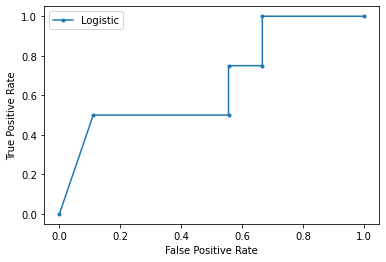

Train on 48 samples, validate on 13 samples
Epoch 1/5000
48/48 [==============================] - 0s 2ms/step - loss: 0.7316 - accuracy: 0.3750 - val_loss: 0.7435 - val_accuracy: 0.3077
Epoch 2/5000
48/48 [==============================] - 0s 221us/step - loss: 0.7009 - accuracy: 0.4583 - val_loss: 0.7061 - val_accuracy: 0.3846
Epoch 3/5000
48/48 [==============================] - 0s 251us/step - loss: 0.6733 - accuracy: 0.6875 - val_loss: 0.6826 - val_accuracy: 0.5385
Epoch 4/5000
48/48 [==============================] - 0s 272us/step - loss: 0.6590 - accuracy: 0.6667 - val_loss: 0.6636 - val_accuracy: 0.6154
Epoch 5/5000
48/48 [==============================] - 0s 229us/step - loss: 0.6432 - accuracy: 0.6458 - val_loss: 0.6478 - val_accuracy: 0.7692
Epoch 6/5000
48/48 [==============================] - 0s 241us/step - loss: 0.6346 - accuracy: 0.6458 - val_loss: 0.6338 - val_accuracy: 0.7692
Epoch 7/5000
48/48 [==============================] - 0s 254us/step - loss: 0.6251 - accuracy:

48/48 [==============================] - 0s 229us/step - loss: 0.3785 - accuracy: 0.8750 - val_loss: 0.5643 - val_accuracy: 0.6923
Epoch 58/5000
48/48 [==============================] - 0s 207us/step - loss: 0.3762 - accuracy: 0.8750 - val_loss: 0.5721 - val_accuracy: 0.6923
Epoch 59/5000
48/48 [==============================] - 0s 185us/step - loss: 0.3698 - accuracy: 0.8750 - val_loss: 0.5743 - val_accuracy: 0.6923
Epoch 60/5000
48/48 [==============================] - 0s 187us/step - loss: 0.3652 - accuracy: 0.8750 - val_loss: 0.5817 - val_accuracy: 0.6923
Epoch 61/5000
48/48 [==============================] - 0s 209us/step - loss: 0.3629 - accuracy: 0.8750 - val_loss: 0.5899 - val_accuracy: 0.6923
Epoch 62/5000
48/48 [==============================] - 0s 194us/step - loss: 0.3664 - accuracy: 0.8750 - val_loss: 0.5823 - val_accuracy: 0.6923
Epoch 63/5000
48/48 [==============================] - 0s 189us/step - loss: 0.3584 - accuracy: 0.8750 - val_loss: 0.6127 - val_accuracy: 0.6923

48/48 [==============================] - 0s 186us/step - loss: 0.1993 - accuracy: 0.9583 - val_loss: 1.0000 - val_accuracy: 0.6154
Epoch 114/5000
48/48 [==============================] - 0s 210us/step - loss: 0.2009 - accuracy: 0.9583 - val_loss: 1.0108 - val_accuracy: 0.6154
Epoch 115/5000
48/48 [==============================] - 0s 188us/step - loss: 0.1936 - accuracy: 0.9583 - val_loss: 1.0037 - val_accuracy: 0.6154
Epoch 116/5000
48/48 [==============================] - 0s 206us/step - loss: 0.1954 - accuracy: 0.9583 - val_loss: 1.0014 - val_accuracy: 0.6154
Epoch 117/5000
48/48 [==============================] - 0s 211us/step - loss: 0.1885 - accuracy: 0.9583 - val_loss: 1.0229 - val_accuracy: 0.6154
Epoch 118/5000
48/48 [==============================] - 0s 192us/step - loss: 0.1980 - accuracy: 0.9583 - val_loss: 1.0719 - val_accuracy: 0.6154
Epoch 119/5000
48/48 [==============================] - 0s 187us/step - loss: 0.1903 - accuracy: 0.9583 - val_loss: 1.0307 - val_accuracy: 

48/48 [==============================] - 0s 211us/step - loss: 0.0870 - accuracy: 1.0000 - val_loss: 1.5763 - val_accuracy: 0.6154
Epoch 170/5000
48/48 [==============================] - 0s 198us/step - loss: 0.0870 - accuracy: 1.0000 - val_loss: 1.6038 - val_accuracy: 0.6154
Epoch 171/5000
48/48 [==============================] - 0s 215us/step - loss: 0.0843 - accuracy: 1.0000 - val_loss: 1.6037 - val_accuracy: 0.6154
Epoch 172/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0827 - accuracy: 1.0000 - val_loss: 1.6132 - val_accuracy: 0.6154
Epoch 173/5000
48/48 [==============================] - 0s 188us/step - loss: 0.0856 - accuracy: 0.9792 - val_loss: 1.6197 - val_accuracy: 0.6154
Epoch 174/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0817 - accuracy: 1.0000 - val_loss: 1.6623 - val_accuracy: 0.6154
Epoch 175/5000
48/48 [==============================] - 0s 210us/step - loss: 0.0824 - accuracy: 1.0000 - val_loss: 1.6662 - val_accuracy: 

48/48 [==============================] - 0s 204us/step - loss: 0.0368 - accuracy: 1.0000 - val_loss: 2.2249 - val_accuracy: 0.5385
Epoch 226/5000
48/48 [==============================] - 0s 179us/step - loss: 0.0371 - accuracy: 1.0000 - val_loss: 2.2275 - val_accuracy: 0.5385
Epoch 227/5000
48/48 [==============================] - 0s 189us/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 2.2270 - val_accuracy: 0.6154
Epoch 228/5000
48/48 [==============================] - 0s 203us/step - loss: 0.0352 - accuracy: 1.0000 - val_loss: 2.2418 - val_accuracy: 0.5385
Epoch 229/5000
48/48 [==============================] - 0s 189us/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 2.2502 - val_accuracy: 0.5385
Epoch 230/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 2.2622 - val_accuracy: 0.5385
Epoch 231/5000
48/48 [==============================] - 0s 186us/step - loss: 0.0334 - accuracy: 1.0000 - val_loss: 2.2633 - val_accuracy: 

48/48 [==============================] - 0s 208us/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 2.6732 - val_accuracy: 0.5385
Epoch 282/5000
48/48 [==============================] - 0s 207us/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 2.6932 - val_accuracy: 0.5385
Epoch 283/5000
48/48 [==============================] - 0s 203us/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 2.6926 - val_accuracy: 0.5385
Epoch 284/5000
48/48 [==============================] - 0s 196us/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 2.7014 - val_accuracy: 0.5385
Epoch 285/5000
48/48 [==============================] - 0s 205us/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 2.7245 - val_accuracy: 0.5385
Epoch 286/5000
48/48 [==============================] - 0s 170us/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 2.7194 - val_accuracy: 0.5385
Epoch 287/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 2.7279 - val_accuracy: 

48/48 [==============================] - 0s 208us/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 3.0351 - val_accuracy: 0.5385
Epoch 338/5000
48/48 [==============================] - 0s 168us/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 3.0367 - val_accuracy: 0.5385
Epoch 339/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 3.0433 - val_accuracy: 0.5385
Epoch 340/5000
48/48 [==============================] - 0s 175us/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 3.0482 - val_accuracy: 0.5385
Epoch 341/5000
48/48 [==============================] - 0s 189us/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 3.0603 - val_accuracy: 0.5385
Epoch 342/5000
48/48 [==============================] - 0s 186us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 3.0581 - val_accuracy: 0.5385
Epoch 343/5000
48/48 [==============================] - 0s 192us/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 3.0664 - val_accuracy: 

48/48 [==============================] - 0s 189us/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 3.3114 - val_accuracy: 0.5385
Epoch 394/5000
48/48 [==============================] - 0s 184us/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 3.3161 - val_accuracy: 0.5385
Epoch 395/5000
48/48 [==============================] - 0s 188us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 3.3220 - val_accuracy: 0.5385
Epoch 396/5000
48/48 [==============================] - 0s 395us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 3.3232 - val_accuracy: 0.5385
Epoch 397/5000
48/48 [==============================] - 0s 236us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 3.3260 - val_accuracy: 0.5385
Epoch 398/5000
48/48 [==============================] - 0s 209us/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 3.3303 - val_accuracy: 0.5385
Epoch 399/5000
48/48 [==============================] - 0s 210us/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 3.3400 - val_accuracy: 

48/48 [==============================] - 0s 188us/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 3.5485 - val_accuracy: 0.5385
Epoch 450/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 3.5490 - val_accuracy: 0.5385
Epoch 451/5000
48/48 [==============================] - 0s 192us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 3.5582 - val_accuracy: 0.5385
Epoch 452/5000
48/48 [==============================] - 0s 207us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 3.5587 - val_accuracy: 0.5385
Epoch 453/5000
48/48 [==============================] - 0s 206us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 3.5625 - val_accuracy: 0.5385
Epoch 454/5000
48/48 [==============================] - 0s 213us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 3.5636 - val_accuracy: 0.5385
Epoch 455/5000
48/48 [==============================] - 0s 249us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 3.5766 - val_accuracy: 

Epoch 505/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.7343 - val_accuracy: 0.5385
Epoch 506/5000
48/48 [==============================] - 0s 191us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 3.7400 - val_accuracy: 0.5385
Epoch 507/5000
48/48 [==============================] - 0s 185us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 3.7420 - val_accuracy: 0.5385
Epoch 508/5000
48/48 [==============================] - 0s 174us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 3.7415 - val_accuracy: 0.5385
Epoch 509/5000
48/48 [==============================] - 0s 312us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 3.7478 - val_accuracy: 0.5385
Epoch 510/5000
48/48 [==============================] - 0s 253us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 3.7507 - val_accuracy: 0.5385
Epoch 511/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 3.7541 -

Epoch 561/5000
48/48 [==============================] - 0s 207us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.9047 - val_accuracy: 0.5385
Epoch 562/5000
48/48 [==============================] - 0s 186us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.9086 - val_accuracy: 0.5385
Epoch 563/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.9160 - val_accuracy: 0.5385
Epoch 564/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.9176 - val_accuracy: 0.5385
Epoch 565/5000
48/48 [==============================] - 0s 194us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.9199 - val_accuracy: 0.5385
Epoch 566/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.9220 - val_accuracy: 0.5385
Epoch 567/5000
48/48 [==============================] - 0s 289us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.9228 -

48/48 [==============================] - 0s 199us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 4.0645 - val_accuracy: 0.5385
Epoch 618/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 4.0644 - val_accuracy: 0.5385
Epoch 619/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 4.0695 - val_accuracy: 0.5385
Epoch 620/5000
48/48 [==============================] - 0s 206us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 4.0732 - val_accuracy: 0.5385
Epoch 621/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 4.0761 - val_accuracy: 0.5385
Epoch 622/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.0763 - val_accuracy: 0.5385
Epoch 623/5000
48/48 [==============================] - 0s 204us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.0792 - val_accuracy: 

48/48 [==============================] - 0s 208us/step - loss: 8.9981e-04 - accuracy: 1.0000 - val_loss: 4.1969 - val_accuracy: 0.5385
Epoch 673/5000
48/48 [==============================] - 0s 188us/step - loss: 8.9813e-04 - accuracy: 1.0000 - val_loss: 4.2039 - val_accuracy: 0.5385
Epoch 674/5000
48/48 [==============================] - 0s 186us/step - loss: 9.1151e-04 - accuracy: 1.0000 - val_loss: 4.2103 - val_accuracy: 0.5385
Epoch 675/5000
48/48 [==============================] - 0s 186us/step - loss: 8.8284e-04 - accuracy: 1.0000 - val_loss: 4.2089 - val_accuracy: 0.5385
Epoch 676/5000
48/48 [==============================] - 0s 220us/step - loss: 8.7456e-04 - accuracy: 1.0000 - val_loss: 4.2105 - val_accuracy: 0.5385
Epoch 677/5000
48/48 [==============================] - 0s 168us/step - loss: 8.7379e-04 - accuracy: 1.0000 - val_loss: 4.2127 - val_accuracy: 0.5385
Epoch 678/5000
48/48 [==============================] - 0s 200us/step - loss: 8.6219e-04 - accuracy: 1.0000 - val_l

Epoch 727/5000
48/48 [==============================] - 0s 231us/step - loss: 6.9676e-04 - accuracy: 1.0000 - val_loss: 4.3393 - val_accuracy: 0.5385
Epoch 728/5000
48/48 [==============================] - 0s 306us/step - loss: 6.9001e-04 - accuracy: 1.0000 - val_loss: 4.3383 - val_accuracy: 0.5385
Epoch 729/5000
48/48 [==============================] - 0s 249us/step - loss: 6.8080e-04 - accuracy: 1.0000 - val_loss: 4.3340 - val_accuracy: 0.5385
Epoch 730/5000
48/48 [==============================] - 0s 229us/step - loss: 6.8730e-04 - accuracy: 1.0000 - val_loss: 4.3332 - val_accuracy: 0.5385
Epoch 731/5000
48/48 [==============================] - 0s 226us/step - loss: 6.7820e-04 - accuracy: 1.0000 - val_loss: 4.3389 - val_accuracy: 0.5385
Epoch 732/5000
48/48 [==============================] - 0s 229us/step - loss: 6.7355e-04 - accuracy: 1.0000 - val_loss: 4.3459 - val_accuracy: 0.5385
Epoch 733/5000
48/48 [==============================] - 0s 312us/step - loss: 6.7061e-04 - accuracy:

48/48 [==============================] - 0s 208us/step - loss: 5.4165e-04 - accuracy: 1.0000 - val_loss: 4.4538 - val_accuracy: 0.5385
Epoch 782/5000
48/48 [==============================] - 0s 188us/step - loss: 5.4017e-04 - accuracy: 1.0000 - val_loss: 4.4530 - val_accuracy: 0.5385
Epoch 783/5000
48/48 [==============================] - 0s 199us/step - loss: 5.3935e-04 - accuracy: 1.0000 - val_loss: 4.4544 - val_accuracy: 0.5385
Epoch 784/5000
48/48 [==============================] - 0s 184us/step - loss: 5.3890e-04 - accuracy: 1.0000 - val_loss: 4.4609 - val_accuracy: 0.5385
Epoch 785/5000
48/48 [==============================] - 0s 187us/step - loss: 5.3392e-04 - accuracy: 1.0000 - val_loss: 4.4623 - val_accuracy: 0.5385
Epoch 786/5000
48/48 [==============================] - 0s 208us/step - loss: 5.3183e-04 - accuracy: 1.0000 - val_loss: 4.4599 - val_accuracy: 0.5385
Epoch 787/5000
48/48 [==============================] - 0s 188us/step - loss: 5.3067e-04 - accuracy: 1.0000 - val_l

48/48 [==============================] - 0s 210us/step - loss: 4.3357e-04 - accuracy: 1.0000 - val_loss: 4.5598 - val_accuracy: 0.5385
Epoch 836/5000
48/48 [==============================] - 0s 188us/step - loss: 4.3195e-04 - accuracy: 1.0000 - val_loss: 4.5591 - val_accuracy: 0.5385
Epoch 837/5000
48/48 [==============================] - 0s 203us/step - loss: 4.3310e-04 - accuracy: 1.0000 - val_loss: 4.5684 - val_accuracy: 0.5385
Epoch 838/5000
48/48 [==============================] - 0s 188us/step - loss: 4.3020e-04 - accuracy: 1.0000 - val_loss: 4.5705 - val_accuracy: 0.5385
Epoch 839/5000
48/48 [==============================] - 0s 206us/step - loss: 4.3137e-04 - accuracy: 1.0000 - val_loss: 4.5725 - val_accuracy: 0.5385
Epoch 840/5000
48/48 [==============================] - 0s 188us/step - loss: 4.2820e-04 - accuracy: 1.0000 - val_loss: 4.5723 - val_accuracy: 0.5385
Epoch 841/5000
48/48 [==============================] - 0s 207us/step - loss: 4.2263e-04 - accuracy: 1.0000 - val_l

48/48 [==============================] - 0s 187us/step - loss: 3.4758e-04 - accuracy: 1.0000 - val_loss: 4.6692 - val_accuracy: 0.5385
Epoch 890/5000
48/48 [==============================] - 0s 211us/step - loss: 3.4740e-04 - accuracy: 1.0000 - val_loss: 4.6724 - val_accuracy: 0.5385
Epoch 891/5000
48/48 [==============================] - 0s 186us/step - loss: 3.4589e-04 - accuracy: 1.0000 - val_loss: 4.6771 - val_accuracy: 0.5385
Epoch 892/5000
48/48 [==============================] - 0s 204us/step - loss: 3.4720e-04 - accuracy: 1.0000 - val_loss: 4.6810 - val_accuracy: 0.5385
Epoch 893/5000
48/48 [==============================] - 0s 208us/step - loss: 3.4395e-04 - accuracy: 1.0000 - val_loss: 4.6789 - val_accuracy: 0.5385
Epoch 894/5000
48/48 [==============================] - 0s 194us/step - loss: 3.4355e-04 - accuracy: 1.0000 - val_loss: 4.6805 - val_accuracy: 0.5385
Epoch 895/5000
48/48 [==============================] - 0s 208us/step - loss: 3.4039e-04 - accuracy: 1.0000 - val_l

Epoch 944/5000
48/48 [==============================] - 0s 208us/step - loss: 2.8212e-04 - accuracy: 1.0000 - val_loss: 4.7746 - val_accuracy: 0.5385
Epoch 945/5000
48/48 [==============================] - 0s 207us/step - loss: 2.8218e-04 - accuracy: 1.0000 - val_loss: 4.7747 - val_accuracy: 0.5385
Epoch 946/5000
48/48 [==============================] - 0s 208us/step - loss: 2.8060e-04 - accuracy: 1.0000 - val_loss: 4.7797 - val_accuracy: 0.5385
Epoch 947/5000
48/48 [==============================] - 0s 223us/step - loss: 2.7792e-04 - accuracy: 1.0000 - val_loss: 4.7810 - val_accuracy: 0.5385
Epoch 948/5000
48/48 [==============================] - 0s 209us/step - loss: 2.7719e-04 - accuracy: 1.0000 - val_loss: 4.7808 - val_accuracy: 0.5385
Epoch 949/5000
48/48 [==============================] - 0s 187us/step - loss: 2.8019e-04 - accuracy: 1.0000 - val_loss: 4.7885 - val_accuracy: 0.5385
Epoch 950/5000
48/48 [==============================] - 0s 225us/step - loss: 2.7519e-04 - accuracy:

48/48 [==============================] - 0s 223us/step - loss: 2.2956e-04 - accuracy: 1.0000 - val_loss: 4.8782 - val_accuracy: 0.5385
Epoch 999/5000
48/48 [==============================] - 0s 170us/step - loss: 2.3178e-04 - accuracy: 1.0000 - val_loss: 4.8790 - val_accuracy: 0.5385
Epoch 1000/5000
48/48 [==============================] - 0s 186us/step - loss: 2.2753e-04 - accuracy: 1.0000 - val_loss: 4.8804 - val_accuracy: 0.5385
Epoch 1001/5000
48/48 [==============================] - 0s 228us/step - loss: 2.3079e-04 - accuracy: 1.0000 - val_loss: 4.8832 - val_accuracy: 0.5385
Epoch 1002/5000
48/48 [==============================] - 0s 187us/step - loss: 2.2635e-04 - accuracy: 1.0000 - val_loss: 4.8865 - val_accuracy: 0.5385
Epoch 1003/5000
48/48 [==============================] - 0s 193us/step - loss: 2.2538e-04 - accuracy: 1.0000 - val_loss: 4.8915 - val_accuracy: 0.5385
Epoch 1004/5000
48/48 [==============================] - 0s 243us/step - loss: 2.2558e-04 - accuracy: 1.0000 - 

48/48 [==============================] - 0s 200us/step - loss: 1.8867e-04 - accuracy: 1.0000 - val_loss: 4.9818 - val_accuracy: 0.5385
Epoch 1053/5000
48/48 [==============================] - 0s 199us/step - loss: 1.8873e-04 - accuracy: 1.0000 - val_loss: 4.9807 - val_accuracy: 0.5385
Epoch 1054/5000
48/48 [==============================] - 0s 209us/step - loss: 1.8700e-04 - accuracy: 1.0000 - val_loss: 4.9789 - val_accuracy: 0.5385
Epoch 1055/5000
48/48 [==============================] - 0s 184us/step - loss: 1.8648e-04 - accuracy: 1.0000 - val_loss: 4.9818 - val_accuracy: 0.5385
Epoch 1056/5000
48/48 [==============================] - 0s 232us/step - loss: 1.8575e-04 - accuracy: 1.0000 - val_loss: 4.9870 - val_accuracy: 0.5385
Epoch 1057/5000
48/48 [==============================] - 0s 208us/step - loss: 1.8501e-04 - accuracy: 1.0000 - val_loss: 4.9880 - val_accuracy: 0.5385
Epoch 1058/5000
48/48 [==============================] - 0s 209us/step - loss: 1.8564e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 182us/step - loss: 1.5494e-04 - accuracy: 1.0000 - val_loss: 5.0719 - val_accuracy: 0.5385
Epoch 1107/5000
48/48 [==============================] - 0s 187us/step - loss: 1.5484e-04 - accuracy: 1.0000 - val_loss: 5.0726 - val_accuracy: 0.5385
Epoch 1108/5000
48/48 [==============================] - 0s 188us/step - loss: 1.5400e-04 - accuracy: 1.0000 - val_loss: 5.0717 - val_accuracy: 0.5385
Epoch 1109/5000
48/48 [==============================] - 0s 175us/step - loss: 1.5358e-04 - accuracy: 1.0000 - val_loss: 5.0703 - val_accuracy: 0.5385
Epoch 1110/5000
48/48 [==============================] - 0s 189us/step - loss: 1.5351e-04 - accuracy: 1.0000 - val_loss: 5.0766 - val_accuracy: 0.5385
Epoch 1111/5000
48/48 [==============================] - 0s 181us/step - loss: 1.5216e-04 - accuracy: 1.0000 - val_loss: 5.0793 - val_accuracy: 0.5385
Epoch 1112/5000
48/48 [==============================] - 0s 188us/step - loss: 1.5223e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 171us/step - loss: 1.2919e-04 - accuracy: 1.0000 - val_loss: 5.1660 - val_accuracy: 0.5385
Epoch 1161/5000
48/48 [==============================] - 0s 208us/step - loss: 1.2889e-04 - accuracy: 1.0000 - val_loss: 5.1666 - val_accuracy: 0.5385
Epoch 1162/5000
48/48 [==============================] - 0s 176us/step - loss: 1.2830e-04 - accuracy: 1.0000 - val_loss: 5.1658 - val_accuracy: 0.5385
Epoch 1163/5000
48/48 [==============================] - 0s 181us/step - loss: 1.2850e-04 - accuracy: 1.0000 - val_loss: 5.1674 - val_accuracy: 0.5385
Epoch 1164/5000
48/48 [==============================] - 0s 194us/step - loss: 1.2726e-04 - accuracy: 1.0000 - val_loss: 5.1709 - val_accuracy: 0.5385
Epoch 1165/5000
48/48 [==============================] - 0s 208us/step - loss: 1.2662e-04 - accuracy: 1.0000 - val_loss: 5.1724 - val_accuracy: 0.5385
Epoch 1166/5000
48/48 [==============================] - 0s 334us/step - loss: 1.2589e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 176us/step - loss: 1.0724e-04 - accuracy: 1.0000 - val_loss: 5.2563 - val_accuracy: 0.5385
Epoch 1215/5000
48/48 [==============================] - 0s 201us/step - loss: 1.0686e-04 - accuracy: 1.0000 - val_loss: 5.2564 - val_accuracy: 0.5385
Epoch 1216/5000
48/48 [==============================] - 0s 187us/step - loss: 1.0597e-04 - accuracy: 1.0000 - val_loss: 5.2606 - val_accuracy: 0.5385
Epoch 1217/5000
48/48 [==============================] - 0s 187us/step - loss: 1.0579e-04 - accuracy: 1.0000 - val_loss: 5.2625 - val_accuracy: 0.5385
Epoch 1218/5000
48/48 [==============================] - 0s 185us/step - loss: 1.0580e-04 - accuracy: 1.0000 - val_loss: 5.2636 - val_accuracy: 0.5385
Epoch 1219/5000
48/48 [==============================] - 0s 211us/step - loss: 1.0528e-04 - accuracy: 1.0000 - val_loss: 5.2663 - val_accuracy: 0.5385
Epoch 1220/5000
48/48 [==============================] - 0s 187us/step - loss: 1.0507e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 190us/step - loss: 9.0101e-05 - accuracy: 1.0000 - val_loss: 5.3452 - val_accuracy: 0.5385
Epoch 1269/5000
48/48 [==============================] - 0s 187us/step - loss: 8.9488e-05 - accuracy: 1.0000 - val_loss: 5.3484 - val_accuracy: 0.5385
Epoch 1270/5000
48/48 [==============================] - 0s 186us/step - loss: 8.8758e-05 - accuracy: 1.0000 - val_loss: 5.3529 - val_accuracy: 0.5385
Epoch 1271/5000
48/48 [==============================] - 0s 172us/step - loss: 8.8709e-05 - accuracy: 1.0000 - val_loss: 5.3533 - val_accuracy: 0.5385
Epoch 1272/5000
48/48 [==============================] - 0s 187us/step - loss: 8.8428e-05 - accuracy: 1.0000 - val_loss: 5.3554 - val_accuracy: 0.5385
Epoch 1273/5000
48/48 [==============================] - 0s 196us/step - loss: 8.7843e-05 - accuracy: 1.0000 - val_loss: 5.3557 - val_accuracy: 0.5385
Epoch 1274/5000
48/48 [==============================] - 0s 182us/step - loss: 8.7818e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 7.5231e-05 - accuracy: 1.0000 - val_loss: 5.4329 - val_accuracy: 0.5385
Epoch 1323/5000
48/48 [==============================] - 0s 189us/step - loss: 7.4839e-05 - accuracy: 1.0000 - val_loss: 5.4375 - val_accuracy: 0.5385
Epoch 1324/5000
48/48 [==============================] - 0s 203us/step - loss: 7.4521e-05 - accuracy: 1.0000 - val_loss: 5.4428 - val_accuracy: 0.5385
Epoch 1325/5000
48/48 [==============================] - 0s 178us/step - loss: 7.4245e-05 - accuracy: 1.0000 - val_loss: 5.4431 - val_accuracy: 0.5385
Epoch 1326/5000
48/48 [==============================] - 0s 192us/step - loss: 7.3737e-05 - accuracy: 1.0000 - val_loss: 5.4410 - val_accuracy: 0.5385
Epoch 1327/5000
48/48 [==============================] - 0s 209us/step - loss: 7.3962e-05 - accuracy: 1.0000 - val_loss: 5.4440 - val_accuracy: 0.5385
Epoch 1328/5000
48/48 [==============================] - 0s 192us/step - loss: 7.3191e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 171us/step - loss: 6.2710e-05 - accuracy: 1.0000 - val_loss: 5.5245 - val_accuracy: 0.5385
Epoch 1377/5000
48/48 [==============================] - 0s 182us/step - loss: 6.2729e-05 - accuracy: 1.0000 - val_loss: 5.5256 - val_accuracy: 0.5385
Epoch 1378/5000
48/48 [==============================] - 0s 208us/step - loss: 6.2425e-05 - accuracy: 1.0000 - val_loss: 5.5269 - val_accuracy: 0.5385
Epoch 1379/5000
48/48 [==============================] - 0s 240us/step - loss: 6.2417e-05 - accuracy: 1.0000 - val_loss: 5.5289 - val_accuracy: 0.5385
Epoch 1380/5000
48/48 [==============================] - 0s 296us/step - loss: 6.2026e-05 - accuracy: 1.0000 - val_loss: 5.5307 - val_accuracy: 0.5385
Epoch 1381/5000
48/48 [==============================] - 0s 187us/step - loss: 6.1856e-05 - accuracy: 1.0000 - val_loss: 5.5302 - val_accuracy: 0.5385
Epoch 1382/5000
48/48 [==============================] - 0s 203us/step - loss: 6.1672e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 5.2833e-05 - accuracy: 1.0000 - val_loss: 5.6083 - val_accuracy: 0.5385
Epoch 1431/5000
48/48 [==============================] - 0s 183us/step - loss: 5.2700e-05 - accuracy: 1.0000 - val_loss: 5.6087 - val_accuracy: 0.5385
Epoch 1432/5000
48/48 [==============================] - 0s 186us/step - loss: 5.2386e-05 - accuracy: 1.0000 - val_loss: 5.6107 - val_accuracy: 0.5385
Epoch 1433/5000
48/48 [==============================] - 0s 185us/step - loss: 5.2326e-05 - accuracy: 1.0000 - val_loss: 5.6125 - val_accuracy: 0.5385
Epoch 1434/5000
48/48 [==============================] - 0s 183us/step - loss: 5.1979e-05 - accuracy: 1.0000 - val_loss: 5.6153 - val_accuracy: 0.5385
Epoch 1435/5000
48/48 [==============================] - 0s 186us/step - loss: 5.1691e-05 - accuracy: 1.0000 - val_loss: 5.6162 - val_accuracy: 0.5385
Epoch 1436/5000
48/48 [==============================] - 0s 187us/step - loss: 5.1813e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 204us/step - loss: 4.4367e-05 - accuracy: 1.0000 - val_loss: 5.6960 - val_accuracy: 0.5385
Epoch 1485/5000
48/48 [==============================] - 0s 197us/step - loss: 4.4661e-05 - accuracy: 1.0000 - val_loss: 5.6959 - val_accuracy: 0.5385
Epoch 1486/5000
48/48 [==============================] - 0s 374us/step - loss: 4.4136e-05 - accuracy: 1.0000 - val_loss: 5.6980 - val_accuracy: 0.5385
Epoch 1487/5000
48/48 [==============================] - 0s 251us/step - loss: 4.4293e-05 - accuracy: 1.0000 - val_loss: 5.6992 - val_accuracy: 0.5385
Epoch 1488/5000
48/48 [==============================] - 0s 194us/step - loss: 4.3868e-05 - accuracy: 1.0000 - val_loss: 5.7014 - val_accuracy: 0.5385
Epoch 1489/5000
48/48 [==============================] - 0s 227us/step - loss: 4.3782e-05 - accuracy: 1.0000 - val_loss: 5.7019 - val_accuracy: 0.5385
Epoch 1490/5000
48/48 [==============================] - 0s 211us/step - loss: 4.3575e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 209us/step - loss: 3.7542e-05 - accuracy: 1.0000 - val_loss: 5.7769 - val_accuracy: 0.5385
Epoch 1539/5000
48/48 [==============================] - 0s 216us/step - loss: 3.7914e-05 - accuracy: 1.0000 - val_loss: 5.7757 - val_accuracy: 0.5385
Epoch 1540/5000
48/48 [==============================] - 0s 194us/step - loss: 3.7158e-05 - accuracy: 1.0000 - val_loss: 5.7769 - val_accuracy: 0.5385
Epoch 1541/5000
48/48 [==============================] - 0s 242us/step - loss: 3.7076e-05 - accuracy: 1.0000 - val_loss: 5.7792 - val_accuracy: 0.5385
Epoch 1542/5000
48/48 [==============================] - 0s 188us/step - loss: 3.7071e-05 - accuracy: 1.0000 - val_loss: 5.7826 - val_accuracy: 0.5385
Epoch 1543/5000
48/48 [==============================] - 0s 195us/step - loss: 3.6967e-05 - accuracy: 1.0000 - val_loss: 5.7837 - val_accuracy: 0.5385
Epoch 1544/5000
48/48 [==============================] - 0s 224us/step - loss: 3.6794e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 204us/step - loss: 3.1900e-05 - accuracy: 1.0000 - val_loss: 5.8525 - val_accuracy: 0.5385
Epoch 1593/5000
48/48 [==============================] - 0s 229us/step - loss: 3.1808e-05 - accuracy: 1.0000 - val_loss: 5.8570 - val_accuracy: 0.5385
Epoch 1594/5000
48/48 [==============================] - 0s 224us/step - loss: 3.1543e-05 - accuracy: 1.0000 - val_loss: 5.8628 - val_accuracy: 0.5385
Epoch 1595/5000
48/48 [==============================] - ETA: 0s - loss: 2.5009e-05 - accuracy: 1.00 - 0s 262us/step - loss: 3.1356e-05 - accuracy: 1.0000 - val_loss: 5.8661 - val_accuracy: 0.5385
Epoch 1596/5000
48/48 [==============================] - 0s 249us/step - loss: 3.1543e-05 - accuracy: 1.0000 - val_loss: 5.8659 - val_accuracy: 0.5385
Epoch 1597/5000
48/48 [==============================] - 0s 208us/step - loss: 3.1247e-05 - accuracy: 1.0000 - val_loss: 5.8676 - val_accuracy: 0.5385
Epoch 1598/5000
48/48 [==============================] - 0s 199u

48/48 [==============================] - 0s 276us/step - loss: 2.6742e-05 - accuracy: 1.0000 - val_loss: 5.9394 - val_accuracy: 0.5385
Epoch 1647/5000
48/48 [==============================] - 0s 257us/step - loss: 2.6680e-05 - accuracy: 1.0000 - val_loss: 5.9433 - val_accuracy: 0.5385
Epoch 1648/5000
48/48 [==============================] - 0s 249us/step - loss: 2.6586e-05 - accuracy: 1.0000 - val_loss: 5.9431 - val_accuracy: 0.5385
Epoch 1649/5000
48/48 [==============================] - 0s 270us/step - loss: 2.6616e-05 - accuracy: 1.0000 - val_loss: 5.9437 - val_accuracy: 0.5385
Epoch 1650/5000
48/48 [==============================] - 0s 272us/step - loss: 2.6583e-05 - accuracy: 1.0000 - val_loss: 5.9482 - val_accuracy: 0.5385
Epoch 1651/5000
48/48 [==============================] - 0s 208us/step - loss: 2.6442e-05 - accuracy: 1.0000 - val_loss: 5.9501 - val_accuracy: 0.5385
Epoch 1652/5000
48/48 [==============================] - 0s 229us/step - loss: 2.6417e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 2.2653e-05 - accuracy: 1.0000 - val_loss: 6.0182 - val_accuracy: 0.5385
Epoch 1701/5000
48/48 [==============================] - 0s 229us/step - loss: 2.2583e-05 - accuracy: 1.0000 - val_loss: 6.0191 - val_accuracy: 0.5385
Epoch 1702/5000
48/48 [==============================] - 0s 201us/step - loss: 2.2562e-05 - accuracy: 1.0000 - val_loss: 6.0209 - val_accuracy: 0.5385
Epoch 1703/5000
48/48 [==============================] - 0s 230us/step - loss: 2.2527e-05 - accuracy: 1.0000 - val_loss: 6.0241 - val_accuracy: 0.5385
Epoch 1704/5000
48/48 [==============================] - 0s 223us/step - loss: 2.2466e-05 - accuracy: 1.0000 - val_loss: 6.0265 - val_accuracy: 0.5385
Epoch 1705/5000
48/48 [==============================] - 0s 188us/step - loss: 2.2345e-05 - accuracy: 1.0000 - val_loss: 6.0261 - val_accuracy: 0.5385
Epoch 1706/5000
48/48 [==============================] - 0s 204us/step - loss: 2.2285e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 362us/step - loss: 1.9298e-05 - accuracy: 1.0000 - val_loss: 6.0985 - val_accuracy: 0.5385
Epoch 1755/5000
48/48 [==============================] - 0s 250us/step - loss: 1.9172e-05 - accuracy: 1.0000 - val_loss: 6.1022 - val_accuracy: 0.5385
Epoch 1756/5000
48/48 [==============================] - 0s 244us/step - loss: 1.9174e-05 - accuracy: 1.0000 - val_loss: 6.1042 - val_accuracy: 0.5385
Epoch 1757/5000
48/48 [==============================] - 0s 229us/step - loss: 1.9192e-05 - accuracy: 1.0000 - val_loss: 6.1043 - val_accuracy: 0.5385
Epoch 1758/5000
48/48 [==============================] - 0s 234us/step - loss: 1.9189e-05 - accuracy: 1.0000 - val_loss: 6.1017 - val_accuracy: 0.5385
Epoch 1759/5000
48/48 [==============================] - 0s 229us/step - loss: 1.9007e-05 - accuracy: 1.0000 - val_loss: 6.1008 - val_accuracy: 0.5385
Epoch 1760/5000
48/48 [==============================] - 0s 234us/step - loss: 1.9003e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 202us/step - loss: 1.6542e-05 - accuracy: 1.0000 - val_loss: 6.1748 - val_accuracy: 0.5385
Epoch 1809/5000
48/48 [==============================] - 0s 193us/step - loss: 1.6355e-05 - accuracy: 1.0000 - val_loss: 6.1803 - val_accuracy: 0.5385
Epoch 1810/5000
48/48 [==============================] - 0s 186us/step - loss: 1.6357e-05 - accuracy: 1.0000 - val_loss: 6.1830 - val_accuracy: 0.5385
Epoch 1811/5000
48/48 [==============================] - 0s 209us/step - loss: 1.6271e-05 - accuracy: 1.0000 - val_loss: 6.1818 - val_accuracy: 0.5385
Epoch 1812/5000
48/48 [==============================] - 0s 208us/step - loss: 1.6199e-05 - accuracy: 1.0000 - val_loss: 6.1821 - val_accuracy: 0.5385
Epoch 1813/5000
48/48 [==============================] - 0s 186us/step - loss: 1.6173e-05 - accuracy: 1.0000 - val_loss: 6.1856 - val_accuracy: 0.5385
Epoch 1814/5000
48/48 [==============================] - 0s 229us/step - loss: 1.6110e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 206us/step - loss: 1.3899e-05 - accuracy: 1.0000 - val_loss: 6.2534 - val_accuracy: 0.5385
Epoch 1863/5000
48/48 [==============================] - 0s 209us/step - loss: 1.3912e-05 - accuracy: 1.0000 - val_loss: 6.2559 - val_accuracy: 0.5385
Epoch 1864/5000
48/48 [==============================] - 0s 186us/step - loss: 1.3842e-05 - accuracy: 1.0000 - val_loss: 6.2586 - val_accuracy: 0.5385
Epoch 1865/5000
48/48 [==============================] - 0s 206us/step - loss: 1.3791e-05 - accuracy: 1.0000 - val_loss: 6.2585 - val_accuracy: 0.5385
Epoch 1866/5000
48/48 [==============================] - 0s 212us/step - loss: 1.3755e-05 - accuracy: 1.0000 - val_loss: 6.2594 - val_accuracy: 0.5385
Epoch 1867/5000
48/48 [==============================] - 0s 191us/step - loss: 1.3724e-05 - accuracy: 1.0000 - val_loss: 6.2604 - val_accuracy: 0.5385
Epoch 1868/5000
48/48 [==============================] - 0s 186us/step - loss: 1.3722e-05 - accuracy: 1.0000 -

Epoch 1916/5000
48/48 [==============================] - 0s 202us/step - loss: 1.1869e-05 - accuracy: 1.0000 - val_loss: 6.3328 - val_accuracy: 0.5385
Epoch 1917/5000
48/48 [==============================] - 0s 186us/step - loss: 1.1809e-05 - accuracy: 1.0000 - val_loss: 6.3341 - val_accuracy: 0.5385
Epoch 1918/5000
48/48 [==============================] - 0s 208us/step - loss: 1.1783e-05 - accuracy: 1.0000 - val_loss: 6.3351 - val_accuracy: 0.5385
Epoch 1919/5000
48/48 [==============================] - 0s 166us/step - loss: 1.1672e-05 - accuracy: 1.0000 - val_loss: 6.3378 - val_accuracy: 0.5385
Epoch 1920/5000
48/48 [==============================] - 0s 190us/step - loss: 1.1680e-05 - accuracy: 1.0000 - val_loss: 6.3387 - val_accuracy: 0.5385
Epoch 1921/5000
48/48 [==============================] - 0s 231us/step - loss: 1.1648e-05 - accuracy: 1.0000 - val_loss: 6.3391 - val_accuracy: 0.5385
Epoch 1922/5000
48/48 [==============================] - 0s 222us/step - loss: 1.1665e-05 - ac

48/48 [==============================] - 0s 208us/step - loss: 1.0073e-05 - accuracy: 1.0000 - val_loss: 6.4074 - val_accuracy: 0.5385
Epoch 1971/5000
48/48 [==============================] - 0s 208us/step - loss: 1.0048e-05 - accuracy: 1.0000 - val_loss: 6.4097 - val_accuracy: 0.5385
Epoch 1972/5000
48/48 [==============================] - 0s 209us/step - loss: 1.0034e-05 - accuracy: 1.0000 - val_loss: 6.4120 - val_accuracy: 0.5385
Epoch 1973/5000
48/48 [==============================] - 0s 187us/step - loss: 9.9919e-06 - accuracy: 1.0000 - val_loss: 6.4123 - val_accuracy: 0.5385
Epoch 1974/5000
48/48 [==============================] - 0s 196us/step - loss: 9.9418e-06 - accuracy: 1.0000 - val_loss: 6.4147 - val_accuracy: 0.5385
Epoch 1975/5000
48/48 [==============================] - 0s 181us/step - loss: 9.9929e-06 - accuracy: 1.0000 - val_loss: 6.4134 - val_accuracy: 0.5385
Epoch 1976/5000
48/48 [==============================] - 0s 208us/step - loss: 9.9246e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 8.6482e-06 - accuracy: 1.0000 - val_loss: 6.4877 - val_accuracy: 0.5385
Epoch 2025/5000
48/48 [==============================] - 0s 191us/step - loss: 8.5612e-06 - accuracy: 1.0000 - val_loss: 6.4884 - val_accuracy: 0.5385
Epoch 2026/5000
48/48 [==============================] - 0s 190us/step - loss: 8.5159e-06 - accuracy: 1.0000 - val_loss: 6.4884 - val_accuracy: 0.5385
Epoch 2027/5000
48/48 [==============================] - 0s 187us/step - loss: 8.5098e-06 - accuracy: 1.0000 - val_loss: 6.4903 - val_accuracy: 0.5385
Epoch 2028/5000
48/48 [==============================] - 0s 188us/step - loss: 8.4755e-06 - accuracy: 1.0000 - val_loss: 6.4925 - val_accuracy: 0.5385
Epoch 2029/5000
48/48 [==============================] - 0s 186us/step - loss: 8.5091e-06 - accuracy: 1.0000 - val_loss: 6.4929 - val_accuracy: 0.5385
Epoch 2030/5000
48/48 [==============================] - 0s 187us/step - loss: 8.4506e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 209us/step - loss: 7.3414e-06 - accuracy: 1.0000 - val_loss: 6.5630 - val_accuracy: 0.5385
Epoch 2079/5000
48/48 [==============================] - 0s 174us/step - loss: 7.3075e-06 - accuracy: 1.0000 - val_loss: 6.5620 - val_accuracy: 0.5385
Epoch 2080/5000
48/48 [==============================] - 0s 187us/step - loss: 7.2648e-06 - accuracy: 1.0000 - val_loss: 6.5628 - val_accuracy: 0.5385
Epoch 2081/5000
48/48 [==============================] - 0s 200us/step - loss: 7.2445e-06 - accuracy: 1.0000 - val_loss: 6.5632 - val_accuracy: 0.5385
Epoch 2082/5000
48/48 [==============================] - 0s 211us/step - loss: 7.2132e-06 - accuracy: 1.0000 - val_loss: 6.5661 - val_accuracy: 0.5385
Epoch 2083/5000
48/48 [==============================] - 0s 189us/step - loss: 7.2012e-06 - accuracy: 1.0000 - val_loss: 6.5662 - val_accuracy: 0.5385
Epoch 2084/5000
48/48 [==============================] - 0s 210us/step - loss: 7.2105e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 194us/step - loss: 6.2336e-06 - accuracy: 1.0000 - val_loss: 6.6376 - val_accuracy: 0.5385
Epoch 2133/5000
48/48 [==============================] - 0s 188us/step - loss: 6.2598e-06 - accuracy: 1.0000 - val_loss: 6.6400 - val_accuracy: 0.5385
Epoch 2134/5000
48/48 [==============================] - 0s 187us/step - loss: 6.2003e-06 - accuracy: 1.0000 - val_loss: 6.6379 - val_accuracy: 0.5385
Epoch 2135/5000
48/48 [==============================] - 0s 167us/step - loss: 6.1942e-06 - accuracy: 1.0000 - val_loss: 6.6394 - val_accuracy: 0.5385
Epoch 2136/5000
48/48 [==============================] - 0s 186us/step - loss: 6.1719e-06 - accuracy: 1.0000 - val_loss: 6.6413 - val_accuracy: 0.5385
Epoch 2137/5000
48/48 [==============================] - 0s 246us/step - loss: 6.1644e-06 - accuracy: 1.0000 - val_loss: 6.6438 - val_accuracy: 0.5385
Epoch 2138/5000
48/48 [==============================] - 0s 209us/step - loss: 6.1447e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 171us/step - loss: 5.3488e-06 - accuracy: 1.0000 - val_loss: 6.7106 - val_accuracy: 0.5385
Epoch 2187/5000
48/48 [==============================] - 0s 183us/step - loss: 5.3227e-06 - accuracy: 1.0000 - val_loss: 6.7143 - val_accuracy: 0.5385
Epoch 2188/5000
48/48 [==============================] - 0s 176us/step - loss: 5.3178e-06 - accuracy: 1.0000 - val_loss: 6.7174 - val_accuracy: 0.5385
Epoch 2189/5000
48/48 [==============================] - 0s 167us/step - loss: 5.3469e-06 - accuracy: 1.0000 - val_loss: 6.7177 - val_accuracy: 0.5385
Epoch 2190/5000
48/48 [==============================] - 0s 187us/step - loss: 5.2842e-06 - accuracy: 1.0000 - val_loss: 6.7192 - val_accuracy: 0.5385
Epoch 2191/5000
48/48 [==============================] - 0s 165us/step - loss: 5.2793e-06 - accuracy: 1.0000 - val_loss: 6.7192 - val_accuracy: 0.5385
Epoch 2192/5000
48/48 [==============================] - 0s 189us/step - loss: 5.2776e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 4.5627e-06 - accuracy: 1.0000 - val_loss: 6.7851 - val_accuracy: 0.5385
Epoch 2241/5000
48/48 [==============================] - 0s 186us/step - loss: 4.5548e-06 - accuracy: 1.0000 - val_loss: 6.7856 - val_accuracy: 0.5385
Epoch 2242/5000
48/48 [==============================] - 0s 186us/step - loss: 4.5480e-06 - accuracy: 1.0000 - val_loss: 6.7890 - val_accuracy: 0.5385
Epoch 2243/5000
48/48 [==============================] - 0s 188us/step - loss: 4.5289e-06 - accuracy: 1.0000 - val_loss: 6.7930 - val_accuracy: 0.5385
Epoch 2244/5000
48/48 [==============================] - 0s 186us/step - loss: 4.5152e-06 - accuracy: 1.0000 - val_loss: 6.7928 - val_accuracy: 0.5385
Epoch 2245/5000
48/48 [==============================] - 0s 187us/step - loss: 4.5023e-06 - accuracy: 1.0000 - val_loss: 6.7916 - val_accuracy: 0.5385
Epoch 2246/5000
48/48 [==============================] - 0s 186us/step - loss: 4.4598e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 3.8984e-06 - accuracy: 1.0000 - val_loss: 6.8642 - val_accuracy: 0.5385
Epoch 2295/5000
48/48 [==============================] - 0s 166us/step - loss: 3.8950e-06 - accuracy: 1.0000 - val_loss: 6.8643 - val_accuracy: 0.5385
Epoch 2296/5000
48/48 [==============================] - 0s 187us/step - loss: 3.8666e-06 - accuracy: 1.0000 - val_loss: 6.8648 - val_accuracy: 0.5385
Epoch 2297/5000
48/48 [==============================] - 0s 211us/step - loss: 3.8791e-06 - accuracy: 1.0000 - val_loss: 6.8647 - val_accuracy: 0.5385
Epoch 2298/5000
48/48 [==============================] - 0s 194us/step - loss: 3.8373e-06 - accuracy: 1.0000 - val_loss: 6.8674 - val_accuracy: 0.5385
Epoch 2299/5000
48/48 [==============================] - 0s 188us/step - loss: 3.8487e-06 - accuracy: 1.0000 - val_loss: 6.8689 - val_accuracy: 0.5385
Epoch 2300/5000
48/48 [==============================] - 0s 166us/step - loss: 3.8166e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 184us/step - loss: 3.3317e-06 - accuracy: 1.0000 - val_loss: 6.9369 - val_accuracy: 0.5385
Epoch 2349/5000
48/48 [==============================] - 0s 191us/step - loss: 3.3273e-06 - accuracy: 1.0000 - val_loss: 6.9388 - val_accuracy: 0.5385
Epoch 2350/5000
48/48 [==============================] - 0s 229us/step - loss: 3.3241e-06 - accuracy: 1.0000 - val_loss: 6.9417 - val_accuracy: 0.5385
Epoch 2351/5000
48/48 [==============================] - 0s 199us/step - loss: 3.3258e-06 - accuracy: 1.0000 - val_loss: 6.9402 - val_accuracy: 0.5385
Epoch 2352/5000
48/48 [==============================] - 0s 167us/step - loss: 3.2922e-06 - accuracy: 1.0000 - val_loss: 6.9428 - val_accuracy: 0.5385
Epoch 2353/5000
48/48 [==============================] - 0s 224us/step - loss: 3.2843e-06 - accuracy: 1.0000 - val_loss: 6.9417 - val_accuracy: 0.5385
Epoch 2354/5000
48/48 [==============================] - 0s 182us/step - loss: 3.2726e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 204us/step - loss: 2.8533e-06 - accuracy: 1.0000 - val_loss: 7.0134 - val_accuracy: 0.5385
Epoch 2403/5000
48/48 [==============================] - 0s 187us/step - loss: 2.8369e-06 - accuracy: 1.0000 - val_loss: 7.0145 - val_accuracy: 0.5385
Epoch 2404/5000
48/48 [==============================] - 0s 208us/step - loss: 2.8307e-06 - accuracy: 1.0000 - val_loss: 7.0156 - val_accuracy: 0.5385
Epoch 2405/5000
48/48 [==============================] - 0s 210us/step - loss: 2.8170e-06 - accuracy: 1.0000 - val_loss: 7.0154 - val_accuracy: 0.5385
Epoch 2406/5000
48/48 [==============================] - 0s 173us/step - loss: 2.8269e-06 - accuracy: 1.0000 - val_loss: 7.0174 - val_accuracy: 0.5385
Epoch 2407/5000
48/48 [==============================] - 0s 208us/step - loss: 2.7982e-06 - accuracy: 1.0000 - val_loss: 7.0173 - val_accuracy: 0.5385
Epoch 2408/5000
48/48 [==============================] - 0s 255us/step - loss: 2.8093e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 2.4484e-06 - accuracy: 1.0000 - val_loss: 7.0850 - val_accuracy: 0.5385
Epoch 2457/5000
48/48 [==============================] - ETA: 0s - loss: 4.1205e-06 - accuracy: 1.00 - 0s 187us/step - loss: 2.4382e-06 - accuracy: 1.0000 - val_loss: 7.0873 - val_accuracy: 0.5385
Epoch 2458/5000
48/48 [==============================] - 0s 192us/step - loss: 2.4199e-06 - accuracy: 1.0000 - val_loss: 7.0874 - val_accuracy: 0.5385
Epoch 2459/5000
48/48 [==============================] - 0s 188us/step - loss: 2.4179e-06 - accuracy: 1.0000 - val_loss: 7.0881 - val_accuracy: 0.5385
Epoch 2460/5000
48/48 [==============================] - 0s 210us/step - loss: 2.4056e-06 - accuracy: 1.0000 - val_loss: 7.0892 - val_accuracy: 0.5385
Epoch 2461/5000
48/48 [==============================] - 0s 190us/step - loss: 2.4029e-06 - accuracy: 1.0000 - val_loss: 7.0898 - val_accuracy: 0.5385
Epoch 2462/5000
48/48 [==============================] - 0s 231u

48/48 [==============================] - 0s 209us/step - loss: 2.0930e-06 - accuracy: 1.0000 - val_loss: 7.1594 - val_accuracy: 0.5385
Epoch 2511/5000
48/48 [==============================] - 0s 208us/step - loss: 2.0821e-06 - accuracy: 1.0000 - val_loss: 7.1592 - val_accuracy: 0.5385
Epoch 2512/5000
48/48 [==============================] - 0s 192us/step - loss: 2.0777e-06 - accuracy: 1.0000 - val_loss: 7.1594 - val_accuracy: 0.5385
Epoch 2513/5000
48/48 [==============================] - 0s 207us/step - loss: 2.0662e-06 - accuracy: 1.0000 - val_loss: 7.1615 - val_accuracy: 0.5385
Epoch 2514/5000
48/48 [==============================] - 0s 188us/step - loss: 2.0653e-06 - accuracy: 1.0000 - val_loss: 7.1643 - val_accuracy: 0.5385
Epoch 2515/5000
48/48 [==============================] - 0s 167us/step - loss: 2.0641e-06 - accuracy: 1.0000 - val_loss: 7.1642 - val_accuracy: 0.5385
Epoch 2516/5000
48/48 [==============================] - 0s 187us/step - loss: 2.0487e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 203us/step - loss: 1.7871e-06 - accuracy: 1.0000 - val_loss: 7.2324 - val_accuracy: 0.5385
Epoch 2565/5000
48/48 [==============================] - 0s 208us/step - loss: 1.7806e-06 - accuracy: 1.0000 - val_loss: 7.2348 - val_accuracy: 0.5385
Epoch 2566/5000
48/48 [==============================] - 0s 166us/step - loss: 1.7770e-06 - accuracy: 1.0000 - val_loss: 7.2369 - val_accuracy: 0.5385
Epoch 2567/5000
48/48 [==============================] - 0s 188us/step - loss: 1.7714e-06 - accuracy: 1.0000 - val_loss: 7.2373 - val_accuracy: 0.5385
Epoch 2568/5000
48/48 [==============================] - 0s 187us/step - loss: 1.7676e-06 - accuracy: 1.0000 - val_loss: 7.2394 - val_accuracy: 0.5385
Epoch 2569/5000
48/48 [==============================] - 0s 176us/step - loss: 1.7675e-06 - accuracy: 1.0000 - val_loss: 7.2407 - val_accuracy: 0.5385
Epoch 2570/5000
48/48 [==============================] - 0s 188us/step - loss: 1.7647e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 1.5323e-06 - accuracy: 1.0000 - val_loss: 7.3066 - val_accuracy: 0.5385
Epoch 2619/5000
48/48 [==============================] - 0s 194us/step - loss: 1.5386e-06 - accuracy: 1.0000 - val_loss: 7.3080 - val_accuracy: 0.5385
Epoch 2620/5000
48/48 [==============================] - 0s 191us/step - loss: 1.5308e-06 - accuracy: 1.0000 - val_loss: 7.3067 - val_accuracy: 0.5385
Epoch 2621/5000
48/48 [==============================] - 0s 192us/step - loss: 1.5194e-06 - accuracy: 1.0000 - val_loss: 7.3086 - val_accuracy: 0.5385
Epoch 2622/5000
48/48 [==============================] - 0s 166us/step - loss: 1.5128e-06 - accuracy: 1.0000 - val_loss: 7.3117 - val_accuracy: 0.5385
Epoch 2623/5000
48/48 [==============================] - 0s 166us/step - loss: 1.5182e-06 - accuracy: 1.0000 - val_loss: 7.3132 - val_accuracy: 0.5385
Epoch 2624/5000
48/48 [==============================] - 0s 170us/step - loss: 1.5107e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 236us/step - loss: 1.3169e-06 - accuracy: 1.0000 - val_loss: 7.3831 - val_accuracy: 0.5385
Epoch 2673/5000
48/48 [==============================] - 0s 213us/step - loss: 1.3184e-06 - accuracy: 1.0000 - val_loss: 7.3785 - val_accuracy: 0.5385
Epoch 2674/5000
48/48 [==============================] - 0s 200us/step - loss: 1.3147e-06 - accuracy: 1.0000 - val_loss: 7.3821 - val_accuracy: 0.5385
Epoch 2675/5000
48/48 [==============================] - 0s 204us/step - loss: 1.3077e-06 - accuracy: 1.0000 - val_loss: 7.3864 - val_accuracy: 0.5385
Epoch 2676/5000
48/48 [==============================] - 0s 187us/step - loss: 1.3046e-06 - accuracy: 1.0000 - val_loss: 7.3860 - val_accuracy: 0.5385
Epoch 2677/5000
48/48 [==============================] - 0s 209us/step - loss: 1.2948e-06 - accuracy: 1.0000 - val_loss: 7.3863 - val_accuracy: 0.5385
Epoch 2678/5000
48/48 [==============================] - 0s 191us/step - loss: 1.2941e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 1.1272e-06 - accuracy: 1.0000 - val_loss: 7.4550 - val_accuracy: 0.5385
Epoch 2727/5000
48/48 [==============================] - 0s 208us/step - loss: 1.1400e-06 - accuracy: 1.0000 - val_loss: 7.4528 - val_accuracy: 0.5385
Epoch 2728/5000
48/48 [==============================] - 0s 205us/step - loss: 1.1233e-06 - accuracy: 1.0000 - val_loss: 7.4538 - val_accuracy: 0.5385
Epoch 2729/5000
48/48 [==============================] - 0s 181us/step - loss: 1.1179e-06 - accuracy: 1.0000 - val_loss: 7.4585 - val_accuracy: 0.5385
Epoch 2730/5000
48/48 [==============================] - 0s 186us/step - loss: 1.1169e-06 - accuracy: 1.0000 - val_loss: 7.4611 - val_accuracy: 0.5385
Epoch 2731/5000
48/48 [==============================] - 0s 180us/step - loss: 1.1227e-06 - accuracy: 1.0000 - val_loss: 7.4618 - val_accuracy: 0.5385
Epoch 2732/5000
48/48 [==============================] - 0s 187us/step - loss: 1.1180e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 9.7315e-07 - accuracy: 1.0000 - val_loss: 7.5255 - val_accuracy: 0.5385
Epoch 2781/5000
48/48 [==============================] - 0s 186us/step - loss: 9.7084e-07 - accuracy: 1.0000 - val_loss: 7.5290 - val_accuracy: 0.5385
Epoch 2782/5000
48/48 [==============================] - 0s 208us/step - loss: 9.7035e-07 - accuracy: 1.0000 - val_loss: 7.5316 - val_accuracy: 0.5385
Epoch 2783/5000
48/48 [==============================] - 0s 191us/step - loss: 9.6608e-07 - accuracy: 1.0000 - val_loss: 7.5328 - val_accuracy: 0.5385
Epoch 2784/5000
48/48 [==============================] - 0s 190us/step - loss: 9.6469e-07 - accuracy: 1.0000 - val_loss: 7.5339 - val_accuracy: 0.5385
Epoch 2785/5000
48/48 [==============================] - 0s 186us/step - loss: 9.6125e-07 - accuracy: 1.0000 - val_loss: 7.5339 - val_accuracy: 0.5385
Epoch 2786/5000
48/48 [==============================] - 0s 182us/step - loss: 9.5625e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 166us/step - loss: 8.3014e-07 - accuracy: 1.0000 - val_loss: 7.6005 - val_accuracy: 0.5385
Epoch 2835/5000
48/48 [==============================] - 0s 209us/step - loss: 8.3993e-07 - accuracy: 1.0000 - val_loss: 7.6058 - val_accuracy: 0.5385
Epoch 2836/5000
48/48 [==============================] - 0s 191us/step - loss: 8.3216e-07 - accuracy: 1.0000 - val_loss: 7.6057 - val_accuracy: 0.5385
Epoch 2837/5000
48/48 [==============================] - 0s 308us/step - loss: 8.2744e-07 - accuracy: 1.0000 - val_loss: 7.6051 - val_accuracy: 0.5385
Epoch 2838/5000
48/48 [==============================] - 0s 210us/step - loss: 8.2319e-07 - accuracy: 1.0000 - val_loss: 7.6063 - val_accuracy: 0.5385
Epoch 2839/5000
48/48 [==============================] - 0s 200us/step - loss: 8.1960e-07 - accuracy: 1.0000 - val_loss: 7.6085 - val_accuracy: 0.5385
Epoch 2840/5000
48/48 [==============================] - 0s 264us/step - loss: 8.1708e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 192us/step - loss: 7.1656e-07 - accuracy: 1.0000 - val_loss: 7.6758 - val_accuracy: 0.5385
Epoch 2889/5000
48/48 [==============================] - 0s 210us/step - loss: 7.1361e-07 - accuracy: 1.0000 - val_loss: 7.6749 - val_accuracy: 0.5385
Epoch 2890/5000
48/48 [==============================] - 0s 186us/step - loss: 7.1364e-07 - accuracy: 1.0000 - val_loss: 7.6757 - val_accuracy: 0.5385
Epoch 2891/5000
48/48 [==============================] - 0s 228us/step - loss: 7.0945e-07 - accuracy: 1.0000 - val_loss: 7.6779 - val_accuracy: 0.5385
Epoch 2892/5000
48/48 [==============================] - 0s 212us/step - loss: 7.0629e-07 - accuracy: 1.0000 - val_loss: 7.6807 - val_accuracy: 0.5385
Epoch 2893/5000
48/48 [==============================] - 0s 193us/step - loss: 7.0473e-07 - accuracy: 1.0000 - val_loss: 7.6822 - val_accuracy: 0.5385
Epoch 2894/5000
48/48 [==============================] - 0s 217us/step - loss: 7.0310e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 194us/step - loss: 6.1603e-07 - accuracy: 1.0000 - val_loss: 7.7474 - val_accuracy: 0.5385
Epoch 2943/5000
48/48 [==============================] - 0s 188us/step - loss: 6.1304e-07 - accuracy: 1.0000 - val_loss: 7.7494 - val_accuracy: 0.5385
Epoch 2944/5000
48/48 [==============================] - 0s 180us/step - loss: 6.0966e-07 - accuracy: 1.0000 - val_loss: 7.7524 - val_accuracy: 0.5385
Epoch 2945/5000
48/48 [==============================] - 0s 191us/step - loss: 6.0871e-07 - accuracy: 1.0000 - val_loss: 7.7546 - val_accuracy: 0.5385
Epoch 2946/5000
48/48 [==============================] - 0s 202us/step - loss: 6.1104e-07 - accuracy: 1.0000 - val_loss: 7.7574 - val_accuracy: 0.5385
Epoch 2947/5000
48/48 [==============================] - 0s 187us/step - loss: 6.0656e-07 - accuracy: 1.0000 - val_loss: 7.7582 - val_accuracy: 0.5385
Epoch 2948/5000
48/48 [==============================] - 0s 166us/step - loss: 6.0646e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 181us/step - loss: 5.2789e-07 - accuracy: 1.0000 - val_loss: 7.8196 - val_accuracy: 0.5385
Epoch 2997/5000
48/48 [==============================] - 0s 207us/step - loss: 5.2912e-07 - accuracy: 1.0000 - val_loss: 7.8243 - val_accuracy: 0.5385
Epoch 2998/5000
48/48 [==============================] - 0s 181us/step - loss: 5.2627e-07 - accuracy: 1.0000 - val_loss: 7.8247 - val_accuracy: 0.5385
Epoch 2999/5000
48/48 [==============================] - 0s 202us/step - loss: 5.2460e-07 - accuracy: 1.0000 - val_loss: 7.8260 - val_accuracy: 0.5385
Epoch 3000/5000
48/48 [==============================] - 0s 192us/step - loss: 5.2143e-07 - accuracy: 1.0000 - val_loss: 7.8267 - val_accuracy: 0.5385
Epoch 3001/5000
48/48 [==============================] - 0s 172us/step - loss: 5.2110e-07 - accuracy: 1.0000 - val_loss: 7.8269 - val_accuracy: 0.5385
Epoch 3002/5000
48/48 [==============================] - 0s 188us/step - loss: 5.2122e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 201us/step - loss: 4.5631e-07 - accuracy: 1.0000 - val_loss: 7.8913 - val_accuracy: 0.5385
Epoch 3051/5000
48/48 [==============================] - 0s 178us/step - loss: 4.5570e-07 - accuracy: 1.0000 - val_loss: 7.8929 - val_accuracy: 0.5385
Epoch 3052/5000
48/48 [==============================] - 0s 188us/step - loss: 4.5246e-07 - accuracy: 1.0000 - val_loss: 7.8950 - val_accuracy: 0.5385
Epoch 3053/5000
48/48 [==============================] - 0s 201us/step - loss: 4.4995e-07 - accuracy: 1.0000 - val_loss: 7.8956 - val_accuracy: 0.5385
Epoch 3054/5000
48/48 [==============================] - 0s 307us/step - loss: 4.4988e-07 - accuracy: 1.0000 - val_loss: 7.8960 - val_accuracy: 0.5385
Epoch 3055/5000
48/48 [==============================] - 0s 185us/step - loss: 4.5329e-07 - accuracy: 1.0000 - val_loss: 7.8977 - val_accuracy: 0.5385
Epoch 3056/5000
48/48 [==============================] - 0s 201us/step - loss: 4.5432e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 189us/step - loss: 3.9165e-07 - accuracy: 1.0000 - val_loss: 7.9657 - val_accuracy: 0.5385
Epoch 3105/5000
48/48 [==============================] - 0s 198us/step - loss: 3.9159e-07 - accuracy: 1.0000 - val_loss: 7.9652 - val_accuracy: 0.5385
Epoch 3106/5000
48/48 [==============================] - 0s 316us/step - loss: 3.8898e-07 - accuracy: 1.0000 - val_loss: 7.9678 - val_accuracy: 0.5385
Epoch 3107/5000
48/48 [==============================] - 0s 228us/step - loss: 3.8894e-07 - accuracy: 1.0000 - val_loss: 7.9707 - val_accuracy: 0.5385
Epoch 3108/5000
48/48 [==============================] - 0s 199us/step - loss: 3.8751e-07 - accuracy: 1.0000 - val_loss: 7.9703 - val_accuracy: 0.5385
Epoch 3109/5000
48/48 [==============================] - 0s 230us/step - loss: 3.8760e-07 - accuracy: 1.0000 - val_loss: 7.9717 - val_accuracy: 0.5385
Epoch 3110/5000
48/48 [==============================] - 0s 214us/step - loss: 3.8601e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 231us/step - loss: 3.3789e-07 - accuracy: 1.0000 - val_loss: 8.0363 - val_accuracy: 0.5385
Epoch 3159/5000
48/48 [==============================] - 0s 188us/step - loss: 3.3714e-07 - accuracy: 1.0000 - val_loss: 8.0384 - val_accuracy: 0.5385
Epoch 3160/5000
48/48 [==============================] - 0s 210us/step - loss: 3.3473e-07 - accuracy: 1.0000 - val_loss: 8.0404 - val_accuracy: 0.5385
Epoch 3161/5000
48/48 [==============================] - 0s 203us/step - loss: 3.3780e-07 - accuracy: 1.0000 - val_loss: 8.0410 - val_accuracy: 0.5385
Epoch 3162/5000
48/48 [==============================] - 0s 187us/step - loss: 3.3690e-07 - accuracy: 1.0000 - val_loss: 8.0429 - val_accuracy: 0.5385
Epoch 3163/5000
48/48 [==============================] - 0s 196us/step - loss: 3.3412e-07 - accuracy: 1.0000 - val_loss: 8.0441 - val_accuracy: 0.5385
Epoch 3164/5000
48/48 [==============================] - 0s 187us/step - loss: 3.3298e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 2.9153e-07 - accuracy: 1.0000 - val_loss: 8.1086 - val_accuracy: 0.5385
Epoch 3213/5000
48/48 [==============================] - 0s 221us/step - loss: 2.8978e-07 - accuracy: 1.0000 - val_loss: 8.1101 - val_accuracy: 0.5385
Epoch 3214/5000
48/48 [==============================] - 0s 193us/step - loss: 2.8810e-07 - accuracy: 1.0000 - val_loss: 8.1102 - val_accuracy: 0.5385
Epoch 3215/5000
48/48 [==============================] - 0s 188us/step - loss: 2.8979e-07 - accuracy: 1.0000 - val_loss: 8.1104 - val_accuracy: 0.5385
Epoch 3216/5000
48/48 [==============================] - 0s 194us/step - loss: 2.8841e-07 - accuracy: 1.0000 - val_loss: 8.1107 - val_accuracy: 0.5385
Epoch 3217/5000
48/48 [==============================] - 0s 250us/step - loss: 2.8613e-07 - accuracy: 1.0000 - val_loss: 8.1169 - val_accuracy: 0.5385
Epoch 3218/5000
48/48 [==============================] - 0s 208us/step - loss: 2.8636e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 2.5064e-07 - accuracy: 1.0000 - val_loss: 8.1806 - val_accuracy: 0.5385
Epoch 3267/5000
48/48 [==============================] - 0s 195us/step - loss: 2.4994e-07 - accuracy: 1.0000 - val_loss: 8.1827 - val_accuracy: 0.5385
Epoch 3268/5000
48/48 [==============================] - 0s 186us/step - loss: 2.4971e-07 - accuracy: 1.0000 - val_loss: 8.1837 - val_accuracy: 0.5385
Epoch 3269/5000
48/48 [==============================] - 0s 166us/step - loss: 2.4893e-07 - accuracy: 1.0000 - val_loss: 8.1840 - val_accuracy: 0.5385
Epoch 3270/5000
48/48 [==============================] - 0s 206us/step - loss: 2.4803e-07 - accuracy: 1.0000 - val_loss: 8.1859 - val_accuracy: 0.5385
Epoch 3271/5000
48/48 [==============================] - 0s 207us/step - loss: 2.4762e-07 - accuracy: 1.0000 - val_loss: 8.1904 - val_accuracy: 0.5385
Epoch 3272/5000
48/48 [==============================] - 0s 191us/step - loss: 2.4855e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 199us/step - loss: 2.1719e-07 - accuracy: 1.0000 - val_loss: 8.2547 - val_accuracy: 0.5385
Epoch 3321/5000
48/48 [==============================] - 0s 188us/step - loss: 2.1586e-07 - accuracy: 1.0000 - val_loss: 8.2563 - val_accuracy: 0.5385
Epoch 3322/5000
48/48 [==============================] - 0s 194us/step - loss: 2.1489e-07 - accuracy: 1.0000 - val_loss: 8.2559 - val_accuracy: 0.5385
Epoch 3323/5000
48/48 [==============================] - 0s 187us/step - loss: 2.1488e-07 - accuracy: 1.0000 - val_loss: 8.2590 - val_accuracy: 0.5385
Epoch 3324/5000
48/48 [==============================] - 0s 208us/step - loss: 2.1383e-07 - accuracy: 1.0000 - val_loss: 8.2616 - val_accuracy: 0.5385
Epoch 3325/5000
48/48 [==============================] - 0s 214us/step - loss: 2.1372e-07 - accuracy: 1.0000 - val_loss: 8.2621 - val_accuracy: 0.5385
Epoch 3326/5000
48/48 [==============================] - 0s 207us/step - loss: 2.1303e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 190us/step - loss: 1.8629e-07 - accuracy: 1.0000 - val_loss: 8.3260 - val_accuracy: 0.5385
Epoch 3375/5000
48/48 [==============================] - 0s 208us/step - loss: 1.8609e-07 - accuracy: 1.0000 - val_loss: 8.3286 - val_accuracy: 0.5385
Epoch 3376/5000
48/48 [==============================] - 0s 199us/step - loss: 1.8565e-07 - accuracy: 1.0000 - val_loss: 8.3294 - val_accuracy: 0.5385
Epoch 3377/5000
48/48 [==============================] - 0s 180us/step - loss: 1.8531e-07 - accuracy: 1.0000 - val_loss: 8.3329 - val_accuracy: 0.5385
Epoch 3378/5000
48/48 [==============================] - 0s 186us/step - loss: 1.8449e-07 - accuracy: 1.0000 - val_loss: 8.3341 - val_accuracy: 0.5385
Epoch 3379/5000
48/48 [==============================] - 0s 186us/step - loss: 1.8403e-07 - accuracy: 1.0000 - val_loss: 8.3342 - val_accuracy: 0.5385
Epoch 3380/5000
48/48 [==============================] - 0s 185us/step - loss: 1.8375e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 210us/step - loss: 1.6073e-07 - accuracy: 1.0000 - val_loss: 8.4008 - val_accuracy: 0.5385
Epoch 3429/5000
48/48 [==============================] - 0s 189us/step - loss: 1.6093e-07 - accuracy: 1.0000 - val_loss: 8.4024 - val_accuracy: 0.5385
Epoch 3430/5000
48/48 [==============================] - 0s 231us/step - loss: 1.5991e-07 - accuracy: 1.0000 - val_loss: 8.4044 - val_accuracy: 0.5385
Epoch 3431/5000
48/48 [==============================] - 0s 227us/step - loss: 1.6051e-07 - accuracy: 1.0000 - val_loss: 8.4058 - val_accuracy: 0.5385
Epoch 3432/5000
48/48 [==============================] - 0s 168us/step - loss: 1.5858e-07 - accuracy: 1.0000 - val_loss: 8.4047 - val_accuracy: 0.5385
Epoch 3433/5000
48/48 [==============================] - 0s 205us/step - loss: 1.5806e-07 - accuracy: 1.0000 - val_loss: 8.4050 - val_accuracy: 0.5385
Epoch 3434/5000
48/48 [==============================] - 0s 190us/step - loss: 1.5824e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 1.3891e-07 - accuracy: 1.0000 - val_loss: 8.4714 - val_accuracy: 0.5385
Epoch 3483/5000
48/48 [==============================] - 0s 215us/step - loss: 1.3896e-07 - accuracy: 1.0000 - val_loss: 8.4733 - val_accuracy: 0.5385
Epoch 3484/5000
48/48 [==============================] - 0s 213us/step - loss: 1.3819e-07 - accuracy: 1.0000 - val_loss: 8.4749 - val_accuracy: 0.5385
Epoch 3485/5000
48/48 [==============================] - 0s 190us/step - loss: 1.3767e-07 - accuracy: 1.0000 - val_loss: 8.4741 - val_accuracy: 0.5385
Epoch 3486/5000
48/48 [==============================] - 0s 208us/step - loss: 1.3674e-07 - accuracy: 1.0000 - val_loss: 8.4755 - val_accuracy: 0.5385
Epoch 3487/5000
48/48 [==============================] - 0s 195us/step - loss: 1.3698e-07 - accuracy: 1.0000 - val_loss: 8.4788 - val_accuracy: 0.5385
Epoch 3488/5000
48/48 [==============================] - 0s 167us/step - loss: 1.3627e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 203us/step - loss: 1.1997e-07 - accuracy: 1.0000 - val_loss: 8.5405 - val_accuracy: 0.5385
Epoch 3537/5000
48/48 [==============================] - 0s 187us/step - loss: 1.1936e-07 - accuracy: 1.0000 - val_loss: 8.5424 - val_accuracy: 0.5385
Epoch 3538/5000
48/48 [==============================] - 0s 229us/step - loss: 1.1903e-07 - accuracy: 1.0000 - val_loss: 8.5423 - val_accuracy: 0.5385
Epoch 3539/5000
48/48 [==============================] - 0s 249us/step - loss: 1.1907e-07 - accuracy: 1.0000 - val_loss: 8.5442 - val_accuracy: 0.5385
Epoch 3540/5000
48/48 [==============================] - 0s 221us/step - loss: 1.1842e-07 - accuracy: 1.0000 - val_loss: 8.5479 - val_accuracy: 0.5385
Epoch 3541/5000
48/48 [==============================] - 0s 193us/step - loss: 1.1835e-07 - accuracy: 1.0000 - val_loss: 8.5491 - val_accuracy: 0.5385
Epoch 3542/5000
48/48 [==============================] - 0s 267us/step - loss: 1.1814e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 229us/step - loss: 1.0371e-07 - accuracy: 1.0000 - val_loss: 8.6138 - val_accuracy: 0.5385
Epoch 3591/5000
48/48 [==============================] - 0s 235us/step - loss: 1.0343e-07 - accuracy: 1.0000 - val_loss: 8.6168 - val_accuracy: 0.5385
Epoch 3592/5000
48/48 [==============================] - 0s 310us/step - loss: 1.0299e-07 - accuracy: 1.0000 - val_loss: 8.6163 - val_accuracy: 0.5385
Epoch 3593/5000
48/48 [==============================] - 0s 314us/step - loss: 1.0308e-07 - accuracy: 1.0000 - val_loss: 8.6156 - val_accuracy: 0.5385
Epoch 3594/5000
48/48 [==============================] - 0s 228us/step - loss: 1.0276e-07 - accuracy: 1.0000 - val_loss: 8.6202 - val_accuracy: 0.5385
Epoch 3595/5000
48/48 [==============================] - 0s 212us/step - loss: 1.0215e-07 - accuracy: 1.0000 - val_loss: 8.6213 - val_accuracy: 0.5385
Epoch 3596/5000
48/48 [==============================] - 0s 214us/step - loss: 1.0183e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 228us/step - loss: 8.9873e-08 - accuracy: 1.0000 - val_loss: 8.6830 - val_accuracy: 0.5385
Epoch 3645/5000
48/48 [==============================] - 0s 208us/step - loss: 8.9367e-08 - accuracy: 1.0000 - val_loss: 8.6841 - val_accuracy: 0.5385
Epoch 3646/5000
48/48 [==============================] - 0s 187us/step - loss: 8.8911e-08 - accuracy: 1.0000 - val_loss: 8.6877 - val_accuracy: 0.5385
Epoch 3647/5000
48/48 [==============================] - 0s 185us/step - loss: 8.9149e-08 - accuracy: 1.0000 - val_loss: 8.6903 - val_accuracy: 0.5385
Epoch 3648/5000
48/48 [==============================] - 0s 209us/step - loss: 8.8702e-08 - accuracy: 1.0000 - val_loss: 8.6915 - val_accuracy: 0.5385
Epoch 3649/5000
48/48 [==============================] - 0s 183us/step - loss: 8.8389e-08 - accuracy: 1.0000 - val_loss: 8.6917 - val_accuracy: 0.5385
Epoch 3650/5000
48/48 [==============================] - 0s 185us/step - loss: 8.8143e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 275us/step - loss: 7.7607e-08 - accuracy: 1.0000 - val_loss: 8.7588 - val_accuracy: 0.5385
Epoch 3699/5000
48/48 [==============================] - 0s 294us/step - loss: 7.7146e-08 - accuracy: 1.0000 - val_loss: 8.7594 - val_accuracy: 0.5385
Epoch 3700/5000
48/48 [==============================] - 0s 241us/step - loss: 7.7359e-08 - accuracy: 1.0000 - val_loss: 8.7610 - val_accuracy: 0.5385
Epoch 3701/5000
48/48 [==============================] - 0s 274us/step - loss: 7.7059e-08 - accuracy: 1.0000 - val_loss: 8.7634 - val_accuracy: 0.5385
Epoch 3702/5000
48/48 [==============================] - 0s 300us/step - loss: 7.6867e-08 - accuracy: 1.0000 - val_loss: 8.7639 - val_accuracy: 0.5385
Epoch 3703/5000
48/48 [==============================] - 0s 261us/step - loss: 7.6270e-08 - accuracy: 1.0000 - val_loss: 8.7642 - val_accuracy: 0.5385
Epoch 3704/5000
48/48 [==============================] - 0s 341us/step - loss: 7.7309e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 267us/step - loss: 6.7332e-08 - accuracy: 1.0000 - val_loss: 8.8315 - val_accuracy: 0.5385
Epoch 3753/5000
48/48 [==============================] - 0s 265us/step - loss: 6.6715e-08 - accuracy: 1.0000 - val_loss: 8.8339 - val_accuracy: 0.5385
Epoch 3754/5000
48/48 [==============================] - 0s 245us/step - loss: 6.6702e-08 - accuracy: 1.0000 - val_loss: 8.8344 - val_accuracy: 0.5385
Epoch 3755/5000
48/48 [==============================] - 0s 283us/step - loss: 6.7025e-08 - accuracy: 1.0000 - val_loss: 8.8352 - val_accuracy: 0.5385
Epoch 3756/5000
48/48 [==============================] - 0s 253us/step - loss: 6.6355e-08 - accuracy: 1.0000 - val_loss: 8.8402 - val_accuracy: 0.5385
Epoch 3757/5000
48/48 [==============================] - 0s 306us/step - loss: 6.6531e-08 - accuracy: 1.0000 - val_loss: 8.8391 - val_accuracy: 0.5385
Epoch 3758/5000
48/48 [==============================] - 0s 225us/step - loss: 6.6141e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 261us/step - loss: 5.8067e-08 - accuracy: 1.0000 - val_loss: 8.9020 - val_accuracy: 0.5385
Epoch 3807/5000
48/48 [==============================] - 0s 228us/step - loss: 5.7908e-08 - accuracy: 1.0000 - val_loss: 8.9067 - val_accuracy: 0.5385
Epoch 3808/5000
48/48 [==============================] - 0s 200us/step - loss: 5.7680e-08 - accuracy: 1.0000 - val_loss: 8.9068 - val_accuracy: 0.5385
Epoch 3809/5000
48/48 [==============================] - 0s 187us/step - loss: 5.7543e-08 - accuracy: 1.0000 - val_loss: 8.9051 - val_accuracy: 0.5385
Epoch 3810/5000
48/48 [==============================] - 0s 229us/step - loss: 5.7345e-08 - accuracy: 1.0000 - val_loss: 8.9072 - val_accuracy: 0.5385
Epoch 3811/5000
48/48 [==============================] - 0s 208us/step - loss: 5.7335e-08 - accuracy: 1.0000 - val_loss: 8.9111 - val_accuracy: 0.5385
Epoch 3812/5000
48/48 [==============================] - 0s 202us/step - loss: 5.7299e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 281us/step - loss: 5.0966e-08 - accuracy: 1.0000 - val_loss: 8.9739 - val_accuracy: 0.5385
Epoch 3861/5000
48/48 [==============================] - 0s 279us/step - loss: 5.0435e-08 - accuracy: 1.0000 - val_loss: 8.9750 - val_accuracy: 0.5385
Epoch 3862/5000
48/48 [==============================] - 0s 243us/step - loss: 5.0250e-08 - accuracy: 1.0000 - val_loss: 8.9737 - val_accuracy: 0.5385
Epoch 3863/5000
48/48 [==============================] - 0s 267us/step - loss: 5.0204e-08 - accuracy: 1.0000 - val_loss: 8.9747 - val_accuracy: 0.5385
Epoch 3864/5000
48/48 [==============================] - 0s 409us/step - loss: 5.0343e-08 - accuracy: 1.0000 - val_loss: 8.9742 - val_accuracy: 0.5385
Epoch 3865/5000
48/48 [==============================] - 0s 291us/step - loss: 4.9779e-08 - accuracy: 1.0000 - val_loss: 8.9763 - val_accuracy: 0.5385
Epoch 3866/5000
48/48 [==============================] - 0s 188us/step - loss: 4.9634e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 4.4452e-08 - accuracy: 1.0000 - val_loss: 9.0319 - val_accuracy: 0.5385
Epoch 3915/5000
48/48 [==============================] - 0s 185us/step - loss: 4.4204e-08 - accuracy: 1.0000 - val_loss: 9.0350 - val_accuracy: 0.5385
Epoch 3916/5000
48/48 [==============================] - 0s 200us/step - loss: 4.4145e-08 - accuracy: 1.0000 - val_loss: 9.0341 - val_accuracy: 0.5385
Epoch 3917/5000
48/48 [==============================] - 0s 193us/step - loss: 4.3925e-08 - accuracy: 1.0000 - val_loss: 9.0351 - val_accuracy: 0.5385
Epoch 3918/5000
48/48 [==============================] - 0s 226us/step - loss: 4.3776e-08 - accuracy: 1.0000 - val_loss: 9.0369 - val_accuracy: 0.5385
Epoch 3919/5000
48/48 [==============================] - 0s 187us/step - loss: 4.3644e-08 - accuracy: 1.0000 - val_loss: 9.0401 - val_accuracy: 0.5385
Epoch 3920/5000
48/48 [==============================] - 0s 252us/step - loss: 4.3759e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 3.8690e-08 - accuracy: 1.0000 - val_loss: 9.0968 - val_accuracy: 0.5385
Epoch 3969/5000
48/48 [==============================] - 0s 175us/step - loss: 3.8786e-08 - accuracy: 1.0000 - val_loss: 9.0996 - val_accuracy: 0.5385
Epoch 3970/5000
48/48 [==============================] - 0s 201us/step - loss: 3.8595e-08 - accuracy: 1.0000 - val_loss: 9.1021 - val_accuracy: 0.5385
Epoch 3971/5000
48/48 [==============================] - 0s 208us/step - loss: 3.8343e-08 - accuracy: 1.0000 - val_loss: 9.1053 - val_accuracy: 0.5385
Epoch 3972/5000
48/48 [==============================] - 0s 166us/step - loss: 3.8323e-08 - accuracy: 1.0000 - val_loss: 9.1057 - val_accuracy: 0.5385
Epoch 3973/5000
48/48 [==============================] - 0s 215us/step - loss: 3.8183e-08 - accuracy: 1.0000 - val_loss: 9.1055 - val_accuracy: 0.5385
Epoch 3974/5000
48/48 [==============================] - 0s 206us/step - loss: 3.8265e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 3.3873e-08 - accuracy: 1.0000 - val_loss: 9.1570 - val_accuracy: 0.5385
Epoch 4023/5000
48/48 [==============================] - 0s 229us/step - loss: 3.3857e-08 - accuracy: 1.0000 - val_loss: 9.1590 - val_accuracy: 0.5385
Epoch 4024/5000
48/48 [==============================] - 0s 187us/step - loss: 3.3897e-08 - accuracy: 1.0000 - val_loss: 9.1606 - val_accuracy: 0.5385
Epoch 4025/5000
48/48 [==============================] - 0s 250us/step - loss: 3.3670e-08 - accuracy: 1.0000 - val_loss: 9.1609 - val_accuracy: 0.5385
Epoch 4026/5000
48/48 [==============================] - 0s 249us/step - loss: 3.3406e-08 - accuracy: 1.0000 - val_loss: 9.1619 - val_accuracy: 0.5385
Epoch 4027/5000
48/48 [==============================] - 0s 227us/step - loss: 3.3376e-08 - accuracy: 1.0000 - val_loss: 9.1625 - val_accuracy: 0.5385
Epoch 4028/5000
48/48 [==============================] - 0s 188us/step - loss: 3.3348e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 2.9985e-08 - accuracy: 1.0000 - val_loss: 9.2214 - val_accuracy: 0.5385
Epoch 4077/5000
48/48 [==============================] - 0s 202us/step - loss: 2.9671e-08 - accuracy: 1.0000 - val_loss: 9.2200 - val_accuracy: 0.5385
Epoch 4078/5000
48/48 [==============================] - 0s 182us/step - loss: 2.9520e-08 - accuracy: 1.0000 - val_loss: 9.2247 - val_accuracy: 0.5385
Epoch 4079/5000
48/48 [==============================] - 0s 188us/step - loss: 2.9392e-08 - accuracy: 1.0000 - val_loss: 9.2260 - val_accuracy: 0.5385
Epoch 4080/5000
48/48 [==============================] - 0s 262us/step - loss: 2.9450e-08 - accuracy: 1.0000 - val_loss: 9.2243 - val_accuracy: 0.5385
Epoch 4081/5000
48/48 [==============================] - 0s 202us/step - loss: 2.9453e-08 - accuracy: 1.0000 - val_loss: 9.2271 - val_accuracy: 0.5385
Epoch 4082/5000
48/48 [==============================] - 0s 192us/step - loss: 2.9406e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 2.6138e-08 - accuracy: 1.0000 - val_loss: 9.2877 - val_accuracy: 0.5385
Epoch 4131/5000
48/48 [==============================] - 0s 233us/step - loss: 2.5989e-08 - accuracy: 1.0000 - val_loss: 9.2874 - val_accuracy: 0.5385
Epoch 4132/5000
48/48 [==============================] - 0s 318us/step - loss: 2.5945e-08 - accuracy: 1.0000 - val_loss: 9.2885 - val_accuracy: 0.5385
Epoch 4133/5000
48/48 [==============================] - 0s 208us/step - loss: 2.5890e-08 - accuracy: 1.0000 - val_loss: 9.2899 - val_accuracy: 0.5385
Epoch 4134/5000
48/48 [==============================] - 0s 208us/step - loss: 2.5920e-08 - accuracy: 1.0000 - val_loss: 9.2908 - val_accuracy: 0.5385
Epoch 4135/5000
48/48 [==============================] - 0s 212us/step - loss: 2.5896e-08 - accuracy: 1.0000 - val_loss: 9.2924 - val_accuracy: 0.5385
Epoch 4136/5000
48/48 [==============================] - 0s 222us/step - loss: 2.5955e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 2.3056e-08 - accuracy: 1.0000 - val_loss: 9.3459 - val_accuracy: 0.5385
Epoch 4185/5000
48/48 [==============================] - 0s 208us/step - loss: 2.2999e-08 - accuracy: 1.0000 - val_loss: 9.3475 - val_accuracy: 0.5385
Epoch 4186/5000
48/48 [==============================] - 0s 179us/step - loss: 2.3028e-08 - accuracy: 1.0000 - val_loss: 9.3491 - val_accuracy: 0.5385
Epoch 4187/5000
48/48 [==============================] - 0s 210us/step - loss: 2.2916e-08 - accuracy: 1.0000 - val_loss: 9.3507 - val_accuracy: 0.5385
Epoch 4188/5000
48/48 [==============================] - 0s 201us/step - loss: 2.2760e-08 - accuracy: 1.0000 - val_loss: 9.3502 - val_accuracy: 0.5385
Epoch 4189/5000
48/48 [==============================] - 0s 240us/step - loss: 2.2678e-08 - accuracy: 1.0000 - val_loss: 9.3503 - val_accuracy: 0.5385
Epoch 4190/5000
48/48 [==============================] - 0s 208us/step - loss: 2.2792e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 180us/step - loss: 2.0506e-08 - accuracy: 1.0000 - val_loss: 9.4082 - val_accuracy: 0.5385
Epoch 4239/5000
48/48 [==============================] - 0s 249us/step - loss: 2.0522e-08 - accuracy: 1.0000 - val_loss: 9.4095 - val_accuracy: 0.5385
Epoch 4240/5000
48/48 [==============================] - 0s 225us/step - loss: 2.0563e-08 - accuracy: 1.0000 - val_loss: 9.4118 - val_accuracy: 0.5385
Epoch 4241/5000
48/48 [==============================] - 0s 214us/step - loss: 2.0590e-08 - accuracy: 1.0000 - val_loss: 9.4090 - val_accuracy: 0.5385
Epoch 4242/5000
48/48 [==============================] - 0s 208us/step - loss: 2.0426e-08 - accuracy: 1.0000 - val_loss: 9.4097 - val_accuracy: 0.5385
Epoch 4243/5000
48/48 [==============================] - 0s 208us/step - loss: 2.0465e-08 - accuracy: 1.0000 - val_loss: 9.4112 - val_accuracy: 0.5385
Epoch 4244/5000
48/48 [==============================] - 0s 229us/step - loss: 2.0286e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 214us/step - loss: 1.8308e-08 - accuracy: 1.0000 - val_loss: 9.4579 - val_accuracy: 0.5385
Epoch 4293/5000
48/48 [==============================] - 0s 166us/step - loss: 1.8319e-08 - accuracy: 1.0000 - val_loss: 9.4607 - val_accuracy: 0.5385
Epoch 4294/5000
48/48 [==============================] - 0s 188us/step - loss: 1.8207e-08 - accuracy: 1.0000 - val_loss: 9.4628 - val_accuracy: 0.5385
Epoch 4295/5000
48/48 [==============================] - 0s 224us/step - loss: 1.8120e-08 - accuracy: 1.0000 - val_loss: 9.4633 - val_accuracy: 0.5385
Epoch 4296/5000
48/48 [==============================] - ETA: 0s - loss: 4.5328e-09 - accuracy: 1.00 - 0s 219us/step - loss: 1.8195e-08 - accuracy: 1.0000 - val_loss: 9.4623 - val_accuracy: 0.5385
Epoch 4297/5000
48/48 [==============================] - 0s 187us/step - loss: 1.8092e-08 - accuracy: 1.0000 - val_loss: 9.4668 - val_accuracy: 0.5385
Epoch 4298/5000
48/48 [==============================] - 0s 203u

48/48 [==============================] - 0s 205us/step - loss: 1.6406e-08 - accuracy: 1.0000 - val_loss: 9.5323 - val_accuracy: 0.5385
Epoch 4347/5000
48/48 [==============================] - 0s 185us/step - loss: 1.6349e-08 - accuracy: 1.0000 - val_loss: 9.5297 - val_accuracy: 0.5385
Epoch 4348/5000
48/48 [==============================] - 0s 166us/step - loss: 1.6419e-08 - accuracy: 1.0000 - val_loss: 9.5316 - val_accuracy: 0.5385
Epoch 4349/5000
48/48 [==============================] - 0s 195us/step - loss: 1.6207e-08 - accuracy: 1.0000 - val_loss: 9.5334 - val_accuracy: 0.5385
Epoch 4350/5000
48/48 [==============================] - 0s 188us/step - loss: 1.6111e-08 - accuracy: 1.0000 - val_loss: 9.5324 - val_accuracy: 0.5385
Epoch 4351/5000
48/48 [==============================] - 0s 267us/step - loss: 1.6178e-08 - accuracy: 1.0000 - val_loss: 9.5315 - val_accuracy: 0.5385
Epoch 4352/5000
48/48 [==============================] - 0s 201us/step - loss: 1.6044e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 312us/step - loss: 1.4575e-08 - accuracy: 1.0000 - val_loss: 9.5764 - val_accuracy: 0.5385
Epoch 4401/5000
48/48 [==============================] - 0s 312us/step - loss: 1.4489e-08 - accuracy: 1.0000 - val_loss: 9.5773 - val_accuracy: 0.5385
Epoch 4402/5000
48/48 [==============================] - 0s 287us/step - loss: 1.4389e-08 - accuracy: 1.0000 - val_loss: 9.5765 - val_accuracy: 0.5385
Epoch 4403/5000
48/48 [==============================] - 0s 178us/step - loss: 1.4548e-08 - accuracy: 1.0000 - val_loss: 9.5777 - val_accuracy: 0.5385
Epoch 4404/5000
48/48 [==============================] - 0s 191us/step - loss: 1.4466e-08 - accuracy: 1.0000 - val_loss: 9.5839 - val_accuracy: 0.5385
Epoch 4405/5000
48/48 [==============================] - 0s 186us/step - loss: 1.4423e-08 - accuracy: 1.0000 - val_loss: 9.5843 - val_accuracy: 0.5385
Epoch 4406/5000
48/48 [==============================] - 0s 202us/step - loss: 1.4365e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 270us/step - loss: 1.3028e-08 - accuracy: 1.0000 - val_loss: 9.6274 - val_accuracy: 0.5385
Epoch 4455/5000
48/48 [==============================] - 0s 249us/step - loss: 1.2940e-08 - accuracy: 1.0000 - val_loss: 9.6324 - val_accuracy: 0.5385
Epoch 4456/5000
48/48 [==============================] - 0s 224us/step - loss: 1.2930e-08 - accuracy: 1.0000 - val_loss: 9.6369 - val_accuracy: 0.5385
Epoch 4457/5000
48/48 [==============================] - 0s 230us/step - loss: 1.2934e-08 - accuracy: 1.0000 - val_loss: 9.6376 - val_accuracy: 0.5385
Epoch 4458/5000
48/48 [==============================] - 0s 245us/step - loss: 1.2940e-08 - accuracy: 1.0000 - val_loss: 9.6351 - val_accuracy: 0.5385
Epoch 4459/5000
48/48 [==============================] - 0s 332us/step - loss: 1.2971e-08 - accuracy: 1.0000 - val_loss: 9.6421 - val_accuracy: 0.5385
Epoch 4460/5000
48/48 [==============================] - 0s 208us/step - loss: 1.2887e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 230us/step - loss: 1.1883e-08 - accuracy: 1.0000 - val_loss: 9.6822 - val_accuracy: 0.5385
Epoch 4509/5000
48/48 [==============================] - 0s 207us/step - loss: 1.1889e-08 - accuracy: 1.0000 - val_loss: 9.6886 - val_accuracy: 0.5385
Epoch 4510/5000
48/48 [==============================] - 0s 228us/step - loss: 1.1761e-08 - accuracy: 1.0000 - val_loss: 9.6887 - val_accuracy: 0.5385
Epoch 4511/5000
48/48 [==============================] - 0s 269us/step - loss: 1.1747e-08 - accuracy: 1.0000 - val_loss: 9.6884 - val_accuracy: 0.5385
Epoch 4512/5000
48/48 [==============================] - 0s 222us/step - loss: 1.1786e-08 - accuracy: 1.0000 - val_loss: 9.6861 - val_accuracy: 0.5385
Epoch 4513/5000
48/48 [==============================] - 0s 208us/step - loss: 1.1718e-08 - accuracy: 1.0000 - val_loss: 9.6883 - val_accuracy: 0.5385
Epoch 4514/5000
48/48 [==============================] - 0s 216us/step - loss: 1.1644e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 228us/step - loss: 1.0670e-08 - accuracy: 1.0000 - val_loss: 9.7468 - val_accuracy: 0.5385
Epoch 4563/5000
48/48 [==============================] - 0s 229us/step - loss: 1.0652e-08 - accuracy: 1.0000 - val_loss: 9.7442 - val_accuracy: 0.5385
Epoch 4564/5000
48/48 [==============================] - 0s 249us/step - loss: 1.0617e-08 - accuracy: 1.0000 - val_loss: 9.7460 - val_accuracy: 0.5385
Epoch 4565/5000
48/48 [==============================] - 0s 243us/step - loss: 1.0651e-08 - accuracy: 1.0000 - val_loss: 9.7457 - val_accuracy: 0.5385
Epoch 4566/5000
48/48 [==============================] - 0s 229us/step - loss: 1.0705e-08 - accuracy: 1.0000 - val_loss: 9.7471 - val_accuracy: 0.5385
Epoch 4567/5000
48/48 [==============================] - 0s 244us/step - loss: 1.0605e-08 - accuracy: 1.0000 - val_loss: 9.7492 - val_accuracy: 0.5385
Epoch 4568/5000
48/48 [==============================] - 0s 239us/step - loss: 1.0604e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 232us/step - loss: 9.8016e-09 - accuracy: 1.0000 - val_loss: 9.8083 - val_accuracy: 0.5385
Epoch 4617/5000
48/48 [==============================] - 0s 273us/step - loss: 9.8279e-09 - accuracy: 1.0000 - val_loss: 9.8103 - val_accuracy: 0.5385
Epoch 4618/5000
48/48 [==============================] - 0s 223us/step - loss: 9.7519e-09 - accuracy: 1.0000 - val_loss: 9.8120 - val_accuracy: 0.5385
Epoch 4619/5000
48/48 [==============================] - 0s 352us/step - loss: 9.7768e-09 - accuracy: 1.0000 - val_loss: 9.8116 - val_accuracy: 0.5385
Epoch 4620/5000
48/48 [==============================] - 0s 307us/step - loss: 9.7570e-09 - accuracy: 1.0000 - val_loss: 9.8105 - val_accuracy: 0.5385
Epoch 4621/5000
48/48 [==============================] - 0s 253us/step - loss: 9.8118e-09 - accuracy: 1.0000 - val_loss: 9.8146 - val_accuracy: 0.5385
Epoch 4622/5000
48/48 [==============================] - 0s 225us/step - loss: 9.7944e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 196us/step - loss: 8.9663e-09 - accuracy: 1.0000 - val_loss: 9.8799 - val_accuracy: 0.5385
Epoch 4671/5000
48/48 [==============================] - 0s 211us/step - loss: 9.0500e-09 - accuracy: 1.0000 - val_loss: 9.8780 - val_accuracy: 0.5385
Epoch 4672/5000
48/48 [==============================] - 0s 333us/step - loss: 8.8459e-09 - accuracy: 1.0000 - val_loss: 9.8779 - val_accuracy: 0.5385
Epoch 4673/5000
48/48 [==============================] - 0s 229us/step - loss: 8.8327e-09 - accuracy: 1.0000 - val_loss: 9.8802 - val_accuracy: 0.5385
Epoch 4674/5000
48/48 [==============================] - 0s 243us/step - loss: 9.0387e-09 - accuracy: 1.0000 - val_loss: 9.8825 - val_accuracy: 0.5385
Epoch 4675/5000
48/48 [==============================] - 0s 210us/step - loss: 8.9977e-09 - accuracy: 1.0000 - val_loss: 9.8821 - val_accuracy: 0.5385
Epoch 4676/5000
48/48 [==============================] - 0s 294us/step - loss: 8.8855e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 252us/step - loss: 8.1233e-09 - accuracy: 1.0000 - val_loss: 9.9518 - val_accuracy: 0.5385
Epoch 4725/5000
48/48 [==============================] - 0s 250us/step - loss: 8.2083e-09 - accuracy: 1.0000 - val_loss: 9.9544 - val_accuracy: 0.5385
Epoch 4726/5000
48/48 [==============================] - 0s 212us/step - loss: 8.3688e-09 - accuracy: 1.0000 - val_loss: 9.9565 - val_accuracy: 0.5385
Epoch 4727/5000
48/48 [==============================] - 0s 231us/step - loss: 8.4821e-09 - accuracy: 1.0000 - val_loss: 9.9554 - val_accuracy: 0.5385
Epoch 4728/5000
48/48 [==============================] - 0s 232us/step - loss: 8.1828e-09 - accuracy: 1.0000 - val_loss: 9.9578 - val_accuracy: 0.5385
Epoch 4729/5000
48/48 [==============================] - 0s 187us/step - loss: 8.0075e-09 - accuracy: 1.0000 - val_loss: 9.9614 - val_accuracy: 0.5385
Epoch 4730/5000
48/48 [==============================] - 0s 211us/step - loss: 7.9930e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 7.7320e-09 - accuracy: 1.0000 - val_loss: 10.0388 - val_accuracy: 0.5385
Epoch 4779/5000
48/48 [==============================] - 0s 226us/step - loss: 7.6876e-09 - accuracy: 1.0000 - val_loss: 10.0377 - val_accuracy: 0.5385
Epoch 4780/5000
48/48 [==============================] - 0s 197us/step - loss: 7.5724e-09 - accuracy: 1.0000 - val_loss: 10.0354 - val_accuracy: 0.5385
Epoch 4781/5000
48/48 [==============================] - 0s 354us/step - loss: 7.4616e-09 - accuracy: 1.0000 - val_loss: 10.0304 - val_accuracy: 0.5385
Epoch 4782/5000
48/48 [==============================] - 0s 213us/step - loss: 7.4647e-09 - accuracy: 1.0000 - val_loss: 10.0284 - val_accuracy: 0.5385
Epoch 4783/5000
48/48 [==============================] - 0s 250us/step - loss: 7.4995e-09 - accuracy: 1.0000 - val_loss: 10.0297 - val_accuracy: 0.5385
Epoch 4784/5000
48/48 [==============================] - 0s 230us/step - loss: 7.5228e-09 - accuracy: 1.

48/48 [==============================] - 0s 232us/step - loss: 7.2850e-09 - accuracy: 1.0000 - val_loss: 10.0757 - val_accuracy: 0.5385
Epoch 4833/5000
48/48 [==============================] - 0s 251us/step - loss: 7.4128e-09 - accuracy: 1.0000 - val_loss: 10.0756 - val_accuracy: 0.5385
Epoch 4834/5000
48/48 [==============================] - 0s 202us/step - loss: 7.3080e-09 - accuracy: 1.0000 - val_loss: 10.0763 - val_accuracy: 0.5385
Epoch 4835/5000
48/48 [==============================] - 0s 312us/step - loss: 7.3879e-09 - accuracy: 1.0000 - val_loss: 10.0764 - val_accuracy: 0.5385
Epoch 4836/5000
48/48 [==============================] - 0s 208us/step - loss: 7.2688e-09 - accuracy: 1.0000 - val_loss: 10.0763 - val_accuracy: 0.5385
Epoch 4837/5000
48/48 [==============================] - 0s 229us/step - loss: 7.1263e-09 - accuracy: 1.0000 - val_loss: 10.0756 - val_accuracy: 0.5385
Epoch 4838/5000
48/48 [==============================] - 0s 188us/step - loss: 7.1107e-09 - accuracy: 1.

48/48 [==============================] - 0s 208us/step - loss: 6.5551e-09 - accuracy: 1.0000 - val_loss: 10.1001 - val_accuracy: 0.5385
Epoch 4887/5000
48/48 [==============================] - 0s 250us/step - loss: 6.5099e-09 - accuracy: 1.0000 - val_loss: 10.0990 - val_accuracy: 0.5385
Epoch 4888/5000
48/48 [==============================] - 0s 236us/step - loss: 6.7287e-09 - accuracy: 1.0000 - val_loss: 10.1001 - val_accuracy: 0.5385
Epoch 4889/5000
48/48 [==============================] - 0s 209us/step - loss: 7.0215e-09 - accuracy: 1.0000 - val_loss: 10.1023 - val_accuracy: 0.5385
Epoch 4890/5000
48/48 [==============================] - 0s 199us/step - loss: 6.6606e-09 - accuracy: 1.0000 - val_loss: 10.1027 - val_accuracy: 0.5385
Epoch 4891/5000
48/48 [==============================] - 0s 215us/step - loss: 6.5773e-09 - accuracy: 1.0000 - val_loss: 10.1012 - val_accuracy: 0.5385
Epoch 4892/5000
48/48 [==============================] - 0s 208us/step - loss: 6.6047e-09 - accuracy: 1.

48/48 [==============================] - 0s 226us/step - loss: 6.5596e-09 - accuracy: 1.0000 - val_loss: 10.1323 - val_accuracy: 0.5385
Epoch 4941/5000
48/48 [==============================] - 0s 249us/step - loss: 6.6741e-09 - accuracy: 1.0000 - val_loss: 10.1356 - val_accuracy: 0.5385
Epoch 4942/5000
48/48 [==============================] - 0s 229us/step - loss: 6.7139e-09 - accuracy: 1.0000 - val_loss: 10.1421 - val_accuracy: 0.5385
Epoch 4943/5000
48/48 [==============================] - 0s 283us/step - loss: 6.7735e-09 - accuracy: 1.0000 - val_loss: 10.1439 - val_accuracy: 0.5385
Epoch 4944/5000
48/48 [==============================] - 0s 204us/step - loss: 6.7618e-09 - accuracy: 1.0000 - val_loss: 10.1468 - val_accuracy: 0.5385
Epoch 4945/5000
48/48 [==============================] - 0s 229us/step - loss: 6.8580e-09 - accuracy: 1.0000 - val_loss: 10.1499 - val_accuracy: 0.5385
Epoch 4946/5000
48/48 [==============================] - 0s 231us/step - loss: 6.7131e-09 - accuracy: 1.

48/48 [==============================] - 0s 250us/step - loss: 6.2652e-09 - accuracy: 1.0000 - val_loss: 10.1900 - val_accuracy: 0.5385
Epoch 4995/5000
48/48 [==============================] - 0s 226us/step - loss: 5.9380e-09 - accuracy: 1.0000 - val_loss: 10.1880 - val_accuracy: 0.5385
Epoch 4996/5000
48/48 [==============================] - 0s 201us/step - loss: 6.0217e-09 - accuracy: 1.0000 - val_loss: 10.1842 - val_accuracy: 0.5385
Epoch 4997/5000
48/48 [==============================] - 0s 231us/step - loss: 6.0708e-09 - accuracy: 1.0000 - val_loss: 10.1786 - val_accuracy: 0.5385
Epoch 4998/5000
48/48 [==============================] - 0s 208us/step - loss: 6.3562e-09 - accuracy: 1.0000 - val_loss: 10.1729 - val_accuracy: 0.5385
Epoch 4999/5000
48/48 [==============================] - 0s 249us/step - loss: 6.7188e-09 - accuracy: 1.0000 - val_loss: 10.1678 - val_accuracy: 0.5385
Epoch 5000/5000
13/13 [==============================] - 0s 307us/step

accuracy: 53.85%
Model1: ROC AUC

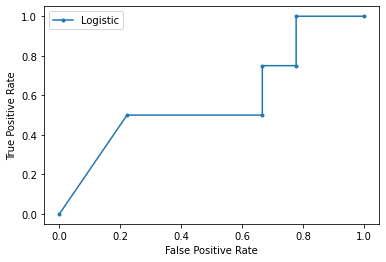

Train on 48 samples, validate on 13 samples
Epoch 1/5000
48/48 [==============================] - 0s 3ms/step - loss: 0.8003 - accuracy: 0.3750 - val_loss: 0.7428 - val_accuracy: 0.3846
Epoch 2/5000
48/48 [==============================] - 0s 222us/step - loss: 0.7422 - accuracy: 0.4375 - val_loss: 0.6919 - val_accuracy: 0.6154
Epoch 3/5000
48/48 [==============================] - 0s 228us/step - loss: 0.7089 - accuracy: 0.4375 - val_loss: 0.6572 - val_accuracy: 0.6923
Epoch 4/5000
48/48 [==============================] - 0s 251us/step - loss: 0.6790 - accuracy: 0.5000 - val_loss: 0.6349 - val_accuracy: 0.5385
Epoch 5/5000
48/48 [==============================] - 0s 249us/step - loss: 0.6624 - accuracy: 0.6667 - val_loss: 0.6169 - val_accuracy: 0.6923
Epoch 6/5000
48/48 [==============================] - 0s 291us/step - loss: 0.6524 - accuracy: 0.6458 - val_loss: 0.6023 - val_accuracy: 0.6923
Epoch 7/5000
48/48 [==============================] - 0s 226us/step - loss: 0.6468 - accuracy:

48/48 [==============================] - 0s 250us/step - loss: 0.3970 - accuracy: 0.8542 - val_loss: 0.4055 - val_accuracy: 0.7692
Epoch 58/5000
48/48 [==============================] - 0s 208us/step - loss: 0.3927 - accuracy: 0.8542 - val_loss: 0.4049 - val_accuracy: 0.7692
Epoch 59/5000
48/48 [==============================] - 0s 202us/step - loss: 0.3884 - accuracy: 0.8542 - val_loss: 0.4059 - val_accuracy: 0.7692
Epoch 60/5000
48/48 [==============================] - 0s 249us/step - loss: 0.3819 - accuracy: 0.8542 - val_loss: 0.4024 - val_accuracy: 0.7692
Epoch 61/5000
48/48 [==============================] - 0s 217us/step - loss: 0.3846 - accuracy: 0.8958 - val_loss: 0.3991 - val_accuracy: 0.7692
Epoch 62/5000
48/48 [==============================] - 0s 270us/step - loss: 0.3777 - accuracy: 0.8750 - val_loss: 0.3954 - val_accuracy: 0.7692
Epoch 63/5000
48/48 [==============================] - 0s 208us/step - loss: 0.3724 - accuracy: 0.8542 - val_loss: 0.3981 - val_accuracy: 0.7692

48/48 [==============================] - 0s 249us/step - loss: 0.2130 - accuracy: 0.9375 - val_loss: 0.3954 - val_accuracy: 0.7692
Epoch 114/5000
48/48 [==============================] - 0s 250us/step - loss: 0.2109 - accuracy: 0.9583 - val_loss: 0.4011 - val_accuracy: 0.7692
Epoch 115/5000
48/48 [==============================] - 0s 249us/step - loss: 0.2087 - accuracy: 0.9583 - val_loss: 0.4091 - val_accuracy: 0.7692
Epoch 116/5000
48/48 [==============================] - 0s 249us/step - loss: 0.2053 - accuracy: 0.9583 - val_loss: 0.4060 - val_accuracy: 0.7692
Epoch 117/5000
48/48 [==============================] - 0s 229us/step - loss: 0.2074 - accuracy: 0.9375 - val_loss: 0.4046 - val_accuracy: 0.7692
Epoch 118/5000
48/48 [==============================] - 0s 278us/step - loss: 0.2031 - accuracy: 0.9375 - val_loss: 0.4081 - val_accuracy: 0.7692
Epoch 119/5000
48/48 [==============================] - 0s 240us/step - loss: 0.2010 - accuracy: 0.9375 - val_loss: 0.4068 - val_accuracy: 

48/48 [==============================] - 0s 229us/step - loss: 0.1256 - accuracy: 0.9792 - val_loss: 0.5411 - val_accuracy: 0.7692
Epoch 170/5000
48/48 [==============================] - 0s 187us/step - loss: 0.1238 - accuracy: 0.9583 - val_loss: 0.5370 - val_accuracy: 0.7692
Epoch 171/5000
48/48 [==============================] - 0s 178us/step - loss: 0.1218 - accuracy: 0.9583 - val_loss: 0.5483 - val_accuracy: 0.7692
Epoch 172/5000
48/48 [==============================] - 0s 187us/step - loss: 0.1218 - accuracy: 0.9792 - val_loss: 0.5536 - val_accuracy: 0.7692
Epoch 173/5000
48/48 [==============================] - 0s 208us/step - loss: 0.1189 - accuracy: 0.9792 - val_loss: 0.5496 - val_accuracy: 0.7692
Epoch 174/5000
48/48 [==============================] - 0s 188us/step - loss: 0.1212 - accuracy: 0.9583 - val_loss: 0.5422 - val_accuracy: 0.7692
Epoch 175/5000
48/48 [==============================] - 0s 229us/step - loss: 0.1179 - accuracy: 0.9583 - val_loss: 0.5501 - val_accuracy: 

48/48 [==============================] - 0s 187us/step - loss: 0.0711 - accuracy: 1.0000 - val_loss: 0.7273 - val_accuracy: 0.7692
Epoch 226/5000
48/48 [==============================] - 0s 223us/step - loss: 0.0705 - accuracy: 1.0000 - val_loss: 0.7243 - val_accuracy: 0.7692
Epoch 227/5000
48/48 [==============================] - 0s 228us/step - loss: 0.0683 - accuracy: 1.0000 - val_loss: 0.7102 - val_accuracy: 0.7692
Epoch 228/5000
48/48 [==============================] - 0s 261us/step - loss: 0.0693 - accuracy: 1.0000 - val_loss: 0.7113 - val_accuracy: 0.7692
Epoch 229/5000
48/48 [==============================] - 0s 222us/step - loss: 0.0687 - accuracy: 1.0000 - val_loss: 0.7295 - val_accuracy: 0.7692
Epoch 230/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0672 - accuracy: 1.0000 - val_loss: 0.7472 - val_accuracy: 0.7692
Epoch 231/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0669 - accuracy: 1.0000 - val_loss: 0.7472 - val_accuracy: 

48/48 [==============================] - 0s 224us/step - loss: 0.0443 - accuracy: 1.0000 - val_loss: 0.8911 - val_accuracy: 0.7692
Epoch 282/5000
48/48 [==============================] - 0s 221us/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 0.8916 - val_accuracy: 0.7692
Epoch 283/5000
48/48 [==============================] - 0s 189us/step - loss: 0.0396 - accuracy: 1.0000 - val_loss: 0.9058 - val_accuracy: 0.7692
Epoch 284/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0389 - accuracy: 1.0000 - val_loss: 0.9126 - val_accuracy: 0.7692
Epoch 285/5000
48/48 [==============================] - 0s 185us/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 0.9117 - val_accuracy: 0.7692
Epoch 286/5000
48/48 [==============================] - 0s 291us/step - loss: 0.0383 - accuracy: 1.0000 - val_loss: 0.9098 - val_accuracy: 0.7692
Epoch 287/5000
48/48 [==============================] - 0s 199us/step - loss: 0.0384 - accuracy: 1.0000 - val_loss: 0.9158 - val_accuracy: 

48/48 [==============================] - 0s 234us/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 1.0574 - val_accuracy: 0.7692
Epoch 338/5000
48/48 [==============================] - 0s 228us/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 1.0703 - val_accuracy: 0.7692
Epoch 339/5000
48/48 [==============================] - 0s 189us/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 1.0705 - val_accuracy: 0.6923
Epoch 340/5000
48/48 [==============================] - 0s 237us/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 1.0762 - val_accuracy: 0.6923
Epoch 341/5000
48/48 [==============================] - 0s 212us/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 1.0833 - val_accuracy: 0.7692
Epoch 342/5000
48/48 [==============================] - 0s 210us/step - loss: 0.0226 - accuracy: 1.0000 - val_loss: 1.0800 - val_accuracy: 0.7692
Epoch 343/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0226 - accuracy: 1.0000 - val_loss: 1.0713 - val_accuracy: 

48/48 [==============================] - 0s 229us/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.2073 - val_accuracy: 0.6923
Epoch 394/5000
48/48 [==============================] - 0s 265us/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 1.2011 - val_accuracy: 0.6923
Epoch 395/5000
48/48 [==============================] - 0s 242us/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 1.2113 - val_accuracy: 0.6923
Epoch 396/5000
48/48 [==============================] - 0s 214us/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 1.2101 - val_accuracy: 0.6923
Epoch 397/5000
48/48 [==============================] - 0s 242us/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 1.2114 - val_accuracy: 0.6923
Epoch 398/5000
48/48 [==============================] - 0s 209us/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 1.2175 - val_accuracy: 0.6923
Epoch 399/5000
48/48 [==============================] - 0s 338us/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 1.2168 - val_accuracy: 

48/48 [==============================] - 0s 207us/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 1.3271 - val_accuracy: 0.6923
Epoch 450/5000
48/48 [==============================] - 0s 199us/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 1.3369 - val_accuracy: 0.6923
Epoch 451/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 1.3359 - val_accuracy: 0.6923
Epoch 452/5000
48/48 [==============================] - 0s 231us/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 1.3336 - val_accuracy: 0.6923
Epoch 453/5000
48/48 [==============================] - 0s 227us/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 1.3390 - val_accuracy: 0.6923
Epoch 454/5000
48/48 [==============================] - 0s 374us/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 1.3434 - val_accuracy: 0.6923
Epoch 455/5000
48/48 [==============================] - 0s 230us/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 1.3459 - val_accuracy: 

48/48 [==============================] - 0s 227us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.4396 - val_accuracy: 0.6923
Epoch 506/5000
48/48 [==============================] - 0s 240us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.4401 - val_accuracy: 0.6923
Epoch 507/5000
48/48 [==============================] - 0s 228us/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.4398 - val_accuracy: 0.6923
Epoch 508/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.4450 - val_accuracy: 0.6923
Epoch 509/5000
48/48 [==============================] - 0s 237us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 1.4481 - val_accuracy: 0.6923
Epoch 510/5000
48/48 [==============================] - 0s 241us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 1.4478 - val_accuracy: 0.6923
Epoch 511/5000
48/48 [==============================] - 0s 228us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 1.4471 - val_accuracy: 

Epoch 561/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.5572 - val_accuracy: 0.6923
Epoch 562/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.5591 - val_accuracy: 0.6923
Epoch 563/5000
48/48 [==============================] - 0s 168us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.5601 - val_accuracy: 0.6923
Epoch 564/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.5603 - val_accuracy: 0.6923
Epoch 565/5000
48/48 [==============================] - 0s 186us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.5628 - val_accuracy: 0.6923
Epoch 566/5000
48/48 [==============================] - 0s 188us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.5649 - val_accuracy: 0.6923
Epoch 567/5000
48/48 [==============================] - 0s 212us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.5667 -

48/48 [==============================] - 0s 223us/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.6715 - val_accuracy: 0.6923
Epoch 618/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.6715 - val_accuracy: 0.6923
Epoch 619/5000
48/48 [==============================] - 0s 188us/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.6736 - val_accuracy: 0.6923
Epoch 620/5000
48/48 [==============================] - 0s 249us/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.6747 - val_accuracy: 0.6923
Epoch 621/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.6716 - val_accuracy: 0.6923
Epoch 622/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.6736 - val_accuracy: 0.6923
Epoch 623/5000
48/48 [==============================] - 0s 243us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.6744 - val_accuracy: 

48/48 [==============================] - 0s 220us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.7605 - val_accuracy: 0.6923
Epoch 674/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.7635 - val_accuracy: 0.6923
Epoch 675/5000
48/48 [==============================] - 0s 282us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.7670 - val_accuracy: 0.6923
Epoch 676/5000
48/48 [==============================] - 0s 223us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.7698 - val_accuracy: 0.6923
Epoch 677/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.7707 - val_accuracy: 0.6923
Epoch 678/5000
48/48 [==============================] - 0s 209us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.7730 - val_accuracy: 0.6923
Epoch 679/5000
48/48 [==============================] - 0s 232us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.7748 - val_accuracy: 

Epoch 729/5000
48/48 [==============================] - 0s 213us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8482 - val_accuracy: 0.6923
Epoch 730/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8504 - val_accuracy: 0.6923
Epoch 731/5000
48/48 [==============================] - 0s 257us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8557 - val_accuracy: 0.6923
Epoch 732/5000
48/48 [==============================] - 0s 355us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8582 - val_accuracy: 0.6923
Epoch 733/5000
48/48 [==============================] - 0s 245us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.8594 - val_accuracy: 0.6923
Epoch 734/5000
48/48 [==============================] - 0s 220us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.8571 - val_accuracy: 0.6923
Epoch 735/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.8583 -

Epoch 785/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.9287 - val_accuracy: 0.6923
Epoch 786/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.9306 - val_accuracy: 0.6923
Epoch 787/5000
48/48 [==============================] - 0s 212us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.9338 - val_accuracy: 0.6923
Epoch 788/5000
48/48 [==============================] - 0s 236us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.9371 - val_accuracy: 0.6923
Epoch 789/5000
48/48 [==============================] - 0s 253us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.9391 - val_accuracy: 0.6923
Epoch 790/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.9404 - val_accuracy: 0.6923
Epoch 791/5000
48/48 [==============================] - 0s 353us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.9402 -

48/48 [==============================] - 0s 207us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.0107 - val_accuracy: 0.6923
Epoch 842/5000
48/48 [==============================] - 0s 227us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.0109 - val_accuracy: 0.6923
Epoch 843/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.0123 - val_accuracy: 0.6923
Epoch 844/5000
48/48 [==============================] - 0s 209us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.0152 - val_accuracy: 0.6923
Epoch 845/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.0146 - val_accuracy: 0.6923
Epoch 846/5000
48/48 [==============================] - 0s 188us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.0148 - val_accuracy: 0.6923
Epoch 847/5000
48/48 [==============================] - 0s 232us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.0156 - val_accuracy: 

48/48 [==============================] - 0s 229us/step - loss: 9.0025e-04 - accuracy: 1.0000 - val_loss: 2.0767 - val_accuracy: 0.6923
Epoch 897/5000
48/48 [==============================] - 0s 229us/step - loss: 9.1602e-04 - accuracy: 1.0000 - val_loss: 2.0787 - val_accuracy: 0.6923
Epoch 898/5000
48/48 [==============================] - 0s 216us/step - loss: 8.8530e-04 - accuracy: 1.0000 - val_loss: 2.0776 - val_accuracy: 0.6923
Epoch 899/5000
48/48 [==============================] - 0s 220us/step - loss: 8.8669e-04 - accuracy: 1.0000 - val_loss: 2.0777 - val_accuracy: 0.6923
Epoch 900/5000
48/48 [==============================] - 0s 187us/step - loss: 8.8636e-04 - accuracy: 1.0000 - val_loss: 2.0775 - val_accuracy: 0.6923
Epoch 901/5000
48/48 [==============================] - 0s 292us/step - loss: 8.9909e-04 - accuracy: 1.0000 - val_loss: 2.0788 - val_accuracy: 0.6923
Epoch 902/5000
48/48 [==============================] - 0s 207us/step - loss: 8.8158e-04 - accuracy: 1.0000 - val_l

48/48 [==============================] - 0s 207us/step - loss: 7.4252e-04 - accuracy: 1.0000 - val_loss: 2.1303 - val_accuracy: 0.6923
Epoch 951/5000
48/48 [==============================] - 0s 208us/step - loss: 7.1954e-04 - accuracy: 1.0000 - val_loss: 2.1327 - val_accuracy: 0.6923
Epoch 952/5000
48/48 [==============================] - 0s 271us/step - loss: 7.1484e-04 - accuracy: 1.0000 - val_loss: 2.1339 - val_accuracy: 0.6923
Epoch 953/5000
48/48 [==============================] - 0s 219us/step - loss: 7.1662e-04 - accuracy: 1.0000 - val_loss: 2.1351 - val_accuracy: 0.6923
Epoch 954/5000
48/48 [==============================] - 0s 229us/step - loss: 7.1289e-04 - accuracy: 1.0000 - val_loss: 2.1363 - val_accuracy: 0.6923
Epoch 955/5000
48/48 [==============================] - 0s 486us/step - loss: 7.0727e-04 - accuracy: 1.0000 - val_loss: 2.1367 - val_accuracy: 0.6923
Epoch 956/5000
48/48 [==============================] - 0s 328us/step - loss: 7.0141e-04 - accuracy: 1.0000 - val_l

Epoch 1005/5000
48/48 [==============================] - 0s 190us/step - loss: 6.0840e-04 - accuracy: 1.0000 - val_loss: 2.1807 - val_accuracy: 0.6923
Epoch 1006/5000
48/48 [==============================] - 0s 218us/step - loss: 5.8231e-04 - accuracy: 1.0000 - val_loss: 2.1823 - val_accuracy: 0.6923
Epoch 1007/5000
48/48 [==============================] - 0s 209us/step - loss: 5.8208e-04 - accuracy: 1.0000 - val_loss: 2.1861 - val_accuracy: 0.6923
Epoch 1008/5000
48/48 [==============================] - 0s 182us/step - loss: 5.7704e-04 - accuracy: 1.0000 - val_loss: 2.1865 - val_accuracy: 0.6923
Epoch 1009/5000
48/48 [==============================] - 0s 207us/step - loss: 5.7428e-04 - accuracy: 1.0000 - val_loss: 2.1867 - val_accuracy: 0.6923
Epoch 1010/5000
48/48 [==============================] - 0s 224us/step - loss: 5.7551e-04 - accuracy: 1.0000 - val_loss: 2.1878 - val_accuracy: 0.6923
Epoch 1011/5000
48/48 [==============================] - 0s 203us/step - loss: 5.7472e-04 - ac

48/48 [==============================] - 0s 212us/step - loss: 4.7366e-04 - accuracy: 1.0000 - val_loss: 2.2323 - val_accuracy: 0.6923
Epoch 1060/5000
48/48 [==============================] - 0s 242us/step - loss: 4.7777e-04 - accuracy: 1.0000 - val_loss: 2.2326 - val_accuracy: 0.6923
Epoch 1061/5000
48/48 [==============================] - 0s 237us/step - loss: 4.7389e-04 - accuracy: 1.0000 - val_loss: 2.2352 - val_accuracy: 0.6923
Epoch 1062/5000
48/48 [==============================] - 0s 227us/step - loss: 4.7130e-04 - accuracy: 1.0000 - val_loss: 2.2392 - val_accuracy: 0.6923
Epoch 1063/5000
48/48 [==============================] - 0s 204us/step - loss: 4.6906e-04 - accuracy: 1.0000 - val_loss: 2.2403 - val_accuracy: 0.6923
Epoch 1064/5000
48/48 [==============================] - 0s 186us/step - loss: 4.6603e-04 - accuracy: 1.0000 - val_loss: 2.2392 - val_accuracy: 0.6923
Epoch 1065/5000
48/48 [==============================] - 0s 187us/step - loss: 4.6771e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 204us/step - loss: 3.9131e-04 - accuracy: 1.0000 - val_loss: 2.2843 - val_accuracy: 0.6923
Epoch 1114/5000
48/48 [==============================] - 0s 202us/step - loss: 3.9187e-04 - accuracy: 1.0000 - val_loss: 2.2882 - val_accuracy: 0.6923
Epoch 1115/5000
48/48 [==============================] - 0s 213us/step - loss: 3.8916e-04 - accuracy: 1.0000 - val_loss: 2.2887 - val_accuracy: 0.6923
Epoch 1116/5000
48/48 [==============================] - 0s 194us/step - loss: 3.9121e-04 - accuracy: 1.0000 - val_loss: 2.2898 - val_accuracy: 0.6923
Epoch 1117/5000
48/48 [==============================] - 0s 180us/step - loss: 3.8669e-04 - accuracy: 1.0000 - val_loss: 2.2872 - val_accuracy: 0.6923
Epoch 1118/5000
48/48 [==============================] - 0s 208us/step - loss: 3.8424e-04 - accuracy: 1.0000 - val_loss: 2.2880 - val_accuracy: 0.6923
Epoch 1119/5000
48/48 [==============================] - 0s 209us/step - loss: 3.8031e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 206us/step - loss: 3.2170e-04 - accuracy: 1.0000 - val_loss: 2.3336 - val_accuracy: 0.6923
Epoch 1168/5000
48/48 [==============================] - 0s 188us/step - loss: 3.2282e-04 - accuracy: 1.0000 - val_loss: 2.3325 - val_accuracy: 0.6923
Epoch 1169/5000
48/48 [==============================] - 0s 207us/step - loss: 3.1985e-04 - accuracy: 1.0000 - val_loss: 2.3321 - val_accuracy: 0.6923
Epoch 1170/5000
48/48 [==============================] - 0s 191us/step - loss: 3.1964e-04 - accuracy: 1.0000 - val_loss: 2.3320 - val_accuracy: 0.6923
Epoch 1171/5000
48/48 [==============================] - 0s 186us/step - loss: 3.1603e-04 - accuracy: 1.0000 - val_loss: 2.3336 - val_accuracy: 0.6923
Epoch 1172/5000
48/48 [==============================] - 0s 205us/step - loss: 3.1439e-04 - accuracy: 1.0000 - val_loss: 2.3362 - val_accuracy: 0.6923
Epoch 1173/5000
48/48 [==============================] - 0s 187us/step - loss: 3.1740e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 209us/step - loss: 2.6610e-04 - accuracy: 1.0000 - val_loss: 2.3784 - val_accuracy: 0.6923
Epoch 1222/5000
48/48 [==============================] - 0s 167us/step - loss: 2.6626e-04 - accuracy: 1.0000 - val_loss: 2.3808 - val_accuracy: 0.6923
Epoch 1223/5000
48/48 [==============================] - 0s 187us/step - loss: 2.6304e-04 - accuracy: 1.0000 - val_loss: 2.3817 - val_accuracy: 0.6923
Epoch 1224/5000
48/48 [==============================] - 0s 213us/step - loss: 2.6479e-04 - accuracy: 1.0000 - val_loss: 2.3819 - val_accuracy: 0.6923
Epoch 1225/5000
48/48 [==============================] - 0s 180us/step - loss: 2.6031e-04 - accuracy: 1.0000 - val_loss: 2.3831 - val_accuracy: 0.6923
Epoch 1226/5000
48/48 [==============================] - 0s 199us/step - loss: 2.6121e-04 - accuracy: 1.0000 - val_loss: 2.3840 - val_accuracy: 0.6923
Epoch 1227/5000
48/48 [==============================] - 0s 191us/step - loss: 2.6369e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 199us/step - loss: 2.2087e-04 - accuracy: 1.0000 - val_loss: 2.4251 - val_accuracy: 0.6923
Epoch 1276/5000
48/48 [==============================] - 0s 205us/step - loss: 2.2023e-04 - accuracy: 1.0000 - val_loss: 2.4249 - val_accuracy: 0.6923
Epoch 1277/5000
48/48 [==============================] - 0s 240us/step - loss: 2.1866e-04 - accuracy: 1.0000 - val_loss: 2.4255 - val_accuracy: 0.6923
Epoch 1278/5000
48/48 [==============================] - 0s 187us/step - loss: 2.1876e-04 - accuracy: 1.0000 - val_loss: 2.4265 - val_accuracy: 0.6923
Epoch 1279/5000
48/48 [==============================] - 0s 187us/step - loss: 2.1689e-04 - accuracy: 1.0000 - val_loss: 2.4282 - val_accuracy: 0.6923
Epoch 1280/5000
48/48 [==============================] - 0s 208us/step - loss: 2.1658e-04 - accuracy: 1.0000 - val_loss: 2.4279 - val_accuracy: 0.6923
Epoch 1281/5000
48/48 [==============================] - 0s 212us/step - loss: 2.1919e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 195us/step - loss: 1.8225e-04 - accuracy: 1.0000 - val_loss: 2.4727 - val_accuracy: 0.6923
Epoch 1330/5000
48/48 [==============================] - 0s 205us/step - loss: 1.8530e-04 - accuracy: 1.0000 - val_loss: 2.4732 - val_accuracy: 0.6923
Epoch 1331/5000
48/48 [==============================] - 0s 186us/step - loss: 1.7970e-04 - accuracy: 1.0000 - val_loss: 2.4737 - val_accuracy: 0.6923
Epoch 1332/5000
48/48 [==============================] - 0s 220us/step - loss: 1.7893e-04 - accuracy: 1.0000 - val_loss: 2.4752 - val_accuracy: 0.6923
Epoch 1333/5000
48/48 [==============================] - 0s 188us/step - loss: 1.7812e-04 - accuracy: 1.0000 - val_loss: 2.4771 - val_accuracy: 0.6923
Epoch 1334/5000
48/48 [==============================] - 0s 192us/step - loss: 1.8069e-04 - accuracy: 1.0000 - val_loss: 2.4779 - val_accuracy: 0.6923
Epoch 1335/5000
48/48 [==============================] - 0s 193us/step - loss: 1.7722e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 1.4900e-04 - accuracy: 1.0000 - val_loss: 2.5173 - val_accuracy: 0.6923
Epoch 1384/5000
48/48 [==============================] - 0s 271us/step - loss: 1.4954e-04 - accuracy: 1.0000 - val_loss: 2.5180 - val_accuracy: 0.6923
Epoch 1385/5000
48/48 [==============================] - 0s 248us/step - loss: 1.4828e-04 - accuracy: 1.0000 - val_loss: 2.5202 - val_accuracy: 0.6923
Epoch 1386/5000
48/48 [==============================] - 0s 228us/step - loss: 1.4822e-04 - accuracy: 1.0000 - val_loss: 2.5194 - val_accuracy: 0.6923
Epoch 1387/5000
48/48 [==============================] - 0s 269us/step - loss: 1.4799e-04 - accuracy: 1.0000 - val_loss: 2.5206 - val_accuracy: 0.6923
Epoch 1388/5000
48/48 [==============================] - 0s 241us/step - loss: 1.4653e-04 - accuracy: 1.0000 - val_loss: 2.5212 - val_accuracy: 0.6923
Epoch 1389/5000
48/48 [==============================] - 0s 244us/step - loss: 1.4703e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 1.2385e-04 - accuracy: 1.0000 - val_loss: 2.5631 - val_accuracy: 0.6923
Epoch 1438/5000
48/48 [==============================] - 0s 208us/step - loss: 1.2339e-04 - accuracy: 1.0000 - val_loss: 2.5648 - val_accuracy: 0.6923
Epoch 1439/5000
48/48 [==============================] - 0s 217us/step - loss: 1.2339e-04 - accuracy: 1.0000 - val_loss: 2.5667 - val_accuracy: 0.6923
Epoch 1440/5000
48/48 [==============================] - 0s 189us/step - loss: 1.2181e-04 - accuracy: 1.0000 - val_loss: 2.5659 - val_accuracy: 0.6923
Epoch 1441/5000
48/48 [==============================] - 0s 208us/step - loss: 1.2228e-04 - accuracy: 1.0000 - val_loss: 2.5653 - val_accuracy: 0.6923
Epoch 1442/5000
48/48 [==============================] - 0s 175us/step - loss: 1.2177e-04 - accuracy: 1.0000 - val_loss: 2.5662 - val_accuracy: 0.6923
Epoch 1443/5000
48/48 [==============================] - 0s 210us/step - loss: 1.2173e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 1.0360e-04 - accuracy: 1.0000 - val_loss: 2.6076 - val_accuracy: 0.6923
Epoch 1492/5000
48/48 [==============================] - 0s 194us/step - loss: 1.0225e-04 - accuracy: 1.0000 - val_loss: 2.6073 - val_accuracy: 0.6923
Epoch 1493/5000
48/48 [==============================] - 0s 196us/step - loss: 1.0238e-04 - accuracy: 1.0000 - val_loss: 2.6087 - val_accuracy: 0.6923
Epoch 1494/5000
48/48 [==============================] - 0s 187us/step - loss: 1.0173e-04 - accuracy: 1.0000 - val_loss: 2.6103 - val_accuracy: 0.6923
Epoch 1495/5000
48/48 [==============================] - 0s 186us/step - loss: 1.0156e-04 - accuracy: 1.0000 - val_loss: 2.6104 - val_accuracy: 0.6923
Epoch 1496/5000
48/48 [==============================] - 0s 187us/step - loss: 1.0193e-04 - accuracy: 1.0000 - val_loss: 2.6124 - val_accuracy: 0.6923
Epoch 1497/5000
48/48 [==============================] - 0s 188us/step - loss: 1.0113e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 8.5544e-05 - accuracy: 1.0000 - val_loss: 2.6486 - val_accuracy: 0.6923
Epoch 1546/5000
48/48 [==============================] - 0s 223us/step - loss: 8.5772e-05 - accuracy: 1.0000 - val_loss: 2.6500 - val_accuracy: 0.6923
Epoch 1547/5000
48/48 [==============================] - 0s 216us/step - loss: 8.5593e-05 - accuracy: 1.0000 - val_loss: 2.6519 - val_accuracy: 0.6923
Epoch 1548/5000
48/48 [==============================] - 0s 225us/step - loss: 8.6165e-05 - accuracy: 1.0000 - val_loss: 2.6528 - val_accuracy: 0.6923
Epoch 1549/5000
48/48 [==============================] - 0s 187us/step - loss: 8.4769e-05 - accuracy: 1.0000 - val_loss: 2.6545 - val_accuracy: 0.6923
Epoch 1550/5000
48/48 [==============================] - 0s 208us/step - loss: 8.4589e-05 - accuracy: 1.0000 - val_loss: 2.6550 - val_accuracy: 0.6923
Epoch 1551/5000
48/48 [==============================] - 0s 187us/step - loss: 8.4116e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 7.1801e-05 - accuracy: 1.0000 - val_loss: 2.6914 - val_accuracy: 0.6923
Epoch 1600/5000
48/48 [==============================] - 0s 211us/step - loss: 7.1262e-05 - accuracy: 1.0000 - val_loss: 2.6924 - val_accuracy: 0.6923
Epoch 1601/5000
48/48 [==============================] - 0s 209us/step - loss: 7.1088e-05 - accuracy: 1.0000 - val_loss: 2.6939 - val_accuracy: 0.6923
Epoch 1602/5000
48/48 [==============================] - 0s 198us/step - loss: 7.1201e-05 - accuracy: 1.0000 - val_loss: 2.6936 - val_accuracy: 0.6923
Epoch 1603/5000
48/48 [==============================] - 0s 190us/step - loss: 7.0668e-05 - accuracy: 1.0000 - val_loss: 2.6952 - val_accuracy: 0.6923
Epoch 1604/5000
48/48 [==============================] - 0s 228us/step - loss: 7.0691e-05 - accuracy: 1.0000 - val_loss: 2.6981 - val_accuracy: 0.6923
Epoch 1605/5000
48/48 [==============================] - 0s 249us/step - loss: 7.0595e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 210us/step - loss: 6.0779e-05 - accuracy: 1.0000 - val_loss: 2.7385 - val_accuracy: 0.6923
Epoch 1654/5000
48/48 [==============================] - 0s 249us/step - loss: 6.0044e-05 - accuracy: 1.0000 - val_loss: 2.7384 - val_accuracy: 0.6923
Epoch 1655/5000
48/48 [==============================] - 0s 204us/step - loss: 6.0156e-05 - accuracy: 1.0000 - val_loss: 2.7375 - val_accuracy: 0.6923
Epoch 1656/5000
48/48 [==============================] - 0s 216us/step - loss: 5.9741e-05 - accuracy: 1.0000 - val_loss: 2.7371 - val_accuracy: 0.6923
Epoch 1657/5000
48/48 [==============================] - 0s 206us/step - loss: 5.9736e-05 - accuracy: 1.0000 - val_loss: 2.7384 - val_accuracy: 0.6923
Epoch 1658/5000
48/48 [==============================] - 0s 193us/step - loss: 6.0266e-05 - accuracy: 1.0000 - val_loss: 2.7407 - val_accuracy: 0.6923
Epoch 1659/5000
48/48 [==============================] - 0s 190us/step - loss: 5.9081e-05 - accuracy: 1.0000 -

Epoch 1707/5000
48/48 [==============================] - 0s 208us/step - loss: 5.0923e-05 - accuracy: 1.0000 - val_loss: 2.7816 - val_accuracy: 0.6923
Epoch 1708/5000
48/48 [==============================] - 0s 185us/step - loss: 5.0628e-05 - accuracy: 1.0000 - val_loss: 2.7823 - val_accuracy: 0.6923
Epoch 1709/5000
48/48 [==============================] - 0s 207us/step - loss: 5.0516e-05 - accuracy: 1.0000 - val_loss: 2.7830 - val_accuracy: 0.6923
Epoch 1710/5000
48/48 [==============================] - 0s 187us/step - loss: 5.0081e-05 - accuracy: 1.0000 - val_loss: 2.7842 - val_accuracy: 0.6923
Epoch 1711/5000
48/48 [==============================] - 0s 220us/step - loss: 4.9955e-05 - accuracy: 1.0000 - val_loss: 2.7845 - val_accuracy: 0.6923
Epoch 1712/5000
48/48 [==============================] - 0s 204us/step - loss: 5.0308e-05 - accuracy: 1.0000 - val_loss: 2.7834 - val_accuracy: 0.6923
Epoch 1713/5000
48/48 [==============================] - 0s 207us/step - loss: 5.0350e-05 - ac

48/48 [==============================] - 0s 187us/step - loss: 4.2827e-05 - accuracy: 1.0000 - val_loss: 2.8185 - val_accuracy: 0.6923
Epoch 1761/5000
48/48 [==============================] - 0s 204us/step - loss: 4.3373e-05 - accuracy: 1.0000 - val_loss: 2.8213 - val_accuracy: 0.6923
Epoch 1762/5000
48/48 [==============================] - 0s 223us/step - loss: 4.2792e-05 - accuracy: 1.0000 - val_loss: 2.8235 - val_accuracy: 0.6923
Epoch 1763/5000
48/48 [==============================] - 0s 187us/step - loss: 4.2557e-05 - accuracy: 1.0000 - val_loss: 2.8241 - val_accuracy: 0.6923
Epoch 1764/5000
48/48 [==============================] - 0s 187us/step - loss: 4.2362e-05 - accuracy: 1.0000 - val_loss: 2.8259 - val_accuracy: 0.6923
Epoch 1765/5000
48/48 [==============================] - 0s 213us/step - loss: 4.2290e-05 - accuracy: 1.0000 - val_loss: 2.8259 - val_accuracy: 0.6923
Epoch 1766/5000
48/48 [==============================] - 0s 210us/step - loss: 4.2850e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 299us/step - loss: 3.6212e-05 - accuracy: 1.0000 - val_loss: 2.8641 - val_accuracy: 0.6923
Epoch 1815/5000
48/48 [==============================] - 0s 205us/step - loss: 3.6150e-05 - accuracy: 1.0000 - val_loss: 2.8634 - val_accuracy: 0.6923
Epoch 1816/5000
48/48 [==============================] - 0s 209us/step - loss: 3.5892e-05 - accuracy: 1.0000 - val_loss: 2.8644 - val_accuracy: 0.6923
Epoch 1817/5000
48/48 [==============================] - 0s 221us/step - loss: 3.5991e-05 - accuracy: 1.0000 - val_loss: 2.8650 - val_accuracy: 0.6923
Epoch 1818/5000
48/48 [==============================] - 0s 192us/step - loss: 3.5808e-05 - accuracy: 1.0000 - val_loss: 2.8672 - val_accuracy: 0.6923
Epoch 1819/5000
48/48 [==============================] - 0s 248us/step - loss: 3.5721e-05 - accuracy: 1.0000 - val_loss: 2.8682 - val_accuracy: 0.6923
Epoch 1820/5000
48/48 [==============================] - 0s 239us/step - loss: 3.5593e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 250us/step - loss: 3.0682e-05 - accuracy: 1.0000 - val_loss: 2.9033 - val_accuracy: 0.6923
Epoch 1869/5000
48/48 [==============================] - 0s 249us/step - loss: 3.0508e-05 - accuracy: 1.0000 - val_loss: 2.9046 - val_accuracy: 0.6923
Epoch 1870/5000
48/48 [==============================] - 0s 249us/step - loss: 3.0329e-05 - accuracy: 1.0000 - val_loss: 2.9052 - val_accuracy: 0.6923
Epoch 1871/5000
48/48 [==============================] - 0s 207us/step - loss: 3.0677e-05 - accuracy: 1.0000 - val_loss: 2.9067 - val_accuracy: 0.6923
Epoch 1872/5000
48/48 [==============================] - 0s 228us/step - loss: 3.0441e-05 - accuracy: 1.0000 - val_loss: 2.9061 - val_accuracy: 0.6923
Epoch 1873/5000
48/48 [==============================] - 0s 223us/step - loss: 3.0045e-05 - accuracy: 1.0000 - val_loss: 2.9078 - val_accuracy: 0.6923
Epoch 1874/5000
48/48 [==============================] - 0s 205us/step - loss: 2.9885e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 291us/step - loss: 2.6109e-05 - accuracy: 1.0000 - val_loss: 2.9466 - val_accuracy: 0.6923
Epoch 1923/5000
48/48 [==============================] - 0s 208us/step - loss: 2.6100e-05 - accuracy: 1.0000 - val_loss: 2.9481 - val_accuracy: 0.6923
Epoch 1924/5000
48/48 [==============================] - 0s 201us/step - loss: 2.5950e-05 - accuracy: 1.0000 - val_loss: 2.9483 - val_accuracy: 0.6923
Epoch 1925/5000
48/48 [==============================] - 0s 218us/step - loss: 2.5668e-05 - accuracy: 1.0000 - val_loss: 2.9484 - val_accuracy: 0.6923
Epoch 1926/5000
48/48 [==============================] - 0s 208us/step - loss: 2.6033e-05 - accuracy: 1.0000 - val_loss: 2.9485 - val_accuracy: 0.6923
Epoch 1927/5000
48/48 [==============================] - 0s 292us/step - loss: 2.5540e-05 - accuracy: 1.0000 - val_loss: 2.9496 - val_accuracy: 0.6923
Epoch 1928/5000
48/48 [==============================] - 0s 186us/step - loss: 2.5415e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 249us/step - loss: 2.2012e-05 - accuracy: 1.0000 - val_loss: 2.9847 - val_accuracy: 0.6923
Epoch 1977/5000
48/48 [==============================] - 0s 238us/step - loss: 2.1935e-05 - accuracy: 1.0000 - val_loss: 2.9852 - val_accuracy: 0.6923
Epoch 1978/5000
48/48 [==============================] - 0s 207us/step - loss: 2.2195e-05 - accuracy: 1.0000 - val_loss: 2.9843 - val_accuracy: 0.6923
Epoch 1979/5000
48/48 [==============================] - 0s 191us/step - loss: 2.1706e-05 - accuracy: 1.0000 - val_loss: 2.9851 - val_accuracy: 0.6923
Epoch 1980/5000
48/48 [==============================] - 0s 213us/step - loss: 2.2172e-05 - accuracy: 1.0000 - val_loss: 2.9861 - val_accuracy: 0.6923
Epoch 1981/5000
48/48 [==============================] - 0s 229us/step - loss: 2.1666e-05 - accuracy: 1.0000 - val_loss: 2.9890 - val_accuracy: 0.6923
Epoch 1982/5000
48/48 [==============================] - 0s 208us/step - loss: 2.1595e-05 - accuracy: 1.0000 -

Epoch 2030/5000
48/48 [==============================] - 0s 191us/step - loss: 1.8798e-05 - accuracy: 1.0000 - val_loss: 3.0272 - val_accuracy: 0.6923
Epoch 2031/5000
48/48 [==============================] - 0s 173us/step - loss: 1.8601e-05 - accuracy: 1.0000 - val_loss: 3.0265 - val_accuracy: 0.6923
Epoch 2032/5000
48/48 [==============================] - 0s 209us/step - loss: 1.8732e-05 - accuracy: 1.0000 - val_loss: 3.0262 - val_accuracy: 0.6923
Epoch 2033/5000
48/48 [==============================] - 0s 187us/step - loss: 1.8458e-05 - accuracy: 1.0000 - val_loss: 3.0263 - val_accuracy: 0.6923
Epoch 2034/5000
48/48 [==============================] - 0s 187us/step - loss: 1.8419e-05 - accuracy: 1.0000 - val_loss: 3.0277 - val_accuracy: 0.6923
Epoch 2035/5000
48/48 [==============================] - 0s 214us/step - loss: 1.8443e-05 - accuracy: 1.0000 - val_loss: 3.0296 - val_accuracy: 0.6923
Epoch 2036/5000
48/48 [==============================] - 0s 182us/step - loss: 1.8427e-05 - ac

48/48 [==============================] - 0s 189us/step - loss: 1.6062e-05 - accuracy: 1.0000 - val_loss: 3.0661 - val_accuracy: 0.6923
Epoch 2085/5000
48/48 [==============================] - 0s 199us/step - loss: 1.5808e-05 - accuracy: 1.0000 - val_loss: 3.0671 - val_accuracy: 0.6923
Epoch 2086/5000
48/48 [==============================] - 0s 188us/step - loss: 1.5748e-05 - accuracy: 1.0000 - val_loss: 3.0678 - val_accuracy: 0.6923
Epoch 2087/5000
48/48 [==============================] - 0s 194us/step - loss: 1.5741e-05 - accuracy: 1.0000 - val_loss: 3.0702 - val_accuracy: 0.6923
Epoch 2088/5000
48/48 [==============================] - 0s 187us/step - loss: 1.5655e-05 - accuracy: 1.0000 - val_loss: 3.0715 - val_accuracy: 0.6923
Epoch 2089/5000
48/48 [==============================] - 0s 206us/step - loss: 1.6100e-05 - accuracy: 1.0000 - val_loss: 3.0727 - val_accuracy: 0.6923
Epoch 2090/5000
48/48 [==============================] - 0s 276us/step - loss: 1.5688e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 172us/step - loss: 1.3479e-05 - accuracy: 1.0000 - val_loss: 3.1058 - val_accuracy: 0.6923
Epoch 2139/5000
48/48 [==============================] - 0s 188us/step - loss: 1.3474e-05 - accuracy: 1.0000 - val_loss: 3.1078 - val_accuracy: 0.6923
Epoch 2140/5000
48/48 [==============================] - 0s 191us/step - loss: 1.3442e-05 - accuracy: 1.0000 - val_loss: 3.1086 - val_accuracy: 0.6923
Epoch 2141/5000
48/48 [==============================] - 0s 182us/step - loss: 1.3381e-05 - accuracy: 1.0000 - val_loss: 3.1100 - val_accuracy: 0.6923
Epoch 2142/5000
48/48 [==============================] - 0s 208us/step - loss: 1.3278e-05 - accuracy: 1.0000 - val_loss: 3.1105 - val_accuracy: 0.6923
Epoch 2143/5000
48/48 [==============================] - 0s 208us/step - loss: 1.3407e-05 - accuracy: 1.0000 - val_loss: 3.1098 - val_accuracy: 0.6923
Epoch 2144/5000
48/48 [==============================] - 0s 270us/step - loss: 1.3244e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 311us/step - loss: 1.1440e-05 - accuracy: 1.0000 - val_loss: 3.1470 - val_accuracy: 0.6923
Epoch 2193/5000
48/48 [==============================] - 0s 208us/step - loss: 1.1481e-05 - accuracy: 1.0000 - val_loss: 3.1486 - val_accuracy: 0.6923
Epoch 2194/5000
48/48 [==============================] - 0s 193us/step - loss: 1.1633e-05 - accuracy: 1.0000 - val_loss: 3.1507 - val_accuracy: 0.6923
Epoch 2195/5000
48/48 [==============================] - 0s 190us/step - loss: 1.1682e-05 - accuracy: 1.0000 - val_loss: 3.1503 - val_accuracy: 0.6923
Epoch 2196/5000
48/48 [==============================] - 0s 195us/step - loss: 1.1418e-05 - accuracy: 1.0000 - val_loss: 3.1502 - val_accuracy: 0.6923
Epoch 2197/5000
48/48 [==============================] - 0s 209us/step - loss: 1.1384e-05 - accuracy: 1.0000 - val_loss: 3.1488 - val_accuracy: 0.6923
Epoch 2198/5000
48/48 [==============================] - 0s 206us/step - loss: 1.1230e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 203us/step - loss: 9.7677e-06 - accuracy: 1.0000 - val_loss: 3.1873 - val_accuracy: 0.6923
Epoch 2247/5000
48/48 [==============================] - 0s 198us/step - loss: 9.7424e-06 - accuracy: 1.0000 - val_loss: 3.1867 - val_accuracy: 0.6923
Epoch 2248/5000
48/48 [==============================] - 0s 189us/step - loss: 9.7310e-06 - accuracy: 1.0000 - val_loss: 3.1864 - val_accuracy: 0.6923
Epoch 2249/5000
48/48 [==============================] - 0s 187us/step - loss: 9.7358e-06 - accuracy: 1.0000 - val_loss: 3.1852 - val_accuracy: 0.6923
Epoch 2250/5000
48/48 [==============================] - 0s 183us/step - loss: 9.7266e-06 - accuracy: 1.0000 - val_loss: 3.1845 - val_accuracy: 0.6923
Epoch 2251/5000
48/48 [==============================] - ETA: 0s - loss: 1.1274e-05 - accuracy: 1.00 - 0s 195us/step - loss: 9.5938e-06 - accuracy: 1.0000 - val_loss: 3.1871 - val_accuracy: 0.6923
Epoch 2252/5000
48/48 [==============================] - 0s 180u

48/48 [==============================] - 0s 208us/step - loss: 8.4006e-06 - accuracy: 1.0000 - val_loss: 3.2247 - val_accuracy: 0.6923
Epoch 2301/5000
48/48 [==============================] - 0s 222us/step - loss: 8.3599e-06 - accuracy: 1.0000 - val_loss: 3.2263 - val_accuracy: 0.6923
Epoch 2302/5000
48/48 [==============================] - 0s 221us/step - loss: 8.2899e-06 - accuracy: 1.0000 - val_loss: 3.2269 - val_accuracy: 0.6923
Epoch 2303/5000
48/48 [==============================] - 0s 207us/step - loss: 8.3110e-06 - accuracy: 1.0000 - val_loss: 3.2270 - val_accuracy: 0.6923
Epoch 2304/5000
48/48 [==============================] - 0s 353us/step - loss: 8.3913e-06 - accuracy: 1.0000 - val_loss: 3.2298 - val_accuracy: 0.6923
Epoch 2305/5000
48/48 [==============================] - 0s 252us/step - loss: 8.2709e-06 - accuracy: 1.0000 - val_loss: 3.2306 - val_accuracy: 0.6923
Epoch 2306/5000
48/48 [==============================] - 0s 187us/step - loss: 8.2485e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 223us/step - loss: 7.2262e-06 - accuracy: 1.0000 - val_loss: 3.2638 - val_accuracy: 0.6923
Epoch 2355/5000
48/48 [==============================] - 0s 249us/step - loss: 7.0923e-06 - accuracy: 1.0000 - val_loss: 3.2654 - val_accuracy: 0.6923
Epoch 2356/5000
48/48 [==============================] - 0s 288us/step - loss: 7.0688e-06 - accuracy: 1.0000 - val_loss: 3.2657 - val_accuracy: 0.6923
Epoch 2357/5000
48/48 [==============================] - 0s 437us/step - loss: 7.1537e-06 - accuracy: 1.0000 - val_loss: 3.2660 - val_accuracy: 0.6923
Epoch 2358/5000
48/48 [==============================] - 0s 446us/step - loss: 7.0854e-06 - accuracy: 1.0000 - val_loss: 3.2662 - val_accuracy: 0.6923
Epoch 2359/5000
48/48 [==============================] - 0s 213us/step - loss: 7.0101e-06 - accuracy: 1.0000 - val_loss: 3.2675 - val_accuracy: 0.6923
Epoch 2360/5000
48/48 [==============================] - 0s 212us/step - loss: 6.9809e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 6.1067e-06 - accuracy: 1.0000 - val_loss: 3.3026 - val_accuracy: 0.6923
Epoch 2409/5000
48/48 [==============================] - 0s 187us/step - loss: 6.1384e-06 - accuracy: 1.0000 - val_loss: 3.3014 - val_accuracy: 0.6923
Epoch 2410/5000
48/48 [==============================] - 0s 196us/step - loss: 6.0951e-06 - accuracy: 1.0000 - val_loss: 3.3021 - val_accuracy: 0.6923
Epoch 2411/5000
48/48 [==============================] - 0s 229us/step - loss: 5.9947e-06 - accuracy: 1.0000 - val_loss: 3.3041 - val_accuracy: 0.6923
Epoch 2412/5000
48/48 [==============================] - 0s 208us/step - loss: 5.9811e-06 - accuracy: 1.0000 - val_loss: 3.3058 - val_accuracy: 0.6923
Epoch 2413/5000
48/48 [==============================] - 0s 193us/step - loss: 5.9773e-06 - accuracy: 1.0000 - val_loss: 3.3076 - val_accuracy: 0.6923
Epoch 2414/5000
48/48 [==============================] - 0s 183us/step - loss: 6.0203e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 228us/step - loss: 5.1774e-06 - accuracy: 1.0000 - val_loss: 3.3396 - val_accuracy: 0.6923
Epoch 2463/5000
48/48 [==============================] - 0s 232us/step - loss: 5.1859e-06 - accuracy: 1.0000 - val_loss: 3.3413 - val_accuracy: 0.6923
Epoch 2464/5000
48/48 [==============================] - 0s 250us/step - loss: 5.1846e-06 - accuracy: 1.0000 - val_loss: 3.3409 - val_accuracy: 0.6923
Epoch 2465/5000
48/48 [==============================] - 0s 229us/step - loss: 5.1515e-06 - accuracy: 1.0000 - val_loss: 3.3418 - val_accuracy: 0.6923
Epoch 2466/5000
48/48 [==============================] - 0s 265us/step - loss: 5.2633e-06 - accuracy: 1.0000 - val_loss: 3.3418 - val_accuracy: 0.6923
Epoch 2467/5000
48/48 [==============================] - 0s 204us/step - loss: 5.1864e-06 - accuracy: 1.0000 - val_loss: 3.3452 - val_accuracy: 0.6923
Epoch 2468/5000
48/48 [==============================] - 0s 208us/step - loss: 5.1093e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 297us/step - loss: 4.4016e-06 - accuracy: 1.0000 - val_loss: 3.3798 - val_accuracy: 0.6923
Epoch 2517/5000
48/48 [==============================] - 0s 249us/step - loss: 4.3908e-06 - accuracy: 1.0000 - val_loss: 3.3796 - val_accuracy: 0.6923
Epoch 2518/5000
48/48 [==============================] - 0s 242us/step - loss: 4.3848e-06 - accuracy: 1.0000 - val_loss: 3.3787 - val_accuracy: 0.6923
Epoch 2519/5000
48/48 [==============================] - 0s 283us/step - loss: 4.3699e-06 - accuracy: 1.0000 - val_loss: 3.3797 - val_accuracy: 0.6923
Epoch 2520/5000
48/48 [==============================] - 0s 207us/step - loss: 4.3867e-06 - accuracy: 1.0000 - val_loss: 3.3811 - val_accuracy: 0.6923
Epoch 2521/5000
48/48 [==============================] - 0s 209us/step - loss: 4.3611e-06 - accuracy: 1.0000 - val_loss: 3.3823 - val_accuracy: 0.6923
Epoch 2522/5000
48/48 [==============================] - 0s 188us/step - loss: 4.3502e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 202us/step - loss: 3.7756e-06 - accuracy: 1.0000 - val_loss: 3.4152 - val_accuracy: 0.6923
Epoch 2571/5000
48/48 [==============================] - 0s 188us/step - loss: 3.7848e-06 - accuracy: 1.0000 - val_loss: 3.4156 - val_accuracy: 0.6923
Epoch 2572/5000
48/48 [==============================] - 0s 207us/step - loss: 3.7320e-06 - accuracy: 1.0000 - val_loss: 3.4172 - val_accuracy: 0.6923
Epoch 2573/5000
48/48 [==============================] - 0s 165us/step - loss: 3.7940e-06 - accuracy: 1.0000 - val_loss: 3.4198 - val_accuracy: 0.6923
Epoch 2574/5000
48/48 [==============================] - 0s 207us/step - loss: 3.7387e-06 - accuracy: 1.0000 - val_loss: 3.4218 - val_accuracy: 0.6923
Epoch 2575/5000
48/48 [==============================] - 0s 206us/step - loss: 3.7521e-06 - accuracy: 1.0000 - val_loss: 3.4236 - val_accuracy: 0.6923
Epoch 2576/5000
48/48 [==============================] - 0s 186us/step - loss: 3.7624e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 212us/step - loss: 3.2502e-06 - accuracy: 1.0000 - val_loss: 3.4524 - val_accuracy: 0.6923
Epoch 2625/5000
48/48 [==============================] - 0s 229us/step - loss: 3.2178e-06 - accuracy: 1.0000 - val_loss: 3.4530 - val_accuracy: 0.6923
Epoch 2626/5000
48/48 [==============================] - 0s 193us/step - loss: 3.2012e-06 - accuracy: 1.0000 - val_loss: 3.4541 - val_accuracy: 0.6923
Epoch 2627/5000
48/48 [==============================] - 0s 200us/step - loss: 3.1985e-06 - accuracy: 1.0000 - val_loss: 3.4546 - val_accuracy: 0.6923
Epoch 2628/5000
48/48 [==============================] - 0s 213us/step - loss: 3.2062e-06 - accuracy: 1.0000 - val_loss: 3.4557 - val_accuracy: 0.6923
Epoch 2629/5000
48/48 [==============================] - 0s 217us/step - loss: 3.1793e-06 - accuracy: 1.0000 - val_loss: 3.4579 - val_accuracy: 0.6923
Epoch 2630/5000
48/48 [==============================] - 0s 184us/step - loss: 3.1721e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 253us/step - loss: 2.7672e-06 - accuracy: 1.0000 - val_loss: 3.4886 - val_accuracy: 0.6923
Epoch 2679/5000
48/48 [==============================] - 0s 225us/step - loss: 2.8095e-06 - accuracy: 1.0000 - val_loss: 3.4917 - val_accuracy: 0.6923
Epoch 2680/5000
48/48 [==============================] - 0s 228us/step - loss: 2.7638e-06 - accuracy: 1.0000 - val_loss: 3.4919 - val_accuracy: 0.6923
Epoch 2681/5000
48/48 [==============================] - 0s 207us/step - loss: 2.7356e-06 - accuracy: 1.0000 - val_loss: 3.4932 - val_accuracy: 0.6923
Epoch 2682/5000
48/48 [==============================] - 0s 167us/step - loss: 2.7302e-06 - accuracy: 1.0000 - val_loss: 3.4937 - val_accuracy: 0.6923
Epoch 2683/5000
48/48 [==============================] - 0s 258us/step - loss: 2.7107e-06 - accuracy: 1.0000 - val_loss: 3.4937 - val_accuracy: 0.6923
Epoch 2684/5000
48/48 [==============================] - 0s 243us/step - loss: 2.7865e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 357us/step - loss: 2.3668e-06 - accuracy: 1.0000 - val_loss: 3.5261 - val_accuracy: 0.6923
Epoch 2733/5000
48/48 [==============================] - 0s 270us/step - loss: 2.3750e-06 - accuracy: 1.0000 - val_loss: 3.5266 - val_accuracy: 0.6923
Epoch 2734/5000
48/48 [==============================] - 0s 249us/step - loss: 2.3420e-06 - accuracy: 1.0000 - val_loss: 3.5270 - val_accuracy: 0.6923
Epoch 2735/5000
48/48 [==============================] - 0s 270us/step - loss: 2.3484e-06 - accuracy: 1.0000 - val_loss: 3.5275 - val_accuracy: 0.6923
Epoch 2736/5000
48/48 [==============================] - 0s 249us/step - loss: 2.3587e-06 - accuracy: 1.0000 - val_loss: 3.5296 - val_accuracy: 0.6923
Epoch 2737/5000
48/48 [==============================] - 0s 241us/step - loss: 2.3348e-06 - accuracy: 1.0000 - val_loss: 3.5305 - val_accuracy: 0.6923
Epoch 2738/5000
48/48 [==============================] - 0s 211us/step - loss: 2.3160e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 250us/step - loss: 2.0240e-06 - accuracy: 1.0000 - val_loss: 3.5629 - val_accuracy: 0.6923
Epoch 2787/5000
48/48 [==============================] - 0s 230us/step - loss: 2.0451e-06 - accuracy: 1.0000 - val_loss: 3.5626 - val_accuracy: 0.6923
Epoch 2788/5000
48/48 [==============================] - 0s 195us/step - loss: 2.0233e-06 - accuracy: 1.0000 - val_loss: 3.5624 - val_accuracy: 0.6923
Epoch 2789/5000
48/48 [==============================] - 0s 185us/step - loss: 2.0229e-06 - accuracy: 1.0000 - val_loss: 3.5648 - val_accuracy: 0.6923
Epoch 2790/5000
48/48 [==============================] - 0s 208us/step - loss: 2.0189e-06 - accuracy: 1.0000 - val_loss: 3.5646 - val_accuracy: 0.6923
Epoch 2791/5000
48/48 [==============================] - 0s 166us/step - loss: 2.0041e-06 - accuracy: 1.0000 - val_loss: 3.5660 - val_accuracy: 0.6923
Epoch 2792/5000
48/48 [==============================] - 0s 281us/step - loss: 2.0213e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 198us/step - loss: 1.7452e-06 - accuracy: 1.0000 - val_loss: 3.5979 - val_accuracy: 0.6923
Epoch 2841/5000
48/48 [==============================] - 0s 190us/step - loss: 1.7658e-06 - accuracy: 1.0000 - val_loss: 3.5989 - val_accuracy: 0.6923
Epoch 2842/5000
48/48 [==============================] - 0s 186us/step - loss: 1.7329e-06 - accuracy: 1.0000 - val_loss: 3.6006 - val_accuracy: 0.6923
Epoch 2843/5000
48/48 [==============================] - 0s 199us/step - loss: 1.7382e-06 - accuracy: 1.0000 - val_loss: 3.6008 - val_accuracy: 0.6923
Epoch 2844/5000
48/48 [==============================] - 0s 208us/step - loss: 1.7373e-06 - accuracy: 1.0000 - val_loss: 3.6021 - val_accuracy: 0.6923
Epoch 2845/5000
48/48 [==============================] - 0s 213us/step - loss: 1.7189e-06 - accuracy: 1.0000 - val_loss: 3.6008 - val_accuracy: 0.6923
Epoch 2846/5000
48/48 [==============================] - 0s 208us/step - loss: 1.7419e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 1.4997e-06 - accuracy: 1.0000 - val_loss: 3.6349 - val_accuracy: 0.6923
Epoch 2895/5000
48/48 [==============================] - 0s 192us/step - loss: 1.4890e-06 - accuracy: 1.0000 - val_loss: 3.6346 - val_accuracy: 0.6923
Epoch 2896/5000
48/48 [==============================] - 0s 213us/step - loss: 1.5309e-06 - accuracy: 1.0000 - val_loss: 3.6382 - val_accuracy: 0.6923
Epoch 2897/5000
48/48 [==============================] - 0s 187us/step - loss: 1.4786e-06 - accuracy: 1.0000 - val_loss: 3.6386 - val_accuracy: 0.6923
Epoch 2898/5000
48/48 [==============================] - 0s 189us/step - loss: 1.4857e-06 - accuracy: 1.0000 - val_loss: 3.6379 - val_accuracy: 0.6923
Epoch 2899/5000
48/48 [==============================] - 0s 227us/step - loss: 1.4872e-06 - accuracy: 1.0000 - val_loss: 3.6399 - val_accuracy: 0.6923
Epoch 2900/5000
48/48 [==============================] - 0s 191us/step - loss: 1.4729e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 192us/step - loss: 1.2850e-06 - accuracy: 1.0000 - val_loss: 3.6717 - val_accuracy: 0.6923
Epoch 2949/5000
48/48 [==============================] - 0s 205us/step - loss: 1.2826e-06 - accuracy: 1.0000 - val_loss: 3.6728 - val_accuracy: 0.6923
Epoch 2950/5000
48/48 [==============================] - 0s 203us/step - loss: 1.2839e-06 - accuracy: 1.0000 - val_loss: 3.6732 - val_accuracy: 0.6923
Epoch 2951/5000
48/48 [==============================] - 0s 186us/step - loss: 1.2825e-06 - accuracy: 1.0000 - val_loss: 3.6720 - val_accuracy: 0.6923
Epoch 2952/5000
48/48 [==============================] - 0s 188us/step - loss: 1.2727e-06 - accuracy: 1.0000 - val_loss: 3.6719 - val_accuracy: 0.6923
Epoch 2953/5000
48/48 [==============================] - 0s 204us/step - loss: 1.2576e-06 - accuracy: 1.0000 - val_loss: 3.6719 - val_accuracy: 0.6923
Epoch 2954/5000
48/48 [==============================] - 0s 207us/step - loss: 1.2557e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 245us/step - loss: 1.1027e-06 - accuracy: 1.0000 - val_loss: 3.7041 - val_accuracy: 0.6923
Epoch 3003/5000
48/48 [==============================] - 0s 184us/step - loss: 1.1279e-06 - accuracy: 1.0000 - val_loss: 3.7064 - val_accuracy: 0.6923
Epoch 3004/5000
48/48 [==============================] - 0s 207us/step - loss: 1.0902e-06 - accuracy: 1.0000 - val_loss: 3.7053 - val_accuracy: 0.6923
Epoch 3005/5000
48/48 [==============================] - 0s 202us/step - loss: 1.1000e-06 - accuracy: 1.0000 - val_loss: 3.7044 - val_accuracy: 0.6923
Epoch 3006/5000
48/48 [==============================] - 0s 191us/step - loss: 1.0942e-06 - accuracy: 1.0000 - val_loss: 3.7036 - val_accuracy: 0.6923
Epoch 3007/5000
48/48 [==============================] - 0s 178us/step - loss: 1.0867e-06 - accuracy: 1.0000 - val_loss: 3.7047 - val_accuracy: 0.6923
Epoch 3008/5000
48/48 [==============================] - 0s 186us/step - loss: 1.0841e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 212us/step - loss: 9.5095e-07 - accuracy: 1.0000 - val_loss: 3.7357 - val_accuracy: 0.6923
Epoch 3057/5000
48/48 [==============================] - 0s 299us/step - loss: 9.4517e-07 - accuracy: 1.0000 - val_loss: 3.7377 - val_accuracy: 0.6923
Epoch 3058/5000
48/48 [==============================] - 0s 210us/step - loss: 9.3833e-07 - accuracy: 1.0000 - val_loss: 3.7390 - val_accuracy: 0.6923
Epoch 3059/5000
48/48 [==============================] - 0s 205us/step - loss: 9.4029e-07 - accuracy: 1.0000 - val_loss: 3.7395 - val_accuracy: 0.6923
Epoch 3060/5000
48/48 [==============================] - 0s 229us/step - loss: 9.3586e-07 - accuracy: 1.0000 - val_loss: 3.7399 - val_accuracy: 0.6923
Epoch 3061/5000
48/48 [==============================] - ETA: 0s - loss: 5.6886e-07 - accuracy: 1.00 - 0s 208us/step - loss: 9.3348e-07 - accuracy: 1.0000 - val_loss: 3.7408 - val_accuracy: 0.6923
Epoch 3062/5000
48/48 [==============================] - 0s 206u

48/48 [==============================] - 0s 190us/step - loss: 8.1573e-07 - accuracy: 1.0000 - val_loss: 3.7674 - val_accuracy: 0.6923
Epoch 3111/5000
48/48 [==============================] - 0s 225us/step - loss: 8.0992e-07 - accuracy: 1.0000 - val_loss: 3.7669 - val_accuracy: 0.6923
Epoch 3112/5000
48/48 [==============================] - 0s 167us/step - loss: 8.0933e-07 - accuracy: 1.0000 - val_loss: 3.7688 - val_accuracy: 0.6923
Epoch 3113/5000
48/48 [==============================] - 0s 210us/step - loss: 8.0994e-07 - accuracy: 1.0000 - val_loss: 3.7691 - val_accuracy: 0.6923
Epoch 3114/5000
48/48 [==============================] - 0s 169us/step - loss: 8.0519e-07 - accuracy: 1.0000 - val_loss: 3.7712 - val_accuracy: 0.6923
Epoch 3115/5000
48/48 [==============================] - 0s 182us/step - loss: 8.0366e-07 - accuracy: 1.0000 - val_loss: 3.7719 - val_accuracy: 0.6923
Epoch 3116/5000
48/48 [==============================] - 0s 168us/step - loss: 8.0073e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 7.0174e-07 - accuracy: 1.0000 - val_loss: 3.7999 - val_accuracy: 0.6923
Epoch 3165/5000
48/48 [==============================] - 0s 184us/step - loss: 7.0778e-07 - accuracy: 1.0000 - val_loss: 3.8008 - val_accuracy: 0.6923
Epoch 3166/5000
48/48 [==============================] - 0s 191us/step - loss: 6.9880e-07 - accuracy: 1.0000 - val_loss: 3.8004 - val_accuracy: 0.6923
Epoch 3167/5000
48/48 [==============================] - 0s 204us/step - loss: 7.0448e-07 - accuracy: 1.0000 - val_loss: 3.8026 - val_accuracy: 0.6923
Epoch 3168/5000
48/48 [==============================] - 0s 191us/step - loss: 6.9141e-07 - accuracy: 1.0000 - val_loss: 3.8041 - val_accuracy: 0.6923
Epoch 3169/5000
48/48 [==============================] - 0s 214us/step - loss: 6.9089e-07 - accuracy: 1.0000 - val_loss: 3.8030 - val_accuracy: 0.6923
Epoch 3170/5000
48/48 [==============================] - 0s 203us/step - loss: 6.9009e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 270us/step - loss: 6.0038e-07 - accuracy: 1.0000 - val_loss: 3.8328 - val_accuracy: 0.6923
Epoch 3219/5000
48/48 [==============================] - 0s 247us/step - loss: 6.0073e-07 - accuracy: 1.0000 - val_loss: 3.8321 - val_accuracy: 0.6923
Epoch 3220/5000
48/48 [==============================] - 0s 232us/step - loss: 5.9877e-07 - accuracy: 1.0000 - val_loss: 3.8334 - val_accuracy: 0.6923
Epoch 3221/5000
48/48 [==============================] - 0s 249us/step - loss: 5.9900e-07 - accuracy: 1.0000 - val_loss: 3.8349 - val_accuracy: 0.6923
Epoch 3222/5000
48/48 [==============================] - 0s 376us/step - loss: 5.9937e-07 - accuracy: 1.0000 - val_loss: 3.8365 - val_accuracy: 0.6923
Epoch 3223/5000
48/48 [==============================] - 0s 241us/step - loss: 5.9862e-07 - accuracy: 1.0000 - val_loss: 3.8375 - val_accuracy: 0.6923
Epoch 3224/5000
48/48 [==============================] - 0s 268us/step - loss: 5.9272e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 293us/step - loss: 5.1891e-07 - accuracy: 1.0000 - val_loss: 3.8707 - val_accuracy: 0.6923
Epoch 3273/5000
48/48 [==============================] - 0s 210us/step - loss: 5.2215e-07 - accuracy: 1.0000 - val_loss: 3.8695 - val_accuracy: 0.6923
Epoch 3274/5000
48/48 [==============================] - 0s 208us/step - loss: 5.1921e-07 - accuracy: 1.0000 - val_loss: 3.8699 - val_accuracy: 0.6923
Epoch 3275/5000
48/48 [==============================] - 0s 191us/step - loss: 5.1488e-07 - accuracy: 1.0000 - val_loss: 3.8695 - val_accuracy: 0.6923
Epoch 3276/5000
48/48 [==============================] - 0s 204us/step - loss: 5.1063e-07 - accuracy: 1.0000 - val_loss: 3.8710 - val_accuracy: 0.6923
Epoch 3277/5000
48/48 [==============================] - 0s 202us/step - loss: 5.3074e-07 - accuracy: 1.0000 - val_loss: 3.8737 - val_accuracy: 0.6923
Epoch 3278/5000
48/48 [==============================] - 0s 187us/step - loss: 5.2301e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 279us/step - loss: 4.4906e-07 - accuracy: 1.0000 - val_loss: 3.9010 - val_accuracy: 0.6923
Epoch 3327/5000
48/48 [==============================] - 0s 208us/step - loss: 4.4650e-07 - accuracy: 1.0000 - val_loss: 3.8996 - val_accuracy: 0.6923
Epoch 3328/5000
48/48 [==============================] - 0s 228us/step - loss: 4.4520e-07 - accuracy: 1.0000 - val_loss: 3.9000 - val_accuracy: 0.6923
Epoch 3329/5000
48/48 [==============================] - 0s 187us/step - loss: 4.4613e-07 - accuracy: 1.0000 - val_loss: 3.9023 - val_accuracy: 0.6923
Epoch 3330/5000
48/48 [==============================] - 0s 207us/step - loss: 4.4496e-07 - accuracy: 1.0000 - val_loss: 3.9022 - val_accuracy: 0.6923
Epoch 3331/5000
48/48 [==============================] - 0s 206us/step - loss: 4.4739e-07 - accuracy: 1.0000 - val_loss: 3.9048 - val_accuracy: 0.6923
Epoch 3332/5000
48/48 [==============================] - 0s 192us/step - loss: 4.4754e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 172us/step - loss: 3.9005e-07 - accuracy: 1.0000 - val_loss: 3.9342 - val_accuracy: 0.6923
Epoch 3381/5000
48/48 [==============================] - 0s 207us/step - loss: 3.8917e-07 - accuracy: 1.0000 - val_loss: 3.9363 - val_accuracy: 0.6923
Epoch 3382/5000
48/48 [==============================] - 0s 208us/step - loss: 3.8356e-07 - accuracy: 1.0000 - val_loss: 3.9377 - val_accuracy: 0.6923
Epoch 3383/5000
48/48 [==============================] - 0s 204us/step - loss: 3.8245e-07 - accuracy: 1.0000 - val_loss: 3.9365 - val_accuracy: 0.6923
Epoch 3384/5000
48/48 [==============================] - 0s 187us/step - loss: 3.7992e-07 - accuracy: 1.0000 - val_loss: 3.9350 - val_accuracy: 0.6923
Epoch 3385/5000
48/48 [==============================] - 0s 189us/step - loss: 3.7893e-07 - accuracy: 1.0000 - val_loss: 3.9351 - val_accuracy: 0.6923
Epoch 3386/5000
48/48 [==============================] - 0s 179us/step - loss: 3.7858e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 3.3091e-07 - accuracy: 1.0000 - val_loss: 3.9664 - val_accuracy: 0.6923
Epoch 3435/5000
48/48 [==============================] - 0s 209us/step - loss: 3.2984e-07 - accuracy: 1.0000 - val_loss: 3.9669 - val_accuracy: 0.6923
Epoch 3436/5000
48/48 [==============================] - 0s 201us/step - loss: 3.3054e-07 - accuracy: 1.0000 - val_loss: 3.9682 - val_accuracy: 0.6923
Epoch 3437/5000
48/48 [==============================] - 0s 166us/step - loss: 3.2772e-07 - accuracy: 1.0000 - val_loss: 3.9680 - val_accuracy: 0.6923
Epoch 3438/5000
48/48 [==============================] - 0s 208us/step - loss: 3.2797e-07 - accuracy: 1.0000 - val_loss: 3.9677 - val_accuracy: 0.6923
Epoch 3439/5000
48/48 [==============================] - 0s 187us/step - loss: 3.2938e-07 - accuracy: 1.0000 - val_loss: 3.9682 - val_accuracy: 0.6923
Epoch 3440/5000
48/48 [==============================] - 0s 212us/step - loss: 3.2554e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 2.9245e-07 - accuracy: 1.0000 - val_loss: 3.9961 - val_accuracy: 0.6923
Epoch 3489/5000
48/48 [==============================] - 0s 186us/step - loss: 2.8731e-07 - accuracy: 1.0000 - val_loss: 3.9984 - val_accuracy: 0.6923
Epoch 3490/5000
48/48 [==============================] - 0s 201us/step - loss: 2.8425e-07 - accuracy: 1.0000 - val_loss: 3.9997 - val_accuracy: 0.6923
Epoch 3491/5000
48/48 [==============================] - 0s 191us/step - loss: 2.8499e-07 - accuracy: 1.0000 - val_loss: 4.0006 - val_accuracy: 0.6923
Epoch 3492/5000
48/48 [==============================] - 0s 187us/step - loss: 2.8243e-07 - accuracy: 1.0000 - val_loss: 4.0016 - val_accuracy: 0.6923
Epoch 3493/5000
48/48 [==============================] - 0s 187us/step - loss: 2.8170e-07 - accuracy: 1.0000 - val_loss: 4.0018 - val_accuracy: 0.6923
Epoch 3494/5000
48/48 [==============================] - 0s 212us/step - loss: 2.8088e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 2.4699e-07 - accuracy: 1.0000 - val_loss: 4.0333 - val_accuracy: 0.6923
Epoch 3543/5000
48/48 [==============================] - 0s 187us/step - loss: 2.4547e-07 - accuracy: 1.0000 - val_loss: 4.0328 - val_accuracy: 0.6923
Epoch 3544/5000
48/48 [==============================] - 0s 181us/step - loss: 2.4443e-07 - accuracy: 1.0000 - val_loss: 4.0325 - val_accuracy: 0.6923
Epoch 3545/5000
48/48 [==============================] - 0s 193us/step - loss: 2.4390e-07 - accuracy: 1.0000 - val_loss: 4.0330 - val_accuracy: 0.6923
Epoch 3546/5000
48/48 [==============================] - 0s 186us/step - loss: 2.4365e-07 - accuracy: 1.0000 - val_loss: 4.0347 - val_accuracy: 0.6923
Epoch 3547/5000
48/48 [==============================] - 0s 181us/step - loss: 2.4227e-07 - accuracy: 1.0000 - val_loss: 4.0349 - val_accuracy: 0.6923
Epoch 3548/5000
48/48 [==============================] - 0s 193us/step - loss: 2.4200e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 192us/step - loss: 2.1450e-07 - accuracy: 1.0000 - val_loss: 4.0676 - val_accuracy: 0.6923
Epoch 3597/5000
48/48 [==============================] - 0s 170us/step - loss: 2.1571e-07 - accuracy: 1.0000 - val_loss: 4.0653 - val_accuracy: 0.6923
Epoch 3598/5000
48/48 [==============================] - 0s 187us/step - loss: 2.1213e-07 - accuracy: 1.0000 - val_loss: 4.0647 - val_accuracy: 0.6923
Epoch 3599/5000
48/48 [==============================] - 0s 206us/step - loss: 2.1164e-07 - accuracy: 1.0000 - val_loss: 4.0649 - val_accuracy: 0.6923
Epoch 3600/5000
48/48 [==============================] - 0s 193us/step - loss: 2.1010e-07 - accuracy: 1.0000 - val_loss: 4.0667 - val_accuracy: 0.6923
Epoch 3601/5000
48/48 [==============================] - 0s 186us/step - loss: 2.1163e-07 - accuracy: 1.0000 - val_loss: 4.0683 - val_accuracy: 0.6923
Epoch 3602/5000
48/48 [==============================] - 0s 218us/step - loss: 2.0994e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 182us/step - loss: 1.8463e-07 - accuracy: 1.0000 - val_loss: 4.0981 - val_accuracy: 0.6923
Epoch 3651/5000
48/48 [==============================] - 0s 237us/step - loss: 1.8377e-07 - accuracy: 1.0000 - val_loss: 4.0989 - val_accuracy: 0.6923
Epoch 3652/5000
48/48 [==============================] - 0s 190us/step - loss: 1.8411e-07 - accuracy: 1.0000 - val_loss: 4.0978 - val_accuracy: 0.6923
Epoch 3653/5000
48/48 [==============================] - 0s 209us/step - loss: 1.8240e-07 - accuracy: 1.0000 - val_loss: 4.0993 - val_accuracy: 0.6923
Epoch 3654/5000
48/48 [==============================] - 0s 218us/step - loss: 1.8309e-07 - accuracy: 1.0000 - val_loss: 4.1010 - val_accuracy: 0.6923
Epoch 3655/5000
48/48 [==============================] - 0s 210us/step - loss: 1.8250e-07 - accuracy: 1.0000 - val_loss: 4.1026 - val_accuracy: 0.6923
Epoch 3656/5000
48/48 [==============================] - 0s 209us/step - loss: 1.8162e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 273us/step - loss: 1.6138e-07 - accuracy: 1.0000 - val_loss: 4.1319 - val_accuracy: 0.6923
Epoch 3705/5000
48/48 [==============================] - 0s 268us/step - loss: 1.5903e-07 - accuracy: 1.0000 - val_loss: 4.1329 - val_accuracy: 0.6923
Epoch 3706/5000
48/48 [==============================] - 0s 253us/step - loss: 1.5952e-07 - accuracy: 1.0000 - val_loss: 4.1353 - val_accuracy: 0.6923
Epoch 3707/5000
48/48 [==============================] - 0s 253us/step - loss: 1.5879e-07 - accuracy: 1.0000 - val_loss: 4.1354 - val_accuracy: 0.6923
Epoch 3708/5000
48/48 [==============================] - 0s 226us/step - loss: 1.5983e-07 - accuracy: 1.0000 - val_loss: 4.1334 - val_accuracy: 0.6923
Epoch 3709/5000
48/48 [==============================] - 0s 253us/step - loss: 1.5803e-07 - accuracy: 1.0000 - val_loss: 4.1332 - val_accuracy: 0.6923
Epoch 3710/5000
48/48 [==============================] - 0s 468us/step - loss: 1.5638e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 182us/step - loss: 1.3910e-07 - accuracy: 1.0000 - val_loss: 4.1659 - val_accuracy: 0.6923
Epoch 3759/5000
48/48 [==============================] - 0s 196us/step - loss: 1.3854e-07 - accuracy: 1.0000 - val_loss: 4.1660 - val_accuracy: 0.6923
Epoch 3760/5000
48/48 [==============================] - 0s 188us/step - loss: 1.3851e-07 - accuracy: 1.0000 - val_loss: 4.1664 - val_accuracy: 0.6923
Epoch 3761/5000
48/48 [==============================] - 0s 189us/step - loss: 1.3682e-07 - accuracy: 1.0000 - val_loss: 4.1655 - val_accuracy: 0.6923
Epoch 3762/5000
48/48 [==============================] - 0s 177us/step - loss: 1.3727e-07 - accuracy: 1.0000 - val_loss: 4.1639 - val_accuracy: 0.6923
Epoch 3763/5000
48/48 [==============================] - 0s 208us/step - loss: 1.3743e-07 - accuracy: 1.0000 - val_loss: 4.1633 - val_accuracy: 0.6923
Epoch 3764/5000
48/48 [==============================] - 0s 186us/step - loss: 1.3628e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 1.2176e-07 - accuracy: 1.0000 - val_loss: 4.1935 - val_accuracy: 0.6923
Epoch 3813/5000
48/48 [==============================] - 0s 208us/step - loss: 1.2018e-07 - accuracy: 1.0000 - val_loss: 4.1932 - val_accuracy: 0.6923
Epoch 3814/5000
48/48 [==============================] - 0s 181us/step - loss: 1.2047e-07 - accuracy: 1.0000 - val_loss: 4.1953 - val_accuracy: 0.6923
Epoch 3815/5000
48/48 [==============================] - 0s 210us/step - loss: 1.1906e-07 - accuracy: 1.0000 - val_loss: 4.1958 - val_accuracy: 0.6923
Epoch 3816/5000
48/48 [==============================] - 0s 213us/step - loss: 1.1891e-07 - accuracy: 1.0000 - val_loss: 4.1956 - val_accuracy: 0.6923
Epoch 3817/5000
48/48 [==============================] - 0s 208us/step - loss: 1.1828e-07 - accuracy: 1.0000 - val_loss: 4.1968 - val_accuracy: 0.6923
Epoch 3818/5000
48/48 [==============================] - 0s 209us/step - loss: 1.1794e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 1.0429e-07 - accuracy: 1.0000 - val_loss: 4.2271 - val_accuracy: 0.6923
Epoch 3867/5000
48/48 [==============================] - 0s 214us/step - loss: 1.0374e-07 - accuracy: 1.0000 - val_loss: 4.2271 - val_accuracy: 0.6923
Epoch 3868/5000
48/48 [==============================] - 0s 182us/step - loss: 1.0382e-07 - accuracy: 1.0000 - val_loss: 4.2276 - val_accuracy: 0.6923
Epoch 3869/5000
48/48 [==============================] - 0s 187us/step - loss: 1.0425e-07 - accuracy: 1.0000 - val_loss: 4.2286 - val_accuracy: 0.6923
Epoch 3870/5000
48/48 [==============================] - 0s 186us/step - loss: 1.0292e-07 - accuracy: 1.0000 - val_loss: 4.2307 - val_accuracy: 0.6923
Epoch 3871/5000
48/48 [==============================] - 0s 186us/step - loss: 1.0291e-07 - accuracy: 1.0000 - val_loss: 4.2324 - val_accuracy: 0.6923
Epoch 3872/5000
48/48 [==============================] - 0s 167us/step - loss: 1.0284e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 9.1690e-08 - accuracy: 1.0000 - val_loss: 4.2577 - val_accuracy: 0.6923
Epoch 3921/5000
48/48 [==============================] - 0s 208us/step - loss: 9.0812e-08 - accuracy: 1.0000 - val_loss: 4.2574 - val_accuracy: 0.6923
Epoch 3922/5000
48/48 [==============================] - 0s 185us/step - loss: 8.9855e-08 - accuracy: 1.0000 - val_loss: 4.2565 - val_accuracy: 0.6923
Epoch 3923/5000
48/48 [==============================] - 0s 186us/step - loss: 8.9593e-08 - accuracy: 1.0000 - val_loss: 4.2583 - val_accuracy: 0.6923
Epoch 3924/5000
48/48 [==============================] - 0s 181us/step - loss: 8.9379e-08 - accuracy: 1.0000 - val_loss: 4.2607 - val_accuracy: 0.6923
Epoch 3925/5000
48/48 [==============================] - 0s 186us/step - loss: 8.9758e-08 - accuracy: 1.0000 - val_loss: 4.2627 - val_accuracy: 0.6923
Epoch 3926/5000
48/48 [==============================] - 0s 187us/step - loss: 8.9461e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 201us/step - loss: 8.1409e-08 - accuracy: 1.0000 - val_loss: 4.2860 - val_accuracy: 0.6923
Epoch 3975/5000
48/48 [==============================] - 0s 196us/step - loss: 7.8723e-08 - accuracy: 1.0000 - val_loss: 4.2890 - val_accuracy: 0.6923
Epoch 3976/5000
48/48 [==============================] - 0s 186us/step - loss: 7.8649e-08 - accuracy: 1.0000 - val_loss: 4.2910 - val_accuracy: 0.6923
Epoch 3977/5000
48/48 [==============================] - 0s 188us/step - loss: 7.8119e-08 - accuracy: 1.0000 - val_loss: 4.2938 - val_accuracy: 0.6923
Epoch 3978/5000
48/48 [==============================] - 0s 188us/step - loss: 7.7809e-08 - accuracy: 1.0000 - val_loss: 4.2935 - val_accuracy: 0.6923
Epoch 3979/5000
48/48 [==============================] - 0s 212us/step - loss: 7.7836e-08 - accuracy: 1.0000 - val_loss: 4.2934 - val_accuracy: 0.6923
Epoch 3980/5000
48/48 [==============================] - 0s 188us/step - loss: 7.7394e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 190us/step - loss: 6.9024e-08 - accuracy: 1.0000 - val_loss: 4.3265 - val_accuracy: 0.6923
Epoch 4029/5000
48/48 [==============================] - 0s 203us/step - loss: 6.8408e-08 - accuracy: 1.0000 - val_loss: 4.3256 - val_accuracy: 0.6923
Epoch 4030/5000
48/48 [==============================] - 0s 187us/step - loss: 6.8149e-08 - accuracy: 1.0000 - val_loss: 4.3253 - val_accuracy: 0.6923
Epoch 4031/5000
48/48 [==============================] - 0s 209us/step - loss: 6.7785e-08 - accuracy: 1.0000 - val_loss: 4.3253 - val_accuracy: 0.6923
Epoch 4032/5000
48/48 [==============================] - 0s 268us/step - loss: 6.7642e-08 - accuracy: 1.0000 - val_loss: 4.3251 - val_accuracy: 0.6923
Epoch 4033/5000
48/48 [==============================] - 0s 289us/step - loss: 6.8084e-08 - accuracy: 1.0000 - val_loss: 4.3255 - val_accuracy: 0.6923
Epoch 4034/5000
48/48 [==============================] - 0s 274us/step - loss: 6.7285e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 203us/step - loss: 5.9631e-08 - accuracy: 1.0000 - val_loss: 4.3607 - val_accuracy: 0.6923
Epoch 4083/5000
48/48 [==============================] - 0s 194us/step - loss: 5.9520e-08 - accuracy: 1.0000 - val_loss: 4.3596 - val_accuracy: 0.6923
Epoch 4084/5000
48/48 [==============================] - 0s 191us/step - loss: 5.9787e-08 - accuracy: 1.0000 - val_loss: 4.3590 - val_accuracy: 0.6923
Epoch 4085/5000
48/48 [==============================] - 0s 195us/step - loss: 5.9390e-08 - accuracy: 1.0000 - val_loss: 4.3591 - val_accuracy: 0.6923
Epoch 4086/5000
48/48 [==============================] - 0s 209us/step - loss: 5.9249e-08 - accuracy: 1.0000 - val_loss: 4.3601 - val_accuracy: 0.6923
Epoch 4087/5000
48/48 [==============================] - 0s 188us/step - loss: 5.9035e-08 - accuracy: 1.0000 - val_loss: 4.3618 - val_accuracy: 0.6923
Epoch 4088/5000
48/48 [==============================] - 0s 222us/step - loss: 5.8712e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 5.2882e-08 - accuracy: 1.0000 - val_loss: 4.3823 - val_accuracy: 0.6923
Epoch 4137/5000
48/48 [==============================] - 0s 177us/step - loss: 5.2177e-08 - accuracy: 1.0000 - val_loss: 4.3853 - val_accuracy: 0.6923
Epoch 4138/5000
48/48 [==============================] - 0s 187us/step - loss: 5.1886e-08 - accuracy: 1.0000 - val_loss: 4.3873 - val_accuracy: 0.6923
Epoch 4139/5000
48/48 [==============================] - 0s 228us/step - loss: 5.1611e-08 - accuracy: 1.0000 - val_loss: 4.3874 - val_accuracy: 0.6923
Epoch 4140/5000
48/48 [==============================] - 0s 212us/step - loss: 5.1996e-08 - accuracy: 1.0000 - val_loss: 4.3896 - val_accuracy: 0.6923
Epoch 4141/5000
48/48 [==============================] - 0s 223us/step - loss: 5.1390e-08 - accuracy: 1.0000 - val_loss: 4.3894 - val_accuracy: 0.6923
Epoch 4142/5000
48/48 [==============================] - 0s 212us/step - loss: 5.1232e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 4.5777e-08 - accuracy: 1.0000 - val_loss: 4.4164 - val_accuracy: 0.6923
Epoch 4191/5000
48/48 [==============================] - 0s 166us/step - loss: 4.5588e-08 - accuracy: 1.0000 - val_loss: 4.4169 - val_accuracy: 0.6923
Epoch 4192/5000
48/48 [==============================] - 0s 180us/step - loss: 4.5674e-08 - accuracy: 1.0000 - val_loss: 4.4166 - val_accuracy: 0.6923
Epoch 4193/5000
48/48 [==============================] - 0s 167us/step - loss: 4.5588e-08 - accuracy: 1.0000 - val_loss: 4.4141 - val_accuracy: 0.6923
Epoch 4194/5000
48/48 [==============================] - 0s 166us/step - loss: 4.5521e-08 - accuracy: 1.0000 - val_loss: 4.4140 - val_accuracy: 0.6923
Epoch 4195/5000
48/48 [==============================] - 0s 161us/step - loss: 4.6045e-08 - accuracy: 1.0000 - val_loss: 4.4129 - val_accuracy: 0.6923
Epoch 4196/5000
48/48 [==============================] - 0s 166us/step - loss: 4.5116e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 265us/step - loss: 4.0072e-08 - accuracy: 1.0000 - val_loss: 4.4411 - val_accuracy: 0.6923
Epoch 4245/5000
48/48 [==============================] - 0s 245us/step - loss: 4.0268e-08 - accuracy: 1.0000 - val_loss: 4.4419 - val_accuracy: 0.6923
Epoch 4246/5000
48/48 [==============================] - 0s 209us/step - loss: 3.9900e-08 - accuracy: 1.0000 - val_loss: 4.4426 - val_accuracy: 0.6923
Epoch 4247/5000
48/48 [==============================] - 0s 180us/step - loss: 4.0252e-08 - accuracy: 1.0000 - val_loss: 4.4444 - val_accuracy: 0.6923
Epoch 4248/5000
48/48 [==============================] - 0s 271us/step - loss: 3.9744e-08 - accuracy: 1.0000 - val_loss: 4.4455 - val_accuracy: 0.6923
Epoch 4249/5000
48/48 [==============================] - 0s 208us/step - loss: 3.9599e-08 - accuracy: 1.0000 - val_loss: 4.4458 - val_accuracy: 0.6923
Epoch 4250/5000
48/48 [==============================] - 0s 203us/step - loss: 3.9397e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 169us/step - loss: 3.5137e-08 - accuracy: 1.0000 - val_loss: 4.4699 - val_accuracy: 0.6923
Epoch 4299/5000
48/48 [==============================] - 0s 190us/step - loss: 3.4903e-08 - accuracy: 1.0000 - val_loss: 4.4689 - val_accuracy: 0.6923
Epoch 4300/5000
48/48 [==============================] - 0s 190us/step - loss: 3.4988e-08 - accuracy: 1.0000 - val_loss: 4.4677 - val_accuracy: 0.6923
Epoch 4301/5000
48/48 [==============================] - 0s 188us/step - loss: 3.4969e-08 - accuracy: 1.0000 - val_loss: 4.4673 - val_accuracy: 0.6923
Epoch 4302/5000
48/48 [==============================] - 0s 188us/step - loss: 3.5742e-08 - accuracy: 1.0000 - val_loss: 4.4693 - val_accuracy: 0.6923
Epoch 4303/5000
48/48 [==============================] - 0s 187us/step - loss: 3.4729e-08 - accuracy: 1.0000 - val_loss: 4.4707 - val_accuracy: 0.6923
Epoch 4304/5000
48/48 [==============================] - 0s 232us/step - loss: 3.4667e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 314us/step - loss: 3.0527e-08 - accuracy: 1.0000 - val_loss: 4.5083 - val_accuracy: 0.6923
Epoch 4353/5000
48/48 [==============================] - 0s 265us/step - loss: 3.0504e-08 - accuracy: 1.0000 - val_loss: 4.5104 - val_accuracy: 0.6923
Epoch 4354/5000
48/48 [==============================] - 0s 279us/step - loss: 3.0693e-08 - accuracy: 1.0000 - val_loss: 4.5091 - val_accuracy: 0.6923
Epoch 4355/5000
48/48 [==============================] - 0s 270us/step - loss: 3.0484e-08 - accuracy: 1.0000 - val_loss: 4.5104 - val_accuracy: 0.6923
Epoch 4356/5000
48/48 [==============================] - 0s 209us/step - loss: 3.0532e-08 - accuracy: 1.0000 - val_loss: 4.5124 - val_accuracy: 0.6923
Epoch 4357/5000
48/48 [==============================] - 0s 213us/step - loss: 3.0187e-08 - accuracy: 1.0000 - val_loss: 4.5146 - val_accuracy: 0.6923
Epoch 4358/5000
48/48 [==============================] - 0s 182us/step - loss: 3.0442e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 262us/step - loss: 2.6966e-08 - accuracy: 1.0000 - val_loss: 4.5485 - val_accuracy: 0.6923
Epoch 4407/5000
48/48 [==============================] - 0s 283us/step - loss: 2.6985e-08 - accuracy: 1.0000 - val_loss: 4.5494 - val_accuracy: 0.6923
Epoch 4408/5000
48/48 [==============================] - 0s 275us/step - loss: 2.6644e-08 - accuracy: 1.0000 - val_loss: 4.5502 - val_accuracy: 0.6923
Epoch 4409/5000
48/48 [==============================] - 0s 248us/step - loss: 2.6673e-08 - accuracy: 1.0000 - val_loss: 4.5491 - val_accuracy: 0.6923
Epoch 4410/5000
48/48 [==============================] - 0s 271us/step - loss: 2.6665e-08 - accuracy: 1.0000 - val_loss: 4.5494 - val_accuracy: 0.6923
Epoch 4411/5000
48/48 [==============================] - 0s 311us/step - loss: 2.6595e-08 - accuracy: 1.0000 - val_loss: 4.5514 - val_accuracy: 0.6923
Epoch 4412/5000
48/48 [==============================] - 0s 269us/step - loss: 2.6459e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 202us/step - loss: 2.3756e-08 - accuracy: 1.0000 - val_loss: 4.5881 - val_accuracy: 0.6923
Epoch 4461/5000
48/48 [==============================] - 0s 211us/step - loss: 2.3931e-08 - accuracy: 1.0000 - val_loss: 4.5874 - val_accuracy: 0.6923
Epoch 4462/5000
48/48 [==============================] - 0s 187us/step - loss: 2.3941e-08 - accuracy: 1.0000 - val_loss: 4.5851 - val_accuracy: 0.6923
Epoch 4463/5000
48/48 [==============================] - 0s 184us/step - loss: 2.3773e-08 - accuracy: 1.0000 - val_loss: 4.5856 - val_accuracy: 0.6923
Epoch 4464/5000
48/48 [==============================] - 0s 173us/step - loss: 2.3461e-08 - accuracy: 1.0000 - val_loss: 4.5877 - val_accuracy: 0.6923
Epoch 4465/5000
48/48 [==============================] - 0s 187us/step - loss: 2.3449e-08 - accuracy: 1.0000 - val_loss: 4.5883 - val_accuracy: 0.6923
Epoch 4466/5000
48/48 [==============================] - 0s 189us/step - loss: 2.3562e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 229us/step - loss: 2.1133e-08 - accuracy: 1.0000 - val_loss: 4.6121 - val_accuracy: 0.6923
Epoch 4515/5000
48/48 [==============================] - 0s 208us/step - loss: 2.1083e-08 - accuracy: 1.0000 - val_loss: 4.6138 - val_accuracy: 0.6923
Epoch 4516/5000
48/48 [==============================] - 0s 181us/step - loss: 2.0854e-08 - accuracy: 1.0000 - val_loss: 4.6138 - val_accuracy: 0.6923
Epoch 4517/5000
48/48 [==============================] - 0s 226us/step - loss: 2.0907e-08 - accuracy: 1.0000 - val_loss: 4.6119 - val_accuracy: 0.6923
Epoch 4518/5000
48/48 [==============================] - 0s 187us/step - loss: 2.0931e-08 - accuracy: 1.0000 - val_loss: 4.6112 - val_accuracy: 0.6923
Epoch 4519/5000
48/48 [==============================] - 0s 187us/step - loss: 2.0772e-08 - accuracy: 1.0000 - val_loss: 4.6130 - val_accuracy: 0.6923
Epoch 4520/5000
48/48 [==============================] - 0s 201us/step - loss: 2.1014e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 211us/step - loss: 1.8850e-08 - accuracy: 1.0000 - val_loss: 4.6346 - val_accuracy: 0.6923
Epoch 4569/5000
48/48 [==============================] - 0s 179us/step - loss: 1.8769e-08 - accuracy: 1.0000 - val_loss: 4.6361 - val_accuracy: 0.6923
Epoch 4570/5000
48/48 [==============================] - 0s 188us/step - loss: 1.8669e-08 - accuracy: 1.0000 - val_loss: 4.6365 - val_accuracy: 0.6923
Epoch 4571/5000
48/48 [==============================] - 0s 206us/step - loss: 1.8827e-08 - accuracy: 1.0000 - val_loss: 4.6360 - val_accuracy: 0.6923
Epoch 4572/5000
48/48 [==============================] - 0s 187us/step - loss: 1.9065e-08 - accuracy: 1.0000 - val_loss: 4.6381 - val_accuracy: 0.6923
Epoch 4573/5000
48/48 [==============================] - 0s 208us/step - loss: 1.8648e-08 - accuracy: 1.0000 - val_loss: 4.6385 - val_accuracy: 0.6923
Epoch 4574/5000
48/48 [==============================] - 0s 186us/step - loss: 1.8536e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 181us/step - loss: 1.6904e-08 - accuracy: 1.0000 - val_loss: 4.6671 - val_accuracy: 0.6923
Epoch 4623/5000
48/48 [==============================] - 0s 187us/step - loss: 1.6887e-08 - accuracy: 1.0000 - val_loss: 4.6671 - val_accuracy: 0.6923
Epoch 4624/5000
48/48 [==============================] - 0s 204us/step - loss: 1.6702e-08 - accuracy: 1.0000 - val_loss: 4.6690 - val_accuracy: 0.6923
Epoch 4625/5000
48/48 [==============================] - 0s 184us/step - loss: 1.6832e-08 - accuracy: 1.0000 - val_loss: 4.6685 - val_accuracy: 0.6923
Epoch 4626/5000
48/48 [==============================] - 0s 250us/step - loss: 1.6733e-08 - accuracy: 1.0000 - val_loss: 4.6665 - val_accuracy: 0.6923
Epoch 4627/5000
48/48 [==============================] - 0s 271us/step - loss: 1.6780e-08 - accuracy: 1.0000 - val_loss: 4.6676 - val_accuracy: 0.6923
Epoch 4628/5000
48/48 [==============================] - 0s 251us/step - loss: 1.6631e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 1.5290e-08 - accuracy: 1.0000 - val_loss: 4.6913 - val_accuracy: 0.6923
Epoch 4677/5000
48/48 [==============================] - 0s 237us/step - loss: 1.4896e-08 - accuracy: 1.0000 - val_loss: 4.6945 - val_accuracy: 0.6923
Epoch 4678/5000
48/48 [==============================] - 0s 219us/step - loss: 1.4827e-08 - accuracy: 1.0000 - val_loss: 4.6973 - val_accuracy: 0.6923
Epoch 4679/5000
48/48 [==============================] - 0s 208us/step - loss: 1.4952e-08 - accuracy: 1.0000 - val_loss: 4.6995 - val_accuracy: 0.6923
Epoch 4680/5000
48/48 [==============================] - 0s 215us/step - loss: 1.5069e-08 - accuracy: 1.0000 - val_loss: 4.6973 - val_accuracy: 0.6923
Epoch 4681/5000
48/48 [==============================] - 0s 188us/step - loss: 1.4914e-08 - accuracy: 1.0000 - val_loss: 4.6979 - val_accuracy: 0.6923
Epoch 4682/5000
48/48 [==============================] - 0s 244us/step - loss: 1.4787e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 184us/step - loss: 1.3102e-08 - accuracy: 1.0000 - val_loss: 4.7297 - val_accuracy: 0.6923
Epoch 4731/5000
48/48 [==============================] - 0s 187us/step - loss: 1.3255e-08 - accuracy: 1.0000 - val_loss: 4.7307 - val_accuracy: 0.6923
Epoch 4732/5000
48/48 [==============================] - 0s 245us/step - loss: 1.3326e-08 - accuracy: 1.0000 - val_loss: 4.7325 - val_accuracy: 0.6923
Epoch 4733/5000
48/48 [==============================] - 0s 187us/step - loss: 1.3006e-08 - accuracy: 1.0000 - val_loss: 4.7327 - val_accuracy: 0.6923
Epoch 4734/5000
48/48 [==============================] - 0s 224us/step - loss: 1.2975e-08 - accuracy: 1.0000 - val_loss: 4.7332 - val_accuracy: 0.6923
Epoch 4735/5000
48/48 [==============================] - 0s 187us/step - loss: 1.2981e-08 - accuracy: 1.0000 - val_loss: 4.7318 - val_accuracy: 0.6923
Epoch 4736/5000
48/48 [==============================] - 0s 207us/step - loss: 1.3240e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 202us/step - loss: 1.2241e-08 - accuracy: 1.0000 - val_loss: 4.7521 - val_accuracy: 0.6923
Epoch 4785/5000
48/48 [==============================] - 0s 198us/step - loss: 1.2265e-08 - accuracy: 1.0000 - val_loss: 4.7539 - val_accuracy: 0.6923
Epoch 4786/5000
48/48 [==============================] - 0s 209us/step - loss: 1.2326e-08 - accuracy: 1.0000 - val_loss: 4.7558 - val_accuracy: 0.6923
Epoch 4787/5000
48/48 [==============================] - 0s 171us/step - loss: 1.2140e-08 - accuracy: 1.0000 - val_loss: 4.7579 - val_accuracy: 0.6923
Epoch 4788/5000
48/48 [==============================] - 0s 182us/step - loss: 1.2076e-08 - accuracy: 1.0000 - val_loss: 4.7586 - val_accuracy: 0.6923
Epoch 4789/5000
48/48 [==============================] - 0s 186us/step - loss: 1.2022e-08 - accuracy: 1.0000 - val_loss: 4.7610 - val_accuracy: 0.6923
Epoch 4790/5000
48/48 [==============================] - 0s 179us/step - loss: 1.1891e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 1.0884e-08 - accuracy: 1.0000 - val_loss: 4.7793 - val_accuracy: 0.6923
Epoch 4839/5000
48/48 [==============================] - 0s 233us/step - loss: 1.0884e-08 - accuracy: 1.0000 - val_loss: 4.7801 - val_accuracy: 0.6923
Epoch 4840/5000
48/48 [==============================] - 0s 208us/step - loss: 1.0959e-08 - accuracy: 1.0000 - val_loss: 4.7776 - val_accuracy: 0.6923
Epoch 4841/5000
48/48 [==============================] - 0s 178us/step - loss: 1.1083e-08 - accuracy: 1.0000 - val_loss: 4.7772 - val_accuracy: 0.6923
Epoch 4842/5000
48/48 [==============================] - 0s 208us/step - loss: 1.0932e-08 - accuracy: 1.0000 - val_loss: 4.7788 - val_accuracy: 0.6923
Epoch 4843/5000
48/48 [==============================] - 0s 208us/step - loss: 1.0808e-08 - accuracy: 1.0000 - val_loss: 4.7794 - val_accuracy: 0.6923
Epoch 4844/5000
48/48 [==============================] - 0s 208us/step - loss: 1.0778e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 234us/step - loss: 1.0168e-08 - accuracy: 1.0000 - val_loss: 4.7959 - val_accuracy: 0.6923
Epoch 4893/5000
48/48 [==============================] - 0s 187us/step - loss: 1.0089e-08 - accuracy: 1.0000 - val_loss: 4.7951 - val_accuracy: 0.6923
Epoch 4894/5000
48/48 [==============================] - 0s 212us/step - loss: 9.9264e-09 - accuracy: 1.0000 - val_loss: 4.7943 - val_accuracy: 0.6923
Epoch 4895/5000
48/48 [==============================] - 0s 207us/step - loss: 9.9981e-09 - accuracy: 1.0000 - val_loss: 4.7922 - val_accuracy: 0.6923
Epoch 4896/5000
48/48 [==============================] - 0s 173us/step - loss: 1.0158e-08 - accuracy: 1.0000 - val_loss: 4.7881 - val_accuracy: 0.6923
Epoch 4897/5000
48/48 [==============================] - 0s 176us/step - loss: 1.0360e-08 - accuracy: 1.0000 - val_loss: 4.7897 - val_accuracy: 0.6923
Epoch 4898/5000
48/48 [==============================] - 0s 190us/step - loss: 1.0338e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 198us/step - loss: 9.4538e-09 - accuracy: 1.0000 - val_loss: 4.8176 - val_accuracy: 0.6923
Epoch 4947/5000
48/48 [==============================] - 0s 188us/step - loss: 9.3655e-09 - accuracy: 1.0000 - val_loss: 4.8182 - val_accuracy: 0.6923
Epoch 4948/5000
48/48 [==============================] - 0s 185us/step - loss: 9.2048e-09 - accuracy: 1.0000 - val_loss: 4.8194 - val_accuracy: 0.6923
Epoch 4949/5000
48/48 [==============================] - 0s 194us/step - loss: 9.1780e-09 - accuracy: 1.0000 - val_loss: 4.8184 - val_accuracy: 0.6923
Epoch 4950/5000
48/48 [==============================] - 0s 208us/step - loss: 9.2397e-09 - accuracy: 1.0000 - val_loss: 4.8142 - val_accuracy: 0.6923
Epoch 4951/5000
48/48 [==============================] - 0s 187us/step - loss: 9.6808e-09 - accuracy: 1.0000 - val_loss: 4.8098 - val_accuracy: 0.6923
Epoch 4952/5000
48/48 [==============================] - ETA: 0s - loss: 1.0922e-08 - accuracy: 1.00 - 0s 214u

Epoch 5000/5000
13/13 [==============================] - 0s 159us/step

accuracy: 69.23%
Model1: ROC AUC=0.694


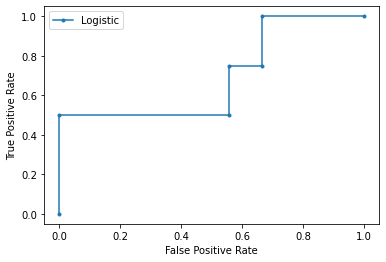

Train on 48 samples, validate on 13 samples
Epoch 1/5000
48/48 [==============================] - 0s 2ms/step - loss: 0.7589 - accuracy: 0.3542 - val_loss: 0.7135 - val_accuracy: 0.3846
Epoch 2/5000
48/48 [==============================] - 0s 246us/step - loss: 0.7146 - accuracy: 0.4583 - val_loss: 0.6656 - val_accuracy: 0.6154
Epoch 3/5000
48/48 [==============================] - 0s 277us/step - loss: 0.6731 - accuracy: 0.5833 - val_loss: 0.6376 - val_accuracy: 0.6923
Epoch 4/5000
48/48 [==============================] - 0s 251us/step - loss: 0.6484 - accuracy: 0.6458 - val_loss: 0.6207 - val_accuracy: 0.6923
Epoch 5/5000
48/48 [==============================] - 0s 249us/step - loss: 0.6396 - accuracy: 0.6458 - val_loss: 0.6020 - val_accuracy: 0.6923
Epoch 6/5000
48/48 [==============================] - 0s 229us/step - loss: 0.6265 - accuracy: 0.6458 - val_loss: 0.5860 - val_accuracy: 0.6923
Epoch 7/5000
48/48 [==============================] - 0s 228us/step - loss: 0.6189 - accuracy:

48/48 [==============================] - 0s 211us/step - loss: 0.3613 - accuracy: 0.8750 - val_loss: 0.3385 - val_accuracy: 0.8462
Epoch 58/5000
48/48 [==============================] - 0s 208us/step - loss: 0.3621 - accuracy: 0.8958 - val_loss: 0.3726 - val_accuracy: 0.8462
Epoch 59/5000
48/48 [==============================] - 0s 194us/step - loss: 0.3519 - accuracy: 0.8958 - val_loss: 0.3584 - val_accuracy: 0.8462
Epoch 60/5000
48/48 [==============================] - 0s 200us/step - loss: 0.3481 - accuracy: 0.9167 - val_loss: 0.3344 - val_accuracy: 0.8462
Epoch 61/5000
48/48 [==============================] - 0s 187us/step - loss: 0.3496 - accuracy: 0.8750 - val_loss: 0.3371 - val_accuracy: 0.8462
Epoch 62/5000
48/48 [==============================] - 0s 208us/step - loss: 0.3398 - accuracy: 0.9167 - val_loss: 0.3741 - val_accuracy: 0.8462
Epoch 63/5000
48/48 [==============================] - 0s 196us/step - loss: 0.3363 - accuracy: 0.8750 - val_loss: 0.3580 - val_accuracy: 0.8462

48/48 [==============================] - 0s 201us/step - loss: 0.1821 - accuracy: 0.9583 - val_loss: 0.5044 - val_accuracy: 0.6154
Epoch 114/5000
48/48 [==============================] - 0s 209us/step - loss: 0.1813 - accuracy: 0.9583 - val_loss: 0.5054 - val_accuracy: 0.6154
Epoch 115/5000
48/48 [==============================] - 0s 187us/step - loss: 0.1755 - accuracy: 0.9583 - val_loss: 0.5384 - val_accuracy: 0.6154
Epoch 116/5000
48/48 [==============================] - 0s 209us/step - loss: 0.1743 - accuracy: 0.9792 - val_loss: 0.5378 - val_accuracy: 0.6154
Epoch 117/5000
48/48 [==============================] - 0s 188us/step - loss: 0.1719 - accuracy: 0.9583 - val_loss: 0.5162 - val_accuracy: 0.6154
Epoch 118/5000
48/48 [==============================] - 0s 207us/step - loss: 0.1725 - accuracy: 0.9583 - val_loss: 0.5481 - val_accuracy: 0.6154
Epoch 119/5000
48/48 [==============================] - 0s 208us/step - loss: 0.1685 - accuracy: 0.9583 - val_loss: 0.5328 - val_accuracy: 

48/48 [==============================] - 0s 183us/step - loss: 0.0720 - accuracy: 1.0000 - val_loss: 1.0293 - val_accuracy: 0.6154
Epoch 170/5000
48/48 [==============================] - 0s 198us/step - loss: 0.0707 - accuracy: 1.0000 - val_loss: 1.0006 - val_accuracy: 0.6154
Epoch 171/5000
48/48 [==============================] - 0s 180us/step - loss: 0.0703 - accuracy: 1.0000 - val_loss: 1.0206 - val_accuracy: 0.6154
Epoch 172/5000
48/48 [==============================] - 0s 211us/step - loss: 0.0693 - accuracy: 1.0000 - val_loss: 1.0166 - val_accuracy: 0.6154
Epoch 173/5000
48/48 [==============================] - 0s 266us/step - loss: 0.0668 - accuracy: 1.0000 - val_loss: 1.0232 - val_accuracy: 0.6154
Epoch 174/5000
48/48 [==============================] - 0s 213us/step - loss: 0.0667 - accuracy: 1.0000 - val_loss: 1.0232 - val_accuracy: 0.6154
Epoch 175/5000
48/48 [==============================] - 0s 244us/step - loss: 0.0646 - accuracy: 1.0000 - val_loss: 1.0832 - val_accuracy: 

48/48 [==============================] - 0s 209us/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 1.6107 - val_accuracy: 0.6154
Epoch 226/5000
48/48 [==============================] - 0s 191us/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 1.5774 - val_accuracy: 0.6154
Epoch 227/5000
48/48 [==============================] - 0s 270us/step - loss: 0.0242 - accuracy: 1.0000 - val_loss: 1.6169 - val_accuracy: 0.6154
Epoch 228/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 1.6416 - val_accuracy: 0.6154
Epoch 229/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 1.6623 - val_accuracy: 0.6154
Epoch 230/5000
48/48 [==============================] - 0s 220us/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 1.6293 - val_accuracy: 0.6154
Epoch 231/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 1.6670 - val_accuracy: 

48/48 [==============================] - 0s 190us/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 2.0847 - val_accuracy: 0.6154
Epoch 282/5000
48/48 [==============================] - 0s 190us/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 2.0560 - val_accuracy: 0.6154
Epoch 283/5000
48/48 [==============================] - 0s 201us/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 2.0854 - val_accuracy: 0.6154
Epoch 284/5000
48/48 [==============================] - 0s 244us/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 2.0874 - val_accuracy: 0.6154
Epoch 285/5000
48/48 [==============================] - 0s 247us/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 2.1094 - val_accuracy: 0.6154
Epoch 286/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 2.1165 - val_accuracy: 0.6154
Epoch 287/5000
48/48 [==============================] - 0s 215us/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 2.0880 - val_accuracy: 

48/48 [==============================] - 0s 207us/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 2.4088 - val_accuracy: 0.5385
Epoch 338/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 2.4158 - val_accuracy: 0.5385
Epoch 339/5000
48/48 [==============================] - 0s 207us/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 2.4110 - val_accuracy: 0.5385
Epoch 340/5000
48/48 [==============================] - 0s 228us/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 2.4007 - val_accuracy: 0.5385
Epoch 341/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 2.4387 - val_accuracy: 0.5385
Epoch 342/5000
48/48 [==============================] - 0s 207us/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 2.4294 - val_accuracy: 0.5385
Epoch 343/5000
48/48 [==============================] - 0s 207us/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 2.4159 - val_accuracy: 

Epoch 393/5000
48/48 [==============================] - 0s 199us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 2.6751 - val_accuracy: 0.5385
Epoch 394/5000
48/48 [==============================] - 0s 188us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.6793 - val_accuracy: 0.5385
Epoch 395/5000
48/48 [==============================] - 0s 194us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.6639 - val_accuracy: 0.5385
Epoch 396/5000
48/48 [==============================] - 0s 194us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.6861 - val_accuracy: 0.5385
Epoch 397/5000
48/48 [==============================] - 0s 188us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.7001 - val_accuracy: 0.5385
Epoch 398/5000
48/48 [==============================] - 0s 205us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.6895 - val_accuracy: 0.5385
Epoch 399/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.6863 -

48/48 [==============================] - 0s 191us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.8801 - val_accuracy: 0.5385
Epoch 450/5000
48/48 [==============================] - 0s 199us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.8835 - val_accuracy: 0.5385
Epoch 451/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.9102 - val_accuracy: 0.5385
Epoch 452/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.9064 - val_accuracy: 0.5385
Epoch 453/5000
48/48 [==============================] - 0s 190us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.8984 - val_accuracy: 0.5385
Epoch 454/5000
48/48 [==============================] - 0s 192us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.8913 - val_accuracy: 0.5385
Epoch 455/5000
48/48 [==============================] - 0s 212us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.9031 - val_accuracy: 

48/48 [==============================] - 0s 205us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.0910 - val_accuracy: 0.5385
Epoch 506/5000
48/48 [==============================] - 0s 216us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.0846 - val_accuracy: 0.5385
Epoch 507/5000
48/48 [==============================] - 0s 201us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.0883 - val_accuracy: 0.5385
Epoch 508/5000
48/48 [==============================] - 0s 184us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.0896 - val_accuracy: 0.5385
Epoch 509/5000
48/48 [==============================] - 0s 204us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.1107 - val_accuracy: 0.5385
Epoch 510/5000
48/48 [==============================] - 0s 178us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.0944 - val_accuracy: 0.5385
Epoch 511/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.0958 - val_accuracy: 

Epoch 561/5000
48/48 [==============================] - 0s 182us/step - loss: 9.7114e-04 - accuracy: 1.0000 - val_loss: 3.2492 - val_accuracy: 0.5385
Epoch 562/5000
48/48 [==============================] - 0s 208us/step - loss: 9.6418e-04 - accuracy: 1.0000 - val_loss: 3.2422 - val_accuracy: 0.5385
Epoch 563/5000
48/48 [==============================] - 0s 197us/step - loss: 9.5857e-04 - accuracy: 1.0000 - val_loss: 3.2459 - val_accuracy: 0.5385
Epoch 564/5000
48/48 [==============================] - 0s 183us/step - loss: 9.4483e-04 - accuracy: 1.0000 - val_loss: 3.2528 - val_accuracy: 0.5385
Epoch 565/5000
48/48 [==============================] - 0s 231us/step - loss: 9.4434e-04 - accuracy: 1.0000 - val_loss: 3.2592 - val_accuracy: 0.5385
Epoch 566/5000
48/48 [==============================] - 0s 189us/step - loss: 9.3940e-04 - accuracy: 1.0000 - val_loss: 3.2608 - val_accuracy: 0.5385
Epoch 567/5000
48/48 [==============================] - 0s 201us/step - loss: 9.3241e-04 - accuracy:

48/48 [==============================] - 0s 291us/step - loss: 7.3699e-04 - accuracy: 1.0000 - val_loss: 3.3642 - val_accuracy: 0.5385
Epoch 616/5000
48/48 [==============================] - 0s 187us/step - loss: 7.3181e-04 - accuracy: 1.0000 - val_loss: 3.3624 - val_accuracy: 0.5385
Epoch 617/5000
48/48 [==============================] - 0s 207us/step - loss: 7.2251e-04 - accuracy: 1.0000 - val_loss: 3.3963 - val_accuracy: 0.5385
Epoch 618/5000
48/48 [==============================] - 0s 207us/step - loss: 7.1294e-04 - accuracy: 1.0000 - val_loss: 3.3949 - val_accuracy: 0.5385
Epoch 619/5000
48/48 [==============================] - 0s 192us/step - loss: 7.0703e-04 - accuracy: 1.0000 - val_loss: 3.3966 - val_accuracy: 0.5385
Epoch 620/5000
48/48 [==============================] - 0s 186us/step - loss: 7.0540e-04 - accuracy: 1.0000 - val_loss: 3.3943 - val_accuracy: 0.5385
Epoch 621/5000
48/48 [==============================] - 0s 189us/step - loss: 7.0112e-04 - accuracy: 1.0000 - val_l

Epoch 670/5000
48/48 [==============================] - 0s 203us/step - loss: 5.4887e-04 - accuracy: 1.0000 - val_loss: 3.5220 - val_accuracy: 0.5385
Epoch 671/5000
48/48 [==============================] - 0s 188us/step - loss: 5.4775e-04 - accuracy: 1.0000 - val_loss: 3.5266 - val_accuracy: 0.5385
Epoch 672/5000
48/48 [==============================] - 0s 208us/step - loss: 5.4420e-04 - accuracy: 1.0000 - val_loss: 3.5169 - val_accuracy: 0.5385
Epoch 673/5000
48/48 [==============================] - 0s 208us/step - loss: 5.4136e-04 - accuracy: 1.0000 - val_loss: 3.5178 - val_accuracy: 0.5385
Epoch 674/5000
48/48 [==============================] - 0s 270us/step - loss: 5.3736e-04 - accuracy: 1.0000 - val_loss: 3.5307 - val_accuracy: 0.5385
Epoch 675/5000
48/48 [==============================] - 0s 205us/step - loss: 5.3596e-04 - accuracy: 1.0000 - val_loss: 3.5328 - val_accuracy: 0.5385
Epoch 676/5000
48/48 [==============================] - 0s 206us/step - loss: 5.3381e-04 - accuracy:

48/48 [==============================] - 0s 192us/step - loss: 4.2703e-04 - accuracy: 1.0000 - val_loss: 3.6349 - val_accuracy: 0.5385
Epoch 725/5000
48/48 [==============================] - 0s 205us/step - loss: 4.2533e-04 - accuracy: 1.0000 - val_loss: 3.6453 - val_accuracy: 0.5385
Epoch 726/5000
48/48 [==============================] - 0s 170us/step - loss: 4.2363e-04 - accuracy: 1.0000 - val_loss: 3.6539 - val_accuracy: 0.5385
Epoch 727/5000
48/48 [==============================] - 0s 204us/step - loss: 4.2244e-04 - accuracy: 1.0000 - val_loss: 3.6506 - val_accuracy: 0.5385
Epoch 728/5000
48/48 [==============================] - 0s 184us/step - loss: 4.2002e-04 - accuracy: 1.0000 - val_loss: 3.6393 - val_accuracy: 0.5385
Epoch 729/5000
48/48 [==============================] - 0s 264us/step - loss: 4.1853e-04 - accuracy: 1.0000 - val_loss: 3.6456 - val_accuracy: 0.5385
Epoch 730/5000
48/48 [==============================] - 0s 215us/step - loss: 4.1624e-04 - accuracy: 1.0000 - val_l

Epoch 779/5000
48/48 [==============================] - 0s 269us/step - loss: 3.3644e-04 - accuracy: 1.0000 - val_loss: 3.7537 - val_accuracy: 0.5385
Epoch 780/5000
48/48 [==============================] - 0s 249us/step - loss: 3.3718e-04 - accuracy: 1.0000 - val_loss: 3.7458 - val_accuracy: 0.5385
Epoch 781/5000
48/48 [==============================] - 0s 208us/step - loss: 3.3376e-04 - accuracy: 1.0000 - val_loss: 3.7635 - val_accuracy: 0.5385
Epoch 782/5000
48/48 [==============================] - 0s 228us/step - loss: 3.3260e-04 - accuracy: 1.0000 - val_loss: 3.7793 - val_accuracy: 0.5385
Epoch 783/5000
48/48 [==============================] - 0s 208us/step - loss: 3.3067e-04 - accuracy: 1.0000 - val_loss: 3.7790 - val_accuracy: 0.5385
Epoch 784/5000
48/48 [==============================] - 0s 220us/step - loss: 3.2856e-04 - accuracy: 1.0000 - val_loss: 3.7720 - val_accuracy: 0.5385
Epoch 785/5000
48/48 [==============================] - 0s 229us/step - loss: 3.2693e-04 - accuracy:

48/48 [==============================] - 0s 191us/step - loss: 2.6790e-04 - accuracy: 1.0000 - val_loss: 3.8835 - val_accuracy: 0.5385
Epoch 834/5000
48/48 [==============================] - 0s 184us/step - loss: 2.6647e-04 - accuracy: 1.0000 - val_loss: 3.8790 - val_accuracy: 0.5385
Epoch 835/5000
48/48 [==============================] - 0s 187us/step - loss: 2.6549e-04 - accuracy: 1.0000 - val_loss: 3.8733 - val_accuracy: 0.5385
Epoch 836/5000
48/48 [==============================] - 0s 206us/step - loss: 2.6728e-04 - accuracy: 1.0000 - val_loss: 3.8832 - val_accuracy: 0.5385
Epoch 837/5000
48/48 [==============================] - 0s 187us/step - loss: 2.6523e-04 - accuracy: 1.0000 - val_loss: 3.8690 - val_accuracy: 0.5385
Epoch 838/5000
48/48 [==============================] - 0s 208us/step - loss: 2.6258e-04 - accuracy: 1.0000 - val_loss: 3.8753 - val_accuracy: 0.5385
Epoch 839/5000
48/48 [==============================] - 0s 208us/step - loss: 2.6175e-04 - accuracy: 1.0000 - val_l

Epoch 888/5000
48/48 [==============================] - 0s 207us/step - loss: 2.1537e-04 - accuracy: 1.0000 - val_loss: 3.9681 - val_accuracy: 0.5385
Epoch 889/5000
48/48 [==============================] - 0s 207us/step - loss: 2.1408e-04 - accuracy: 1.0000 - val_loss: 3.9710 - val_accuracy: 0.5385
Epoch 890/5000
48/48 [==============================] - 0s 187us/step - loss: 2.1388e-04 - accuracy: 1.0000 - val_loss: 3.9815 - val_accuracy: 0.5385
Epoch 891/5000
48/48 [==============================] - 0s 187us/step - loss: 2.1226e-04 - accuracy: 1.0000 - val_loss: 3.9877 - val_accuracy: 0.5385
Epoch 892/5000
48/48 [==============================] - 0s 205us/step - loss: 2.1206e-04 - accuracy: 1.0000 - val_loss: 3.9801 - val_accuracy: 0.5385
Epoch 893/5000
48/48 [==============================] - 0s 207us/step - loss: 2.1005e-04 - accuracy: 1.0000 - val_loss: 3.9848 - val_accuracy: 0.5385
Epoch 894/5000
48/48 [==============================] - 0s 181us/step - loss: 2.1010e-04 - accuracy:

48/48 [==============================] - 0s 187us/step - loss: 1.7447e-04 - accuracy: 1.0000 - val_loss: 4.0795 - val_accuracy: 0.5385
Epoch 943/5000
48/48 [==============================] - 0s 188us/step - loss: 1.7424e-04 - accuracy: 1.0000 - val_loss: 4.0772 - val_accuracy: 0.5385
Epoch 944/5000
48/48 [==============================] - 0s 190us/step - loss: 1.7309e-04 - accuracy: 1.0000 - val_loss: 4.0818 - val_accuracy: 0.5385
Epoch 945/5000
48/48 [==============================] - 0s 191us/step - loss: 1.7269e-04 - accuracy: 1.0000 - val_loss: 4.0878 - val_accuracy: 0.5385
Epoch 946/5000
48/48 [==============================] - 0s 169us/step - loss: 1.7210e-04 - accuracy: 1.0000 - val_loss: 4.0890 - val_accuracy: 0.5385
Epoch 947/5000
48/48 [==============================] - ETA: 0s - loss: 9.0299e-05 - accuracy: 1.00 - 0s 186us/step - loss: 1.7088e-04 - accuracy: 1.0000 - val_loss: 4.0896 - val_accuracy: 0.5385
Epoch 948/5000
48/48 [==============================] - 0s 228us/step

48/48 [==============================] - 0s 175us/step - loss: 1.4291e-04 - accuracy: 1.0000 - val_loss: 4.1755 - val_accuracy: 0.5385
Epoch 997/5000
48/48 [==============================] - 0s 216us/step - loss: 1.4260e-04 - accuracy: 1.0000 - val_loss: 4.1798 - val_accuracy: 0.5385
Epoch 998/5000
48/48 [==============================] - 0s 187us/step - loss: 1.4182e-04 - accuracy: 1.0000 - val_loss: 4.1785 - val_accuracy: 0.5385
Epoch 999/5000
48/48 [==============================] - 0s 192us/step - loss: 1.4115e-04 - accuracy: 1.0000 - val_loss: 4.1783 - val_accuracy: 0.5385
Epoch 1000/5000
48/48 [==============================] - 0s 183us/step - loss: 1.4083e-04 - accuracy: 1.0000 - val_loss: 4.1850 - val_accuracy: 0.5385
Epoch 1001/5000
48/48 [==============================] - 0s 205us/step - loss: 1.4078e-04 - accuracy: 1.0000 - val_loss: 4.1813 - val_accuracy: 0.5385
Epoch 1002/5000
48/48 [==============================] - 0s 212us/step - loss: 1.3969e-04 - accuracy: 1.0000 - va

48/48 [==============================] - 0s 227us/step - loss: 1.1814e-04 - accuracy: 1.0000 - val_loss: 4.2670 - val_accuracy: 0.5385
Epoch 1051/5000
48/48 [==============================] - 0s 222us/step - loss: 1.1696e-04 - accuracy: 1.0000 - val_loss: 4.2747 - val_accuracy: 0.5385
Epoch 1052/5000
48/48 [==============================] - 0s 208us/step - loss: 1.1657e-04 - accuracy: 1.0000 - val_loss: 4.2812 - val_accuracy: 0.5385
Epoch 1053/5000
48/48 [==============================] - 0s 209us/step - loss: 1.1618e-04 - accuracy: 1.0000 - val_loss: 4.2824 - val_accuracy: 0.5385
Epoch 1054/5000
48/48 [==============================] - 0s 209us/step - loss: 1.1597e-04 - accuracy: 1.0000 - val_loss: 4.2902 - val_accuracy: 0.5385
Epoch 1055/5000
48/48 [==============================] - 0s 187us/step - loss: 1.1571e-04 - accuracy: 1.0000 - val_loss: 4.2842 - val_accuracy: 0.5385
Epoch 1056/5000
48/48 [==============================] - 0s 208us/step - loss: 1.1563e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 9.6981e-05 - accuracy: 1.0000 - val_loss: 4.3771 - val_accuracy: 0.5385
Epoch 1105/5000
48/48 [==============================] - 0s 187us/step - loss: 9.7547e-05 - accuracy: 1.0000 - val_loss: 4.3906 - val_accuracy: 0.5385
Epoch 1106/5000
48/48 [==============================] - 0s 187us/step - loss: 9.7076e-05 - accuracy: 1.0000 - val_loss: 4.3794 - val_accuracy: 0.5385
Epoch 1107/5000
48/48 [==============================] - 0s 187us/step - loss: 9.6939e-05 - accuracy: 1.0000 - val_loss: 4.3719 - val_accuracy: 0.5385
Epoch 1108/5000
48/48 [==============================] - 0s 191us/step - loss: 9.6080e-05 - accuracy: 1.0000 - val_loss: 4.3854 - val_accuracy: 0.5385
Epoch 1109/5000
48/48 [==============================] - 0s 251us/step - loss: 9.5690e-05 - accuracy: 1.0000 - val_loss: 4.3909 - val_accuracy: 0.5385
Epoch 1110/5000
48/48 [==============================] - 0s 205us/step - loss: 9.5255e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 270us/step - loss: 8.0728e-05 - accuracy: 1.0000 - val_loss: 4.4759 - val_accuracy: 0.5385
Epoch 1159/5000
48/48 [==============================] - 0s 188us/step - loss: 8.0387e-05 - accuracy: 1.0000 - val_loss: 4.4740 - val_accuracy: 0.5385
Epoch 1160/5000
48/48 [==============================] - 0s 187us/step - loss: 8.0378e-05 - accuracy: 1.0000 - val_loss: 4.4787 - val_accuracy: 0.5385
Epoch 1161/5000
48/48 [==============================] - 0s 192us/step - loss: 8.0175e-05 - accuracy: 1.0000 - val_loss: 4.4690 - val_accuracy: 0.5385
Epoch 1162/5000
48/48 [==============================] - 0s 187us/step - loss: 7.9390e-05 - accuracy: 1.0000 - val_loss: 4.4752 - val_accuracy: 0.5385
Epoch 1163/5000
48/48 [==============================] - 0s 180us/step - loss: 7.9285e-05 - accuracy: 1.0000 - val_loss: 4.4779 - val_accuracy: 0.5385
Epoch 1164/5000
48/48 [==============================] - 0s 186us/step - loss: 7.8827e-05 - accuracy: 1.0000 -

Epoch 1212/5000
48/48 [==============================] - 0s 182us/step - loss: 6.6867e-05 - accuracy: 1.0000 - val_loss: 4.5683 - val_accuracy: 0.5385
Epoch 1213/5000
48/48 [==============================] - 0s 229us/step - loss: 6.6577e-05 - accuracy: 1.0000 - val_loss: 4.5669 - val_accuracy: 0.5385
Epoch 1214/5000
48/48 [==============================] - 0s 207us/step - loss: 6.6408e-05 - accuracy: 1.0000 - val_loss: 4.5728 - val_accuracy: 0.5385
Epoch 1215/5000
48/48 [==============================] - 0s 178us/step - loss: 6.6331e-05 - accuracy: 1.0000 - val_loss: 4.5758 - val_accuracy: 0.5385
Epoch 1216/5000
48/48 [==============================] - 0s 181us/step - loss: 6.5804e-05 - accuracy: 1.0000 - val_loss: 4.5667 - val_accuracy: 0.5385
Epoch 1217/5000
48/48 [==============================] - 0s 188us/step - loss: 6.5794e-05 - accuracy: 1.0000 - val_loss: 4.5744 - val_accuracy: 0.5385
Epoch 1218/5000
48/48 [==============================] - 0s 188us/step - loss: 6.5383e-05 - ac

48/48 [==============================] - 0s 249us/step - loss: 5.5451e-05 - accuracy: 1.0000 - val_loss: 4.6679 - val_accuracy: 0.5385
Epoch 1267/5000
48/48 [==============================] - 0s 256us/step - loss: 5.5391e-05 - accuracy: 1.0000 - val_loss: 4.6689 - val_accuracy: 0.5385
Epoch 1268/5000
48/48 [==============================] - 0s 219us/step - loss: 5.5161e-05 - accuracy: 1.0000 - val_loss: 4.6663 - val_accuracy: 0.5385
Epoch 1269/5000
48/48 [==============================] - 0s 227us/step - loss: 5.4832e-05 - accuracy: 1.0000 - val_loss: 4.6589 - val_accuracy: 0.5385
Epoch 1270/5000
48/48 [==============================] - 0s 250us/step - loss: 5.4723e-05 - accuracy: 1.0000 - val_loss: 4.6575 - val_accuracy: 0.5385
Epoch 1271/5000
48/48 [==============================] - 0s 269us/step - loss: 5.4673e-05 - accuracy: 1.0000 - val_loss: 4.6640 - val_accuracy: 0.5385
Epoch 1272/5000
48/48 [==============================] - 0s 208us/step - loss: 5.4634e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 172us/step - loss: 4.6285e-05 - accuracy: 1.0000 - val_loss: 4.7492 - val_accuracy: 0.5385
Epoch 1321/5000
48/48 [==============================] - 0s 200us/step - loss: 4.6114e-05 - accuracy: 1.0000 - val_loss: 4.7503 - val_accuracy: 0.5385
Epoch 1322/5000
48/48 [==============================] - 0s 194us/step - loss: 4.6220e-05 - accuracy: 1.0000 - val_loss: 4.7587 - val_accuracy: 0.5385
Epoch 1323/5000
48/48 [==============================] - 0s 208us/step - loss: 4.5893e-05 - accuracy: 1.0000 - val_loss: 4.7590 - val_accuracy: 0.5385
Epoch 1324/5000
48/48 [==============================] - 0s 207us/step - loss: 4.5853e-05 - accuracy: 1.0000 - val_loss: 4.7481 - val_accuracy: 0.5385
Epoch 1325/5000
48/48 [==============================] - 0s 206us/step - loss: 4.5612e-05 - accuracy: 1.0000 - val_loss: 4.7496 - val_accuracy: 0.5385
Epoch 1326/5000
48/48 [==============================] - 0s 187us/step - loss: 4.5449e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 3.8802e-05 - accuracy: 1.0000 - val_loss: 4.8481 - val_accuracy: 0.5385
Epoch 1375/5000
48/48 [==============================] - 0s 188us/step - loss: 3.8648e-05 - accuracy: 1.0000 - val_loss: 4.8472 - val_accuracy: 0.5385
Epoch 1376/5000
48/48 [==============================] - 0s 269us/step - loss: 3.8433e-05 - accuracy: 1.0000 - val_loss: 4.8471 - val_accuracy: 0.5385
Epoch 1377/5000
48/48 [==============================] - ETA: 0s - loss: 2.3919e-05 - accuracy: 1.00 - 0s 219us/step - loss: 3.8404e-05 - accuracy: 1.0000 - val_loss: 4.8486 - val_accuracy: 0.5385
Epoch 1378/5000
48/48 [==============================] - 0s 207us/step - loss: 3.8194e-05 - accuracy: 1.0000 - val_loss: 4.8478 - val_accuracy: 0.5385
Epoch 1379/5000
48/48 [==============================] - 0s 211us/step - loss: 3.8172e-05 - accuracy: 1.0000 - val_loss: 4.8545 - val_accuracy: 0.5385
Epoch 1380/5000
48/48 [==============================] - 0s 203u

48/48 [==============================] - 0s 182us/step - loss: 3.2546e-05 - accuracy: 1.0000 - val_loss: 4.9342 - val_accuracy: 0.5385
Epoch 1429/5000
48/48 [==============================] - 0s 180us/step - loss: 3.2655e-05 - accuracy: 1.0000 - val_loss: 4.9285 - val_accuracy: 0.5385
Epoch 1430/5000
48/48 [==============================] - 0s 192us/step - loss: 3.2368e-05 - accuracy: 1.0000 - val_loss: 4.9368 - val_accuracy: 0.5385
Epoch 1431/5000
48/48 [==============================] - 0s 182us/step - loss: 3.2198e-05 - accuracy: 1.0000 - val_loss: 4.9418 - val_accuracy: 0.5385
Epoch 1432/5000
48/48 [==============================] - 0s 208us/step - loss: 3.2080e-05 - accuracy: 1.0000 - val_loss: 4.9447 - val_accuracy: 0.5385
Epoch 1433/5000
48/48 [==============================] - 0s 187us/step - loss: 3.2396e-05 - accuracy: 1.0000 - val_loss: 4.9352 - val_accuracy: 0.5385
Epoch 1434/5000
48/48 [==============================] - 0s 208us/step - loss: 3.1995e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 189us/step - loss: 2.7446e-05 - accuracy: 1.0000 - val_loss: 5.0224 - val_accuracy: 0.5385
Epoch 1483/5000
48/48 [==============================] - 0s 188us/step - loss: 2.7360e-05 - accuracy: 1.0000 - val_loss: 5.0341 - val_accuracy: 0.5385
Epoch 1484/5000
48/48 [==============================] - 0s 187us/step - loss: 2.7277e-05 - accuracy: 1.0000 - val_loss: 5.0260 - val_accuracy: 0.5385
Epoch 1485/5000
48/48 [==============================] - 0s 188us/step - loss: 2.7190e-05 - accuracy: 1.0000 - val_loss: 5.0237 - val_accuracy: 0.5385
Epoch 1486/5000
48/48 [==============================] - 0s 186us/step - loss: 2.6982e-05 - accuracy: 1.0000 - val_loss: 5.0343 - val_accuracy: 0.5385
Epoch 1487/5000
48/48 [==============================] - 0s 208us/step - loss: 2.6965e-05 - accuracy: 1.0000 - val_loss: 5.0309 - val_accuracy: 0.5385
Epoch 1488/5000
48/48 [==============================] - 0s 201us/step - loss: 2.6889e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 2.3070e-05 - accuracy: 1.0000 - val_loss: 5.1085 - val_accuracy: 0.5385
Epoch 1537/5000
48/48 [==============================] - 0s 187us/step - loss: 2.2964e-05 - accuracy: 1.0000 - val_loss: 5.1118 - val_accuracy: 0.5385
Epoch 1538/5000
48/48 [==============================] - 0s 224us/step - loss: 2.3024e-05 - accuracy: 1.0000 - val_loss: 5.1095 - val_accuracy: 0.5385
Epoch 1539/5000
48/48 [==============================] - 0s 214us/step - loss: 2.2869e-05 - accuracy: 1.0000 - val_loss: 5.1152 - val_accuracy: 0.5385
Epoch 1540/5000
48/48 [==============================] - 0s 187us/step - loss: 2.2851e-05 - accuracy: 1.0000 - val_loss: 5.1297 - val_accuracy: 0.5385
Epoch 1541/5000
48/48 [==============================] - 0s 210us/step - loss: 2.2743e-05 - accuracy: 1.0000 - val_loss: 5.1262 - val_accuracy: 0.5385
Epoch 1542/5000
48/48 [==============================] - 0s 208us/step - loss: 2.2659e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 200us/step - loss: 1.9487e-05 - accuracy: 1.0000 - val_loss: 5.1984 - val_accuracy: 0.5385
Epoch 1591/5000
48/48 [==============================] - 0s 208us/step - loss: 1.9422e-05 - accuracy: 1.0000 - val_loss: 5.1962 - val_accuracy: 0.5385
Epoch 1592/5000
48/48 [==============================] - 0s 188us/step - loss: 1.9451e-05 - accuracy: 1.0000 - val_loss: 5.2057 - val_accuracy: 0.5385
Epoch 1593/5000
48/48 [==============================] - 0s 190us/step - loss: 1.9277e-05 - accuracy: 1.0000 - val_loss: 5.2021 - val_accuracy: 0.5385
Epoch 1594/5000
48/48 [==============================] - 0s 221us/step - loss: 1.9273e-05 - accuracy: 1.0000 - val_loss: 5.2037 - val_accuracy: 0.5385
Epoch 1595/5000
48/48 [==============================] - 0s 190us/step - loss: 1.9235e-05 - accuracy: 1.0000 - val_loss: 5.2055 - val_accuracy: 0.5385
Epoch 1596/5000
48/48 [==============================] - 0s 271us/step - loss: 1.9132e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 1.6523e-05 - accuracy: 1.0000 - val_loss: 5.2965 - val_accuracy: 0.5385
Epoch 1645/5000
48/48 [==============================] - 0s 194us/step - loss: 1.6457e-05 - accuracy: 1.0000 - val_loss: 5.2896 - val_accuracy: 0.5385
Epoch 1646/5000
48/48 [==============================] - 0s 185us/step - loss: 1.6450e-05 - accuracy: 1.0000 - val_loss: 5.2830 - val_accuracy: 0.5385
Epoch 1647/5000
48/48 [==============================] - 0s 187us/step - loss: 1.6341e-05 - accuracy: 1.0000 - val_loss: 5.2957 - val_accuracy: 0.5385
Epoch 1648/5000
48/48 [==============================] - 0s 192us/step - loss: 1.6300e-05 - accuracy: 1.0000 - val_loss: 5.2932 - val_accuracy: 0.5385
Epoch 1649/5000
48/48 [==============================] - 0s 183us/step - loss: 1.6238e-05 - accuracy: 1.0000 - val_loss: 5.2971 - val_accuracy: 0.5385
Epoch 1650/5000
48/48 [==============================] - 0s 191us/step - loss: 1.6190e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 225us/step - loss: 1.3977e-05 - accuracy: 1.0000 - val_loss: 5.3706 - val_accuracy: 0.5385
Epoch 1699/5000
48/48 [==============================] - 0s 210us/step - loss: 1.3920e-05 - accuracy: 1.0000 - val_loss: 5.3779 - val_accuracy: 0.5385
Epoch 1700/5000
48/48 [==============================] - 0s 218us/step - loss: 1.3892e-05 - accuracy: 1.0000 - val_loss: 5.3751 - val_accuracy: 0.5385
Epoch 1701/5000
48/48 [==============================] - 0s 166us/step - loss: 1.3814e-05 - accuracy: 1.0000 - val_loss: 5.3817 - val_accuracy: 0.5385
Epoch 1702/5000
48/48 [==============================] - 0s 170us/step - loss: 1.3785e-05 - accuracy: 1.0000 - val_loss: 5.3826 - val_accuracy: 0.5385
Epoch 1703/5000
48/48 [==============================] - 0s 185us/step - loss: 1.3710e-05 - accuracy: 1.0000 - val_loss: 5.3841 - val_accuracy: 0.5385
Epoch 1704/5000
48/48 [==============================] - 0s 211us/step - loss: 1.3722e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 1.1829e-05 - accuracy: 1.0000 - val_loss: 5.4624 - val_accuracy: 0.5385
Epoch 1753/5000
48/48 [==============================] - 0s 208us/step - loss: 1.1847e-05 - accuracy: 1.0000 - val_loss: 5.4701 - val_accuracy: 0.5385
Epoch 1754/5000
48/48 [==============================] - 0s 188us/step - loss: 1.1778e-05 - accuracy: 1.0000 - val_loss: 5.4698 - val_accuracy: 0.5385
Epoch 1755/5000
48/48 [==============================] - 0s 229us/step - loss: 1.1771e-05 - accuracy: 1.0000 - val_loss: 5.4622 - val_accuracy: 0.5385
Epoch 1756/5000
48/48 [==============================] - 0s 187us/step - loss: 1.1740e-05 - accuracy: 1.0000 - val_loss: 5.4687 - val_accuracy: 0.5385
Epoch 1757/5000
48/48 [==============================] - 0s 169us/step - loss: 1.1665e-05 - accuracy: 1.0000 - val_loss: 5.4677 - val_accuracy: 0.5385
Epoch 1758/5000
48/48 [==============================] - 0s 166us/step - loss: 1.1652e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 292us/step - loss: 1.0068e-05 - accuracy: 1.0000 - val_loss: 5.5391 - val_accuracy: 0.5385
Epoch 1807/5000
48/48 [==============================] - 0s 205us/step - loss: 1.0037e-05 - accuracy: 1.0000 - val_loss: 5.5440 - val_accuracy: 0.5385
Epoch 1808/5000
48/48 [==============================] - 0s 203us/step - loss: 1.0052e-05 - accuracy: 1.0000 - val_loss: 5.5402 - val_accuracy: 0.5385
Epoch 1809/5000
48/48 [==============================] - 0s 208us/step - loss: 9.9729e-06 - accuracy: 1.0000 - val_loss: 5.5472 - val_accuracy: 0.5385
Epoch 1810/5000
48/48 [==============================] - 0s 207us/step - loss: 9.9553e-06 - accuracy: 1.0000 - val_loss: 5.5597 - val_accuracy: 0.5385
Epoch 1811/5000
48/48 [==============================] - 0s 187us/step - loss: 9.9316e-06 - accuracy: 1.0000 - val_loss: 5.5612 - val_accuracy: 0.5385
Epoch 1812/5000
48/48 [==============================] - 0s 182us/step - loss: 9.9500e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 8.5539e-06 - accuracy: 1.0000 - val_loss: 5.6246 - val_accuracy: 0.5385
Epoch 1861/5000
48/48 [==============================] - 0s 187us/step - loss: 8.5303e-06 - accuracy: 1.0000 - val_loss: 5.6307 - val_accuracy: 0.5385
Epoch 1862/5000
48/48 [==============================] - 0s 229us/step - loss: 8.5069e-06 - accuracy: 1.0000 - val_loss: 5.6290 - val_accuracy: 0.5385
Epoch 1863/5000
48/48 [==============================] - 0s 208us/step - loss: 8.4823e-06 - accuracy: 1.0000 - val_loss: 5.6304 - val_accuracy: 0.5385
Epoch 1864/5000
48/48 [==============================] - 0s 212us/step - loss: 8.4504e-06 - accuracy: 1.0000 - val_loss: 5.6323 - val_accuracy: 0.5385
Epoch 1865/5000
48/48 [==============================] - 0s 187us/step - loss: 8.4156e-06 - accuracy: 1.0000 - val_loss: 5.6419 - val_accuracy: 0.5385
Epoch 1866/5000
48/48 [==============================] - 0s 213us/step - loss: 8.4079e-06 - accuracy: 1.0000 -

Epoch 1914/5000
48/48 [==============================] - 0s 166us/step - loss: 7.2386e-06 - accuracy: 1.0000 - val_loss: 5.7199 - val_accuracy: 0.5385
Epoch 1915/5000
48/48 [==============================] - 0s 184us/step - loss: 7.2034e-06 - accuracy: 1.0000 - val_loss: 5.7216 - val_accuracy: 0.5385
Epoch 1916/5000
48/48 [==============================] - 0s 184us/step - loss: 7.1905e-06 - accuracy: 1.0000 - val_loss: 5.7240 - val_accuracy: 0.5385
Epoch 1917/5000
48/48 [==============================] - 0s 187us/step - loss: 7.1821e-06 - accuracy: 1.0000 - val_loss: 5.7281 - val_accuracy: 0.5385
Epoch 1918/5000
48/48 [==============================] - 0s 209us/step - loss: 7.1722e-06 - accuracy: 1.0000 - val_loss: 5.7269 - val_accuracy: 0.5385
Epoch 1919/5000
48/48 [==============================] - 0s 176us/step - loss: 7.1404e-06 - accuracy: 1.0000 - val_loss: 5.7401 - val_accuracy: 0.5385
Epoch 1920/5000
48/48 [==============================] - 0s 205us/step - loss: 7.1166e-06 - ac

48/48 [==============================] - 0s 199us/step - loss: 6.1132e-06 - accuracy: 1.0000 - val_loss: 5.8001 - val_accuracy: 0.5385
Epoch 1969/5000
48/48 [==============================] - 0s 187us/step - loss: 6.1039e-06 - accuracy: 1.0000 - val_loss: 5.8042 - val_accuracy: 0.5385
Epoch 1970/5000
48/48 [==============================] - 0s 276us/step - loss: 6.0959e-06 - accuracy: 1.0000 - val_loss: 5.8110 - val_accuracy: 0.5385
Epoch 1971/5000
48/48 [==============================] - 0s 208us/step - loss: 6.0600e-06 - accuracy: 1.0000 - val_loss: 5.8091 - val_accuracy: 0.5385
Epoch 1972/5000
48/48 [==============================] - 0s 209us/step - loss: 6.0471e-06 - accuracy: 1.0000 - val_loss: 5.8054 - val_accuracy: 0.5385
Epoch 1973/5000
48/48 [==============================] - 0s 208us/step - loss: 6.0371e-06 - accuracy: 1.0000 - val_loss: 5.8033 - val_accuracy: 0.5385
Epoch 1974/5000
48/48 [==============================] - 0s 200us/step - loss: 6.0542e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 206us/step - loss: 5.2034e-06 - accuracy: 1.0000 - val_loss: 5.8948 - val_accuracy: 0.5385
Epoch 2023/5000
48/48 [==============================] - 0s 184us/step - loss: 5.1761e-06 - accuracy: 1.0000 - val_loss: 5.8892 - val_accuracy: 0.5385
Epoch 2024/5000
48/48 [==============================] - 0s 183us/step - loss: 5.1590e-06 - accuracy: 1.0000 - val_loss: 5.8939 - val_accuracy: 0.5385
Epoch 2025/5000
48/48 [==============================] - 0s 267us/step - loss: 5.1415e-06 - accuracy: 1.0000 - val_loss: 5.8923 - val_accuracy: 0.5385
Epoch 2026/5000
48/48 [==============================] - 0s 205us/step - loss: 5.1287e-06 - accuracy: 1.0000 - val_loss: 5.8991 - val_accuracy: 0.5385
Epoch 2027/5000
48/48 [==============================] - 0s 211us/step - loss: 5.1143e-06 - accuracy: 1.0000 - val_loss: 5.8965 - val_accuracy: 0.5385
Epoch 2028/5000
48/48 [==============================] - 0s 187us/step - loss: 5.0983e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 4.4256e-06 - accuracy: 1.0000 - val_loss: 5.9784 - val_accuracy: 0.5385
Epoch 2077/5000
48/48 [==============================] - 0s 166us/step - loss: 4.3996e-06 - accuracy: 1.0000 - val_loss: 5.9797 - val_accuracy: 0.5385
Epoch 2078/5000
48/48 [==============================] - 0s 204us/step - loss: 4.4126e-06 - accuracy: 1.0000 - val_loss: 5.9733 - val_accuracy: 0.5385
Epoch 2079/5000
48/48 [==============================] - 0s 207us/step - loss: 4.3827e-06 - accuracy: 1.0000 - val_loss: 5.9773 - val_accuracy: 0.5385
Epoch 2080/5000
48/48 [==============================] - 0s 204us/step - loss: 4.3649e-06 - accuracy: 1.0000 - val_loss: 5.9787 - val_accuracy: 0.5385
Epoch 2081/5000
48/48 [==============================] - 0s 186us/step - loss: 4.3689e-06 - accuracy: 1.0000 - val_loss: 5.9746 - val_accuracy: 0.5385
Epoch 2082/5000
48/48 [==============================] - 0s 187us/step - loss: 4.3335e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 227us/step - loss: 3.7632e-06 - accuracy: 1.0000 - val_loss: 6.0622 - val_accuracy: 0.5385
Epoch 2131/5000
48/48 [==============================] - 0s 202us/step - loss: 3.7564e-06 - accuracy: 1.0000 - val_loss: 6.0696 - val_accuracy: 0.5385
Epoch 2132/5000
48/48 [==============================] - 0s 186us/step - loss: 3.7458e-06 - accuracy: 1.0000 - val_loss: 6.0639 - val_accuracy: 0.5385
Epoch 2133/5000
48/48 [==============================] - 0s 172us/step - loss: 3.7332e-06 - accuracy: 1.0000 - val_loss: 6.0644 - val_accuracy: 0.5385
Epoch 2134/5000
48/48 [==============================] - 0s 222us/step - loss: 3.7384e-06 - accuracy: 1.0000 - val_loss: 6.0723 - val_accuracy: 0.5385
Epoch 2135/5000
48/48 [==============================] - 0s 189us/step - loss: 3.7105e-06 - accuracy: 1.0000 - val_loss: 6.0684 - val_accuracy: 0.5385
Epoch 2136/5000
48/48 [==============================] - 0s 208us/step - loss: 3.6945e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 209us/step - loss: 3.2191e-06 - accuracy: 1.0000 - val_loss: 6.1440 - val_accuracy: 0.5385
Epoch 2185/5000
48/48 [==============================] - 0s 188us/step - loss: 3.2055e-06 - accuracy: 1.0000 - val_loss: 6.1407 - val_accuracy: 0.5385
Epoch 2186/5000
48/48 [==============================] - 0s 182us/step - loss: 3.1998e-06 - accuracy: 1.0000 - val_loss: 6.1415 - val_accuracy: 0.5385
Epoch 2187/5000
48/48 [==============================] - 0s 188us/step - loss: 3.1851e-06 - accuracy: 1.0000 - val_loss: 6.1468 - val_accuracy: 0.5385
Epoch 2188/5000
48/48 [==============================] - 0s 188us/step - loss: 3.1788e-06 - accuracy: 1.0000 - val_loss: 6.1495 - val_accuracy: 0.5385
Epoch 2189/5000
48/48 [==============================] - 0s 187us/step - loss: 3.1677e-06 - accuracy: 1.0000 - val_loss: 6.1475 - val_accuracy: 0.5385
Epoch 2190/5000
48/48 [==============================] - 0s 187us/step - loss: 3.1552e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 249us/step - loss: 2.7520e-06 - accuracy: 1.0000 - val_loss: 6.2206 - val_accuracy: 0.5385
Epoch 2239/5000
48/48 [==============================] - 0s 229us/step - loss: 2.7413e-06 - accuracy: 1.0000 - val_loss: 6.2235 - val_accuracy: 0.5385
Epoch 2240/5000
48/48 [==============================] - 0s 208us/step - loss: 2.7354e-06 - accuracy: 1.0000 - val_loss: 6.2234 - val_accuracy: 0.5385
Epoch 2241/5000
48/48 [==============================] - 0s 191us/step - loss: 2.7262e-06 - accuracy: 1.0000 - val_loss: 6.2288 - val_accuracy: 0.5385
Epoch 2242/5000
48/48 [==============================] - 0s 194us/step - loss: 2.7309e-06 - accuracy: 1.0000 - val_loss: 6.2318 - val_accuracy: 0.5385
Epoch 2243/5000
48/48 [==============================] - 0s 187us/step - loss: 2.7215e-06 - accuracy: 1.0000 - val_loss: 6.2183 - val_accuracy: 0.5385
Epoch 2244/5000
48/48 [==============================] - 0s 187us/step - loss: 2.7038e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 185us/step - loss: 2.3508e-06 - accuracy: 1.0000 - val_loss: 6.3046 - val_accuracy: 0.5385
Epoch 2293/5000
48/48 [==============================] - 0s 223us/step - loss: 2.3507e-06 - accuracy: 1.0000 - val_loss: 6.2984 - val_accuracy: 0.5385
Epoch 2294/5000
48/48 [==============================] - 0s 192us/step - loss: 2.3399e-06 - accuracy: 1.0000 - val_loss: 6.3099 - val_accuracy: 0.5385
Epoch 2295/5000
48/48 [==============================] - 0s 189us/step - loss: 2.3332e-06 - accuracy: 1.0000 - val_loss: 6.3179 - val_accuracy: 0.5385
Epoch 2296/5000
48/48 [==============================] - 0s 202us/step - loss: 2.3296e-06 - accuracy: 1.0000 - val_loss: 6.3073 - val_accuracy: 0.5385
Epoch 2297/5000
48/48 [==============================] - 0s 208us/step - loss: 2.3169e-06 - accuracy: 1.0000 - val_loss: 6.3073 - val_accuracy: 0.5385
Epoch 2298/5000
48/48 [==============================] - 0s 222us/step - loss: 2.3081e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 195us/step - loss: 2.0181e-06 - accuracy: 1.0000 - val_loss: 6.3806 - val_accuracy: 0.5385
Epoch 2347/5000
48/48 [==============================] - 0s 188us/step - loss: 2.0098e-06 - accuracy: 1.0000 - val_loss: 6.3910 - val_accuracy: 0.5385
Epoch 2348/5000
48/48 [==============================] - 0s 188us/step - loss: 1.9979e-06 - accuracy: 1.0000 - val_loss: 6.3931 - val_accuracy: 0.5385
Epoch 2349/5000
48/48 [==============================] - 0s 204us/step - loss: 1.9889e-06 - accuracy: 1.0000 - val_loss: 6.3915 - val_accuracy: 0.5385
Epoch 2350/5000
48/48 [==============================] - 0s 181us/step - loss: 1.9917e-06 - accuracy: 1.0000 - val_loss: 6.3860 - val_accuracy: 0.5385
Epoch 2351/5000
48/48 [==============================] - 0s 188us/step - loss: 1.9838e-06 - accuracy: 1.0000 - val_loss: 6.3876 - val_accuracy: 0.5385
Epoch 2352/5000
48/48 [==============================] - 0s 185us/step - loss: 1.9805e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 182us/step - loss: 1.7307e-06 - accuracy: 1.0000 - val_loss: 6.4677 - val_accuracy: 0.5385
Epoch 2401/5000
48/48 [==============================] - 0s 202us/step - loss: 1.7267e-06 - accuracy: 1.0000 - val_loss: 6.4612 - val_accuracy: 0.5385
Epoch 2402/5000
48/48 [==============================] - 0s 187us/step - loss: 1.7155e-06 - accuracy: 1.0000 - val_loss: 6.4725 - val_accuracy: 0.5385
Epoch 2403/5000
48/48 [==============================] - 0s 191us/step - loss: 1.7073e-06 - accuracy: 1.0000 - val_loss: 6.4780 - val_accuracy: 0.5385
Epoch 2404/5000
48/48 [==============================] - 0s 178us/step - loss: 1.7079e-06 - accuracy: 1.0000 - val_loss: 6.4758 - val_accuracy: 0.5385
Epoch 2405/5000
48/48 [==============================] - 0s 208us/step - loss: 1.7073e-06 - accuracy: 1.0000 - val_loss: 6.4731 - val_accuracy: 0.5385
Epoch 2406/5000
48/48 [==============================] - 0s 205us/step - loss: 1.6959e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 1.4716e-06 - accuracy: 1.0000 - val_loss: 6.5534 - val_accuracy: 0.5385
Epoch 2455/5000
48/48 [==============================] - 0s 212us/step - loss: 1.4726e-06 - accuracy: 1.0000 - val_loss: 6.5485 - val_accuracy: 0.5385
Epoch 2456/5000
48/48 [==============================] - 0s 188us/step - loss: 1.4575e-06 - accuracy: 1.0000 - val_loss: 6.5575 - val_accuracy: 0.5385
Epoch 2457/5000
48/48 [==============================] - 0s 188us/step - loss: 1.4607e-06 - accuracy: 1.0000 - val_loss: 6.5644 - val_accuracy: 0.5385
Epoch 2458/5000
48/48 [==============================] - 0s 191us/step - loss: 1.4537e-06 - accuracy: 1.0000 - val_loss: 6.5654 - val_accuracy: 0.5385
Epoch 2459/5000
48/48 [==============================] - 0s 192us/step - loss: 1.4446e-06 - accuracy: 1.0000 - val_loss: 6.5573 - val_accuracy: 0.5385
Epoch 2460/5000
48/48 [==============================] - 0s 183us/step - loss: 1.4403e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 189us/step - loss: 1.2572e-06 - accuracy: 1.0000 - val_loss: 6.6319 - val_accuracy: 0.5385
Epoch 2509/5000
48/48 [==============================] - 0s 187us/step - loss: 1.2465e-06 - accuracy: 1.0000 - val_loss: 6.6310 - val_accuracy: 0.5385
Epoch 2510/5000
48/48 [==============================] - 0s 208us/step - loss: 1.2448e-06 - accuracy: 1.0000 - val_loss: 6.6295 - val_accuracy: 0.5385
Epoch 2511/5000
48/48 [==============================] - 0s 192us/step - loss: 1.2404e-06 - accuracy: 1.0000 - val_loss: 6.6370 - val_accuracy: 0.5385
Epoch 2512/5000
48/48 [==============================] - 0s 229us/step - loss: 1.2368e-06 - accuracy: 1.0000 - val_loss: 6.6377 - val_accuracy: 0.5385
Epoch 2513/5000
48/48 [==============================] - 0s 181us/step - loss: 1.2356e-06 - accuracy: 1.0000 - val_loss: 6.6407 - val_accuracy: 0.5385
Epoch 2514/5000
48/48 [==============================] - 0s 224us/step - loss: 1.2283e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 1.0708e-06 - accuracy: 1.0000 - val_loss: 6.7069 - val_accuracy: 0.5385
Epoch 2563/5000
48/48 [==============================] - 0s 188us/step - loss: 1.0682e-06 - accuracy: 1.0000 - val_loss: 6.7091 - val_accuracy: 0.5385
Epoch 2564/5000
48/48 [==============================] - 0s 191us/step - loss: 1.0664e-06 - accuracy: 1.0000 - val_loss: 6.7152 - val_accuracy: 0.5385
Epoch 2565/5000
48/48 [==============================] - 0s 188us/step - loss: 1.0621e-06 - accuracy: 1.0000 - val_loss: 6.7164 - val_accuracy: 0.5385
Epoch 2566/5000
48/48 [==============================] - 0s 164us/step - loss: 1.0580e-06 - accuracy: 1.0000 - val_loss: 6.7132 - val_accuracy: 0.5385
Epoch 2567/5000
48/48 [==============================] - 0s 187us/step - loss: 1.0551e-06 - accuracy: 1.0000 - val_loss: 6.7142 - val_accuracy: 0.5385
Epoch 2568/5000
48/48 [==============================] - 0s 206us/step - loss: 1.0540e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 9.2411e-07 - accuracy: 1.0000 - val_loss: 6.8039 - val_accuracy: 0.5385
Epoch 2617/5000
48/48 [==============================] - 0s 275us/step - loss: 9.1754e-07 - accuracy: 1.0000 - val_loss: 6.8022 - val_accuracy: 0.5385
Epoch 2618/5000
48/48 [==============================] - 0s 318us/step - loss: 9.1480e-07 - accuracy: 1.0000 - val_loss: 6.7917 - val_accuracy: 0.5385
Epoch 2619/5000
48/48 [==============================] - 0s 250us/step - loss: 9.0890e-07 - accuracy: 1.0000 - val_loss: 6.7920 - val_accuracy: 0.5385
Epoch 2620/5000
48/48 [==============================] - 0s 214us/step - loss: 9.1048e-07 - accuracy: 1.0000 - val_loss: 6.8009 - val_accuracy: 0.5385
Epoch 2621/5000
48/48 [==============================] - 0s 211us/step - loss: 9.0627e-07 - accuracy: 1.0000 - val_loss: 6.7945 - val_accuracy: 0.5385
Epoch 2622/5000
48/48 [==============================] - 0s 191us/step - loss: 9.0666e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 209us/step - loss: 7.9123e-07 - accuracy: 1.0000 - val_loss: 6.8784 - val_accuracy: 0.5385
Epoch 2671/5000
48/48 [==============================] - 0s 202us/step - loss: 7.8444e-07 - accuracy: 1.0000 - val_loss: 6.8744 - val_accuracy: 0.5385
Epoch 2672/5000
48/48 [==============================] - 0s 180us/step - loss: 7.8295e-07 - accuracy: 1.0000 - val_loss: 6.8744 - val_accuracy: 0.5385
Epoch 2673/5000
48/48 [==============================] - 0s 186us/step - loss: 7.8066e-07 - accuracy: 1.0000 - val_loss: 6.8722 - val_accuracy: 0.5385
Epoch 2674/5000
48/48 [==============================] - 0s 214us/step - loss: 7.8019e-07 - accuracy: 1.0000 - val_loss: 6.8795 - val_accuracy: 0.5385
Epoch 2675/5000
48/48 [==============================] - 0s 208us/step - loss: 7.7668e-07 - accuracy: 1.0000 - val_loss: 6.8832 - val_accuracy: 0.5385
Epoch 2676/5000
48/48 [==============================] - 0s 181us/step - loss: 7.7542e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 182us/step - loss: 6.7527e-07 - accuracy: 1.0000 - val_loss: 6.9513 - val_accuracy: 0.5385
Epoch 2725/5000
48/48 [==============================] - 0s 177us/step - loss: 6.7408e-07 - accuracy: 1.0000 - val_loss: 6.9554 - val_accuracy: 0.5385
Epoch 2726/5000
48/48 [==============================] - 0s 191us/step - loss: 6.7445e-07 - accuracy: 1.0000 - val_loss: 6.9521 - val_accuracy: 0.5385
Epoch 2727/5000
48/48 [==============================] - 0s 191us/step - loss: 6.6970e-07 - accuracy: 1.0000 - val_loss: 6.9577 - val_accuracy: 0.5385
Epoch 2728/5000
48/48 [==============================] - 0s 168us/step - loss: 6.6882e-07 - accuracy: 1.0000 - val_loss: 6.9596 - val_accuracy: 0.5385
Epoch 2729/5000
48/48 [==============================] - 0s 186us/step - loss: 6.6730e-07 - accuracy: 1.0000 - val_loss: 6.9572 - val_accuracy: 0.5385
Epoch 2730/5000
48/48 [==============================] - 0s 208us/step - loss: 6.6531e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 5.8123e-07 - accuracy: 1.0000 - val_loss: 7.0277 - val_accuracy: 0.5385
Epoch 2779/5000
48/48 [==============================] - 0s 188us/step - loss: 5.8008e-07 - accuracy: 1.0000 - val_loss: 7.0269 - val_accuracy: 0.5385
Epoch 2780/5000
48/48 [==============================] - 0s 207us/step - loss: 5.7744e-07 - accuracy: 1.0000 - val_loss: 7.0326 - val_accuracy: 0.5385
Epoch 2781/5000
48/48 [==============================] - 0s 208us/step - loss: 5.7658e-07 - accuracy: 1.0000 - val_loss: 7.0350 - val_accuracy: 0.5385
Epoch 2782/5000
48/48 [==============================] - 0s 165us/step - loss: 5.7474e-07 - accuracy: 1.0000 - val_loss: 7.0364 - val_accuracy: 0.5385
Epoch 2783/5000
48/48 [==============================] - 0s 213us/step - loss: 5.7389e-07 - accuracy: 1.0000 - val_loss: 7.0307 - val_accuracy: 0.5385
Epoch 2784/5000
48/48 [==============================] - 0s 187us/step - loss: 5.7153e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 274us/step - loss: 5.0046e-07 - accuracy: 1.0000 - val_loss: 7.1112 - val_accuracy: 0.5385
Epoch 2833/5000
48/48 [==============================] - 0s 188us/step - loss: 4.9897e-07 - accuracy: 1.0000 - val_loss: 7.1154 - val_accuracy: 0.5385
Epoch 2834/5000
48/48 [==============================] - 0s 231us/step - loss: 4.9780e-07 - accuracy: 1.0000 - val_loss: 7.1139 - val_accuracy: 0.5385
Epoch 2835/5000
48/48 [==============================] - 0s 177us/step - loss: 4.9634e-07 - accuracy: 1.0000 - val_loss: 7.1133 - val_accuracy: 0.5385
Epoch 2836/5000
48/48 [==============================] - 0s 206us/step - loss: 4.9451e-07 - accuracy: 1.0000 - val_loss: 7.1195 - val_accuracy: 0.5385
Epoch 2837/5000
48/48 [==============================] - 0s 188us/step - loss: 4.9508e-07 - accuracy: 1.0000 - val_loss: 7.1305 - val_accuracy: 0.5385
Epoch 2838/5000
48/48 [==============================] - 0s 203us/step - loss: 4.9455e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 229us/step - loss: 4.3039e-07 - accuracy: 1.0000 - val_loss: 7.1839 - val_accuracy: 0.5385
Epoch 2887/5000
48/48 [==============================] - 0s 208us/step - loss: 4.2882e-07 - accuracy: 1.0000 - val_loss: 7.1909 - val_accuracy: 0.5385
Epoch 2888/5000
48/48 [==============================] - 0s 208us/step - loss: 4.2754e-07 - accuracy: 1.0000 - val_loss: 7.1955 - val_accuracy: 0.5385
Epoch 2889/5000
48/48 [==============================] - 0s 185us/step - loss: 4.2721e-07 - accuracy: 1.0000 - val_loss: 7.1907 - val_accuracy: 0.5385
Epoch 2890/5000
48/48 [==============================] - 0s 207us/step - loss: 4.2584e-07 - accuracy: 1.0000 - val_loss: 7.1951 - val_accuracy: 0.5385
Epoch 2891/5000
48/48 [==============================] - 0s 208us/step - loss: 4.2529e-07 - accuracy: 1.0000 - val_loss: 7.1914 - val_accuracy: 0.5385
Epoch 2892/5000
48/48 [==============================] - 0s 191us/step - loss: 4.2420e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 212us/step - loss: 3.7071e-07 - accuracy: 1.0000 - val_loss: 7.2646 - val_accuracy: 0.5385
Epoch 2941/5000
48/48 [==============================] - 0s 187us/step - loss: 3.7003e-07 - accuracy: 1.0000 - val_loss: 7.2593 - val_accuracy: 0.5385
Epoch 2942/5000
48/48 [==============================] - 0s 193us/step - loss: 3.6935e-07 - accuracy: 1.0000 - val_loss: 7.2632 - val_accuracy: 0.5385
Epoch 2943/5000
48/48 [==============================] - 0s 186us/step - loss: 3.6827e-07 - accuracy: 1.0000 - val_loss: 7.2627 - val_accuracy: 0.5385
Epoch 2944/5000
48/48 [==============================] - 0s 185us/step - loss: 3.6746e-07 - accuracy: 1.0000 - val_loss: 7.2622 - val_accuracy: 0.5385
Epoch 2945/5000
48/48 [==============================] - 0s 213us/step - loss: 3.6662e-07 - accuracy: 1.0000 - val_loss: 7.2629 - val_accuracy: 0.5385
Epoch 2946/5000
48/48 [==============================] - 0s 189us/step - loss: 3.6787e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 3.2031e-07 - accuracy: 1.0000 - val_loss: 7.3483 - val_accuracy: 0.5385
Epoch 2995/5000
48/48 [==============================] - 0s 208us/step - loss: 3.1945e-07 - accuracy: 1.0000 - val_loss: 7.3524 - val_accuracy: 0.5385
Epoch 2996/5000
48/48 [==============================] - 0s 194us/step - loss: 3.1949e-07 - accuracy: 1.0000 - val_loss: 7.3442 - val_accuracy: 0.5385
Epoch 2997/5000
48/48 [==============================] - 0s 207us/step - loss: 3.1685e-07 - accuracy: 1.0000 - val_loss: 7.3499 - val_accuracy: 0.5385
Epoch 2998/5000
48/48 [==============================] - 0s 208us/step - loss: 3.1691e-07 - accuracy: 1.0000 - val_loss: 7.3554 - val_accuracy: 0.5385
Epoch 2999/5000
48/48 [==============================] - 0s 187us/step - loss: 3.1604e-07 - accuracy: 1.0000 - val_loss: 7.3484 - val_accuracy: 0.5385
Epoch 3000/5000
48/48 [==============================] - 0s 187us/step - loss: 3.1466e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 2.7593e-07 - accuracy: 1.0000 - val_loss: 7.4220 - val_accuracy: 0.5385
Epoch 3049/5000
48/48 [==============================] - 0s 200us/step - loss: 2.7441e-07 - accuracy: 1.0000 - val_loss: 7.4171 - val_accuracy: 0.5385
Epoch 3050/5000
48/48 [==============================] - 0s 188us/step - loss: 2.7379e-07 - accuracy: 1.0000 - val_loss: 7.4163 - val_accuracy: 0.5385
Epoch 3051/5000
48/48 [==============================] - 0s 188us/step - loss: 2.7362e-07 - accuracy: 1.0000 - val_loss: 7.4240 - val_accuracy: 0.5385
Epoch 3052/5000
48/48 [==============================] - 0s 216us/step - loss: 2.7233e-07 - accuracy: 1.0000 - val_loss: 7.4260 - val_accuracy: 0.5385
Epoch 3053/5000
48/48 [==============================] - 0s 190us/step - loss: 2.7141e-07 - accuracy: 1.0000 - val_loss: 7.4247 - val_accuracy: 0.5385
Epoch 3054/5000
48/48 [==============================] - 0s 207us/step - loss: 2.7059e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 185us/step - loss: 2.3720e-07 - accuracy: 1.0000 - val_loss: 7.4956 - val_accuracy: 0.5385
Epoch 3103/5000
48/48 [==============================] - 0s 205us/step - loss: 2.3702e-07 - accuracy: 1.0000 - val_loss: 7.4965 - val_accuracy: 0.5385
Epoch 3104/5000
48/48 [==============================] - 0s 181us/step - loss: 2.3584e-07 - accuracy: 1.0000 - val_loss: 7.4993 - val_accuracy: 0.5385
Epoch 3105/5000
48/48 [==============================] - 0s 208us/step - loss: 2.3587e-07 - accuracy: 1.0000 - val_loss: 7.4949 - val_accuracy: 0.5385
Epoch 3106/5000
48/48 [==============================] - 0s 207us/step - loss: 2.3530e-07 - accuracy: 1.0000 - val_loss: 7.5058 - val_accuracy: 0.5385
Epoch 3107/5000
48/48 [==============================] - 0s 187us/step - loss: 2.3405e-07 - accuracy: 1.0000 - val_loss: 7.5057 - val_accuracy: 0.5385
Epoch 3108/5000
48/48 [==============================] - 0s 202us/step - loss: 2.3378e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 2.0480e-07 - accuracy: 1.0000 - val_loss: 7.5759 - val_accuracy: 0.5385
Epoch 3157/5000
48/48 [==============================] - 0s 208us/step - loss: 2.0500e-07 - accuracy: 1.0000 - val_loss: 7.5699 - val_accuracy: 0.5385
Epoch 3158/5000
48/48 [==============================] - 0s 167us/step - loss: 2.0374e-07 - accuracy: 1.0000 - val_loss: 7.5720 - val_accuracy: 0.5385
Epoch 3159/5000
48/48 [==============================] - 0s 194us/step - loss: 2.0363e-07 - accuracy: 1.0000 - val_loss: 7.5807 - val_accuracy: 0.5385
Epoch 3160/5000
48/48 [==============================] - 0s 186us/step - loss: 2.0250e-07 - accuracy: 1.0000 - val_loss: 7.5839 - val_accuracy: 0.5385
Epoch 3161/5000
48/48 [==============================] - 0s 177us/step - loss: 2.0282e-07 - accuracy: 1.0000 - val_loss: 7.5757 - val_accuracy: 0.5385
Epoch 3162/5000
48/48 [==============================] - 0s 182us/step - loss: 2.0142e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 191us/step - loss: 1.7671e-07 - accuracy: 1.0000 - val_loss: 7.6458 - val_accuracy: 0.5385
Epoch 3211/5000
48/48 [==============================] - 0s 179us/step - loss: 1.7664e-07 - accuracy: 1.0000 - val_loss: 7.6411 - val_accuracy: 0.5385
Epoch 3212/5000
48/48 [==============================] - 0s 172us/step - loss: 1.7575e-07 - accuracy: 1.0000 - val_loss: 7.6463 - val_accuracy: 0.5385
Epoch 3213/5000
48/48 [==============================] - 0s 197us/step - loss: 1.7534e-07 - accuracy: 1.0000 - val_loss: 7.6515 - val_accuracy: 0.5385
Epoch 3214/5000
48/48 [==============================] - 0s 198us/step - loss: 1.7489e-07 - accuracy: 1.0000 - val_loss: 7.6468 - val_accuracy: 0.5385
Epoch 3215/5000
48/48 [==============================] - 0s 213us/step - loss: 1.7452e-07 - accuracy: 1.0000 - val_loss: 7.6481 - val_accuracy: 0.5385
Epoch 3216/5000
48/48 [==============================] - 0s 191us/step - loss: 1.7381e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 1.5292e-07 - accuracy: 1.0000 - val_loss: 7.7201 - val_accuracy: 0.5385
Epoch 3265/5000
48/48 [==============================] - 0s 295us/step - loss: 1.5236e-07 - accuracy: 1.0000 - val_loss: 7.7214 - val_accuracy: 0.5385
Epoch 3266/5000
48/48 [==============================] - 0s 209us/step - loss: 1.5245e-07 - accuracy: 1.0000 - val_loss: 7.7172 - val_accuracy: 0.5385
Epoch 3267/5000
48/48 [==============================] - 0s 208us/step - loss: 1.5170e-07 - accuracy: 1.0000 - val_loss: 7.7228 - val_accuracy: 0.5385
Epoch 3268/5000
48/48 [==============================] - 0s 186us/step - loss: 1.5155e-07 - accuracy: 1.0000 - val_loss: 7.7328 - val_accuracy: 0.5385
Epoch 3269/5000
48/48 [==============================] - 0s 208us/step - loss: 1.5068e-07 - accuracy: 1.0000 - val_loss: 7.7293 - val_accuracy: 0.5385
Epoch 3270/5000
48/48 [==============================] - 0s 185us/step - loss: 1.5088e-07 - accuracy: 1.0000 -

Epoch 3318/5000
48/48 [==============================] - 0s 188us/step - loss: 1.3201e-07 - accuracy: 1.0000 - val_loss: 7.8012 - val_accuracy: 0.5385
Epoch 3319/5000
48/48 [==============================] - 0s 212us/step - loss: 1.3184e-07 - accuracy: 1.0000 - val_loss: 7.8038 - val_accuracy: 0.5385
Epoch 3320/5000
48/48 [==============================] - 0s 229us/step - loss: 1.3153e-07 - accuracy: 1.0000 - val_loss: 7.8034 - val_accuracy: 0.5385
Epoch 3321/5000
48/48 [==============================] - 0s 190us/step - loss: 1.3125e-07 - accuracy: 1.0000 - val_loss: 7.8021 - val_accuracy: 0.5385
Epoch 3322/5000
48/48 [==============================] - 0s 188us/step - loss: 1.3078e-07 - accuracy: 1.0000 - val_loss: 7.8091 - val_accuracy: 0.5385
Epoch 3323/5000
48/48 [==============================] - 0s 185us/step - loss: 1.3040e-07 - accuracy: 1.0000 - val_loss: 7.8071 - val_accuracy: 0.5385
Epoch 3324/5000
48/48 [==============================] - 0s 209us/step - loss: 1.3042e-07 - ac

48/48 [==============================] - 0s 187us/step - loss: 1.1434e-07 - accuracy: 1.0000 - val_loss: 7.8654 - val_accuracy: 0.5385
Epoch 3373/5000
48/48 [==============================] - 0s 181us/step - loss: 1.1408e-07 - accuracy: 1.0000 - val_loss: 7.8690 - val_accuracy: 0.5385
Epoch 3374/5000
48/48 [==============================] - 0s 242us/step - loss: 1.1364e-07 - accuracy: 1.0000 - val_loss: 7.8716 - val_accuracy: 0.5385
Epoch 3375/5000
48/48 [==============================] - 0s 208us/step - loss: 1.1366e-07 - accuracy: 1.0000 - val_loss: 7.8809 - val_accuracy: 0.5385
Epoch 3376/5000
48/48 [==============================] - 0s 279us/step - loss: 1.1301e-07 - accuracy: 1.0000 - val_loss: 7.8803 - val_accuracy: 0.5385
Epoch 3377/5000
48/48 [==============================] - 0s 208us/step - loss: 1.1274e-07 - accuracy: 1.0000 - val_loss: 7.8795 - val_accuracy: 0.5385
Epoch 3378/5000
48/48 [==============================] - 0s 219us/step - loss: 1.1305e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 9.9321e-08 - accuracy: 1.0000 - val_loss: 7.9325 - val_accuracy: 0.5385
Epoch 3427/5000
48/48 [==============================] - 0s 187us/step - loss: 9.9169e-08 - accuracy: 1.0000 - val_loss: 7.9418 - val_accuracy: 0.5385
Epoch 3428/5000
48/48 [==============================] - 0s 187us/step - loss: 9.8665e-08 - accuracy: 1.0000 - val_loss: 7.9407 - val_accuracy: 0.5385
Epoch 3429/5000
48/48 [==============================] - 0s 212us/step - loss: 9.8223e-08 - accuracy: 1.0000 - val_loss: 7.9426 - val_accuracy: 0.5385
Epoch 3430/5000
48/48 [==============================] - 0s 171us/step - loss: 9.8101e-08 - accuracy: 1.0000 - val_loss: 7.9409 - val_accuracy: 0.5385
Epoch 3431/5000
48/48 [==============================] - 0s 207us/step - loss: 9.7719e-08 - accuracy: 1.0000 - val_loss: 7.9488 - val_accuracy: 0.5385
Epoch 3432/5000
48/48 [==============================] - 0s 157us/step - loss: 9.7611e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 8.5817e-08 - accuracy: 1.0000 - val_loss: 8.0161 - val_accuracy: 0.5385
Epoch 3481/5000
48/48 [==============================] - 0s 187us/step - loss: 8.5551e-08 - accuracy: 1.0000 - val_loss: 8.0192 - val_accuracy: 0.5385
Epoch 3482/5000
48/48 [==============================] - 0s 187us/step - loss: 8.5487e-08 - accuracy: 1.0000 - val_loss: 8.0170 - val_accuracy: 0.5385
Epoch 3483/5000
48/48 [==============================] - 0s 212us/step - loss: 8.5191e-08 - accuracy: 1.0000 - val_loss: 8.0158 - val_accuracy: 0.5385
Epoch 3484/5000
48/48 [==============================] - 0s 204us/step - loss: 8.5042e-08 - accuracy: 1.0000 - val_loss: 8.0247 - val_accuracy: 0.5385
Epoch 3485/5000
48/48 [==============================] - 0s 167us/step - loss: 8.4609e-08 - accuracy: 1.0000 - val_loss: 8.0259 - val_accuracy: 0.5385
Epoch 3486/5000
48/48 [==============================] - 0s 173us/step - loss: 8.4443e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 7.4864e-08 - accuracy: 1.0000 - val_loss: 8.1168 - val_accuracy: 0.5385
Epoch 3535/5000
48/48 [==============================] - 0s 186us/step - loss: 7.4517e-08 - accuracy: 1.0000 - val_loss: 8.1067 - val_accuracy: 0.5385
Epoch 3536/5000
48/48 [==============================] - 0s 248us/step - loss: 7.4188e-08 - accuracy: 1.0000 - val_loss: 8.1065 - val_accuracy: 0.5385
Epoch 3537/5000
48/48 [==============================] - 0s 220us/step - loss: 7.3763e-08 - accuracy: 1.0000 - val_loss: 8.1036 - val_accuracy: 0.5385
Epoch 3538/5000
48/48 [==============================] - 0s 271us/step - loss: 7.3603e-08 - accuracy: 1.0000 - val_loss: 8.1081 - val_accuracy: 0.5385
Epoch 3539/5000
48/48 [==============================] - 0s 224us/step - loss: 7.3390e-08 - accuracy: 1.0000 - val_loss: 8.1110 - val_accuracy: 0.5385
Epoch 3540/5000
48/48 [==============================] - 0s 229us/step - loss: 7.3002e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 189us/step - loss: 6.4619e-08 - accuracy: 1.0000 - val_loss: 8.1699 - val_accuracy: 0.5385
Epoch 3589/5000
48/48 [==============================] - 0s 183us/step - loss: 6.4383e-08 - accuracy: 1.0000 - val_loss: 8.1812 - val_accuracy: 0.5385
Epoch 3590/5000
48/48 [==============================] - 0s 200us/step - loss: 6.4282e-08 - accuracy: 1.0000 - val_loss: 8.1875 - val_accuracy: 0.5385
Epoch 3591/5000
48/48 [==============================] - 0s 173us/step - loss: 6.3921e-08 - accuracy: 1.0000 - val_loss: 8.1858 - val_accuracy: 0.5385
Epoch 3592/5000
48/48 [==============================] - 0s 193us/step - loss: 6.3795e-08 - accuracy: 1.0000 - val_loss: 8.1823 - val_accuracy: 0.5385
Epoch 3593/5000
48/48 [==============================] - 0s 187us/step - loss: 6.4055e-08 - accuracy: 1.0000 - val_loss: 8.1881 - val_accuracy: 0.5385
Epoch 3594/5000
48/48 [==============================] - 0s 208us/step - loss: 6.3466e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 272us/step - loss: 5.5912e-08 - accuracy: 1.0000 - val_loss: 8.2633 - val_accuracy: 0.5385
Epoch 3643/5000
48/48 [==============================] - 0s 287us/step - loss: 5.5958e-08 - accuracy: 1.0000 - val_loss: 8.2668 - val_accuracy: 0.5385
Epoch 3644/5000
48/48 [==============================] - 0s 270us/step - loss: 5.5705e-08 - accuracy: 1.0000 - val_loss: 8.2635 - val_accuracy: 0.5385
Epoch 3645/5000
48/48 [==============================] - 0s 270us/step - loss: 5.5464e-08 - accuracy: 1.0000 - val_loss: 8.2624 - val_accuracy: 0.5385
Epoch 3646/5000
48/48 [==============================] - 0s 295us/step - loss: 5.5417e-08 - accuracy: 1.0000 - val_loss: 8.2612 - val_accuracy: 0.5385
Epoch 3647/5000
48/48 [==============================] - 0s 263us/step - loss: 5.5230e-08 - accuracy: 1.0000 - val_loss: 8.2644 - val_accuracy: 0.5385
Epoch 3648/5000
48/48 [==============================] - 0s 249us/step - loss: 5.5100e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 347us/step - loss: 4.8834e-08 - accuracy: 1.0000 - val_loss: 8.3250 - val_accuracy: 0.5385
Epoch 3697/5000
48/48 [==============================] - 0s 182us/step - loss: 4.8605e-08 - accuracy: 1.0000 - val_loss: 8.3312 - val_accuracy: 0.5385
Epoch 3698/5000
48/48 [==============================] - 0s 189us/step - loss: 4.8453e-08 - accuracy: 1.0000 - val_loss: 8.3297 - val_accuracy: 0.5385
Epoch 3699/5000
48/48 [==============================] - 0s 184us/step - loss: 4.8365e-08 - accuracy: 1.0000 - val_loss: 8.3292 - val_accuracy: 0.5385
Epoch 3700/5000
48/48 [==============================] - 0s 202us/step - loss: 4.8468e-08 - accuracy: 1.0000 - val_loss: 8.3256 - val_accuracy: 0.5385
Epoch 3701/5000
48/48 [==============================] - 0s 208us/step - loss: 4.8139e-08 - accuracy: 1.0000 - val_loss: 8.3398 - val_accuracy: 0.5385
Epoch 3702/5000
48/48 [==============================] - 0s 187us/step - loss: 4.7925e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 184us/step - loss: 4.2666e-08 - accuracy: 1.0000 - val_loss: 8.3871 - val_accuracy: 0.5385
Epoch 3751/5000
48/48 [==============================] - 0s 211us/step - loss: 4.2476e-08 - accuracy: 1.0000 - val_loss: 8.3824 - val_accuracy: 0.5385
Epoch 3752/5000
48/48 [==============================] - 0s 187us/step - loss: 4.2388e-08 - accuracy: 1.0000 - val_loss: 8.3791 - val_accuracy: 0.5385
Epoch 3753/5000
48/48 [==============================] - 0s 270us/step - loss: 4.2453e-08 - accuracy: 1.0000 - val_loss: 8.3761 - val_accuracy: 0.5385
Epoch 3754/5000
48/48 [==============================] - 0s 304us/step - loss: 4.2448e-08 - accuracy: 1.0000 - val_loss: 8.3707 - val_accuracy: 0.5385
Epoch 3755/5000
48/48 [==============================] - 0s 365us/step - loss: 4.2228e-08 - accuracy: 1.0000 - val_loss: 8.3747 - val_accuracy: 0.5385
Epoch 3756/5000
48/48 [==============================] - 0s 312us/step - loss: 4.2177e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 263us/step - loss: 3.7325e-08 - accuracy: 1.0000 - val_loss: 8.4239 - val_accuracy: 0.5385
Epoch 3805/5000
48/48 [==============================] - 0s 201us/step - loss: 3.7316e-08 - accuracy: 1.0000 - val_loss: 8.4190 - val_accuracy: 0.5385
Epoch 3806/5000
48/48 [==============================] - 0s 186us/step - loss: 3.7193e-08 - accuracy: 1.0000 - val_loss: 8.4188 - val_accuracy: 0.5385
Epoch 3807/5000
48/48 [==============================] - 0s 192us/step - loss: 3.7080e-08 - accuracy: 1.0000 - val_loss: 8.4257 - val_accuracy: 0.5385
Epoch 3808/5000
48/48 [==============================] - 0s 170us/step - loss: 3.7046e-08 - accuracy: 1.0000 - val_loss: 8.4273 - val_accuracy: 0.5385
Epoch 3809/5000
48/48 [==============================] - 0s 202us/step - loss: 3.6908e-08 - accuracy: 1.0000 - val_loss: 8.4199 - val_accuracy: 0.5385
Epoch 3810/5000
48/48 [==============================] - 0s 184us/step - loss: 3.6926e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 3.3072e-08 - accuracy: 1.0000 - val_loss: 8.4491 - val_accuracy: 0.5385
Epoch 3859/5000
48/48 [==============================] - 0s 186us/step - loss: 3.3103e-08 - accuracy: 1.0000 - val_loss: 8.4551 - val_accuracy: 0.5385
Epoch 3860/5000
48/48 [==============================] - 0s 197us/step - loss: 3.2855e-08 - accuracy: 1.0000 - val_loss: 8.4557 - val_accuracy: 0.5385
Epoch 3861/5000
48/48 [==============================] - 0s 187us/step - loss: 3.2893e-08 - accuracy: 1.0000 - val_loss: 8.4493 - val_accuracy: 0.5385
Epoch 3862/5000
48/48 [==============================] - 0s 187us/step - loss: 3.2757e-08 - accuracy: 1.0000 - val_loss: 8.4589 - val_accuracy: 0.5385
Epoch 3863/5000
48/48 [==============================] - 0s 181us/step - loss: 3.2595e-08 - accuracy: 1.0000 - val_loss: 8.4590 - val_accuracy: 0.5385
Epoch 3864/5000
48/48 [==============================] - 0s 187us/step - loss: 3.2639e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 212us/step - loss: 2.9531e-08 - accuracy: 1.0000 - val_loss: 8.5051 - val_accuracy: 0.5385
Epoch 3913/5000
48/48 [==============================] - 0s 187us/step - loss: 2.9399e-08 - accuracy: 1.0000 - val_loss: 8.5042 - val_accuracy: 0.5385
Epoch 3914/5000
48/48 [==============================] - 0s 187us/step - loss: 2.9581e-08 - accuracy: 1.0000 - val_loss: 8.4961 - val_accuracy: 0.5385
Epoch 3915/5000
48/48 [==============================] - 0s 209us/step - loss: 2.9607e-08 - accuracy: 1.0000 - val_loss: 8.4988 - val_accuracy: 0.5385
Epoch 3916/5000
48/48 [==============================] - 0s 188us/step - loss: 2.9324e-08 - accuracy: 1.0000 - val_loss: 8.5153 - val_accuracy: 0.5385
Epoch 3917/5000
48/48 [==============================] - 0s 191us/step - loss: 2.9082e-08 - accuracy: 1.0000 - val_loss: 8.5185 - val_accuracy: 0.5385
Epoch 3918/5000
48/48 [==============================] - 0s 205us/step - loss: 2.9018e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 209us/step - loss: 2.6342e-08 - accuracy: 1.0000 - val_loss: 8.5451 - val_accuracy: 0.5385
Epoch 3967/5000
48/48 [==============================] - 0s 188us/step - loss: 2.6260e-08 - accuracy: 1.0000 - val_loss: 8.5476 - val_accuracy: 0.5385
Epoch 3968/5000
48/48 [==============================] - 0s 189us/step - loss: 2.6201e-08 - accuracy: 1.0000 - val_loss: 8.5505 - val_accuracy: 0.5385
Epoch 3969/5000
48/48 [==============================] - 0s 275us/step - loss: 2.6081e-08 - accuracy: 1.0000 - val_loss: 8.5507 - val_accuracy: 0.5385
Epoch 3970/5000
48/48 [==============================] - 0s 226us/step - loss: 2.6062e-08 - accuracy: 1.0000 - val_loss: 8.5508 - val_accuracy: 0.5385
Epoch 3971/5000
48/48 [==============================] - 0s 185us/step - loss: 2.6035e-08 - accuracy: 1.0000 - val_loss: 8.5544 - val_accuracy: 0.5385
Epoch 3972/5000
48/48 [==============================] - 0s 189us/step - loss: 2.6017e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 166us/step - loss: 2.3334e-08 - accuracy: 1.0000 - val_loss: 8.6055 - val_accuracy: 0.5385
Epoch 4021/5000
48/48 [==============================] - 0s 188us/step - loss: 2.3320e-08 - accuracy: 1.0000 - val_loss: 8.6014 - val_accuracy: 0.5385
Epoch 4022/5000
48/48 [==============================] - 0s 201us/step - loss: 2.3301e-08 - accuracy: 1.0000 - val_loss: 8.6039 - val_accuracy: 0.5385
Epoch 4023/5000
48/48 [==============================] - 0s 166us/step - loss: 2.3237e-08 - accuracy: 1.0000 - val_loss: 8.6011 - val_accuracy: 0.5385
Epoch 4024/5000
48/48 [==============================] - 0s 209us/step - loss: 2.3224e-08 - accuracy: 1.0000 - val_loss: 8.6045 - val_accuracy: 0.5385
Epoch 4025/5000
48/48 [==============================] - 0s 190us/step - loss: 2.3150e-08 - accuracy: 1.0000 - val_loss: 8.5999 - val_accuracy: 0.5385
Epoch 4026/5000
48/48 [==============================] - 0s 205us/step - loss: 2.3219e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 214us/step - loss: 2.0761e-08 - accuracy: 1.0000 - val_loss: 8.6439 - val_accuracy: 0.5385
Epoch 4075/5000
48/48 [==============================] - 0s 188us/step - loss: 2.0834e-08 - accuracy: 1.0000 - val_loss: 8.6372 - val_accuracy: 0.5385
Epoch 4076/5000
48/48 [==============================] - 0s 188us/step - loss: 2.0845e-08 - accuracy: 1.0000 - val_loss: 8.6358 - val_accuracy: 0.5385
Epoch 4077/5000
48/48 [==============================] - 0s 191us/step - loss: 2.0769e-08 - accuracy: 1.0000 - val_loss: 8.6354 - val_accuracy: 0.5385
Epoch 4078/5000
48/48 [==============================] - 0s 193us/step - loss: 2.0845e-08 - accuracy: 1.0000 - val_loss: 8.6321 - val_accuracy: 0.5385
Epoch 4079/5000
48/48 [==============================] - 0s 198us/step - loss: 2.0726e-08 - accuracy: 1.0000 - val_loss: 8.6352 - val_accuracy: 0.5385
Epoch 4080/5000
48/48 [==============================] - 0s 193us/step - loss: 2.0625e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 1.8493e-08 - accuracy: 1.0000 - val_loss: 8.6761 - val_accuracy: 0.5385
Epoch 4129/5000
48/48 [==============================] - 0s 187us/step - loss: 1.8457e-08 - accuracy: 1.0000 - val_loss: 8.6725 - val_accuracy: 0.5385
Epoch 4130/5000
48/48 [==============================] - 0s 208us/step - loss: 1.8449e-08 - accuracy: 1.0000 - val_loss: 8.6700 - val_accuracy: 0.5385
Epoch 4131/5000
48/48 [==============================] - 0s 186us/step - loss: 1.8645e-08 - accuracy: 1.0000 - val_loss: 8.6598 - val_accuracy: 0.5385
Epoch 4132/5000
48/48 [==============================] - 0s 187us/step - loss: 1.8546e-08 - accuracy: 1.0000 - val_loss: 8.6744 - val_accuracy: 0.5385
Epoch 4133/5000
48/48 [==============================] - 0s 193us/step - loss: 1.8357e-08 - accuracy: 1.0000 - val_loss: 8.6779 - val_accuracy: 0.5385
Epoch 4134/5000
48/48 [==============================] - 0s 182us/step - loss: 1.8269e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 194us/step - loss: 1.6511e-08 - accuracy: 1.0000 - val_loss: 8.7200 - val_accuracy: 0.5385
Epoch 4183/5000
48/48 [==============================] - 0s 215us/step - loss: 1.6458e-08 - accuracy: 1.0000 - val_loss: 8.7128 - val_accuracy: 0.5385
Epoch 4184/5000
48/48 [==============================] - 0s 227us/step - loss: 1.6543e-08 - accuracy: 1.0000 - val_loss: 8.7043 - val_accuracy: 0.5385
Epoch 4185/5000
48/48 [==============================] - 0s 188us/step - loss: 1.6530e-08 - accuracy: 1.0000 - val_loss: 8.7014 - val_accuracy: 0.5385
Epoch 4186/5000
48/48 [==============================] - 0s 187us/step - loss: 1.6546e-08 - accuracy: 1.0000 - val_loss: 8.7028 - val_accuracy: 0.5385
Epoch 4187/5000
48/48 [==============================] - 0s 176us/step - loss: 1.6545e-08 - accuracy: 1.0000 - val_loss: 8.7073 - val_accuracy: 0.5385
Epoch 4188/5000
48/48 [==============================] - 0s 183us/step - loss: 1.6440e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 1.5081e-08 - accuracy: 1.0000 - val_loss: 8.7368 - val_accuracy: 0.5385
Epoch 4237/5000
48/48 [==============================] - 0s 249us/step - loss: 1.4973e-08 - accuracy: 1.0000 - val_loss: 8.7383 - val_accuracy: 0.5385
Epoch 4238/5000
48/48 [==============================] - 0s 229us/step - loss: 1.4920e-08 - accuracy: 1.0000 - val_loss: 8.7397 - val_accuracy: 0.5385
Epoch 4239/5000
48/48 [==============================] - 0s 208us/step - loss: 1.4939e-08 - accuracy: 1.0000 - val_loss: 8.7263 - val_accuracy: 0.5385
Epoch 4240/5000
48/48 [==============================] - 0s 186us/step - loss: 1.5102e-08 - accuracy: 1.0000 - val_loss: 8.7218 - val_accuracy: 0.5385
Epoch 4241/5000
48/48 [==============================] - 0s 196us/step - loss: 1.5192e-08 - accuracy: 1.0000 - val_loss: 8.7245 - val_accuracy: 0.5385
Epoch 4242/5000
48/48 [==============================] - 0s 228us/step - loss: 1.5024e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 1.3677e-08 - accuracy: 1.0000 - val_loss: 8.7725 - val_accuracy: 0.5385
Epoch 4291/5000
48/48 [==============================] - 0s 194us/step - loss: 1.3768e-08 - accuracy: 1.0000 - val_loss: 8.7634 - val_accuracy: 0.5385
Epoch 4292/5000
48/48 [==============================] - 0s 203us/step - loss: 1.3862e-08 - accuracy: 1.0000 - val_loss: 8.7681 - val_accuracy: 0.5385
Epoch 4293/5000
48/48 [==============================] - 0s 188us/step - loss: 1.3786e-08 - accuracy: 1.0000 - val_loss: 8.7695 - val_accuracy: 0.5385
Epoch 4294/5000
48/48 [==============================] - 0s 181us/step - loss: 1.3730e-08 - accuracy: 1.0000 - val_loss: 8.7753 - val_accuracy: 0.5385
Epoch 4295/5000
48/48 [==============================] - 0s 187us/step - loss: 1.3675e-08 - accuracy: 1.0000 - val_loss: 8.7887 - val_accuracy: 0.5385
Epoch 4296/5000
48/48 [==============================] - 0s 199us/step - loss: 1.3467e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 1.2462e-08 - accuracy: 1.0000 - val_loss: 8.8201 - val_accuracy: 0.5385
Epoch 4345/5000
48/48 [==============================] - 0s 183us/step - loss: 1.2576e-08 - accuracy: 1.0000 - val_loss: 8.8097 - val_accuracy: 0.5385
Epoch 4346/5000
48/48 [==============================] - 0s 206us/step - loss: 1.2800e-08 - accuracy: 1.0000 - val_loss: 8.7976 - val_accuracy: 0.5385
Epoch 4347/5000
48/48 [==============================] - 0s 191us/step - loss: 1.2822e-08 - accuracy: 1.0000 - val_loss: 8.8009 - val_accuracy: 0.5385
Epoch 4348/5000
48/48 [==============================] - 0s 166us/step - loss: 1.2753e-08 - accuracy: 1.0000 - val_loss: 8.8062 - val_accuracy: 0.5385
Epoch 4349/5000
48/48 [==============================] - 0s 207us/step - loss: 1.2475e-08 - accuracy: 1.0000 - val_loss: 8.8262 - val_accuracy: 0.5385
Epoch 4350/5000
48/48 [==============================] - 0s 160us/step - loss: 1.2249e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 1.1843e-08 - accuracy: 1.0000 - val_loss: 8.8382 - val_accuracy: 0.5385
Epoch 4399/5000
48/48 [==============================] - 0s 207us/step - loss: 1.2076e-08 - accuracy: 1.0000 - val_loss: 8.8460 - val_accuracy: 0.4615
Epoch 4400/5000
48/48 [==============================] - 0s 187us/step - loss: 1.1579e-08 - accuracy: 1.0000 - val_loss: 8.8752 - val_accuracy: 0.4615
Epoch 4401/5000
48/48 [==============================] - 0s 205us/step - loss: 1.1300e-08 - accuracy: 1.0000 - val_loss: 8.8945 - val_accuracy: 0.4615
Epoch 4402/5000
48/48 [==============================] - 0s 208us/step - loss: 1.1168e-08 - accuracy: 1.0000 - val_loss: 8.8961 - val_accuracy: 0.4615
Epoch 4403/5000
48/48 [==============================] - 0s 188us/step - loss: 1.1222e-08 - accuracy: 1.0000 - val_loss: 8.8764 - val_accuracy: 0.4615
Epoch 4404/5000
48/48 [==============================] - 0s 192us/step - loss: 1.1598e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 220us/step - loss: 1.0442e-08 - accuracy: 1.0000 - val_loss: 8.9216 - val_accuracy: 0.4615
Epoch 4453/5000
48/48 [==============================] - 0s 190us/step - loss: 1.0462e-08 - accuracy: 1.0000 - val_loss: 8.9034 - val_accuracy: 0.4615
Epoch 4454/5000
48/48 [==============================] - 0s 191us/step - loss: 1.0833e-08 - accuracy: 1.0000 - val_loss: 8.8852 - val_accuracy: 0.3846
Epoch 4455/5000
48/48 [==============================] - 0s 208us/step - loss: 1.1021e-08 - accuracy: 1.0000 - val_loss: 8.8840 - val_accuracy: 0.3846
Epoch 4456/5000
48/48 [==============================] - 0s 169us/step - loss: 1.1297e-08 - accuracy: 1.0000 - val_loss: 8.8722 - val_accuracy: 0.3846
Epoch 4457/5000
48/48 [==============================] - 0s 188us/step - loss: 1.1457e-08 - accuracy: 1.0000 - val_loss: 8.8751 - val_accuracy: 0.3846
Epoch 4458/5000
48/48 [==============================] - 0s 207us/step - loss: 1.0973e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 180us/step - loss: 1.0223e-08 - accuracy: 1.0000 - val_loss: 8.9210 - val_accuracy: 0.3846
Epoch 4507/5000
48/48 [==============================] - 0s 236us/step - loss: 1.0098e-08 - accuracy: 1.0000 - val_loss: 8.9261 - val_accuracy: 0.4615
Epoch 4508/5000
48/48 [==============================] - 0s 224us/step - loss: 1.0080e-08 - accuracy: 1.0000 - val_loss: 8.9277 - val_accuracy: 0.4615
Epoch 4509/5000
48/48 [==============================] - 0s 229us/step - loss: 1.0077e-08 - accuracy: 1.0000 - val_loss: 8.9240 - val_accuracy: 0.4615
Epoch 4510/5000
48/48 [==============================] - 0s 209us/step - loss: 1.0200e-08 - accuracy: 1.0000 - val_loss: 8.9158 - val_accuracy: 0.3846
Epoch 4511/5000
48/48 [==============================] - 0s 187us/step - loss: 1.0205e-08 - accuracy: 1.0000 - val_loss: 8.9181 - val_accuracy: 0.3846
Epoch 4512/5000
48/48 [==============================] - 0s 212us/step - loss: 1.0271e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 182us/step - loss: 9.9129e-09 - accuracy: 1.0000 - val_loss: 8.9304 - val_accuracy: 0.4615
Epoch 4561/5000
48/48 [==============================] - 0s 207us/step - loss: 9.7402e-09 - accuracy: 1.0000 - val_loss: 8.9328 - val_accuracy: 0.4615
Epoch 4562/5000
48/48 [==============================] - 0s 204us/step - loss: 9.9800e-09 - accuracy: 1.0000 - val_loss: 8.9149 - val_accuracy: 0.4615
Epoch 4563/5000
48/48 [==============================] - 0s 188us/step - loss: 1.0143e-08 - accuracy: 1.0000 - val_loss: 8.9140 - val_accuracy: 0.4615
Epoch 4564/5000
48/48 [==============================] - 0s 197us/step - loss: 1.0058e-08 - accuracy: 1.0000 - val_loss: 8.9129 - val_accuracy: 0.3846
Epoch 4565/5000
48/48 [==============================] - 0s 187us/step - loss: 1.0105e-08 - accuracy: 1.0000 - val_loss: 8.9065 - val_accuracy: 0.4615
Epoch 4566/5000
48/48 [==============================] - 0s 186us/step - loss: 1.0481e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 234us/step - loss: 1.0174e-08 - accuracy: 1.0000 - val_loss: 8.9075 - val_accuracy: 0.4615
Epoch 4615/5000
48/48 [==============================] - 0s 168us/step - loss: 1.0034e-08 - accuracy: 1.0000 - val_loss: 8.9372 - val_accuracy: 0.4615
Epoch 4616/5000
48/48 [==============================] - 0s 208us/step - loss: 9.1835e-09 - accuracy: 1.0000 - val_loss: 8.9743 - val_accuracy: 0.3846
Epoch 4617/5000
48/48 [==============================] - 0s 223us/step - loss: 8.9228e-09 - accuracy: 1.0000 - val_loss: 8.9784 - val_accuracy: 0.3846
Epoch 4618/5000
48/48 [==============================] - 0s 197us/step - loss: 9.1039e-09 - accuracy: 1.0000 - val_loss: 8.9594 - val_accuracy: 0.4615
Epoch 4619/5000
48/48 [==============================] - 0s 191us/step - loss: 9.4360e-09 - accuracy: 1.0000 - val_loss: 8.9413 - val_accuracy: 0.4615
Epoch 4620/5000
48/48 [==============================] - 0s 213us/step - loss: 9.8140e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 210us/step - loss: 9.3608e-09 - accuracy: 1.0000 - val_loss: 8.9377 - val_accuracy: 0.4615
Epoch 4669/5000
48/48 [==============================] - 0s 188us/step - loss: 9.8677e-09 - accuracy: 1.0000 - val_loss: 8.9329 - val_accuracy: 0.4615
Epoch 4670/5000
48/48 [==============================] - 0s 210us/step - loss: 9.5972e-09 - accuracy: 1.0000 - val_loss: 8.9524 - val_accuracy: 0.4615
Epoch 4671/5000
48/48 [==============================] - 0s 190us/step - loss: 9.3533e-09 - accuracy: 1.0000 - val_loss: 8.9722 - val_accuracy: 0.4615
Epoch 4672/5000
48/48 [==============================] - 0s 208us/step - loss: 8.8213e-09 - accuracy: 1.0000 - val_loss: 8.9844 - val_accuracy: 0.3846
Epoch 4673/5000
48/48 [==============================] - 0s 204us/step - loss: 8.6301e-09 - accuracy: 1.0000 - val_loss: 8.9818 - val_accuracy: 0.4615
Epoch 4674/5000
48/48 [==============================] - 0s 185us/step - loss: 8.8335e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 191us/step - loss: 8.3598e-09 - accuracy: 1.0000 - val_loss: 9.0040 - val_accuracy: 0.4615
Epoch 4723/5000
48/48 [==============================] - 0s 204us/step - loss: 8.3298e-09 - accuracy: 1.0000 - val_loss: 8.9956 - val_accuracy: 0.4615
Epoch 4724/5000
48/48 [==============================] - 0s 192us/step - loss: 8.6083e-09 - accuracy: 1.0000 - val_loss: 8.9783 - val_accuracy: 0.4615
Epoch 4725/5000
48/48 [==============================] - 0s 182us/step - loss: 8.8663e-09 - accuracy: 1.0000 - val_loss: 8.9677 - val_accuracy: 0.4615
Epoch 4726/5000
48/48 [==============================] - 0s 188us/step - loss: 9.2854e-09 - accuracy: 1.0000 - val_loss: 8.9562 - val_accuracy: 0.4615
Epoch 4727/5000
48/48 [==============================] - 0s 186us/step - loss: 9.1053e-09 - accuracy: 1.0000 - val_loss: 8.9931 - val_accuracy: 0.4615
Epoch 4728/5000
48/48 [==============================] - 0s 221us/step - loss: 8.6808e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 190us/step - loss: 9.0511e-09 - accuracy: 1.0000 - val_loss: 8.9753 - val_accuracy: 0.4615
Epoch 4777/5000
48/48 [==============================] - 0s 186us/step - loss: 9.1891e-09 - accuracy: 1.0000 - val_loss: 8.9687 - val_accuracy: 0.4615
Epoch 4778/5000
48/48 [==============================] - 0s 194us/step - loss: 9.2780e-09 - accuracy: 1.0000 - val_loss: 8.9727 - val_accuracy: 0.4615
Epoch 4779/5000
48/48 [==============================] - 0s 185us/step - loss: 8.7218e-09 - accuracy: 1.0000 - val_loss: 8.9944 - val_accuracy: 0.4615
Epoch 4780/5000
48/48 [==============================] - 0s 186us/step - loss: 8.3733e-09 - accuracy: 1.0000 - val_loss: 8.9921 - val_accuracy: 0.4615
Epoch 4781/5000
48/48 [==============================] - 0s 173us/step - loss: 8.4711e-09 - accuracy: 1.0000 - val_loss: 8.9757 - val_accuracy: 0.4615
Epoch 4782/5000
48/48 [==============================] - 0s 222us/step - loss: 8.9188e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 9.1899e-09 - accuracy: 1.0000 - val_loss: 9.0222 - val_accuracy: 0.4615
Epoch 4831/5000
48/48 [==============================] - 0s 209us/step - loss: 7.9158e-09 - accuracy: 1.0000 - val_loss: 9.0738 - val_accuracy: 0.4615
Epoch 4832/5000
48/48 [==============================] - 0s 189us/step - loss: 7.2527e-09 - accuracy: 1.0000 - val_loss: 9.0833 - val_accuracy: 0.4615
Epoch 4833/5000
48/48 [==============================] - 0s 187us/step - loss: 7.2700e-09 - accuracy: 1.0000 - val_loss: 9.0689 - val_accuracy: 0.4615
Epoch 4834/5000
48/48 [==============================] - 0s 214us/step - loss: 7.5519e-09 - accuracy: 1.0000 - val_loss: 9.0432 - val_accuracy: 0.4615
Epoch 4835/5000
48/48 [==============================] - 0s 179us/step - loss: 8.3577e-09 - accuracy: 1.0000 - val_loss: 9.0262 - val_accuracy: 0.4615
Epoch 4836/5000
48/48 [==============================] - 0s 195us/step - loss: 8.0110e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 8.9753e-09 - accuracy: 1.0000 - val_loss: 9.0023 - val_accuracy: 0.4615
Epoch 4885/5000
48/48 [==============================] - 0s 228us/step - loss: 8.1487e-09 - accuracy: 1.0000 - val_loss: 9.0496 - val_accuracy: 0.4615
Epoch 4886/5000
48/48 [==============================] - 0s 209us/step - loss: 7.4509e-09 - accuracy: 1.0000 - val_loss: 9.0717 - val_accuracy: 0.4615
Epoch 4887/5000
48/48 [==============================] - 0s 198us/step - loss: 7.2405e-09 - accuracy: 1.0000 - val_loss: 9.0685 - val_accuracy: 0.4615
Epoch 4888/5000
48/48 [==============================] - 0s 187us/step - loss: 7.4582e-09 - accuracy: 1.0000 - val_loss: 9.0500 - val_accuracy: 0.4615
Epoch 4889/5000
48/48 [==============================] - 0s 208us/step - loss: 7.8162e-09 - accuracy: 1.0000 - val_loss: 9.0311 - val_accuracy: 0.4615
Epoch 4890/5000
48/48 [==============================] - 0s 166us/step - loss: 8.1737e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 185us/step - loss: 7.7594e-09 - accuracy: 1.0000 - val_loss: 9.0395 - val_accuracy: 0.4615
Epoch 4939/5000
48/48 [==============================] - 0s 192us/step - loss: 8.5373e-09 - accuracy: 1.0000 - val_loss: 9.0185 - val_accuracy: 0.4615
Epoch 4940/5000
48/48 [==============================] - 0s 185us/step - loss: 8.8355e-09 - accuracy: 1.0000 - val_loss: 9.0251 - val_accuracy: 0.4615
Epoch 4941/5000
48/48 [==============================] - 0s 201us/step - loss: 8.5957e-09 - accuracy: 1.0000 - val_loss: 9.0404 - val_accuracy: 0.4615
Epoch 4942/5000
48/48 [==============================] - 0s 212us/step - loss: 7.9400e-09 - accuracy: 1.0000 - val_loss: 9.0709 - val_accuracy: 0.4615
Epoch 4943/5000
48/48 [==============================] - 0s 183us/step - loss: 7.5196e-09 - accuracy: 1.0000 - val_loss: 9.0729 - val_accuracy: 0.4615
Epoch 4944/5000
48/48 [==============================] - 0s 189us/step - loss: 7.6091e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 229us/step - loss: 6.6456e-09 - accuracy: 1.0000 - val_loss: 9.1230 - val_accuracy: 0.4615
Epoch 4993/5000
48/48 [==============================] - 0s 230us/step - loss: 7.1798e-09 - accuracy: 1.0000 - val_loss: 9.0860 - val_accuracy: 0.4615
Epoch 4994/5000
48/48 [==============================] - 0s 210us/step - loss: 7.8170e-09 - accuracy: 1.0000 - val_loss: 9.0505 - val_accuracy: 0.4615
Epoch 4995/5000
48/48 [==============================] - 0s 187us/step - loss: 8.6683e-09 - accuracy: 1.0000 - val_loss: 9.0177 - val_accuracy: 0.4615
Epoch 4996/5000
48/48 [==============================] - 0s 196us/step - loss: 9.2642e-09 - accuracy: 1.0000 - val_loss: 9.0425 - val_accuracy: 0.4615
Epoch 4997/5000
48/48 [==============================] - 0s 208us/step - loss: 8.3550e-09 - accuracy: 1.0000 - val_loss: 9.0721 - val_accuracy: 0.4615
Epoch 4998/5000
48/48 [==============================] - 0s 190us/step - loss: 7.6334e-09 - accuracy: 1.0000 -

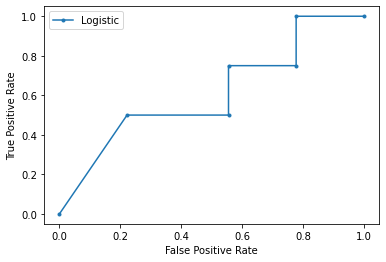

Train on 48 samples, validate on 13 samples
Epoch 1/5000
48/48 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.5417 - val_loss: 0.6981 - val_accuracy: 0.4615
Epoch 2/5000
48/48 [==============================] - 0s 262us/step - loss: 0.6496 - accuracy: 0.6875 - val_loss: 0.6760 - val_accuracy: 0.6923
Epoch 3/5000
48/48 [==============================] - 0s 231us/step - loss: 0.6292 - accuracy: 0.7292 - val_loss: 0.6599 - val_accuracy: 0.6154
Epoch 4/5000
48/48 [==============================] - 0s 249us/step - loss: 0.6083 - accuracy: 0.6667 - val_loss: 0.6439 - val_accuracy: 0.6923
Epoch 5/5000
48/48 [==============================] - 0s 249us/step - loss: 0.5966 - accuracy: 0.6458 - val_loss: 0.6304 - val_accuracy: 0.6923
Epoch 6/5000
48/48 [==============================] - 0s 250us/step - loss: 0.5823 - accuracy: 0.6458 - val_loss: 0.6192 - val_accuracy: 0.6923
Epoch 7/5000
48/48 [==============================] - 0s 263us/step - loss: 0.5731 - accuracy:

48/48 [==============================] - 0s 170us/step - loss: 0.2730 - accuracy: 0.9375 - val_loss: 0.6588 - val_accuracy: 0.6923
Epoch 58/5000
48/48 [==============================] - 0s 188us/step - loss: 0.2709 - accuracy: 0.9375 - val_loss: 0.6633 - val_accuracy: 0.6923
Epoch 59/5000
48/48 [==============================] - 0s 208us/step - loss: 0.2663 - accuracy: 0.9375 - val_loss: 0.6572 - val_accuracy: 0.6923
Epoch 60/5000
48/48 [==============================] - 0s 206us/step - loss: 0.2647 - accuracy: 0.9375 - val_loss: 0.6644 - val_accuracy: 0.6923
Epoch 61/5000
48/48 [==============================] - 0s 180us/step - loss: 0.2611 - accuracy: 0.9167 - val_loss: 0.6556 - val_accuracy: 0.6923
Epoch 62/5000
48/48 [==============================] - 0s 232us/step - loss: 0.2630 - accuracy: 0.8958 - val_loss: 0.6570 - val_accuracy: 0.6923
Epoch 63/5000
48/48 [==============================] - 0s 205us/step - loss: 0.2573 - accuracy: 0.9375 - val_loss: 0.6839 - val_accuracy: 0.6923

48/48 [==============================] - 0s 212us/step - loss: 0.1501 - accuracy: 0.9583 - val_loss: 0.9332 - val_accuracy: 0.6923
Epoch 114/5000
48/48 [==============================] - 0s 234us/step - loss: 0.1459 - accuracy: 0.9583 - val_loss: 0.9497 - val_accuracy: 0.6923
Epoch 115/5000
48/48 [==============================] - 0s 186us/step - loss: 0.1455 - accuracy: 0.9583 - val_loss: 0.9465 - val_accuracy: 0.6923
Epoch 116/5000
48/48 [==============================] - 0s 221us/step - loss: 0.1456 - accuracy: 0.9583 - val_loss: 0.9449 - val_accuracy: 0.6923
Epoch 117/5000
48/48 [==============================] - 0s 185us/step - loss: 0.1408 - accuracy: 0.9583 - val_loss: 0.9666 - val_accuracy: 0.6923
Epoch 118/5000
48/48 [==============================] - 0s 187us/step - loss: 0.1430 - accuracy: 0.9583 - val_loss: 0.9829 - val_accuracy: 0.6923
Epoch 119/5000
48/48 [==============================] - 0s 200us/step - loss: 0.1419 - accuracy: 0.9583 - val_loss: 0.9506 - val_accuracy: 

48/48 [==============================] - 0s 186us/step - loss: 0.0690 - accuracy: 0.9792 - val_loss: 1.2422 - val_accuracy: 0.6923
Epoch 170/5000
48/48 [==============================] - 0s 207us/step - loss: 0.0704 - accuracy: 0.9792 - val_loss: 1.2318 - val_accuracy: 0.6923
Epoch 171/5000
48/48 [==============================] - 0s 194us/step - loss: 0.0674 - accuracy: 0.9792 - val_loss: 1.2609 - val_accuracy: 0.6154
Epoch 172/5000
48/48 [==============================] - 0s 229us/step - loss: 0.0668 - accuracy: 0.9792 - val_loss: 1.2680 - val_accuracy: 0.6154
Epoch 173/5000
48/48 [==============================] - 0s 199us/step - loss: 0.0647 - accuracy: 0.9792 - val_loss: 1.2708 - val_accuracy: 0.6154
Epoch 174/5000
48/48 [==============================] - 0s 204us/step - loss: 0.0660 - accuracy: 0.9792 - val_loss: 1.2568 - val_accuracy: 0.6923
Epoch 175/5000
48/48 [==============================] - 0s 188us/step - loss: 0.0663 - accuracy: 0.9792 - val_loss: 1.2948 - val_accuracy: 

48/48 [==============================] - 0s 209us/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 1.5993 - val_accuracy: 0.6154
Epoch 226/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 1.5979 - val_accuracy: 0.6154
Epoch 227/5000
48/48 [==============================] - 0s 197us/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 1.5901 - val_accuracy: 0.6154
Epoch 228/5000
48/48 [==============================] - 0s 190us/step - loss: 0.0283 - accuracy: 1.0000 - val_loss: 1.6053 - val_accuracy: 0.6154
Epoch 229/5000
48/48 [==============================] - 0s 186us/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 1.6159 - val_accuracy: 0.6154
Epoch 230/5000
48/48 [==============================] - 0s 207us/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 1.6251 - val_accuracy: 0.6154
Epoch 231/5000
48/48 [==============================] - 0s 168us/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 1.6158 - val_accuracy: 

48/48 [==============================] - 0s 174us/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 1.9489 - val_accuracy: 0.6154
Epoch 282/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 1.9503 - val_accuracy: 0.6154
Epoch 283/5000
48/48 [==============================] - 0s 201us/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 1.9529 - val_accuracy: 0.6154
Epoch 284/5000
48/48 [==============================] - 0s 186us/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 1.9494 - val_accuracy: 0.6154
Epoch 285/5000
48/48 [==============================] - 0s 206us/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 1.9570 - val_accuracy: 0.6154
Epoch 286/5000
48/48 [==============================] - 0s 201us/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 1.9728 - val_accuracy: 0.6154
Epoch 287/5000
48/48 [==============================] - 0s 203us/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 1.9695 - val_accuracy: 

48/48 [==============================] - 0s 208us/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 2.2360 - val_accuracy: 0.5385
Epoch 338/5000
48/48 [==============================] - 0s 191us/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 2.2200 - val_accuracy: 0.6154
Epoch 339/5000
48/48 [==============================] - 0s 291us/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 2.2382 - val_accuracy: 0.6154
Epoch 340/5000
48/48 [==============================] - 0s 188us/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 2.2622 - val_accuracy: 0.5385
Epoch 341/5000
48/48 [==============================] - 0s 217us/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 2.2606 - val_accuracy: 0.5385
Epoch 342/5000
48/48 [==============================] - 0s 212us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 2.2480 - val_accuracy: 0.6154
Epoch 343/5000
48/48 [==============================] - 0s 186us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 2.2471 - val_accuracy: 

48/48 [==============================] - 0s 168us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 2.4843 - val_accuracy: 0.5385
Epoch 394/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 2.4892 - val_accuracy: 0.5385
Epoch 395/5000
48/48 [==============================] - 0s 324us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 2.4895 - val_accuracy: 0.5385
Epoch 396/5000
48/48 [==============================] - 0s 183us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 2.4937 - val_accuracy: 0.5385
Epoch 397/5000
48/48 [==============================] - 0s 200us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 2.4988 - val_accuracy: 0.5385
Epoch 398/5000
48/48 [==============================] - 0s 188us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 2.4935 - val_accuracy: 0.5385
Epoch 399/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 2.5141 - val_accuracy: 

48/48 [==============================] - 0s 180us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 2.7005 - val_accuracy: 0.5385
Epoch 450/5000
48/48 [==============================] - 0s 186us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 2.7002 - val_accuracy: 0.5385
Epoch 451/5000
48/48 [==============================] - 0s 210us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 2.7140 - val_accuracy: 0.5385
Epoch 452/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 2.7085 - val_accuracy: 0.5385
Epoch 453/5000
48/48 [==============================] - 0s 190us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 2.7150 - val_accuracy: 0.5385
Epoch 454/5000
48/48 [==============================] - 0s 204us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 2.7304 - val_accuracy: 0.5385
Epoch 455/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 2.7300 - val_accuracy: 

48/48 [==============================] - 0s 187us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.8997 - val_accuracy: 0.5385
Epoch 506/5000
48/48 [==============================] - 0s 188us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.9078 - val_accuracy: 0.5385
Epoch 507/5000
48/48 [==============================] - 0s 165us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.9076 - val_accuracy: 0.5385
Epoch 508/5000
48/48 [==============================] - 0s 270us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.9142 - val_accuracy: 0.5385
Epoch 509/5000
48/48 [==============================] - 0s 166us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.9109 - val_accuracy: 0.5385
Epoch 510/5000
48/48 [==============================] - 0s 161us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.9179 - val_accuracy: 0.5385
Epoch 511/5000
48/48 [==============================] - 0s 179us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.9309 - val_accuracy: 

48/48 [==============================] - 0s 188us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.0917 - val_accuracy: 0.5385
Epoch 562/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.1125 - val_accuracy: 0.5385
Epoch 563/5000
48/48 [==============================] - 0s 201us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.1327 - val_accuracy: 0.5385
Epoch 564/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.1341 - val_accuracy: 0.5385
Epoch 565/5000
48/48 [==============================] - 0s 263us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.1259 - val_accuracy: 0.5385
Epoch 566/5000
48/48 [==============================] - 0s 206us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.1263 - val_accuracy: 0.5385
Epoch 567/5000
48/48 [==============================] - 0s 224us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.1191 - val_accuracy: 

48/48 [==============================] - 0s 208us/step - loss: 9.9114e-04 - accuracy: 1.0000 - val_loss: 3.2829 - val_accuracy: 0.5385
Epoch 618/5000
48/48 [==============================] - 0s 206us/step - loss: 9.9444e-04 - accuracy: 1.0000 - val_loss: 3.2754 - val_accuracy: 0.5385
Epoch 619/5000
48/48 [==============================] - 0s 204us/step - loss: 9.9588e-04 - accuracy: 1.0000 - val_loss: 3.2737 - val_accuracy: 0.5385
Epoch 620/5000
48/48 [==============================] - 0s 209us/step - loss: 9.7797e-04 - accuracy: 1.0000 - val_loss: 3.2818 - val_accuracy: 0.5385
Epoch 621/5000
48/48 [==============================] - 0s 180us/step - loss: 9.7382e-04 - accuracy: 1.0000 - val_loss: 3.2936 - val_accuracy: 0.5385
Epoch 622/5000
48/48 [==============================] - 0s 184us/step - loss: 9.6582e-04 - accuracy: 1.0000 - val_loss: 3.3017 - val_accuracy: 0.5385
Epoch 623/5000
48/48 [==============================] - 0s 191us/step - loss: 9.6107e-04 - accuracy: 1.0000 - val_l

Epoch 672/5000
48/48 [==============================] - 0s 202us/step - loss: 7.3346e-04 - accuracy: 1.0000 - val_loss: 3.4464 - val_accuracy: 0.5385
Epoch 673/5000
48/48 [==============================] - 0s 208us/step - loss: 7.2865e-04 - accuracy: 1.0000 - val_loss: 3.4451 - val_accuracy: 0.5385
Epoch 674/5000
48/48 [==============================] - 0s 192us/step - loss: 7.2310e-04 - accuracy: 1.0000 - val_loss: 3.4390 - val_accuracy: 0.5385
Epoch 675/5000
48/48 [==============================] - 0s 249us/step - loss: 7.2120e-04 - accuracy: 1.0000 - val_loss: 3.4396 - val_accuracy: 0.5385
Epoch 676/5000
48/48 [==============================] - 0s 212us/step - loss: 7.1876e-04 - accuracy: 1.0000 - val_loss: 3.4431 - val_accuracy: 0.5385
Epoch 677/5000
48/48 [==============================] - 0s 242us/step - loss: 7.1744e-04 - accuracy: 1.0000 - val_loss: 3.4610 - val_accuracy: 0.5385
Epoch 678/5000
48/48 [==============================] - 0s 256us/step - loss: 7.1326e-04 - accuracy:

48/48 [==============================] - 0s 225us/step - loss: 5.5344e-04 - accuracy: 1.0000 - val_loss: 3.5909 - val_accuracy: 0.5385
Epoch 727/5000
48/48 [==============================] - 0s 251us/step - loss: 5.4654e-04 - accuracy: 1.0000 - val_loss: 3.5967 - val_accuracy: 0.5385
Epoch 728/5000
48/48 [==============================] - 0s 254us/step - loss: 5.4283e-04 - accuracy: 1.0000 - val_loss: 3.6058 - val_accuracy: 0.5385
Epoch 729/5000
48/48 [==============================] - 0s 218us/step - loss: 5.4098e-04 - accuracy: 1.0000 - val_loss: 3.6142 - val_accuracy: 0.5385
Epoch 730/5000
48/48 [==============================] - 0s 249us/step - loss: 5.3907e-04 - accuracy: 1.0000 - val_loss: 3.6177 - val_accuracy: 0.5385
Epoch 731/5000
48/48 [==============================] - 0s 249us/step - loss: 5.3665e-04 - accuracy: 1.0000 - val_loss: 3.6124 - val_accuracy: 0.5385
Epoch 732/5000
48/48 [==============================] - 0s 233us/step - loss: 5.3193e-04 - accuracy: 1.0000 - val_l

Epoch 781/5000
48/48 [==============================] - 0s 146us/step - loss: 4.2801e-04 - accuracy: 1.0000 - val_loss: 3.7159 - val_accuracy: 0.5385
Epoch 782/5000
48/48 [==============================] - 0s 207us/step - loss: 4.2675e-04 - accuracy: 1.0000 - val_loss: 3.7204 - val_accuracy: 0.5385
Epoch 783/5000
48/48 [==============================] - 0s 212us/step - loss: 4.2872e-04 - accuracy: 1.0000 - val_loss: 3.7164 - val_accuracy: 0.5385
Epoch 784/5000
48/48 [==============================] - 0s 205us/step - loss: 4.2203e-04 - accuracy: 1.0000 - val_loss: 3.7259 - val_accuracy: 0.5385
Epoch 785/5000
48/48 [==============================] - 0s 194us/step - loss: 4.1973e-04 - accuracy: 1.0000 - val_loss: 3.7307 - val_accuracy: 0.5385
Epoch 786/5000
48/48 [==============================] - 0s 191us/step - loss: 4.2008e-04 - accuracy: 1.0000 - val_loss: 3.7347 - val_accuracy: 0.5385
Epoch 787/5000
48/48 [==============================] - 0s 187us/step - loss: 4.1745e-04 - accuracy:

48/48 [==============================] - 0s 180us/step - loss: 3.4309e-04 - accuracy: 1.0000 - val_loss: 3.8290 - val_accuracy: 0.5385
Epoch 836/5000
48/48 [==============================] - 0s 191us/step - loss: 3.3992e-04 - accuracy: 1.0000 - val_loss: 3.8319 - val_accuracy: 0.5385
Epoch 837/5000
48/48 [==============================] - 0s 190us/step - loss: 3.4114e-04 - accuracy: 1.0000 - val_loss: 3.8312 - val_accuracy: 0.5385
Epoch 838/5000
48/48 [==============================] - 0s 194us/step - loss: 3.3728e-04 - accuracy: 1.0000 - val_loss: 3.8389 - val_accuracy: 0.5385
Epoch 839/5000
48/48 [==============================] - 0s 188us/step - loss: 3.3572e-04 - accuracy: 1.0000 - val_loss: 3.8490 - val_accuracy: 0.5385
Epoch 840/5000
48/48 [==============================] - 0s 187us/step - loss: 3.3624e-04 - accuracy: 1.0000 - val_loss: 3.8556 - val_accuracy: 0.5385
Epoch 841/5000
48/48 [==============================] - 0s 188us/step - loss: 3.3454e-04 - accuracy: 1.0000 - val_l

Epoch 890/5000
48/48 [==============================] - 0s 403us/step - loss: 2.7472e-04 - accuracy: 1.0000 - val_loss: 3.9512 - val_accuracy: 0.5385
Epoch 891/5000
48/48 [==============================] - 0s 218us/step - loss: 2.7396e-04 - accuracy: 1.0000 - val_loss: 3.9515 - val_accuracy: 0.5385
Epoch 892/5000
48/48 [==============================] - 0s 187us/step - loss: 2.7296e-04 - accuracy: 1.0000 - val_loss: 3.9517 - val_accuracy: 0.5385
Epoch 893/5000
48/48 [==============================] - 0s 242us/step - loss: 2.7233e-04 - accuracy: 1.0000 - val_loss: 3.9582 - val_accuracy: 0.5385
Epoch 894/5000
48/48 [==============================] - 0s 168us/step - loss: 2.7072e-04 - accuracy: 1.0000 - val_loss: 3.9585 - val_accuracy: 0.5385
Epoch 895/5000
48/48 [==============================] - 0s 209us/step - loss: 2.6964e-04 - accuracy: 1.0000 - val_loss: 3.9586 - val_accuracy: 0.5385
Epoch 896/5000
48/48 [==============================] - 0s 208us/step - loss: 2.6900e-04 - accuracy:

48/48 [==============================] - 0s 215us/step - loss: 2.2621e-04 - accuracy: 1.0000 - val_loss: 4.0476 - val_accuracy: 0.5385
Epoch 945/5000
48/48 [==============================] - 0s 196us/step - loss: 2.2388e-04 - accuracy: 1.0000 - val_loss: 4.0594 - val_accuracy: 0.5385
Epoch 946/5000
48/48 [==============================] - 0s 187us/step - loss: 2.2317e-04 - accuracy: 1.0000 - val_loss: 4.0644 - val_accuracy: 0.5385
Epoch 947/5000
48/48 [==============================] - 0s 187us/step - loss: 2.2522e-04 - accuracy: 1.0000 - val_loss: 4.0582 - val_accuracy: 0.5385
Epoch 948/5000
48/48 [==============================] - 0s 172us/step - loss: 2.2028e-04 - accuracy: 1.0000 - val_loss: 4.0634 - val_accuracy: 0.5385
Epoch 949/5000
48/48 [==============================] - 0s 197us/step - loss: 2.1961e-04 - accuracy: 1.0000 - val_loss: 4.0678 - val_accuracy: 0.5385
Epoch 950/5000
48/48 [==============================] - 0s 188us/step - loss: 2.1866e-04 - accuracy: 1.0000 - val_l

Epoch 999/5000
48/48 [==============================] - 0s 208us/step - loss: 1.8366e-04 - accuracy: 1.0000 - val_loss: 4.1656 - val_accuracy: 0.5385
Epoch 1000/5000
48/48 [==============================] - 0s 167us/step - loss: 1.8347e-04 - accuracy: 1.0000 - val_loss: 4.1594 - val_accuracy: 0.5385
Epoch 1001/5000
48/48 [==============================] - 0s 169us/step - loss: 1.8119e-04 - accuracy: 1.0000 - val_loss: 4.1634 - val_accuracy: 0.5385
Epoch 1002/5000
48/48 [==============================] - 0s 167us/step - loss: 1.8109e-04 - accuracy: 1.0000 - val_loss: 4.1630 - val_accuracy: 0.5385
Epoch 1003/5000
48/48 [==============================] - 0s 201us/step - loss: 1.8023e-04 - accuracy: 1.0000 - val_loss: 4.1713 - val_accuracy: 0.5385
Epoch 1004/5000
48/48 [==============================] - 0s 181us/step - loss: 1.7938e-04 - accuracy: 1.0000 - val_loss: 4.1727 - val_accuracy: 0.5385
Epoch 1005/5000
48/48 [==============================] - 0s 167us/step - loss: 1.7830e-04 - acc

Epoch 1053/5000
48/48 [==============================] - 0s 172us/step - loss: 1.5053e-04 - accuracy: 1.0000 - val_loss: 4.2563 - val_accuracy: 0.5385
Epoch 1054/5000
48/48 [==============================] - 0s 214us/step - loss: 1.5063e-04 - accuracy: 1.0000 - val_loss: 4.2641 - val_accuracy: 0.5385
Epoch 1055/5000
48/48 [==============================] - 0s 202us/step - loss: 1.4990e-04 - accuracy: 1.0000 - val_loss: 4.2667 - val_accuracy: 0.5385
Epoch 1056/5000
48/48 [==============================] - 0s 190us/step - loss: 1.4944e-04 - accuracy: 1.0000 - val_loss: 4.2637 - val_accuracy: 0.5385
Epoch 1057/5000
48/48 [==============================] - 0s 210us/step - loss: 1.4826e-04 - accuracy: 1.0000 - val_loss: 4.2651 - val_accuracy: 0.5385
Epoch 1058/5000
48/48 [==============================] - 0s 227us/step - loss: 1.4891e-04 - accuracy: 1.0000 - val_loss: 4.2624 - val_accuracy: 0.5385
Epoch 1059/5000
48/48 [==============================] - 0s 188us/step - loss: 1.4737e-04 - ac

48/48 [==============================] - 0s 188us/step - loss: 1.2554e-04 - accuracy: 1.0000 - val_loss: 4.3632 - val_accuracy: 0.5385
Epoch 1108/5000
48/48 [==============================] - 0s 213us/step - loss: 1.2497e-04 - accuracy: 1.0000 - val_loss: 4.3666 - val_accuracy: 0.5385
Epoch 1109/5000
48/48 [==============================] - 0s 207us/step - loss: 1.2391e-04 - accuracy: 1.0000 - val_loss: 4.3669 - val_accuracy: 0.5385
Epoch 1110/5000
48/48 [==============================] - 0s 208us/step - loss: 1.2342e-04 - accuracy: 1.0000 - val_loss: 4.3617 - val_accuracy: 0.5385
Epoch 1111/5000
48/48 [==============================] - 0s 208us/step - loss: 1.2314e-04 - accuracy: 1.0000 - val_loss: 4.3653 - val_accuracy: 0.5385
Epoch 1112/5000
48/48 [==============================] - 0s 208us/step - loss: 1.2349e-04 - accuracy: 1.0000 - val_loss: 4.3700 - val_accuracy: 0.5385
Epoch 1113/5000
48/48 [==============================] - 0s 209us/step - loss: 1.2198e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 199us/step - loss: 1.0438e-04 - accuracy: 1.0000 - val_loss: 4.4520 - val_accuracy: 0.5385
Epoch 1162/5000
48/48 [==============================] - 0s 270us/step - loss: 1.0380e-04 - accuracy: 1.0000 - val_loss: 4.4608 - val_accuracy: 0.5385
Epoch 1163/5000
48/48 [==============================] - 0s 186us/step - loss: 1.0321e-04 - accuracy: 1.0000 - val_loss: 4.4657 - val_accuracy: 0.5385
Epoch 1164/5000
48/48 [==============================] - 0s 207us/step - loss: 1.0311e-04 - accuracy: 1.0000 - val_loss: 4.4629 - val_accuracy: 0.5385
Epoch 1165/5000
48/48 [==============================] - 0s 187us/step - loss: 1.0273e-04 - accuracy: 1.0000 - val_loss: 4.4639 - val_accuracy: 0.5385
Epoch 1166/5000
48/48 [==============================] - 0s 204us/step - loss: 1.0244e-04 - accuracy: 1.0000 - val_loss: 4.4632 - val_accuracy: 0.5385
Epoch 1167/5000
48/48 [==============================] - 0s 190us/step - loss: 1.0187e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 194us/step - loss: 8.6771e-05 - accuracy: 1.0000 - val_loss: 4.5454 - val_accuracy: 0.5385
Epoch 1216/5000
48/48 [==============================] - 0s 196us/step - loss: 8.6782e-05 - accuracy: 1.0000 - val_loss: 4.5531 - val_accuracy: 0.5385
Epoch 1217/5000
48/48 [==============================] - 0s 187us/step - loss: 8.6474e-05 - accuracy: 1.0000 - val_loss: 4.5579 - val_accuracy: 0.5385
Epoch 1218/5000
48/48 [==============================] - 0s 208us/step - loss: 8.5445e-05 - accuracy: 1.0000 - val_loss: 4.5570 - val_accuracy: 0.5385
Epoch 1219/5000
48/48 [==============================] - 0s 187us/step - loss: 8.5567e-05 - accuracy: 1.0000 - val_loss: 4.5544 - val_accuracy: 0.5385
Epoch 1220/5000
48/48 [==============================] - 0s 202us/step - loss: 8.5318e-05 - accuracy: 1.0000 - val_loss: 4.5585 - val_accuracy: 0.5385
Epoch 1221/5000
48/48 [==============================] - 0s 249us/step - loss: 8.5212e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 210us/step - loss: 7.2402e-05 - accuracy: 1.0000 - val_loss: 4.6457 - val_accuracy: 0.5385
Epoch 1270/5000
48/48 [==============================] - 0s 213us/step - loss: 7.2161e-05 - accuracy: 1.0000 - val_loss: 4.6459 - val_accuracy: 0.5385
Epoch 1271/5000
48/48 [==============================] - 0s 186us/step - loss: 7.2034e-05 - accuracy: 1.0000 - val_loss: 4.6507 - val_accuracy: 0.5385
Epoch 1272/5000
48/48 [==============================] - 0s 182us/step - loss: 7.1781e-05 - accuracy: 1.0000 - val_loss: 4.6530 - val_accuracy: 0.5385
Epoch 1273/5000
48/48 [==============================] - 0s 207us/step - loss: 7.2083e-05 - accuracy: 1.0000 - val_loss: 4.6473 - val_accuracy: 0.5385
Epoch 1274/5000
48/48 [==============================] - 0s 194us/step - loss: 7.1307e-05 - accuracy: 1.0000 - val_loss: 4.6497 - val_accuracy: 0.5385
Epoch 1275/5000
48/48 [==============================] - 0s 201us/step - loss: 7.1147e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 195us/step - loss: 6.0922e-05 - accuracy: 1.0000 - val_loss: 4.7382 - val_accuracy: 0.5385
Epoch 1324/5000
48/48 [==============================] - 0s 204us/step - loss: 6.0473e-05 - accuracy: 1.0000 - val_loss: 4.7415 - val_accuracy: 0.5385
Epoch 1325/5000
48/48 [==============================] - 0s 187us/step - loss: 6.1183e-05 - accuracy: 1.0000 - val_loss: 4.7516 - val_accuracy: 0.5385
Epoch 1326/5000
48/48 [==============================] - 0s 169us/step - loss: 6.0369e-05 - accuracy: 1.0000 - val_loss: 4.7467 - val_accuracy: 0.5385
Epoch 1327/5000
48/48 [==============================] - 0s 187us/step - loss: 5.9996e-05 - accuracy: 1.0000 - val_loss: 4.7488 - val_accuracy: 0.5385
Epoch 1328/5000
48/48 [==============================] - 0s 190us/step - loss: 5.9903e-05 - accuracy: 1.0000 - val_loss: 4.7522 - val_accuracy: 0.5385
Epoch 1329/5000
48/48 [==============================] - 0s 207us/step - loss: 5.9707e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 5.1879e-05 - accuracy: 1.0000 - val_loss: 4.8300 - val_accuracy: 0.5385
Epoch 1378/5000
48/48 [==============================] - 0s 165us/step - loss: 5.0924e-05 - accuracy: 1.0000 - val_loss: 4.8361 - val_accuracy: 0.5385
Epoch 1379/5000
48/48 [==============================] - 0s 270us/step - loss: 5.1021e-05 - accuracy: 1.0000 - val_loss: 4.8446 - val_accuracy: 0.5385
Epoch 1380/5000
48/48 [==============================] - 0s 207us/step - loss: 5.0536e-05 - accuracy: 1.0000 - val_loss: 4.8453 - val_accuracy: 0.5385
Epoch 1381/5000
48/48 [==============================] - 0s 209us/step - loss: 5.0557e-05 - accuracy: 1.0000 - val_loss: 4.8422 - val_accuracy: 0.5385
Epoch 1382/5000
48/48 [==============================] - 0s 204us/step - loss: 5.0267e-05 - accuracy: 1.0000 - val_loss: 4.8437 - val_accuracy: 0.5385
Epoch 1383/5000
48/48 [==============================] - 0s 170us/step - loss: 5.0156e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 169us/step - loss: 4.3060e-05 - accuracy: 1.0000 - val_loss: 4.9330 - val_accuracy: 0.5385
Epoch 1432/5000
48/48 [==============================] - 0s 187us/step - loss: 4.2882e-05 - accuracy: 1.0000 - val_loss: 4.9333 - val_accuracy: 0.5385
Epoch 1433/5000
48/48 [==============================] - 0s 167us/step - loss: 4.2878e-05 - accuracy: 1.0000 - val_loss: 4.9323 - val_accuracy: 0.5385
Epoch 1434/5000
48/48 [==============================] - 0s 190us/step - loss: 4.2686e-05 - accuracy: 1.0000 - val_loss: 4.9392 - val_accuracy: 0.5385
Epoch 1435/5000
48/48 [==============================] - 0s 187us/step - loss: 4.2435e-05 - accuracy: 1.0000 - val_loss: 4.9384 - val_accuracy: 0.5385
Epoch 1436/5000
48/48 [==============================] - 0s 169us/step - loss: 4.2281e-05 - accuracy: 1.0000 - val_loss: 4.9378 - val_accuracy: 0.5385
Epoch 1437/5000
48/48 [==============================] - 0s 174us/step - loss: 4.2225e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 242us/step - loss: 3.6290e-05 - accuracy: 1.0000 - val_loss: 5.0182 - val_accuracy: 0.5385
Epoch 1486/5000
48/48 [==============================] - 0s 265us/step - loss: 3.6238e-05 - accuracy: 1.0000 - val_loss: 5.0207 - val_accuracy: 0.5385
Epoch 1487/5000
48/48 [==============================] - 0s 228us/step - loss: 3.6319e-05 - accuracy: 1.0000 - val_loss: 5.0285 - val_accuracy: 0.5385
Epoch 1488/5000
48/48 [==============================] - 0s 229us/step - loss: 3.6027e-05 - accuracy: 1.0000 - val_loss: 5.0286 - val_accuracy: 0.5385
Epoch 1489/5000
48/48 [==============================] - 0s 231us/step - loss: 3.5982e-05 - accuracy: 1.0000 - val_loss: 5.0310 - val_accuracy: 0.5385
Epoch 1490/5000
48/48 [==============================] - 0s 229us/step - loss: 3.5758e-05 - accuracy: 1.0000 - val_loss: 5.0302 - val_accuracy: 0.5385
Epoch 1491/5000
48/48 [==============================] - 0s 187us/step - loss: 3.5808e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 168us/step - loss: 3.0919e-05 - accuracy: 1.0000 - val_loss: 5.1141 - val_accuracy: 0.5385
Epoch 1540/5000
48/48 [==============================] - 0s 181us/step - loss: 3.0690e-05 - accuracy: 1.0000 - val_loss: 5.1142 - val_accuracy: 0.5385
Epoch 1541/5000
48/48 [==============================] - 0s 188us/step - loss: 3.0561e-05 - accuracy: 1.0000 - val_loss: 5.1180 - val_accuracy: 0.5385
Epoch 1542/5000
48/48 [==============================] - 0s 189us/step - loss: 3.0412e-05 - accuracy: 1.0000 - val_loss: 5.1139 - val_accuracy: 0.5385
Epoch 1543/5000
48/48 [==============================] - 0s 207us/step - loss: 3.0413e-05 - accuracy: 1.0000 - val_loss: 5.1189 - val_accuracy: 0.5385
Epoch 1544/5000
48/48 [==============================] - 0s 208us/step - loss: 3.0283e-05 - accuracy: 1.0000 - val_loss: 5.1175 - val_accuracy: 0.5385
Epoch 1545/5000
48/48 [==============================] - 0s 191us/step - loss: 3.0193e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 180us/step - loss: 2.6196e-05 - accuracy: 1.0000 - val_loss: 5.2005 - val_accuracy: 0.5385
Epoch 1594/5000
48/48 [==============================] - 0s 229us/step - loss: 2.6018e-05 - accuracy: 1.0000 - val_loss: 5.2017 - val_accuracy: 0.5385
Epoch 1595/5000
48/48 [==============================] - 0s 209us/step - loss: 2.5815e-05 - accuracy: 1.0000 - val_loss: 5.2088 - val_accuracy: 0.5385
Epoch 1596/5000
48/48 [==============================] - 0s 189us/step - loss: 2.6105e-05 - accuracy: 1.0000 - val_loss: 5.2195 - val_accuracy: 0.5385
Epoch 1597/5000
48/48 [==============================] - 0s 171us/step - loss: 2.5755e-05 - accuracy: 1.0000 - val_loss: 5.2154 - val_accuracy: 0.5385
Epoch 1598/5000
48/48 [==============================] - 0s 192us/step - loss: 2.5594e-05 - accuracy: 1.0000 - val_loss: 5.2154 - val_accuracy: 0.5385
Epoch 1599/5000
48/48 [==============================] - 0s 197us/step - loss: 2.5558e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 217us/step - loss: 2.2095e-05 - accuracy: 1.0000 - val_loss: 5.2933 - val_accuracy: 0.5385
Epoch 1648/5000
48/48 [==============================] - 0s 188us/step - loss: 2.2112e-05 - accuracy: 1.0000 - val_loss: 5.3002 - val_accuracy: 0.5385
Epoch 1649/5000
48/48 [==============================] - 0s 210us/step - loss: 2.1958e-05 - accuracy: 1.0000 - val_loss: 5.3026 - val_accuracy: 0.5385
Epoch 1650/5000
48/48 [==============================] - 0s 185us/step - loss: 2.1880e-05 - accuracy: 1.0000 - val_loss: 5.3027 - val_accuracy: 0.5385
Epoch 1651/5000
48/48 [==============================] - 0s 186us/step - loss: 2.1774e-05 - accuracy: 1.0000 - val_loss: 5.3031 - val_accuracy: 0.5385
Epoch 1652/5000
48/48 [==============================] - 0s 191us/step - loss: 2.1751e-05 - accuracy: 1.0000 - val_loss: 5.3028 - val_accuracy: 0.5385
Epoch 1653/5000
48/48 [==============================] - 0s 173us/step - loss: 2.1660e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 1.8817e-05 - accuracy: 1.0000 - val_loss: 5.3908 - val_accuracy: 0.5385
Epoch 1702/5000
48/48 [==============================] - 0s 208us/step - loss: 1.8711e-05 - accuracy: 1.0000 - val_loss: 5.3918 - val_accuracy: 0.5385
Epoch 1703/5000
48/48 [==============================] - 0s 320us/step - loss: 1.8636e-05 - accuracy: 1.0000 - val_loss: 5.3865 - val_accuracy: 0.5385
Epoch 1704/5000
48/48 [==============================] - 0s 231us/step - loss: 1.8556e-05 - accuracy: 1.0000 - val_loss: 5.3885 - val_accuracy: 0.5385
Epoch 1705/5000
48/48 [==============================] - 0s 209us/step - loss: 1.8556e-05 - accuracy: 1.0000 - val_loss: 5.3893 - val_accuracy: 0.5385
Epoch 1706/5000
48/48 [==============================] - 0s 209us/step - loss: 1.8464e-05 - accuracy: 1.0000 - val_loss: 5.3941 - val_accuracy: 0.5385
Epoch 1707/5000
48/48 [==============================] - 0s 194us/step - loss: 1.8455e-05 - accuracy: 1.0000 -

Epoch 1755/5000
48/48 [==============================] - 0s 193us/step - loss: 1.5962e-05 - accuracy: 1.0000 - val_loss: 5.4729 - val_accuracy: 0.5385
Epoch 1756/5000
48/48 [==============================] - 0s 204us/step - loss: 1.5861e-05 - accuracy: 1.0000 - val_loss: 5.4769 - val_accuracy: 0.5385
Epoch 1757/5000
48/48 [==============================] - 0s 189us/step - loss: 1.5814e-05 - accuracy: 1.0000 - val_loss: 5.4773 - val_accuracy: 0.5385
Epoch 1758/5000
48/48 [==============================] - 0s 208us/step - loss: 1.5778e-05 - accuracy: 1.0000 - val_loss: 5.4780 - val_accuracy: 0.5385
Epoch 1759/5000
48/48 [==============================] - 0s 187us/step - loss: 1.5707e-05 - accuracy: 1.0000 - val_loss: 5.4824 - val_accuracy: 0.5385
Epoch 1760/5000
48/48 [==============================] - 0s 186us/step - loss: 1.5711e-05 - accuracy: 1.0000 - val_loss: 5.4842 - val_accuracy: 0.5385
Epoch 1761/5000
48/48 [==============================] - 0s 188us/step - loss: 1.5622e-05 - ac

48/48 [==============================] - 0s 193us/step - loss: 1.3550e-05 - accuracy: 1.0000 - val_loss: 5.5663 - val_accuracy: 0.5385
Epoch 1810/5000
48/48 [==============================] - 0s 187us/step - loss: 1.3557e-05 - accuracy: 1.0000 - val_loss: 5.5678 - val_accuracy: 0.5385
Epoch 1811/5000
48/48 [==============================] - 0s 188us/step - loss: 1.3463e-05 - accuracy: 1.0000 - val_loss: 5.5665 - val_accuracy: 0.5385
Epoch 1812/5000
48/48 [==============================] - 0s 191us/step - loss: 1.3439e-05 - accuracy: 1.0000 - val_loss: 5.5696 - val_accuracy: 0.5385
Epoch 1813/5000
48/48 [==============================] - 0s 167us/step - loss: 1.3344e-05 - accuracy: 1.0000 - val_loss: 5.5685 - val_accuracy: 0.5385
Epoch 1814/5000
48/48 [==============================] - 0s 208us/step - loss: 1.3333e-05 - accuracy: 1.0000 - val_loss: 5.5699 - val_accuracy: 0.5385
Epoch 1815/5000
48/48 [==============================] - 0s 165us/step - loss: 1.3310e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 1.1532e-05 - accuracy: 1.0000 - val_loss: 5.6539 - val_accuracy: 0.5385
Epoch 1864/5000
48/48 [==============================] - 0s 183us/step - loss: 1.1496e-05 - accuracy: 1.0000 - val_loss: 5.6545 - val_accuracy: 0.5385
Epoch 1865/5000
48/48 [==============================] - 0s 194us/step - loss: 1.1460e-05 - accuracy: 1.0000 - val_loss: 5.6602 - val_accuracy: 0.5385
Epoch 1866/5000
48/48 [==============================] - 0s 187us/step - loss: 1.1452e-05 - accuracy: 1.0000 - val_loss: 5.6633 - val_accuracy: 0.5385
Epoch 1867/5000
48/48 [==============================] - 0s 167us/step - loss: 1.1390e-05 - accuracy: 1.0000 - val_loss: 5.6647 - val_accuracy: 0.5385
Epoch 1868/5000
48/48 [==============================] - 0s 204us/step - loss: 1.1356e-05 - accuracy: 1.0000 - val_loss: 5.6650 - val_accuracy: 0.5385
Epoch 1869/5000
48/48 [==============================] - 0s 184us/step - loss: 1.1312e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 9.8409e-06 - accuracy: 1.0000 - val_loss: 5.7392 - val_accuracy: 0.5385
Epoch 1918/5000
48/48 [==============================] - 0s 167us/step - loss: 9.8044e-06 - accuracy: 1.0000 - val_loss: 5.7412 - val_accuracy: 0.5385
Epoch 1919/5000
48/48 [==============================] - 0s 209us/step - loss: 9.7621e-06 - accuracy: 1.0000 - val_loss: 5.7488 - val_accuracy: 0.5385
Epoch 1920/5000
48/48 [==============================] - 0s 214us/step - loss: 9.7405e-06 - accuracy: 1.0000 - val_loss: 5.7520 - val_accuracy: 0.5385
Epoch 1921/5000
48/48 [==============================] - 0s 196us/step - loss: 9.7387e-06 - accuracy: 1.0000 - val_loss: 5.7557 - val_accuracy: 0.5385
Epoch 1922/5000
48/48 [==============================] - 0s 194us/step - loss: 9.7125e-06 - accuracy: 1.0000 - val_loss: 5.7540 - val_accuracy: 0.5385
Epoch 1923/5000
48/48 [==============================] - 0s 172us/step - loss: 9.6343e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 270us/step - loss: 8.3871e-06 - accuracy: 1.0000 - val_loss: 5.8306 - val_accuracy: 0.5385
Epoch 1972/5000
48/48 [==============================] - 0s 245us/step - loss: 8.3773e-06 - accuracy: 1.0000 - val_loss: 5.8296 - val_accuracy: 0.5385
Epoch 1973/5000
48/48 [==============================] - 0s 229us/step - loss: 8.3283e-06 - accuracy: 1.0000 - val_loss: 5.8315 - val_accuracy: 0.5385
Epoch 1974/5000
48/48 [==============================] - 0s 251us/step - loss: 8.3416e-06 - accuracy: 1.0000 - val_loss: 5.8362 - val_accuracy: 0.5385
Epoch 1975/5000
48/48 [==============================] - 0s 291us/step - loss: 8.2937e-06 - accuracy: 1.0000 - val_loss: 5.8374 - val_accuracy: 0.5385
Epoch 1976/5000
48/48 [==============================] - 0s 245us/step - loss: 8.2891e-06 - accuracy: 1.0000 - val_loss: 5.8303 - val_accuracy: 0.5385
Epoch 1977/5000
48/48 [==============================] - 0s 213us/step - loss: 8.2635e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 184us/step - loss: 7.1686e-06 - accuracy: 1.0000 - val_loss: 5.9156 - val_accuracy: 0.5385
Epoch 2026/5000
48/48 [==============================] - 0s 174us/step - loss: 7.1589e-06 - accuracy: 1.0000 - val_loss: 5.9254 - val_accuracy: 0.5385
Epoch 2027/5000
48/48 [==============================] - 0s 170us/step - loss: 7.1120e-06 - accuracy: 1.0000 - val_loss: 5.9274 - val_accuracy: 0.5385
Epoch 2028/5000
48/48 [==============================] - 0s 185us/step - loss: 7.1027e-06 - accuracy: 1.0000 - val_loss: 5.9240 - val_accuracy: 0.5385
Epoch 2029/5000
48/48 [==============================] - 0s 184us/step - loss: 7.0883e-06 - accuracy: 1.0000 - val_loss: 5.9228 - val_accuracy: 0.5385
Epoch 2030/5000
48/48 [==============================] - 0s 166us/step - loss: 7.0535e-06 - accuracy: 1.0000 - val_loss: 5.9282 - val_accuracy: 0.5385
Epoch 2031/5000
48/48 [==============================] - 0s 189us/step - loss: 7.0341e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 6.0905e-06 - accuracy: 1.0000 - val_loss: 6.0078 - val_accuracy: 0.5385
Epoch 2080/5000
48/48 [==============================] - 0s 191us/step - loss: 6.1021e-06 - accuracy: 1.0000 - val_loss: 6.0124 - val_accuracy: 0.5385
Epoch 2081/5000
48/48 [==============================] - 0s 165us/step - loss: 6.0648e-06 - accuracy: 1.0000 - val_loss: 6.0131 - val_accuracy: 0.5385
Epoch 2082/5000
48/48 [==============================] - 0s 176us/step - loss: 6.0449e-06 - accuracy: 1.0000 - val_loss: 6.0151 - val_accuracy: 0.5385
Epoch 2083/5000
48/48 [==============================] - 0s 175us/step - loss: 6.0428e-06 - accuracy: 1.0000 - val_loss: 6.0111 - val_accuracy: 0.5385
Epoch 2084/5000
48/48 [==============================] - 0s 188us/step - loss: 6.0232e-06 - accuracy: 1.0000 - val_loss: 6.0111 - val_accuracy: 0.5385
Epoch 2085/5000
48/48 [==============================] - 0s 192us/step - loss: 5.9962e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 5.2179e-06 - accuracy: 1.0000 - val_loss: 6.0934 - val_accuracy: 0.5385
Epoch 2134/5000
48/48 [==============================] - 0s 186us/step - loss: 5.2171e-06 - accuracy: 1.0000 - val_loss: 6.0997 - val_accuracy: 0.5385
Epoch 2135/5000
48/48 [==============================] - 0s 187us/step - loss: 5.1821e-06 - accuracy: 1.0000 - val_loss: 6.1011 - val_accuracy: 0.5385
Epoch 2136/5000
48/48 [==============================] - 0s 187us/step - loss: 5.2061e-06 - accuracy: 1.0000 - val_loss: 6.1063 - val_accuracy: 0.5385
Epoch 2137/5000
48/48 [==============================] - 0s 186us/step - loss: 5.1473e-06 - accuracy: 1.0000 - val_loss: 6.1025 - val_accuracy: 0.5385
Epoch 2138/5000
48/48 [==============================] - 0s 208us/step - loss: 5.1535e-06 - accuracy: 1.0000 - val_loss: 6.0969 - val_accuracy: 0.5385
Epoch 2139/5000
48/48 [==============================] - 0s 249us/step - loss: 5.1299e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 4.4544e-06 - accuracy: 1.0000 - val_loss: 6.1851 - val_accuracy: 0.5385
Epoch 2188/5000
48/48 [==============================] - 0s 188us/step - loss: 4.4464e-06 - accuracy: 1.0000 - val_loss: 6.1845 - val_accuracy: 0.5385
Epoch 2189/5000
48/48 [==============================] - 0s 165us/step - loss: 4.4462e-06 - accuracy: 1.0000 - val_loss: 6.1853 - val_accuracy: 0.5385
Epoch 2190/5000
48/48 [==============================] - 0s 187us/step - loss: 4.4155e-06 - accuracy: 1.0000 - val_loss: 6.1895 - val_accuracy: 0.5385
Epoch 2191/5000
48/48 [==============================] - 0s 166us/step - loss: 4.4266e-06 - accuracy: 1.0000 - val_loss: 6.1974 - val_accuracy: 0.5385
Epoch 2192/5000
48/48 [==============================] - 0s 189us/step - loss: 4.4409e-06 - accuracy: 1.0000 - val_loss: 6.1906 - val_accuracy: 0.5385
Epoch 2193/5000
48/48 [==============================] - 0s 166us/step - loss: 4.3855e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 189us/step - loss: 3.8291e-06 - accuracy: 1.0000 - val_loss: 6.2701 - val_accuracy: 0.5385
Epoch 2242/5000
48/48 [==============================] - 0s 167us/step - loss: 3.8000e-06 - accuracy: 1.0000 - val_loss: 6.2737 - val_accuracy: 0.5385
Epoch 2243/5000
48/48 [==============================] - 0s 163us/step - loss: 3.7950e-06 - accuracy: 1.0000 - val_loss: 6.2746 - val_accuracy: 0.5385
Epoch 2244/5000
48/48 [==============================] - 0s 167us/step - loss: 3.7897e-06 - accuracy: 1.0000 - val_loss: 6.2783 - val_accuracy: 0.5385
Epoch 2245/5000
48/48 [==============================] - 0s 187us/step - loss: 3.7693e-06 - accuracy: 1.0000 - val_loss: 6.2788 - val_accuracy: 0.5385
Epoch 2246/5000
48/48 [==============================] - 0s 187us/step - loss: 3.7542e-06 - accuracy: 1.0000 - val_loss: 6.2799 - val_accuracy: 0.5385
Epoch 2247/5000
48/48 [==============================] - 0s 194us/step - loss: 3.7566e-06 - accuracy: 1.0000 -

Epoch 2295/5000
48/48 [==============================] - 0s 166us/step - loss: 3.2639e-06 - accuracy: 1.0000 - val_loss: 6.3595 - val_accuracy: 0.5385
Epoch 2296/5000
48/48 [==============================] - 0s 207us/step - loss: 3.2504e-06 - accuracy: 1.0000 - val_loss: 6.3628 - val_accuracy: 0.5385
Epoch 2297/5000
48/48 [==============================] - 0s 208us/step - loss: 3.2525e-06 - accuracy: 1.0000 - val_loss: 6.3683 - val_accuracy: 0.5385
Epoch 2298/5000
48/48 [==============================] - 0s 242us/step - loss: 3.2578e-06 - accuracy: 1.0000 - val_loss: 6.3649 - val_accuracy: 0.5385
Epoch 2299/5000
48/48 [==============================] - 0s 197us/step - loss: 3.2243e-06 - accuracy: 1.0000 - val_loss: 6.3678 - val_accuracy: 0.5385
Epoch 2300/5000
48/48 [==============================] - 0s 208us/step - loss: 3.2109e-06 - accuracy: 1.0000 - val_loss: 6.3670 - val_accuracy: 0.5385
Epoch 2301/5000
48/48 [==============================] - 0s 181us/step - loss: 3.2104e-06 - ac

48/48 [==============================] - 0s 187us/step - loss: 2.8059e-06 - accuracy: 1.0000 - val_loss: 6.4469 - val_accuracy: 0.5385
Epoch 2350/5000
48/48 [==============================] - 0s 186us/step - loss: 2.7872e-06 - accuracy: 1.0000 - val_loss: 6.4498 - val_accuracy: 0.5385
Epoch 2351/5000
48/48 [==============================] - 0s 187us/step - loss: 2.7790e-06 - accuracy: 1.0000 - val_loss: 6.4492 - val_accuracy: 0.5385
Epoch 2352/5000
48/48 [==============================] - 0s 186us/step - loss: 2.7695e-06 - accuracy: 1.0000 - val_loss: 6.4502 - val_accuracy: 0.5385
Epoch 2353/5000
48/48 [==============================] - 0s 190us/step - loss: 2.7762e-06 - accuracy: 1.0000 - val_loss: 6.4484 - val_accuracy: 0.5385
Epoch 2354/5000
48/48 [==============================] - 0s 200us/step - loss: 2.7494e-06 - accuracy: 1.0000 - val_loss: 6.4528 - val_accuracy: 0.5385
Epoch 2355/5000
48/48 [==============================] - 0s 188us/step - loss: 2.7456e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 2.4135e-06 - accuracy: 1.0000 - val_loss: 6.5322 - val_accuracy: 0.5385
Epoch 2404/5000
48/48 [==============================] - 0s 208us/step - loss: 2.3891e-06 - accuracy: 1.0000 - val_loss: 6.5400 - val_accuracy: 0.5385
Epoch 2405/5000
48/48 [==============================] - 0s 187us/step - loss: 2.3825e-06 - accuracy: 1.0000 - val_loss: 6.5426 - val_accuracy: 0.5385
Epoch 2406/5000
48/48 [==============================] - 0s 180us/step - loss: 2.3722e-06 - accuracy: 1.0000 - val_loss: 6.5427 - val_accuracy: 0.5385
Epoch 2407/5000
48/48 [==============================] - 0s 199us/step - loss: 2.3734e-06 - accuracy: 1.0000 - val_loss: 6.5451 - val_accuracy: 0.5385
Epoch 2408/5000
48/48 [==============================] - 0s 187us/step - loss: 2.3631e-06 - accuracy: 1.0000 - val_loss: 6.5456 - val_accuracy: 0.5385
Epoch 2409/5000
48/48 [==============================] - 0s 186us/step - loss: 2.3515e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 2.0515e-06 - accuracy: 1.0000 - val_loss: 6.6244 - val_accuracy: 0.5385
Epoch 2458/5000
48/48 [==============================] - 0s 187us/step - loss: 2.0470e-06 - accuracy: 1.0000 - val_loss: 6.6276 - val_accuracy: 0.5385
Epoch 2459/5000
48/48 [==============================] - 0s 206us/step - loss: 2.0442e-06 - accuracy: 1.0000 - val_loss: 6.6258 - val_accuracy: 0.5385
Epoch 2460/5000
48/48 [==============================] - 0s 185us/step - loss: 2.0306e-06 - accuracy: 1.0000 - val_loss: 6.6262 - val_accuracy: 0.5385
Epoch 2461/5000
48/48 [==============================] - 0s 187us/step - loss: 2.0347e-06 - accuracy: 1.0000 - val_loss: 6.6315 - val_accuracy: 0.5385
Epoch 2462/5000
48/48 [==============================] - 0s 208us/step - loss: 2.0224e-06 - accuracy: 1.0000 - val_loss: 6.6303 - val_accuracy: 0.5385
Epoch 2463/5000
48/48 [==============================] - 0s 187us/step - loss: 2.0234e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 198us/step - loss: 1.7635e-06 - accuracy: 1.0000 - val_loss: 6.7093 - val_accuracy: 0.5385
Epoch 2512/5000
48/48 [==============================] - 0s 195us/step - loss: 1.7566e-06 - accuracy: 1.0000 - val_loss: 6.7086 - val_accuracy: 0.5385
Epoch 2513/5000
48/48 [==============================] - 0s 178us/step - loss: 1.7558e-06 - accuracy: 1.0000 - val_loss: 6.7125 - val_accuracy: 0.5385
Epoch 2514/5000
48/48 [==============================] - ETA: 0s - loss: 1.8550e-06 - accuracy: 1.00 - 0s 204us/step - loss: 1.7433e-06 - accuracy: 1.0000 - val_loss: 6.7123 - val_accuracy: 0.5385
Epoch 2515/5000
48/48 [==============================] - 0s 212us/step - loss: 1.7377e-06 - accuracy: 1.0000 - val_loss: 6.7122 - val_accuracy: 0.5385
Epoch 2516/5000
48/48 [==============================] - 0s 180us/step - loss: 1.7386e-06 - accuracy: 1.0000 - val_loss: 6.7177 - val_accuracy: 0.5385
Epoch 2517/5000
48/48 [==============================] - 0s 207u

48/48 [==============================] - 0s 201us/step - loss: 1.5072e-06 - accuracy: 1.0000 - val_loss: 6.7964 - val_accuracy: 0.5385
Epoch 2566/5000
48/48 [==============================] - 0s 187us/step - loss: 1.5059e-06 - accuracy: 1.0000 - val_loss: 6.7940 - val_accuracy: 0.5385
Epoch 2567/5000
48/48 [==============================] - 0s 181us/step - loss: 1.4980e-06 - accuracy: 1.0000 - val_loss: 6.7971 - val_accuracy: 0.5385
Epoch 2568/5000
48/48 [==============================] - 0s 208us/step - loss: 1.4971e-06 - accuracy: 1.0000 - val_loss: 6.8022 - val_accuracy: 0.5385
Epoch 2569/5000
48/48 [==============================] - 0s 184us/step - loss: 1.5007e-06 - accuracy: 1.0000 - val_loss: 6.7988 - val_accuracy: 0.5385
Epoch 2570/5000
48/48 [==============================] - 0s 189us/step - loss: 1.4917e-06 - accuracy: 1.0000 - val_loss: 6.8062 - val_accuracy: 0.5385
Epoch 2571/5000
48/48 [==============================] - 0s 184us/step - loss: 1.4838e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 176us/step - loss: 1.2923e-06 - accuracy: 1.0000 - val_loss: 6.8835 - val_accuracy: 0.5385
Epoch 2620/5000
48/48 [==============================] - 0s 194us/step - loss: 1.2935e-06 - accuracy: 1.0000 - val_loss: 6.8799 - val_accuracy: 0.5385
Epoch 2621/5000
48/48 [==============================] - 0s 187us/step - loss: 1.2962e-06 - accuracy: 1.0000 - val_loss: 6.8797 - val_accuracy: 0.5385
Epoch 2622/5000
48/48 [==============================] - 0s 168us/step - loss: 1.2854e-06 - accuracy: 1.0000 - val_loss: 6.8847 - val_accuracy: 0.5385
Epoch 2623/5000
48/48 [==============================] - 0s 271us/step - loss: 1.2819e-06 - accuracy: 1.0000 - val_loss: 6.8900 - val_accuracy: 0.5385
Epoch 2624/5000
48/48 [==============================] - 0s 204us/step - loss: 1.2793e-06 - accuracy: 1.0000 - val_loss: 6.8883 - val_accuracy: 0.5385
Epoch 2625/5000
48/48 [==============================] - 0s 229us/step - loss: 1.2723e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 206us/step - loss: 1.1093e-06 - accuracy: 1.0000 - val_loss: 6.9662 - val_accuracy: 0.5385
Epoch 2674/5000
48/48 [==============================] - 0s 183us/step - loss: 1.1061e-06 - accuracy: 1.0000 - val_loss: 6.9676 - val_accuracy: 0.5385
Epoch 2675/5000
48/48 [==============================] - 0s 188us/step - loss: 1.1032e-06 - accuracy: 1.0000 - val_loss: 6.9694 - val_accuracy: 0.5385
Epoch 2676/5000
48/48 [==============================] - 0s 192us/step - loss: 1.1015e-06 - accuracy: 1.0000 - val_loss: 6.9724 - val_accuracy: 0.5385
Epoch 2677/5000
48/48 [==============================] - 0s 180us/step - loss: 1.1060e-06 - accuracy: 1.0000 - val_loss: 6.9699 - val_accuracy: 0.5385
Epoch 2678/5000
48/48 [==============================] - 0s 229us/step - loss: 1.0976e-06 - accuracy: 1.0000 - val_loss: 6.9725 - val_accuracy: 0.5385
Epoch 2679/5000
48/48 [==============================] - 0s 191us/step - loss: 1.0933e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 248us/step - loss: 9.5542e-07 - accuracy: 1.0000 - val_loss: 7.0482 - val_accuracy: 0.5385
Epoch 2728/5000
48/48 [==============================] - 0s 250us/step - loss: 9.5240e-07 - accuracy: 1.0000 - val_loss: 7.0557 - val_accuracy: 0.5385
Epoch 2729/5000
48/48 [==============================] - 0s 208us/step - loss: 9.4770e-07 - accuracy: 1.0000 - val_loss: 7.0560 - val_accuracy: 0.5385
Epoch 2730/5000
48/48 [==============================] - 0s 184us/step - loss: 9.4612e-07 - accuracy: 1.0000 - val_loss: 7.0591 - val_accuracy: 0.5385
Epoch 2731/5000
48/48 [==============================] - 0s 188us/step - loss: 9.4466e-07 - accuracy: 1.0000 - val_loss: 7.0584 - val_accuracy: 0.5385
Epoch 2732/5000
48/48 [==============================] - 0s 209us/step - loss: 9.4071e-07 - accuracy: 1.0000 - val_loss: 7.0605 - val_accuracy: 0.5385
Epoch 2733/5000
48/48 [==============================] - 0s 184us/step - loss: 9.3599e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 209us/step - loss: 8.2000e-07 - accuracy: 1.0000 - val_loss: 7.1423 - val_accuracy: 0.5385
Epoch 2782/5000
48/48 [==============================] - 0s 179us/step - loss: 8.1625e-07 - accuracy: 1.0000 - val_loss: 7.1437 - val_accuracy: 0.5385
Epoch 2783/5000
48/48 [==============================] - 0s 166us/step - loss: 8.1577e-07 - accuracy: 1.0000 - val_loss: 7.1452 - val_accuracy: 0.5385
Epoch 2784/5000
48/48 [==============================] - 0s 189us/step - loss: 8.1246e-07 - accuracy: 1.0000 - val_loss: 7.1460 - val_accuracy: 0.5385
Epoch 2785/5000
48/48 [==============================] - 0s 249us/step - loss: 8.1071e-07 - accuracy: 1.0000 - val_loss: 7.1491 - val_accuracy: 0.5385
Epoch 2786/5000
48/48 [==============================] - 0s 192us/step - loss: 8.0909e-07 - accuracy: 1.0000 - val_loss: 7.1527 - val_accuracy: 0.5385
Epoch 2787/5000
48/48 [==============================] - 0s 206us/step - loss: 8.0646e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 7.0580e-07 - accuracy: 1.0000 - val_loss: 7.2262 - val_accuracy: 0.5385
Epoch 2836/5000
48/48 [==============================] - 0s 202us/step - loss: 7.0252e-07 - accuracy: 1.0000 - val_loss: 7.2282 - val_accuracy: 0.5385
Epoch 2837/5000
48/48 [==============================] - 0s 187us/step - loss: 7.0177e-07 - accuracy: 1.0000 - val_loss: 7.2294 - val_accuracy: 0.5385
Epoch 2838/5000
48/48 [==============================] - 0s 188us/step - loss: 6.9838e-07 - accuracy: 1.0000 - val_loss: 7.2324 - val_accuracy: 0.5385
Epoch 2839/5000
48/48 [==============================] - 0s 166us/step - loss: 6.9785e-07 - accuracy: 1.0000 - val_loss: 7.2376 - val_accuracy: 0.5385
Epoch 2840/5000
48/48 [==============================] - 0s 167us/step - loss: 6.9483e-07 - accuracy: 1.0000 - val_loss: 7.2377 - val_accuracy: 0.5385
Epoch 2841/5000
48/48 [==============================] - 0s 229us/step - loss: 6.9375e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 6.1245e-07 - accuracy: 1.0000 - val_loss: 7.3066 - val_accuracy: 0.5385
Epoch 2890/5000
48/48 [==============================] - 0s 186us/step - loss: 6.0452e-07 - accuracy: 1.0000 - val_loss: 7.3114 - val_accuracy: 0.5385
Epoch 2891/5000
48/48 [==============================] - 0s 229us/step - loss: 6.0302e-07 - accuracy: 1.0000 - val_loss: 7.3146 - val_accuracy: 0.5385
Epoch 2892/5000
48/48 [==============================] - 0s 187us/step - loss: 6.0450e-07 - accuracy: 1.0000 - val_loss: 7.3224 - val_accuracy: 0.5385
Epoch 2893/5000
48/48 [==============================] - 0s 166us/step - loss: 5.9923e-07 - accuracy: 1.0000 - val_loss: 7.3195 - val_accuracy: 0.5385
Epoch 2894/5000
48/48 [==============================] - 0s 209us/step - loss: 5.9890e-07 - accuracy: 1.0000 - val_loss: 7.3207 - val_accuracy: 0.5385
Epoch 2895/5000
48/48 [==============================] - 0s 185us/step - loss: 5.9759e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 5.2341e-07 - accuracy: 1.0000 - val_loss: 7.3939 - val_accuracy: 0.5385
Epoch 2943/5000
48/48 [==============================] - 0s 171us/step - loss: 5.2130e-07 - accuracy: 1.0000 - val_loss: 7.3968 - val_accuracy: 0.5385
Epoch 2944/5000
48/48 [==============================] - 0s 187us/step - loss: 5.2375e-07 - accuracy: 1.0000 - val_loss: 7.4064 - val_accuracy: 0.5385
Epoch 2945/5000
48/48 [==============================] - 0s 244us/step - loss: 5.1816e-07 - accuracy: 1.0000 - val_loss: 7.4041 - val_accuracy: 0.5385
Epoch 2946/5000
48/48 [==============================] - 0s 188us/step - loss: 5.1897e-07 - accuracy: 1.0000 - val_loss: 7.4004 - val_accuracy: 0.5385
Epoch 2947/5000
48/48 [==============================] - 0s 208us/step - loss: 5.1627e-07 - accuracy: 1.0000 - val_loss: 7.4003 - val_accuracy: 0.5385
Epoch 2948/5000
48/48 [==============================] - 0s 190us/step - loss: 5.1421e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 270us/step - loss: 4.4853e-07 - accuracy: 1.0000 - val_loss: 7.4845 - val_accuracy: 0.5385
Epoch 2997/5000
48/48 [==============================] - 0s 197us/step - loss: 4.4816e-07 - accuracy: 1.0000 - val_loss: 7.4866 - val_accuracy: 0.5385
Epoch 2998/5000
48/48 [==============================] - 0s 224us/step - loss: 4.4635e-07 - accuracy: 1.0000 - val_loss: 7.4899 - val_accuracy: 0.5385
Epoch 2999/5000
48/48 [==============================] - 0s 210us/step - loss: 4.4527e-07 - accuracy: 1.0000 - val_loss: 7.4908 - val_accuracy: 0.5385
Epoch 3000/5000
48/48 [==============================] - 0s 169us/step - loss: 4.4352e-07 - accuracy: 1.0000 - val_loss: 7.4895 - val_accuracy: 0.5385
Epoch 3001/5000
48/48 [==============================] - 0s 160us/step - loss: 4.4309e-07 - accuracy: 1.0000 - val_loss: 7.4908 - val_accuracy: 0.5385
Epoch 3002/5000
48/48 [==============================] - 0s 179us/step - loss: 4.4193e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 174us/step - loss: 3.8601e-07 - accuracy: 1.0000 - val_loss: 7.5722 - val_accuracy: 0.5385
Epoch 3051/5000
48/48 [==============================] - 0s 188us/step - loss: 3.8463e-07 - accuracy: 1.0000 - val_loss: 7.5717 - val_accuracy: 0.5385
Epoch 3052/5000
48/48 [==============================] - 0s 209us/step - loss: 3.8767e-07 - accuracy: 1.0000 - val_loss: 7.5659 - val_accuracy: 0.5385
Epoch 3053/5000
48/48 [==============================] - 0s 187us/step - loss: 3.8551e-07 - accuracy: 1.0000 - val_loss: 7.5684 - val_accuracy: 0.5385
Epoch 3054/5000
48/48 [==============================] - 0s 191us/step - loss: 3.8396e-07 - accuracy: 1.0000 - val_loss: 7.5787 - val_accuracy: 0.5385
Epoch 3055/5000
48/48 [==============================] - 0s 186us/step - loss: 3.8097e-07 - accuracy: 1.0000 - val_loss: 7.5804 - val_accuracy: 0.5385
Epoch 3056/5000
48/48 [==============================] - 0s 187us/step - loss: 3.8099e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 3.3224e-07 - accuracy: 1.0000 - val_loss: 7.6547 - val_accuracy: 0.5385
Epoch 3105/5000
48/48 [==============================] - 0s 188us/step - loss: 3.3205e-07 - accuracy: 1.0000 - val_loss: 7.6586 - val_accuracy: 0.5385
Epoch 3106/5000
48/48 [==============================] - 0s 204us/step - loss: 3.3044e-07 - accuracy: 1.0000 - val_loss: 7.6572 - val_accuracy: 0.5385
Epoch 3107/5000
48/48 [==============================] - 0s 188us/step - loss: 3.3047e-07 - accuracy: 1.0000 - val_loss: 7.6558 - val_accuracy: 0.5385
Epoch 3108/5000
48/48 [==============================] - 0s 167us/step - loss: 3.3017e-07 - accuracy: 1.0000 - val_loss: 7.6625 - val_accuracy: 0.5385
Epoch 3109/5000
48/48 [==============================] - 0s 209us/step - loss: 3.2809e-07 - accuracy: 1.0000 - val_loss: 7.6654 - val_accuracy: 0.5385
Epoch 3110/5000
48/48 [==============================] - 0s 187us/step - loss: 3.2865e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 2.9022e-07 - accuracy: 1.0000 - val_loss: 7.7472 - val_accuracy: 0.5385
Epoch 3159/5000
48/48 [==============================] - 0s 187us/step - loss: 2.8626e-07 - accuracy: 1.0000 - val_loss: 7.7436 - val_accuracy: 0.5385
Epoch 3160/5000
48/48 [==============================] - 0s 270us/step - loss: 2.8679e-07 - accuracy: 1.0000 - val_loss: 7.7396 - val_accuracy: 0.5385
Epoch 3161/5000
48/48 [==============================] - 0s 220us/step - loss: 2.8441e-07 - accuracy: 1.0000 - val_loss: 7.7420 - val_accuracy: 0.5385
Epoch 3162/5000
48/48 [==============================] - 0s 189us/step - loss: 2.8295e-07 - accuracy: 1.0000 - val_loss: 7.7473 - val_accuracy: 0.5385
Epoch 3163/5000
48/48 [==============================] - 0s 183us/step - loss: 2.8336e-07 - accuracy: 1.0000 - val_loss: 7.7562 - val_accuracy: 0.5385
Epoch 3164/5000
48/48 [==============================] - 0s 187us/step - loss: 2.8184e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 199us/step - loss: 2.4771e-07 - accuracy: 1.0000 - val_loss: 7.8232 - val_accuracy: 0.5385
Epoch 3213/5000
48/48 [==============================] - 0s 208us/step - loss: 2.4605e-07 - accuracy: 1.0000 - val_loss: 7.8229 - val_accuracy: 0.5385
Epoch 3214/5000
48/48 [==============================] - ETA: 0s - loss: 3.4908e-07 - accuracy: 1.00 - 0s 182us/step - loss: 2.4530e-07 - accuracy: 1.0000 - val_loss: 7.8259 - val_accuracy: 0.5385
Epoch 3215/5000
48/48 [==============================] - 0s 193us/step - loss: 2.4470e-07 - accuracy: 1.0000 - val_loss: 7.8310 - val_accuracy: 0.5385
Epoch 3216/5000
48/48 [==============================] - 0s 196us/step - loss: 2.4419e-07 - accuracy: 1.0000 - val_loss: 7.8301 - val_accuracy: 0.5385
Epoch 3217/5000
48/48 [==============================] - 0s 164us/step - loss: 2.4352e-07 - accuracy: 1.0000 - val_loss: 7.8324 - val_accuracy: 0.5385
Epoch 3218/5000
48/48 [==============================] - 0s 209u

48/48 [==============================] - 0s 196us/step - loss: 2.1406e-07 - accuracy: 1.0000 - val_loss: 7.9203 - val_accuracy: 0.5385
Epoch 3267/5000
48/48 [==============================] - 0s 199us/step - loss: 2.1297e-07 - accuracy: 1.0000 - val_loss: 7.9149 - val_accuracy: 0.5385
Epoch 3268/5000
48/48 [==============================] - 0s 213us/step - loss: 2.1235e-07 - accuracy: 1.0000 - val_loss: 7.9135 - val_accuracy: 0.5385
Epoch 3269/5000
48/48 [==============================] - 0s 168us/step - loss: 2.1150e-07 - accuracy: 1.0000 - val_loss: 7.9183 - val_accuracy: 0.5385
Epoch 3270/5000
48/48 [==============================] - 0s 188us/step - loss: 2.1086e-07 - accuracy: 1.0000 - val_loss: 7.9169 - val_accuracy: 0.5385
Epoch 3271/5000
48/48 [==============================] - 0s 183us/step - loss: 2.0988e-07 - accuracy: 1.0000 - val_loss: 7.9190 - val_accuracy: 0.5385
Epoch 3272/5000
48/48 [==============================] - 0s 188us/step - loss: 2.0944e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 180us/step - loss: 1.8398e-07 - accuracy: 1.0000 - val_loss: 7.9981 - val_accuracy: 0.5385
Epoch 3321/5000
48/48 [==============================] - 0s 207us/step - loss: 1.8293e-07 - accuracy: 1.0000 - val_loss: 7.9981 - val_accuracy: 0.5385
Epoch 3322/5000
48/48 [==============================] - 0s 183us/step - loss: 1.8284e-07 - accuracy: 1.0000 - val_loss: 8.0001 - val_accuracy: 0.5385
Epoch 3323/5000
48/48 [==============================] - 0s 187us/step - loss: 1.8217e-07 - accuracy: 1.0000 - val_loss: 8.0046 - val_accuracy: 0.5385
Epoch 3324/5000
48/48 [==============================] - 0s 208us/step - loss: 1.8241e-07 - accuracy: 1.0000 - val_loss: 8.0001 - val_accuracy: 0.5385
Epoch 3325/5000
48/48 [==============================] - 0s 188us/step - loss: 1.8129e-07 - accuracy: 1.0000 - val_loss: 8.0011 - val_accuracy: 0.5385
Epoch 3326/5000
48/48 [==============================] - 0s 186us/step - loss: 1.8192e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 1.5905e-07 - accuracy: 1.0000 - val_loss: 8.0824 - val_accuracy: 0.5385
Epoch 3375/5000
48/48 [==============================] - 0s 234us/step - loss: 1.5833e-07 - accuracy: 1.0000 - val_loss: 8.0859 - val_accuracy: 0.5385
Epoch 3376/5000
48/48 [==============================] - 0s 208us/step - loss: 1.5763e-07 - accuracy: 1.0000 - val_loss: 8.0867 - val_accuracy: 0.5385
Epoch 3377/5000
48/48 [==============================] - 0s 209us/step - loss: 1.5736e-07 - accuracy: 1.0000 - val_loss: 8.0867 - val_accuracy: 0.5385
Epoch 3378/5000
48/48 [==============================] - 0s 243us/step - loss: 1.5746e-07 - accuracy: 1.0000 - val_loss: 8.0956 - val_accuracy: 0.5385
Epoch 3379/5000
48/48 [==============================] - 0s 182us/step - loss: 1.5801e-07 - accuracy: 1.0000 - val_loss: 8.1002 - val_accuracy: 0.5385
Epoch 3380/5000
48/48 [==============================] - 0s 207us/step - loss: 1.5703e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 1.3747e-07 - accuracy: 1.0000 - val_loss: 8.1645 - val_accuracy: 0.5385
Epoch 3429/5000
48/48 [==============================] - 0s 208us/step - loss: 1.3708e-07 - accuracy: 1.0000 - val_loss: 8.1697 - val_accuracy: 0.5385
Epoch 3430/5000
48/48 [==============================] - 0s 167us/step - loss: 1.3698e-07 - accuracy: 1.0000 - val_loss: 8.1664 - val_accuracy: 0.5385
Epoch 3431/5000
48/48 [==============================] - 0s 190us/step - loss: 1.3605e-07 - accuracy: 1.0000 - val_loss: 8.1655 - val_accuracy: 0.5385
Epoch 3432/5000
48/48 [==============================] - 0s 207us/step - loss: 1.3638e-07 - accuracy: 1.0000 - val_loss: 8.1740 - val_accuracy: 0.5385
Epoch 3433/5000
48/48 [==============================] - 0s 205us/step - loss: 1.3548e-07 - accuracy: 1.0000 - val_loss: 8.1768 - val_accuracy: 0.5385
Epoch 3434/5000
48/48 [==============================] - 0s 235us/step - loss: 1.3522e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 166us/step - loss: 1.1891e-07 - accuracy: 1.0000 - val_loss: 8.2485 - val_accuracy: 0.5385
Epoch 3483/5000
48/48 [==============================] - 0s 187us/step - loss: 1.1869e-07 - accuracy: 1.0000 - val_loss: 8.2529 - val_accuracy: 0.5385
Epoch 3484/5000
48/48 [==============================] - 0s 167us/step - loss: 1.1822e-07 - accuracy: 1.0000 - val_loss: 8.2535 - val_accuracy: 0.5385
Epoch 3485/5000
48/48 [==============================] - 0s 210us/step - loss: 1.1746e-07 - accuracy: 1.0000 - val_loss: 8.2530 - val_accuracy: 0.5385
Epoch 3486/5000
48/48 [==============================] - 0s 186us/step - loss: 1.1722e-07 - accuracy: 1.0000 - val_loss: 8.2539 - val_accuracy: 0.5385
Epoch 3487/5000
48/48 [==============================] - 0s 175us/step - loss: 1.1709e-07 - accuracy: 1.0000 - val_loss: 8.2548 - val_accuracy: 0.5385
Epoch 3488/5000
48/48 [==============================] - 0s 178us/step - loss: 1.1714e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 215us/step - loss: 1.0265e-07 - accuracy: 1.0000 - val_loss: 8.3465 - val_accuracy: 0.5385
Epoch 3537/5000
48/48 [==============================] - 0s 208us/step - loss: 1.0225e-07 - accuracy: 1.0000 - val_loss: 8.3445 - val_accuracy: 0.5385
Epoch 3538/5000
48/48 [==============================] - 0s 197us/step - loss: 1.0182e-07 - accuracy: 1.0000 - val_loss: 8.3446 - val_accuracy: 0.5385
Epoch 3539/5000
48/48 [==============================] - 0s 208us/step - loss: 1.0150e-07 - accuracy: 1.0000 - val_loss: 8.3483 - val_accuracy: 0.5385
Epoch 3540/5000
48/48 [==============================] - 0s 207us/step - loss: 1.0132e-07 - accuracy: 1.0000 - val_loss: 8.3518 - val_accuracy: 0.5385
Epoch 3541/5000
48/48 [==============================] - 0s 234us/step - loss: 1.0120e-07 - accuracy: 1.0000 - val_loss: 8.3547 - val_accuracy: 0.5385
Epoch 3542/5000
48/48 [==============================] - 0s 212us/step - loss: 1.0070e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 8.8713e-08 - accuracy: 1.0000 - val_loss: 8.4233 - val_accuracy: 0.5385
Epoch 3591/5000
48/48 [==============================] - 0s 187us/step - loss: 8.8384e-08 - accuracy: 1.0000 - val_loss: 8.4240 - val_accuracy: 0.5385
Epoch 3592/5000
48/48 [==============================] - 0s 206us/step - loss: 8.8142e-08 - accuracy: 1.0000 - val_loss: 8.4268 - val_accuracy: 0.5385
Epoch 3593/5000
48/48 [==============================] - 0s 187us/step - loss: 8.8018e-08 - accuracy: 1.0000 - val_loss: 8.4264 - val_accuracy: 0.5385
Epoch 3594/5000
48/48 [==============================] - 0s 186us/step - loss: 8.7611e-08 - accuracy: 1.0000 - val_loss: 8.4290 - val_accuracy: 0.5385
Epoch 3595/5000
48/48 [==============================] - 0s 187us/step - loss: 8.7500e-08 - accuracy: 1.0000 - val_loss: 8.4335 - val_accuracy: 0.5385
Epoch 3596/5000
48/48 [==============================] - 0s 186us/step - loss: 8.7425e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 189us/step - loss: 7.6889e-08 - accuracy: 1.0000 - val_loss: 8.4983 - val_accuracy: 0.5385
Epoch 3645/5000
48/48 [==============================] - 0s 187us/step - loss: 7.6943e-08 - accuracy: 1.0000 - val_loss: 8.4990 - val_accuracy: 0.5385
Epoch 3646/5000
48/48 [==============================] - 0s 199us/step - loss: 7.6887e-08 - accuracy: 1.0000 - val_loss: 8.4985 - val_accuracy: 0.5385
Epoch 3647/5000
48/48 [==============================] - 0s 178us/step - loss: 7.6737e-08 - accuracy: 1.0000 - val_loss: 8.4995 - val_accuracy: 0.5385
Epoch 3648/5000
48/48 [==============================] - 0s 189us/step - loss: 7.6715e-08 - accuracy: 1.0000 - val_loss: 8.5078 - val_accuracy: 0.5385
Epoch 3649/5000
48/48 [==============================] - 0s 198us/step - loss: 7.5939e-08 - accuracy: 1.0000 - val_loss: 8.5066 - val_accuracy: 0.5385
Epoch 3650/5000
48/48 [==============================] - 0s 189us/step - loss: 7.5806e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 197us/step - loss: 6.6758e-08 - accuracy: 1.0000 - val_loss: 8.5904 - val_accuracy: 0.5385
Epoch 3699/5000
48/48 [==============================] - 0s 208us/step - loss: 6.6674e-08 - accuracy: 1.0000 - val_loss: 8.5901 - val_accuracy: 0.5385
Epoch 3700/5000
48/48 [==============================] - 0s 189us/step - loss: 6.6605e-08 - accuracy: 1.0000 - val_loss: 8.5882 - val_accuracy: 0.5385
Epoch 3701/5000
48/48 [==============================] - 0s 190us/step - loss: 6.6186e-08 - accuracy: 1.0000 - val_loss: 8.5937 - val_accuracy: 0.5385
Epoch 3702/5000
48/48 [==============================] - 0s 187us/step - loss: 6.6005e-08 - accuracy: 1.0000 - val_loss: 8.5954 - val_accuracy: 0.5385
Epoch 3703/5000
48/48 [==============================] - 0s 188us/step - loss: 6.5917e-08 - accuracy: 1.0000 - val_loss: 8.5982 - val_accuracy: 0.5385
Epoch 3704/5000
48/48 [==============================] - 0s 166us/step - loss: 6.5692e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 191us/step - loss: 5.7970e-08 - accuracy: 1.0000 - val_loss: 8.6639 - val_accuracy: 0.5385
Epoch 3753/5000
48/48 [==============================] - 0s 270us/step - loss: 5.8003e-08 - accuracy: 1.0000 - val_loss: 8.6625 - val_accuracy: 0.5385
Epoch 3754/5000
48/48 [==============================] - 0s 209us/step - loss: 5.7907e-08 - accuracy: 1.0000 - val_loss: 8.6630 - val_accuracy: 0.5385
Epoch 3755/5000
48/48 [==============================] - 0s 191us/step - loss: 5.7677e-08 - accuracy: 1.0000 - val_loss: 8.6681 - val_accuracy: 0.5385
Epoch 3756/5000
48/48 [==============================] - 0s 188us/step - loss: 5.7622e-08 - accuracy: 1.0000 - val_loss: 8.6685 - val_accuracy: 0.5385
Epoch 3757/5000
48/48 [==============================] - 0s 184us/step - loss: 5.7350e-08 - accuracy: 1.0000 - val_loss: 8.6713 - val_accuracy: 0.5385
Epoch 3758/5000
48/48 [==============================] - 0s 182us/step - loss: 5.7316e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 183us/step - loss: 5.0756e-08 - accuracy: 1.0000 - val_loss: 8.7471 - val_accuracy: 0.5385
Epoch 3807/5000
48/48 [==============================] - 0s 184us/step - loss: 5.0552e-08 - accuracy: 1.0000 - val_loss: 8.7491 - val_accuracy: 0.5385
Epoch 3808/5000
48/48 [==============================] - 0s 188us/step - loss: 5.0411e-08 - accuracy: 1.0000 - val_loss: 8.7492 - val_accuracy: 0.5385
Epoch 3809/5000
48/48 [==============================] - 0s 191us/step - loss: 5.0482e-08 - accuracy: 1.0000 - val_loss: 8.7475 - val_accuracy: 0.5385
Epoch 3810/5000
48/48 [==============================] - 0s 165us/step - loss: 5.0312e-08 - accuracy: 1.0000 - val_loss: 8.7543 - val_accuracy: 0.5385
Epoch 3811/5000
48/48 [==============================] - 0s 172us/step - loss: 5.0064e-08 - accuracy: 1.0000 - val_loss: 8.7541 - val_accuracy: 0.5385
Epoch 3812/5000
48/48 [==============================] - 0s 188us/step - loss: 4.9968e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 198us/step - loss: 4.4270e-08 - accuracy: 1.0000 - val_loss: 8.8295 - val_accuracy: 0.5385
Epoch 3861/5000
48/48 [==============================] - 0s 209us/step - loss: 4.4093e-08 - accuracy: 1.0000 - val_loss: 8.8332 - val_accuracy: 0.5385
Epoch 3862/5000
48/48 [==============================] - 0s 188us/step - loss: 4.3998e-08 - accuracy: 1.0000 - val_loss: 8.8356 - val_accuracy: 0.5385
Epoch 3863/5000
48/48 [==============================] - 0s 187us/step - loss: 4.4036e-08 - accuracy: 1.0000 - val_loss: 8.8364 - val_accuracy: 0.5385
Epoch 3864/5000
48/48 [==============================] - 0s 185us/step - loss: 4.3788e-08 - accuracy: 1.0000 - val_loss: 8.8418 - val_accuracy: 0.5385
Epoch 3865/5000
48/48 [==============================] - 0s 181us/step - loss: 4.3682e-08 - accuracy: 1.0000 - val_loss: 8.8435 - val_accuracy: 0.5385
Epoch 3866/5000
48/48 [==============================] - 0s 188us/step - loss: 4.3484e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 192us/step - loss: 3.8592e-08 - accuracy: 1.0000 - val_loss: 8.9101 - val_accuracy: 0.5385
Epoch 3915/5000
48/48 [==============================] - 0s 204us/step - loss: 3.8283e-08 - accuracy: 1.0000 - val_loss: 8.9072 - val_accuracy: 0.5385
Epoch 3916/5000
48/48 [==============================] - 0s 184us/step - loss: 3.8344e-08 - accuracy: 1.0000 - val_loss: 8.9058 - val_accuracy: 0.5385
Epoch 3917/5000
48/48 [==============================] - 0s 187us/step - loss: 3.8216e-08 - accuracy: 1.0000 - val_loss: 8.9104 - val_accuracy: 0.5385
Epoch 3918/5000
48/48 [==============================] - 0s 188us/step - loss: 3.8234e-08 - accuracy: 1.0000 - val_loss: 8.9159 - val_accuracy: 0.5385
Epoch 3919/5000
48/48 [==============================] - 0s 191us/step - loss: 3.8069e-08 - accuracy: 1.0000 - val_loss: 8.9154 - val_accuracy: 0.5385
Epoch 3920/5000
48/48 [==============================] - 0s 188us/step - loss: 3.8075e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 229us/step - loss: 3.3724e-08 - accuracy: 1.0000 - val_loss: 8.9880 - val_accuracy: 0.5385
Epoch 3969/5000
48/48 [==============================] - 0s 248us/step - loss: 3.3609e-08 - accuracy: 1.0000 - val_loss: 8.9852 - val_accuracy: 0.5385
Epoch 3970/5000
48/48 [==============================] - 0s 229us/step - loss: 3.3536e-08 - accuracy: 1.0000 - val_loss: 8.9858 - val_accuracy: 0.5385
Epoch 3971/5000
48/48 [==============================] - 0s 230us/step - loss: 3.3490e-08 - accuracy: 1.0000 - val_loss: 8.9882 - val_accuracy: 0.5385
Epoch 3972/5000
48/48 [==============================] - 0s 250us/step - loss: 3.3424e-08 - accuracy: 1.0000 - val_loss: 8.9908 - val_accuracy: 0.5385
Epoch 3973/5000
48/48 [==============================] - 0s 229us/step - loss: 3.3555e-08 - accuracy: 1.0000 - val_loss: 8.9879 - val_accuracy: 0.5385
Epoch 3974/5000
48/48 [==============================] - 0s 312us/step - loss: 3.3218e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 185us/step - loss: 2.9406e-08 - accuracy: 1.0000 - val_loss: 9.0711 - val_accuracy: 0.5385
Epoch 4023/5000
48/48 [==============================] - 0s 247us/step - loss: 2.9446e-08 - accuracy: 1.0000 - val_loss: 9.0705 - val_accuracy: 0.5385
Epoch 4024/5000
48/48 [==============================] - 0s 192us/step - loss: 2.9342e-08 - accuracy: 1.0000 - val_loss: 9.0765 - val_accuracy: 0.5385
Epoch 4025/5000
48/48 [==============================] - 0s 187us/step - loss: 2.9304e-08 - accuracy: 1.0000 - val_loss: 9.0744 - val_accuracy: 0.5385
Epoch 4026/5000
48/48 [==============================] - 0s 189us/step - loss: 2.9323e-08 - accuracy: 1.0000 - val_loss: 9.0760 - val_accuracy: 0.5385
Epoch 4027/5000
48/48 [==============================] - 0s 197us/step - loss: 2.9071e-08 - accuracy: 1.0000 - val_loss: 9.0781 - val_accuracy: 0.5385
Epoch 4028/5000
48/48 [==============================] - 0s 185us/step - loss: 2.9100e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 179us/step - loss: 2.6043e-08 - accuracy: 1.0000 - val_loss: 9.1370 - val_accuracy: 0.5385
Epoch 4077/5000
48/48 [==============================] - 0s 189us/step - loss: 2.5945e-08 - accuracy: 1.0000 - val_loss: 9.1407 - val_accuracy: 0.5385
Epoch 4078/5000
48/48 [==============================] - 0s 208us/step - loss: 2.5823e-08 - accuracy: 1.0000 - val_loss: 9.1440 - val_accuracy: 0.5385
Epoch 4079/5000
48/48 [==============================] - 0s 187us/step - loss: 2.5781e-08 - accuracy: 1.0000 - val_loss: 9.1441 - val_accuracy: 0.5385
Epoch 4080/5000
48/48 [==============================] - 0s 187us/step - loss: 2.5810e-08 - accuracy: 1.0000 - val_loss: 9.1460 - val_accuracy: 0.5385
Epoch 4081/5000
48/48 [==============================] - 0s 187us/step - loss: 2.5704e-08 - accuracy: 1.0000 - val_loss: 9.1512 - val_accuracy: 0.5385
Epoch 4082/5000
48/48 [==============================] - 0s 268us/step - loss: 2.5619e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 2.2914e-08 - accuracy: 1.0000 - val_loss: 9.2314 - val_accuracy: 0.5385
Epoch 4131/5000
48/48 [==============================] - 0s 249us/step - loss: 2.2862e-08 - accuracy: 1.0000 - val_loss: 9.2298 - val_accuracy: 0.5385
Epoch 4132/5000
48/48 [==============================] - 0s 208us/step - loss: 2.2850e-08 - accuracy: 1.0000 - val_loss: 9.2298 - val_accuracy: 0.5385
Epoch 4133/5000
48/48 [==============================] - 0s 182us/step - loss: 2.2752e-08 - accuracy: 1.0000 - val_loss: 9.2330 - val_accuracy: 0.5385
Epoch 4134/5000
48/48 [==============================] - 0s 206us/step - loss: 2.2736e-08 - accuracy: 1.0000 - val_loss: 9.2327 - val_accuracy: 0.5385
Epoch 4135/5000
48/48 [==============================] - 0s 183us/step - loss: 2.2765e-08 - accuracy: 1.0000 - val_loss: 9.2306 - val_accuracy: 0.5385
Epoch 4136/5000
48/48 [==============================] - 0s 182us/step - loss: 2.2589e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 200us/step - loss: 2.0074e-08 - accuracy: 1.0000 - val_loss: 9.3175 - val_accuracy: 0.5385
Epoch 4185/5000
48/48 [==============================] - 0s 188us/step - loss: 2.0078e-08 - accuracy: 1.0000 - val_loss: 9.3200 - val_accuracy: 0.5385
Epoch 4186/5000
48/48 [==============================] - 0s 187us/step - loss: 1.9987e-08 - accuracy: 1.0000 - val_loss: 9.3257 - val_accuracy: 0.5385
Epoch 4187/5000
48/48 [==============================] - 0s 228us/step - loss: 1.9933e-08 - accuracy: 1.0000 - val_loss: 9.3318 - val_accuracy: 0.5385
Epoch 4188/5000
48/48 [==============================] - 0s 166us/step - loss: 1.9944e-08 - accuracy: 1.0000 - val_loss: 9.3365 - val_accuracy: 0.5385
Epoch 4189/5000
48/48 [==============================] - 0s 184us/step - loss: 1.9904e-08 - accuracy: 1.0000 - val_loss: 9.3390 - val_accuracy: 0.5385
Epoch 4190/5000
48/48 [==============================] - 0s 187us/step - loss: 1.9772e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 1.7647e-08 - accuracy: 1.0000 - val_loss: 9.4023 - val_accuracy: 0.5385
Epoch 4239/5000
48/48 [==============================] - 0s 186us/step - loss: 1.7645e-08 - accuracy: 1.0000 - val_loss: 9.4003 - val_accuracy: 0.5385
Epoch 4240/5000
48/48 [==============================] - 0s 188us/step - loss: 1.7564e-08 - accuracy: 1.0000 - val_loss: 9.4037 - val_accuracy: 0.5385
Epoch 4241/5000
48/48 [==============================] - 0s 186us/step - loss: 1.7824e-08 - accuracy: 1.0000 - val_loss: 9.3942 - val_accuracy: 0.5385
Epoch 4242/5000
48/48 [==============================] - 0s 208us/step - loss: 1.7572e-08 - accuracy: 1.0000 - val_loss: 9.4039 - val_accuracy: 0.5385
Epoch 4243/5000
48/48 [==============================] - 0s 255us/step - loss: 1.7373e-08 - accuracy: 1.0000 - val_loss: 9.4088 - val_accuracy: 0.5385
Epoch 4244/5000
48/48 [==============================] - 0s 211us/step - loss: 1.7513e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 212us/step - loss: 1.5750e-08 - accuracy: 1.0000 - val_loss: 9.4574 - val_accuracy: 0.5385
Epoch 4293/5000
48/48 [==============================] - 0s 187us/step - loss: 1.5623e-08 - accuracy: 1.0000 - val_loss: 9.4501 - val_accuracy: 0.5385
Epoch 4294/5000
48/48 [==============================] - 0s 188us/step - loss: 1.5834e-08 - accuracy: 1.0000 - val_loss: 9.4465 - val_accuracy: 0.5385
Epoch 4295/5000
48/48 [==============================] - 0s 208us/step - loss: 1.5638e-08 - accuracy: 1.0000 - val_loss: 9.4602 - val_accuracy: 0.5385
Epoch 4296/5000
48/48 [==============================] - 0s 188us/step - loss: 1.5490e-08 - accuracy: 1.0000 - val_loss: 9.4616 - val_accuracy: 0.5385
Epoch 4297/5000
48/48 [==============================] - 0s 173us/step - loss: 1.5552e-08 - accuracy: 1.0000 - val_loss: 9.4514 - val_accuracy: 0.5385
Epoch 4298/5000
48/48 [==============================] - 0s 208us/step - loss: 1.5496e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 189us/step - loss: 1.4264e-08 - accuracy: 1.0000 - val_loss: 9.4974 - val_accuracy: 0.5385
Epoch 4347/5000
48/48 [==============================] - 0s 208us/step - loss: 1.4059e-08 - accuracy: 1.0000 - val_loss: 9.5021 - val_accuracy: 0.5385
Epoch 4348/5000
48/48 [==============================] - 0s 187us/step - loss: 1.4007e-08 - accuracy: 1.0000 - val_loss: 9.5030 - val_accuracy: 0.5385
Epoch 4349/5000
48/48 [==============================] - 0s 179us/step - loss: 1.3994e-08 - accuracy: 1.0000 - val_loss: 9.5043 - val_accuracy: 0.5385
Epoch 4350/5000
48/48 [==============================] - 0s 190us/step - loss: 1.3988e-08 - accuracy: 1.0000 - val_loss: 9.5017 - val_accuracy: 0.5385
Epoch 4351/5000
48/48 [==============================] - 0s 188us/step - loss: 1.3972e-08 - accuracy: 1.0000 - val_loss: 9.5064 - val_accuracy: 0.5385
Epoch 4352/5000
48/48 [==============================] - 0s 169us/step - loss: 1.4006e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 189us/step - loss: 1.2656e-08 - accuracy: 1.0000 - val_loss: 9.5609 - val_accuracy: 0.5385
Epoch 4401/5000
48/48 [==============================] - 0s 187us/step - loss: 1.2843e-08 - accuracy: 1.0000 - val_loss: 9.5523 - val_accuracy: 0.5385
Epoch 4402/5000
48/48 [==============================] - 0s 213us/step - loss: 1.2817e-08 - accuracy: 1.0000 - val_loss: 9.5594 - val_accuracy: 0.5385
Epoch 4403/5000
48/48 [==============================] - 0s 192us/step - loss: 1.2672e-08 - accuracy: 1.0000 - val_loss: 9.5737 - val_accuracy: 0.5385
Epoch 4404/5000
48/48 [==============================] - 0s 180us/step - loss: 1.2499e-08 - accuracy: 1.0000 - val_loss: 9.5781 - val_accuracy: 0.5385
Epoch 4405/5000
48/48 [==============================] - 0s 179us/step - loss: 1.2593e-08 - accuracy: 1.0000 - val_loss: 9.5696 - val_accuracy: 0.5385
Epoch 4406/5000
48/48 [==============================] - 0s 209us/step - loss: 1.2516e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 189us/step - loss: 1.1406e-08 - accuracy: 1.0000 - val_loss: 9.6278 - val_accuracy: 0.5385
Epoch 4455/5000
48/48 [==============================] - 0s 187us/step - loss: 1.1350e-08 - accuracy: 1.0000 - val_loss: 9.6271 - val_accuracy: 0.5385
Epoch 4456/5000
48/48 [==============================] - 0s 208us/step - loss: 1.1344e-08 - accuracy: 1.0000 - val_loss: 9.6176 - val_accuracy: 0.5385
Epoch 4457/5000
48/48 [==============================] - 0s 190us/step - loss: 1.1563e-08 - accuracy: 1.0000 - val_loss: 9.6068 - val_accuracy: 0.5385
Epoch 4458/5000
48/48 [==============================] - 0s 166us/step - loss: 1.1687e-08 - accuracy: 1.0000 - val_loss: 9.6150 - val_accuracy: 0.5385
Epoch 4459/5000
48/48 [==============================] - 0s 168us/step - loss: 1.1559e-08 - accuracy: 1.0000 - val_loss: 9.6210 - val_accuracy: 0.5385
Epoch 4460/5000
48/48 [==============================] - 0s 208us/step - loss: 1.1575e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 210us/step - loss: 1.0710e-08 - accuracy: 1.0000 - val_loss: 9.6735 - val_accuracy: 0.5385
Epoch 4509/5000
48/48 [==============================] - 0s 189us/step - loss: 1.0685e-08 - accuracy: 1.0000 - val_loss: 9.6717 - val_accuracy: 0.5385
Epoch 4510/5000
48/48 [==============================] - 0s 199us/step - loss: 1.0609e-08 - accuracy: 1.0000 - val_loss: 9.6729 - val_accuracy: 0.5385
Epoch 4511/5000
48/48 [==============================] - 0s 189us/step - loss: 1.0718e-08 - accuracy: 1.0000 - val_loss: 9.6727 - val_accuracy: 0.5385
Epoch 4512/5000
48/48 [==============================] - 0s 192us/step - loss: 1.0558e-08 - accuracy: 1.0000 - val_loss: 9.6799 - val_accuracy: 0.5385
Epoch 4513/5000
48/48 [==============================] - 0s 208us/step - loss: 1.0508e-08 - accuracy: 1.0000 - val_loss: 9.6790 - val_accuracy: 0.5385
Epoch 4514/5000
48/48 [==============================] - 0s 208us/step - loss: 1.0492e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 9.9496e-09 - accuracy: 1.0000 - val_loss: 9.7251 - val_accuracy: 0.5385
Epoch 4563/5000
48/48 [==============================] - 0s 162us/step - loss: 1.0249e-08 - accuracy: 1.0000 - val_loss: 9.7294 - val_accuracy: 0.5385
Epoch 4564/5000
48/48 [==============================] - 0s 187us/step - loss: 9.9687e-09 - accuracy: 1.0000 - val_loss: 9.7464 - val_accuracy: 0.5385
Epoch 4565/5000
48/48 [==============================] - 0s 182us/step - loss: 9.7092e-09 - accuracy: 1.0000 - val_loss: 9.7551 - val_accuracy: 0.5385
Epoch 4566/5000
48/48 [==============================] - 0s 164us/step - loss: 9.5781e-09 - accuracy: 1.0000 - val_loss: 9.7480 - val_accuracy: 0.5385
Epoch 4567/5000
48/48 [==============================] - 0s 188us/step - loss: 9.7898e-09 - accuracy: 1.0000 - val_loss: 9.7344 - val_accuracy: 0.5385
Epoch 4568/5000
48/48 [==============================] - 0s 204us/step - loss: 1.0021e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 225us/step - loss: 9.5327e-09 - accuracy: 1.0000 - val_loss: 9.7856 - val_accuracy: 0.5385
Epoch 4617/5000
48/48 [==============================] - 0s 208us/step - loss: 9.1009e-09 - accuracy: 1.0000 - val_loss: 9.8027 - val_accuracy: 0.5385
Epoch 4618/5000
48/48 [==============================] - 0s 195us/step - loss: 8.8066e-09 - accuracy: 1.0000 - val_loss: 9.8318 - val_accuracy: 0.5385
Epoch 4619/5000
48/48 [==============================] - 0s 187us/step - loss: 8.4657e-09 - accuracy: 1.0000 - val_loss: 9.8430 - val_accuracy: 0.5385
Epoch 4620/5000
48/48 [==============================] - 0s 194us/step - loss: 8.4242e-09 - accuracy: 1.0000 - val_loss: 9.8350 - val_accuracy: 0.5385
Epoch 4621/5000
48/48 [==============================] - 0s 188us/step - loss: 8.4772e-09 - accuracy: 1.0000 - val_loss: 9.8199 - val_accuracy: 0.5385
Epoch 4622/5000
48/48 [==============================] - 0s 167us/step - loss: 8.9210e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 190us/step - loss: 8.1136e-09 - accuracy: 1.0000 - val_loss: 9.8820 - val_accuracy: 0.5385
Epoch 4671/5000
48/48 [==============================] - 0s 187us/step - loss: 7.9804e-09 - accuracy: 1.0000 - val_loss: 9.8809 - val_accuracy: 0.5385
Epoch 4672/5000
48/48 [==============================] - 0s 245us/step - loss: 8.0939e-09 - accuracy: 1.0000 - val_loss: 9.8695 - val_accuracy: 0.5385
Epoch 4673/5000
48/48 [==============================] - 0s 263us/step - loss: 8.1720e-09 - accuracy: 1.0000 - val_loss: 9.8734 - val_accuracy: 0.5385
Epoch 4674/5000
48/48 [==============================] - 0s 251us/step - loss: 8.1899e-09 - accuracy: 1.0000 - val_loss: 9.8750 - val_accuracy: 0.5385
Epoch 4675/5000
48/48 [==============================] - 0s 270us/step - loss: 8.0443e-09 - accuracy: 1.0000 - val_loss: 9.8861 - val_accuracy: 0.5385
Epoch 4676/5000
48/48 [==============================] - 0s 248us/step - loss: 7.8845e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 209us/step - loss: 7.9331e-09 - accuracy: 1.0000 - val_loss: 9.8909 - val_accuracy: 0.5385
Epoch 4725/5000
48/48 [==============================] - 0s 205us/step - loss: 8.1140e-09 - accuracy: 1.0000 - val_loss: 9.8856 - val_accuracy: 0.5385
Epoch 4726/5000
48/48 [==============================] - 0s 167us/step - loss: 8.1359e-09 - accuracy: 1.0000 - val_loss: 9.8882 - val_accuracy: 0.5385
Epoch 4727/5000
48/48 [==============================] - 0s 207us/step - loss: 8.2114e-09 - accuracy: 1.0000 - val_loss: 9.8814 - val_accuracy: 0.5385
Epoch 4728/5000
48/48 [==============================] - 0s 188us/step - loss: 8.1621e-09 - accuracy: 1.0000 - val_loss: 9.8966 - val_accuracy: 0.5385
Epoch 4729/5000
48/48 [==============================] - 0s 166us/step - loss: 7.7441e-09 - accuracy: 1.0000 - val_loss: 9.9079 - val_accuracy: 0.5385
Epoch 4730/5000
48/48 [==============================] - 0s 184us/step - loss: 7.6425e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 214us/step - loss: 7.2785e-09 - accuracy: 1.0000 - val_loss: 9.9667 - val_accuracy: 0.5385
Epoch 4779/5000
48/48 [==============================] - 0s 223us/step - loss: 6.9423e-09 - accuracy: 1.0000 - val_loss: 9.9650 - val_accuracy: 0.5385
Epoch 4780/5000
48/48 [==============================] - 0s 192us/step - loss: 7.0180e-09 - accuracy: 1.0000 - val_loss: 9.9515 - val_accuracy: 0.5385
Epoch 4781/5000
48/48 [==============================] - 0s 207us/step - loss: 7.5100e-09 - accuracy: 1.0000 - val_loss: 9.9444 - val_accuracy: 0.5385
Epoch 4782/5000
48/48 [==============================] - 0s 202us/step - loss: 7.3360e-09 - accuracy: 1.0000 - val_loss: 9.9577 - val_accuracy: 0.5385
Epoch 4783/5000
48/48 [==============================] - 0s 192us/step - loss: 7.1273e-09 - accuracy: 1.0000 - val_loss: 9.9657 - val_accuracy: 0.5385
Epoch 4784/5000
48/48 [==============================] - 0s 182us/step - loss: 7.0126e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 6.8678e-09 - accuracy: 1.0000 - val_loss: 9.9905 - val_accuracy: 0.5385
Epoch 4833/5000
48/48 [==============================] - 0s 190us/step - loss: 7.1723e-09 - accuracy: 1.0000 - val_loss: 9.9860 - val_accuracy: 0.5385
Epoch 4834/5000
48/48 [==============================] - 0s 208us/step - loss: 6.9084e-09 - accuracy: 1.0000 - val_loss: 10.0056 - val_accuracy: 0.5385
Epoch 4835/5000
48/48 [==============================] - 0s 183us/step - loss: 6.5497e-09 - accuracy: 1.0000 - val_loss: 10.0170 - val_accuracy: 0.5385
Epoch 4836/5000
48/48 [==============================] - 0s 187us/step - loss: 6.4346e-09 - accuracy: 1.0000 - val_loss: 10.0164 - val_accuracy: 0.5385
Epoch 4837/5000
48/48 [==============================] - 0s 182us/step - loss: 6.6173e-09 - accuracy: 1.0000 - val_loss: 10.0032 - val_accuracy: 0.5385
Epoch 4838/5000
48/48 [==============================] - 0s 176us/step - loss: 6.7563e-09 - accuracy: 1.00

48/48 [==============================] - 0s 202us/step - loss: 6.8720e-09 - accuracy: 1.0000 - val_loss: 10.0010 - val_accuracy: 0.5385
Epoch 4887/5000
48/48 [==============================] - 0s 222us/step - loss: 7.3343e-09 - accuracy: 1.0000 - val_loss: 9.9939 - val_accuracy: 0.5385
Epoch 4888/5000
48/48 [==============================] - 0s 220us/step - loss: 7.3023e-09 - accuracy: 1.0000 - val_loss: 10.0137 - val_accuracy: 0.5385
Epoch 4889/5000
48/48 [==============================] - 0s 227us/step - loss: 6.6739e-09 - accuracy: 1.0000 - val_loss: 10.0315 - val_accuracy: 0.5385
Epoch 4890/5000
48/48 [==============================] - 0s 203us/step - loss: 6.4538e-09 - accuracy: 1.0000 - val_loss: 10.0402 - val_accuracy: 0.5385
Epoch 4891/5000
48/48 [==============================] - 0s 208us/step - loss: 6.3595e-09 - accuracy: 1.0000 - val_loss: 10.0396 - val_accuracy: 0.5385
Epoch 4892/5000
48/48 [==============================] - 0s 268us/step - loss: 6.5224e-09 - accuracy: 1.0

48/48 [==============================] - 0s 179us/step - loss: 6.1552e-09 - accuracy: 1.0000 - val_loss: 10.0633 - val_accuracy: 0.5385
Epoch 4941/5000
48/48 [==============================] - 0s 190us/step - loss: 6.6393e-09 - accuracy: 1.0000 - val_loss: 10.0484 - val_accuracy: 0.5385
Epoch 4942/5000
48/48 [==============================] - 0s 229us/step - loss: 6.8348e-09 - accuracy: 1.0000 - val_loss: 10.0464 - val_accuracy: 0.5385
Epoch 4943/5000
48/48 [==============================] - 0s 186us/step - loss: 6.9551e-09 - accuracy: 1.0000 - val_loss: 10.0379 - val_accuracy: 0.5385
Epoch 4944/5000
48/48 [==============================] - 0s 201us/step - loss: 7.4651e-09 - accuracy: 1.0000 - val_loss: 10.0383 - val_accuracy: 0.5385
Epoch 4945/5000
48/48 [==============================] - 0s 190us/step - loss: 6.7909e-09 - accuracy: 1.0000 - val_loss: 10.0662 - val_accuracy: 0.5385
Epoch 4946/5000
48/48 [==============================] - 0s 193us/step - loss: 6.1665e-09 - accuracy: 1.

48/48 [==============================] - 0s 188us/step - loss: 6.9941e-09 - accuracy: 1.0000 - val_loss: 10.0715 - val_accuracy: 0.5385
Epoch 4995/5000
48/48 [==============================] - 0s 183us/step - loss: 6.6298e-09 - accuracy: 1.0000 - val_loss: 10.0842 - val_accuracy: 0.5385
Epoch 4996/5000
48/48 [==============================] - 0s 211us/step - loss: 6.3562e-09 - accuracy: 1.0000 - val_loss: 10.0833 - val_accuracy: 0.5385
Epoch 4997/5000
48/48 [==============================] - 0s 202us/step - loss: 6.5106e-09 - accuracy: 1.0000 - val_loss: 10.0767 - val_accuracy: 0.5385
Epoch 4998/5000
48/48 [==============================] - 0s 177us/step - loss: 6.4723e-09 - accuracy: 1.0000 - val_loss: 10.0829 - val_accuracy: 0.5385
Epoch 4999/5000
48/48 [==============================] - 0s 187us/step - loss: 6.4379e-09 - accuracy: 1.0000 - val_loss: 10.0769 - val_accuracy: 0.5385
Epoch 5000/5000
13/13 [==============================] - 0s 154us/step

accuracy: 53.85%
Model1: ROC AUC

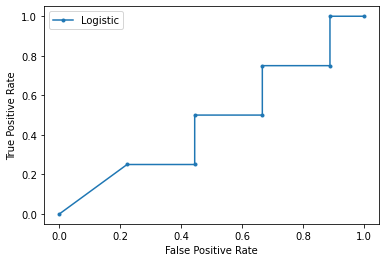

Train on 48 samples, validate on 13 samples
Epoch 1/5000
48/48 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5833 - val_loss: 0.6741 - val_accuracy: 0.6923
Epoch 2/5000
48/48 [==============================] - 0s 229us/step - loss: 0.6642 - accuracy: 0.6875 - val_loss: 0.6558 - val_accuracy: 0.6923
Epoch 3/5000
48/48 [==============================] - 0s 250us/step - loss: 0.6531 - accuracy: 0.6458 - val_loss: 0.6428 - val_accuracy: 0.6923
Epoch 4/5000
48/48 [==============================] - 0s 227us/step - loss: 0.6429 - accuracy: 0.6458 - val_loss: 0.6348 - val_accuracy: 0.6923
Epoch 5/5000
48/48 [==============================] - 0s 234us/step - loss: 0.6374 - accuracy: 0.6458 - val_loss: 0.6268 - val_accuracy: 0.6923
Epoch 6/5000
48/48 [==============================] - 0s 211us/step - loss: 0.6303 - accuracy: 0.6458 - val_loss: 0.6228 - val_accuracy: 0.6923
Epoch 7/5000
48/48 [==============================] - 0s 220us/step - loss: 0.6252 - accuracy:

48/48 [==============================] - 0s 197us/step - loss: 0.3591 - accuracy: 0.8333 - val_loss: 0.4523 - val_accuracy: 0.8462
Epoch 58/5000
48/48 [==============================] - 0s 204us/step - loss: 0.3554 - accuracy: 0.8542 - val_loss: 0.4482 - val_accuracy: 0.8462
Epoch 59/5000
48/48 [==============================] - 0s 183us/step - loss: 0.3544 - accuracy: 0.8750 - val_loss: 0.4452 - val_accuracy: 0.9231
Epoch 60/5000
48/48 [==============================] - 0s 208us/step - loss: 0.3485 - accuracy: 0.8750 - val_loss: 0.4499 - val_accuracy: 0.8462
Epoch 61/5000
48/48 [==============================] - 0s 208us/step - loss: 0.3452 - accuracy: 0.8542 - val_loss: 0.4517 - val_accuracy: 0.8462
Epoch 62/5000
48/48 [==============================] - 0s 186us/step - loss: 0.3446 - accuracy: 0.8542 - val_loss: 0.4499 - val_accuracy: 0.8462
Epoch 63/5000
48/48 [==============================] - 0s 207us/step - loss: 0.3415 - accuracy: 0.8542 - val_loss: 0.4509 - val_accuracy: 0.8462

48/48 [==============================] - 0s 188us/step - loss: 0.2035 - accuracy: 0.9375 - val_loss: 0.5152 - val_accuracy: 0.8462
Epoch 114/5000
48/48 [==============================] - 0s 194us/step - loss: 0.2010 - accuracy: 0.9375 - val_loss: 0.5221 - val_accuracy: 0.8462
Epoch 115/5000
48/48 [==============================] - 0s 188us/step - loss: 0.2004 - accuracy: 0.9375 - val_loss: 0.5241 - val_accuracy: 0.8462
Epoch 116/5000
48/48 [==============================] - 0s 187us/step - loss: 0.1956 - accuracy: 0.9583 - val_loss: 0.5306 - val_accuracy: 0.8462
Epoch 117/5000
48/48 [==============================] - 0s 200us/step - loss: 0.1928 - accuracy: 0.9583 - val_loss: 0.5306 - val_accuracy: 0.8462
Epoch 118/5000
48/48 [==============================] - 0s 205us/step - loss: 0.1933 - accuracy: 0.9375 - val_loss: 0.5284 - val_accuracy: 0.8462
Epoch 119/5000
48/48 [==============================] - 0s 271us/step - loss: 0.1947 - accuracy: 0.9375 - val_loss: 0.5421 - val_accuracy: 

48/48 [==============================] - 0s 186us/step - loss: 0.1024 - accuracy: 1.0000 - val_loss: 0.7382 - val_accuracy: 0.8462
Epoch 170/5000
48/48 [==============================] - 0s 186us/step - loss: 0.1028 - accuracy: 1.0000 - val_loss: 0.7410 - val_accuracy: 0.8462
Epoch 171/5000
48/48 [==============================] - 0s 187us/step - loss: 0.1014 - accuracy: 1.0000 - val_loss: 0.7347 - val_accuracy: 0.8462
Epoch 172/5000
48/48 [==============================] - 0s 209us/step - loss: 0.0979 - accuracy: 1.0000 - val_loss: 0.7447 - val_accuracy: 0.8462
Epoch 173/5000
48/48 [==============================] - 0s 199us/step - loss: 0.0989 - accuracy: 1.0000 - val_loss: 0.7519 - val_accuracy: 0.8462
Epoch 174/5000
48/48 [==============================] - 0s 202us/step - loss: 0.0948 - accuracy: 1.0000 - val_loss: 0.7495 - val_accuracy: 0.8462
Epoch 175/5000
48/48 [==============================] - 0s 183us/step - loss: 0.0935 - accuracy: 1.0000 - val_loss: 0.7488 - val_accuracy: 

48/48 [==============================] - 0s 187us/step - loss: 0.0516 - accuracy: 1.0000 - val_loss: 0.9246 - val_accuracy: 0.8462
Epoch 226/5000
48/48 [==============================] - 0s 199us/step - loss: 0.0522 - accuracy: 1.0000 - val_loss: 0.9236 - val_accuracy: 0.8462
Epoch 227/5000
48/48 [==============================] - 0s 200us/step - loss: 0.0508 - accuracy: 1.0000 - val_loss: 0.9375 - val_accuracy: 0.8462
Epoch 228/5000
48/48 [==============================] - 0s 204us/step - loss: 0.0538 - accuracy: 1.0000 - val_loss: 0.9548 - val_accuracy: 0.8462
Epoch 229/5000
48/48 [==============================] - 0s 199us/step - loss: 0.0507 - accuracy: 1.0000 - val_loss: 0.9460 - val_accuracy: 0.8462
Epoch 230/5000
48/48 [==============================] - 0s 183us/step - loss: 0.0499 - accuracy: 1.0000 - val_loss: 0.9412 - val_accuracy: 0.8462
Epoch 231/5000
48/48 [==============================] - 0s 206us/step - loss: 0.0478 - accuracy: 1.0000 - val_loss: 0.9554 - val_accuracy: 

48/48 [==============================] - 0s 293us/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 1.0991 - val_accuracy: 0.8462
Epoch 282/5000
48/48 [==============================] - 0s 246us/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 1.1069 - val_accuracy: 0.8462
Epoch 283/5000
48/48 [==============================] - 0s 166us/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 1.0986 - val_accuracy: 0.8462
Epoch 284/5000
48/48 [==============================] - 0s 205us/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 1.1012 - val_accuracy: 0.8462
Epoch 285/5000
48/48 [==============================] - 0s 213us/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 1.1025 - val_accuracy: 0.8462
Epoch 286/5000
48/48 [==============================] - 0s 281us/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 1.1097 - val_accuracy: 0.8462
Epoch 287/5000
48/48 [==============================] - 0s 214us/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 1.1212 - val_accuracy: 

48/48 [==============================] - 0s 209us/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 1.2379 - val_accuracy: 0.8462
Epoch 338/5000
48/48 [==============================] - 0s 189us/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 1.2362 - val_accuracy: 0.8462
Epoch 339/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 1.2408 - val_accuracy: 0.8462
Epoch 340/5000
48/48 [==============================] - 0s 188us/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 1.2410 - val_accuracy: 0.8462
Epoch 341/5000
48/48 [==============================] - 0s 185us/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 1.2470 - val_accuracy: 0.8462
Epoch 342/5000
48/48 [==============================] - 0s 196us/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.2448 - val_accuracy: 0.8462
Epoch 343/5000
48/48 [==============================] - 0s 207us/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 1.2480 - val_accuracy: 

48/48 [==============================] - 0s 189us/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 1.3476 - val_accuracy: 0.8462
Epoch 394/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.3425 - val_accuracy: 0.8462
Epoch 395/5000
48/48 [==============================] - 0s 250us/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 1.3451 - val_accuracy: 0.8462
Epoch 396/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.3508 - val_accuracy: 0.8462
Epoch 397/5000
48/48 [==============================] - 0s 189us/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.3617 - val_accuracy: 0.8462
Epoch 398/5000
48/48 [==============================] - 0s 198us/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.3586 - val_accuracy: 0.8462
Epoch 399/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.3610 - val_accuracy: 

48/48 [==============================] - 0s 196us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.4440 - val_accuracy: 0.8462
Epoch 450/5000
48/48 [==============================] - 0s 186us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.4480 - val_accuracy: 0.8462
Epoch 451/5000
48/48 [==============================] - 0s 188us/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.4471 - val_accuracy: 0.8462
Epoch 452/5000
48/48 [==============================] - 0s 189us/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.4425 - val_accuracy: 0.8462
Epoch 453/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.4458 - val_accuracy: 0.8462
Epoch 454/5000
48/48 [==============================] - 0s 193us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 1.4541 - val_accuracy: 0.8462
Epoch 455/5000
48/48 [==============================] - 0s 186us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 1.4574 - val_accuracy: 

48/48 [==============================] - 0s 203us/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.5263 - val_accuracy: 0.8462
Epoch 506/5000
48/48 [==============================] - 0s 192us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.5289 - val_accuracy: 0.8462
Epoch 507/5000
48/48 [==============================] - 0s 188us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.5323 - val_accuracy: 0.8462
Epoch 508/5000
48/48 [==============================] - 0s 277us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.5342 - val_accuracy: 0.8462
Epoch 509/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.5329 - val_accuracy: 0.8462
Epoch 510/5000
48/48 [==============================] - 0s 219us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.5330 - val_accuracy: 0.8462
Epoch 511/5000
48/48 [==============================] - 0s 208us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.5323 - val_accuracy: 

48/48 [==============================] - 0s 189us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.5969 - val_accuracy: 0.8462
Epoch 562/5000
48/48 [==============================] - 0s 207us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.6023 - val_accuracy: 0.8462
Epoch 563/5000
48/48 [==============================] - 0s 171us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.6051 - val_accuracy: 0.8462
Epoch 564/5000
48/48 [==============================] - 0s 160us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.6042 - val_accuracy: 0.8462
Epoch 565/5000
48/48 [==============================] - 0s 207us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.6065 - val_accuracy: 0.8462
Epoch 566/5000
48/48 [==============================] - 0s 186us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.6075 - val_accuracy: 0.8462
Epoch 567/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.6107 - val_accuracy: 

48/48 [==============================] - 0s 208us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.6657 - val_accuracy: 0.8462
Epoch 618/5000
48/48 [==============================] - 0s 209us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.6649 - val_accuracy: 0.8462
Epoch 619/5000
48/48 [==============================] - 0s 186us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.6661 - val_accuracy: 0.8462
Epoch 620/5000
48/48 [==============================] - 0s 188us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.6687 - val_accuracy: 0.8462
Epoch 621/5000
48/48 [==============================] - 0s 207us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.6689 - val_accuracy: 0.8462
Epoch 622/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.6713 - val_accuracy: 0.8462
Epoch 623/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.6688 - val_accuracy: 

48/48 [==============================] - 0s 194us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.7243 - val_accuracy: 0.8462
Epoch 674/5000
48/48 [==============================] - 0s 197us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.7235 - val_accuracy: 0.8462
Epoch 675/5000
48/48 [==============================] - 0s 190us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.7262 - val_accuracy: 0.8462
Epoch 676/5000
48/48 [==============================] - 0s 186us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.7299 - val_accuracy: 0.8462
Epoch 677/5000
48/48 [==============================] - 0s 190us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.7303 - val_accuracy: 0.8462
Epoch 678/5000
48/48 [==============================] - 0s 216us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.7323 - val_accuracy: 0.8462
Epoch 679/5000
48/48 [==============================] - 0s 180us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.7306 - val_accuracy: 

48/48 [==============================] - 0s 183us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.7784 - val_accuracy: 0.8462
Epoch 730/5000
48/48 [==============================] - 0s 210us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.7783 - val_accuracy: 0.8462
Epoch 731/5000
48/48 [==============================] - 0s 213us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.7805 - val_accuracy: 0.8462
Epoch 732/5000
48/48 [==============================] - 0s 182us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.7831 - val_accuracy: 0.8462
Epoch 733/5000
48/48 [==============================] - 0s 207us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.7852 - val_accuracy: 0.8462
Epoch 734/5000
48/48 [==============================] - 0s 191us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.7842 - val_accuracy: 0.8462
Epoch 735/5000
48/48 [==============================] - 0s 187us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.7883 - val_accuracy: 

Epoch 785/5000
48/48 [==============================] - 0s 207us/step - loss: 9.2443e-04 - accuracy: 1.0000 - val_loss: 1.8294 - val_accuracy: 0.8462
Epoch 786/5000
48/48 [==============================] - 0s 180us/step - loss: 9.1759e-04 - accuracy: 1.0000 - val_loss: 1.8312 - val_accuracy: 0.8462
Epoch 787/5000
48/48 [==============================] - 0s 165us/step - loss: 9.2065e-04 - accuracy: 1.0000 - val_loss: 1.8334 - val_accuracy: 0.8462
Epoch 788/5000
48/48 [==============================] - 0s 278us/step - loss: 9.2107e-04 - accuracy: 1.0000 - val_loss: 1.8350 - val_accuracy: 0.8462
Epoch 789/5000
48/48 [==============================] - 0s 248us/step - loss: 9.2707e-04 - accuracy: 1.0000 - val_loss: 1.8320 - val_accuracy: 0.8462
Epoch 790/5000
48/48 [==============================] - 0s 205us/step - loss: 9.0558e-04 - accuracy: 1.0000 - val_loss: 1.8328 - val_accuracy: 0.8462
Epoch 791/5000
48/48 [==============================] - 0s 190us/step - loss: 9.0489e-04 - accuracy:

48/48 [==============================] - 0s 195us/step - loss: 7.4541e-04 - accuracy: 1.0000 - val_loss: 1.8781 - val_accuracy: 0.8462
Epoch 840/5000
48/48 [==============================] - 0s 196us/step - loss: 7.3116e-04 - accuracy: 1.0000 - val_loss: 1.8773 - val_accuracy: 0.8462
Epoch 841/5000
48/48 [==============================] - 0s 173us/step - loss: 7.2295e-04 - accuracy: 1.0000 - val_loss: 1.8780 - val_accuracy: 0.8462
Epoch 842/5000
48/48 [==============================] - 0s 191us/step - loss: 7.2854e-04 - accuracy: 1.0000 - val_loss: 1.8791 - val_accuracy: 0.8462
Epoch 843/5000
48/48 [==============================] - 0s 207us/step - loss: 7.1682e-04 - accuracy: 1.0000 - val_loss: 1.8806 - val_accuracy: 0.8462
Epoch 844/5000
48/48 [==============================] - 0s 192us/step - loss: 7.5892e-04 - accuracy: 1.0000 - val_loss: 1.8864 - val_accuracy: 0.8462
Epoch 845/5000
48/48 [==============================] - 0s 256us/step - loss: 7.2602e-04 - accuracy: 1.0000 - val_l

Epoch 894/5000
48/48 [==============================] - 0s 187us/step - loss: 5.8090e-04 - accuracy: 1.0000 - val_loss: 1.9225 - val_accuracy: 0.8462
Epoch 895/5000
48/48 [==============================] - 0s 208us/step - loss: 5.7704e-04 - accuracy: 1.0000 - val_loss: 1.9240 - val_accuracy: 0.8462
Epoch 896/5000
48/48 [==============================] - 0s 165us/step - loss: 5.7095e-04 - accuracy: 1.0000 - val_loss: 1.9251 - val_accuracy: 0.8462
Epoch 897/5000
48/48 [==============================] - 0s 167us/step - loss: 5.7129e-04 - accuracy: 1.0000 - val_loss: 1.9262 - val_accuracy: 0.8462
Epoch 898/5000
48/48 [==============================] - 0s 207us/step - loss: 5.6877e-04 - accuracy: 1.0000 - val_loss: 1.9260 - val_accuracy: 0.8462
Epoch 899/5000
48/48 [==============================] - 0s 181us/step - loss: 5.7222e-04 - accuracy: 1.0000 - val_loss: 1.9280 - val_accuracy: 0.8462
Epoch 900/5000
48/48 [==============================] - 0s 204us/step - loss: 5.6838e-04 - accuracy:

48/48 [==============================] - 0s 181us/step - loss: 4.6739e-04 - accuracy: 1.0000 - val_loss: 1.9653 - val_accuracy: 0.8462
Epoch 949/5000
48/48 [==============================] - 0s 190us/step - loss: 4.6752e-04 - accuracy: 1.0000 - val_loss: 1.9652 - val_accuracy: 0.8462
Epoch 950/5000
48/48 [==============================] - 0s 229us/step - loss: 4.6752e-04 - accuracy: 1.0000 - val_loss: 1.9684 - val_accuracy: 0.8462
Epoch 951/5000
48/48 [==============================] - 0s 278us/step - loss: 4.6309e-04 - accuracy: 1.0000 - val_loss: 1.9690 - val_accuracy: 0.8462
Epoch 952/5000
48/48 [==============================] - ETA: 0s - loss: 1.8070e-04 - accuracy: 1.00 - 0s 189us/step - loss: 4.5890e-04 - accuracy: 1.0000 - val_loss: 1.9673 - val_accuracy: 0.8462
Epoch 953/5000
48/48 [==============================] - ETA: 0s - loss: 1.1138e-04 - accuracy: 1.00 - 0s 165us/step - loss: 4.6228e-04 - accuracy: 1.0000 - val_loss: 1.9681 - val_accuracy: 0.8462
Epoch 954/5000
48/48 [=

48/48 [==============================] - 0s 191us/step - loss: 3.8007e-04 - accuracy: 1.0000 - val_loss: 2.0054 - val_accuracy: 0.8462
Epoch 1003/5000
48/48 [==============================] - 0s 224us/step - loss: 3.7689e-04 - accuracy: 1.0000 - val_loss: 2.0065 - val_accuracy: 0.8462
Epoch 1004/5000
48/48 [==============================] - 0s 212us/step - loss: 3.7561e-04 - accuracy: 1.0000 - val_loss: 2.0087 - val_accuracy: 0.8462
Epoch 1005/5000
48/48 [==============================] - 0s 206us/step - loss: 3.7772e-04 - accuracy: 1.0000 - val_loss: 2.0099 - val_accuracy: 0.8462
Epoch 1006/5000
48/48 [==============================] - 0s 207us/step - loss: 3.7819e-04 - accuracy: 1.0000 - val_loss: 2.0082 - val_accuracy: 0.8462
Epoch 1007/5000
48/48 [==============================] - 0s 188us/step - loss: 3.7241e-04 - accuracy: 1.0000 - val_loss: 2.0086 - val_accuracy: 0.8462
Epoch 1008/5000
48/48 [==============================] - 0s 186us/step - loss: 3.7099e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 201us/step - loss: 3.1005e-04 - accuracy: 1.0000 - val_loss: 2.0454 - val_accuracy: 0.8462
Epoch 1057/5000
48/48 [==============================] - 0s 183us/step - loss: 3.0778e-04 - accuracy: 1.0000 - val_loss: 2.0456 - val_accuracy: 0.8462
Epoch 1058/5000
48/48 [==============================] - 0s 195us/step - loss: 3.0944e-04 - accuracy: 1.0000 - val_loss: 2.0456 - val_accuracy: 0.8462
Epoch 1059/5000
48/48 [==============================] - 0s 187us/step - loss: 3.0752e-04 - accuracy: 1.0000 - val_loss: 2.0478 - val_accuracy: 0.8462
Epoch 1060/5000
48/48 [==============================] - 0s 178us/step - loss: 3.0376e-04 - accuracy: 1.0000 - val_loss: 2.0478 - val_accuracy: 0.8462
Epoch 1061/5000
48/48 [==============================] - 0s 189us/step - loss: 3.0329e-04 - accuracy: 1.0000 - val_loss: 2.0486 - val_accuracy: 0.8462
Epoch 1062/5000
48/48 [==============================] - 0s 201us/step - loss: 3.0120e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 204us/step - loss: 2.5517e-04 - accuracy: 1.0000 - val_loss: 2.0858 - val_accuracy: 0.8462
Epoch 1111/5000
48/48 [==============================] - 0s 186us/step - loss: 2.5573e-04 - accuracy: 1.0000 - val_loss: 2.0844 - val_accuracy: 0.8462
Epoch 1112/5000
48/48 [==============================] - 0s 202us/step - loss: 2.5198e-04 - accuracy: 1.0000 - val_loss: 2.0843 - val_accuracy: 0.8462
Epoch 1113/5000
48/48 [==============================] - 0s 212us/step - loss: 2.5070e-04 - accuracy: 1.0000 - val_loss: 2.0846 - val_accuracy: 0.8462
Epoch 1114/5000
48/48 [==============================] - 0s 185us/step - loss: 2.5001e-04 - accuracy: 1.0000 - val_loss: 2.0853 - val_accuracy: 0.8462
Epoch 1115/5000
48/48 [==============================] - 0s 183us/step - loss: 2.4781e-04 - accuracy: 1.0000 - val_loss: 2.0870 - val_accuracy: 0.8462
Epoch 1116/5000
48/48 [==============================] - 0s 188us/step - loss: 2.4764e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 183us/step - loss: 2.0852e-04 - accuracy: 1.0000 - val_loss: 2.1192 - val_accuracy: 0.8462
Epoch 1165/5000
48/48 [==============================] - 0s 197us/step - loss: 2.1049e-04 - accuracy: 1.0000 - val_loss: 2.1193 - val_accuracy: 0.8462
Epoch 1166/5000
48/48 [==============================] - 0s 188us/step - loss: 2.0784e-04 - accuracy: 1.0000 - val_loss: 2.1215 - val_accuracy: 0.8462
Epoch 1167/5000
48/48 [==============================] - 0s 186us/step - loss: 2.0724e-04 - accuracy: 1.0000 - val_loss: 2.1219 - val_accuracy: 0.8462
Epoch 1168/5000
48/48 [==============================] - 0s 187us/step - loss: 2.0637e-04 - accuracy: 1.0000 - val_loss: 2.1224 - val_accuracy: 0.8462
Epoch 1169/5000
48/48 [==============================] - 0s 188us/step - loss: 2.0706e-04 - accuracy: 1.0000 - val_loss: 2.1226 - val_accuracy: 0.8462
Epoch 1170/5000
48/48 [==============================] - 0s 192us/step - loss: 2.0722e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 1.7551e-04 - accuracy: 1.0000 - val_loss: 2.1554 - val_accuracy: 0.8462
Epoch 1219/5000
48/48 [==============================] - 0s 213us/step - loss: 1.7165e-04 - accuracy: 1.0000 - val_loss: 2.1559 - val_accuracy: 0.8462
Epoch 1220/5000
48/48 [==============================] - 0s 189us/step - loss: 1.7329e-04 - accuracy: 1.0000 - val_loss: 2.1582 - val_accuracy: 0.8462
Epoch 1221/5000
48/48 [==============================] - 0s 207us/step - loss: 1.7151e-04 - accuracy: 1.0000 - val_loss: 2.1587 - val_accuracy: 0.8462
Epoch 1222/5000
48/48 [==============================] - 0s 229us/step - loss: 1.7115e-04 - accuracy: 1.0000 - val_loss: 2.1595 - val_accuracy: 0.8462
Epoch 1223/5000
48/48 [==============================] - 0s 188us/step - loss: 1.6893e-04 - accuracy: 1.0000 - val_loss: 2.1586 - val_accuracy: 0.8462
Epoch 1224/5000
48/48 [==============================] - 0s 230us/step - loss: 1.6863e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 194us/step - loss: 1.4339e-04 - accuracy: 1.0000 - val_loss: 2.1899 - val_accuracy: 0.8462
Epoch 1273/5000
48/48 [==============================] - 0s 204us/step - loss: 1.4371e-04 - accuracy: 1.0000 - val_loss: 2.1904 - val_accuracy: 0.8462
Epoch 1274/5000
48/48 [==============================] - 0s 202us/step - loss: 1.4273e-04 - accuracy: 1.0000 - val_loss: 2.1928 - val_accuracy: 0.8462
Epoch 1275/5000
48/48 [==============================] - 0s 208us/step - loss: 1.4386e-04 - accuracy: 1.0000 - val_loss: 2.1939 - val_accuracy: 0.8462
Epoch 1276/5000
48/48 [==============================] - 0s 194us/step - loss: 1.4398e-04 - accuracy: 1.0000 - val_loss: 2.1905 - val_accuracy: 0.8462
Epoch 1277/5000
48/48 [==============================] - 0s 209us/step - loss: 1.4219e-04 - accuracy: 1.0000 - val_loss: 2.1899 - val_accuracy: 0.8462
Epoch 1278/5000
48/48 [==============================] - 0s 205us/step - loss: 1.4123e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 1.2020e-04 - accuracy: 1.0000 - val_loss: 2.2248 - val_accuracy: 0.8462
Epoch 1327/5000
48/48 [==============================] - 0s 192us/step - loss: 1.1985e-04 - accuracy: 1.0000 - val_loss: 2.2256 - val_accuracy: 0.8462
Epoch 1328/5000
48/48 [==============================] - 0s 276us/step - loss: 1.2013e-04 - accuracy: 1.0000 - val_loss: 2.2252 - val_accuracy: 0.8462
Epoch 1329/5000
48/48 [==============================] - 0s 214us/step - loss: 1.1908e-04 - accuracy: 1.0000 - val_loss: 2.2258 - val_accuracy: 0.8462
Epoch 1330/5000
48/48 [==============================] - 0s 204us/step - loss: 1.1926e-04 - accuracy: 1.0000 - val_loss: 2.2247 - val_accuracy: 0.8462
Epoch 1331/5000
48/48 [==============================] - 0s 205us/step - loss: 1.1811e-04 - accuracy: 1.0000 - val_loss: 2.2255 - val_accuracy: 0.8462
Epoch 1332/5000
48/48 [==============================] - 0s 188us/step - loss: 1.1727e-04 - accuracy: 1.0000 -

48/48 [==============================] - 0s 200us/step - loss: 1.0035e-04 - accuracy: 1.0000 - val_loss: 2.2567 - val_accuracy: 0.8462
Epoch 1381/5000
48/48 [==============================] - 0s 187us/step - loss: 9.9839e-05 - accuracy: 1.0000 - val_loss: 2.2582 - val_accuracy: 0.8462
Epoch 1382/5000
48/48 [==============================] - 0s 186us/step - loss: 1.0040e-04 - accuracy: 1.0000 - val_loss: 2.2590 - val_accuracy: 0.8462
Epoch 1383/5000
48/48 [==============================] - 0s 188us/step - loss: 9.9411e-05 - accuracy: 1.0000 - val_loss: 2.2593 - val_accuracy: 0.8462
Epoch 1384/5000
48/48 [==============================] - 0s 188us/step - loss: 1.0004e-04 - accuracy: 1.0000 - val_loss: 2.2611 - val_accuracy: 0.8462
Epoch 1385/5000
48/48 [==============================] - 0s 191us/step - loss: 9.9733e-05 - accuracy: 1.0000 - val_loss: 2.2595 - val_accuracy: 0.8462
Epoch 1386/5000
48/48 [==============================] - 0s 188us/step - loss: 9.8954e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 198us/step - loss: 8.5448e-05 - accuracy: 1.0000 - val_loss: 2.2923 - val_accuracy: 0.8462
Epoch 1435/5000
48/48 [==============================] - 0s 197us/step - loss: 8.4184e-05 - accuracy: 1.0000 - val_loss: 2.2923 - val_accuracy: 0.8462
Epoch 1436/5000
48/48 [==============================] - 0s 191us/step - loss: 8.3542e-05 - accuracy: 1.0000 - val_loss: 2.2915 - val_accuracy: 0.8462
Epoch 1437/5000
48/48 [==============================] - 0s 188us/step - loss: 8.3186e-05 - accuracy: 1.0000 - val_loss: 2.2912 - val_accuracy: 0.8462
Epoch 1438/5000
48/48 [==============================] - 0s 190us/step - loss: 8.2719e-05 - accuracy: 1.0000 - val_loss: 2.2920 - val_accuracy: 0.8462
Epoch 1439/5000
48/48 [==============================] - 0s 260us/step - loss: 8.3268e-05 - accuracy: 1.0000 - val_loss: 2.2927 - val_accuracy: 0.8462
Epoch 1440/5000
48/48 [==============================] - 0s 225us/step - loss: 8.3307e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 7.0591e-05 - accuracy: 1.0000 - val_loss: 2.3232 - val_accuracy: 0.8462
Epoch 1489/5000
48/48 [==============================] - 0s 205us/step - loss: 7.0333e-05 - accuracy: 1.0000 - val_loss: 2.3233 - val_accuracy: 0.8462
Epoch 1490/5000
48/48 [==============================] - 0s 190us/step - loss: 7.0034e-05 - accuracy: 1.0000 - val_loss: 2.3233 - val_accuracy: 0.8462
Epoch 1491/5000
48/48 [==============================] - 0s 195us/step - loss: 6.9564e-05 - accuracy: 1.0000 - val_loss: 2.3245 - val_accuracy: 0.8462
Epoch 1492/5000
48/48 [==============================] - 0s 187us/step - loss: 6.9447e-05 - accuracy: 1.0000 - val_loss: 2.3250 - val_accuracy: 0.8462
Epoch 1493/5000
48/48 [==============================] - 0s 208us/step - loss: 6.9744e-05 - accuracy: 1.0000 - val_loss: 2.3257 - val_accuracy: 0.8462
Epoch 1494/5000
48/48 [==============================] - 0s 194us/step - loss: 6.9189e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 182us/step - loss: 5.9399e-05 - accuracy: 1.0000 - val_loss: 2.3534 - val_accuracy: 0.8462
Epoch 1543/5000
48/48 [==============================] - 0s 211us/step - loss: 5.9320e-05 - accuracy: 1.0000 - val_loss: 2.3546 - val_accuracy: 0.8462
Epoch 1544/5000
48/48 [==============================] - 0s 223us/step - loss: 5.9046e-05 - accuracy: 1.0000 - val_loss: 2.3543 - val_accuracy: 0.8462
Epoch 1545/5000
48/48 [==============================] - 0s 187us/step - loss: 5.8758e-05 - accuracy: 1.0000 - val_loss: 2.3550 - val_accuracy: 0.8462
Epoch 1546/5000
48/48 [==============================] - 0s 208us/step - loss: 5.8555e-05 - accuracy: 1.0000 - val_loss: 2.3565 - val_accuracy: 0.8462
Epoch 1547/5000
48/48 [==============================] - 0s 229us/step - loss: 5.8418e-05 - accuracy: 1.0000 - val_loss: 2.3560 - val_accuracy: 0.8462
Epoch 1548/5000
48/48 [==============================] - 0s 249us/step - loss: 5.7974e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 4.9792e-05 - accuracy: 1.0000 - val_loss: 2.3850 - val_accuracy: 0.8462
Epoch 1597/5000
48/48 [==============================] - 0s 228us/step - loss: 4.9828e-05 - accuracy: 1.0000 - val_loss: 2.3857 - val_accuracy: 0.8462
Epoch 1598/5000
48/48 [==============================] - 0s 229us/step - loss: 4.9602e-05 - accuracy: 1.0000 - val_loss: 2.3863 - val_accuracy: 0.8462
Epoch 1599/5000
48/48 [==============================] - 0s 208us/step - loss: 4.9797e-05 - accuracy: 1.0000 - val_loss: 2.3872 - val_accuracy: 0.8462
Epoch 1600/5000
48/48 [==============================] - 0s 189us/step - loss: 4.9589e-05 - accuracy: 1.0000 - val_loss: 2.3867 - val_accuracy: 0.8462
Epoch 1601/5000
48/48 [==============================] - 0s 188us/step - loss: 4.9239e-05 - accuracy: 1.0000 - val_loss: 2.3874 - val_accuracy: 0.8462
Epoch 1602/5000
48/48 [==============================] - 0s 204us/step - loss: 4.8956e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 180us/step - loss: 4.2112e-05 - accuracy: 1.0000 - val_loss: 2.4162 - val_accuracy: 0.8462
Epoch 1651/5000
48/48 [==============================] - 0s 208us/step - loss: 4.1987e-05 - accuracy: 1.0000 - val_loss: 2.4166 - val_accuracy: 0.8462
Epoch 1652/5000
48/48 [==============================] - 0s 207us/step - loss: 4.1821e-05 - accuracy: 1.0000 - val_loss: 2.4177 - val_accuracy: 0.8462
Epoch 1653/5000
48/48 [==============================] - 0s 193us/step - loss: 4.1961e-05 - accuracy: 1.0000 - val_loss: 2.4180 - val_accuracy: 0.8462
Epoch 1654/5000
48/48 [==============================] - 0s 187us/step - loss: 4.1750e-05 - accuracy: 1.0000 - val_loss: 2.4191 - val_accuracy: 0.8462
Epoch 1655/5000
48/48 [==============================] - 0s 186us/step - loss: 4.1406e-05 - accuracy: 1.0000 - val_loss: 2.4205 - val_accuracy: 0.8462
Epoch 1656/5000
48/48 [==============================] - 0s 183us/step - loss: 4.2069e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 3.5532e-05 - accuracy: 1.0000 - val_loss: 2.4466 - val_accuracy: 0.8462
Epoch 1705/5000
48/48 [==============================] - 0s 165us/step - loss: 3.5441e-05 - accuracy: 1.0000 - val_loss: 2.4469 - val_accuracy: 0.8462
Epoch 1706/5000
48/48 [==============================] - 0s 200us/step - loss: 3.5760e-05 - accuracy: 1.0000 - val_loss: 2.4485 - val_accuracy: 0.8462
Epoch 1707/5000
48/48 [==============================] - 0s 187us/step - loss: 3.5254e-05 - accuracy: 1.0000 - val_loss: 2.4482 - val_accuracy: 0.8462
Epoch 1708/5000
48/48 [==============================] - 0s 203us/step - loss: 3.5119e-05 - accuracy: 1.0000 - val_loss: 2.4481 - val_accuracy: 0.8462
Epoch 1709/5000
48/48 [==============================] - 0s 211us/step - loss: 3.4985e-05 - accuracy: 1.0000 - val_loss: 2.4489 - val_accuracy: 0.8462
Epoch 1710/5000
48/48 [==============================] - 0s 187us/step - loss: 3.4867e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 265us/step - loss: 3.0049e-05 - accuracy: 1.0000 - val_loss: 2.4768 - val_accuracy: 0.8462
Epoch 1759/5000
48/48 [==============================] - 0s 187us/step - loss: 3.0413e-05 - accuracy: 1.0000 - val_loss: 2.4761 - val_accuracy: 0.8462
Epoch 1760/5000
48/48 [==============================] - 0s 185us/step - loss: 2.9895e-05 - accuracy: 1.0000 - val_loss: 2.4773 - val_accuracy: 0.8462
Epoch 1761/5000
48/48 [==============================] - 0s 190us/step - loss: 3.0085e-05 - accuracy: 1.0000 - val_loss: 2.4795 - val_accuracy: 0.8462
Epoch 1762/5000
48/48 [==============================] - 0s 187us/step - loss: 3.0260e-05 - accuracy: 1.0000 - val_loss: 2.4809 - val_accuracy: 0.8462
Epoch 1763/5000
48/48 [==============================] - 0s 208us/step - loss: 3.0212e-05 - accuracy: 1.0000 - val_loss: 2.4796 - val_accuracy: 0.8462
Epoch 1764/5000
48/48 [==============================] - 0s 212us/step - loss: 2.9415e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 2.5484e-05 - accuracy: 1.0000 - val_loss: 2.5072 - val_accuracy: 0.8462
Epoch 1813/5000
48/48 [==============================] - 0s 196us/step - loss: 2.5514e-05 - accuracy: 1.0000 - val_loss: 2.5085 - val_accuracy: 0.8462
Epoch 1814/5000
48/48 [==============================] - 0s 208us/step - loss: 2.5442e-05 - accuracy: 1.0000 - val_loss: 2.5082 - val_accuracy: 0.8462
Epoch 1815/5000
48/48 [==============================] - 0s 166us/step - loss: 2.5279e-05 - accuracy: 1.0000 - val_loss: 2.5094 - val_accuracy: 0.8462
Epoch 1816/5000
48/48 [==============================] - 0s 188us/step - loss: 2.5669e-05 - accuracy: 1.0000 - val_loss: 2.5111 - val_accuracy: 0.8462
Epoch 1817/5000
48/48 [==============================] - 0s 185us/step - loss: 2.5298e-05 - accuracy: 1.0000 - val_loss: 2.5106 - val_accuracy: 0.8462
Epoch 1818/5000
48/48 [==============================] - 0s 164us/step - loss: 2.5303e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 183us/step - loss: 2.1761e-05 - accuracy: 1.0000 - val_loss: 2.5363 - val_accuracy: 0.8462
Epoch 1867/5000
48/48 [==============================] - 0s 208us/step - loss: 2.1595e-05 - accuracy: 1.0000 - val_loss: 2.5367 - val_accuracy: 0.8462
Epoch 1868/5000
48/48 [==============================] - 0s 187us/step - loss: 2.1573e-05 - accuracy: 1.0000 - val_loss: 2.5376 - val_accuracy: 0.8462
Epoch 1869/5000
48/48 [==============================] - 0s 186us/step - loss: 2.1351e-05 - accuracy: 1.0000 - val_loss: 2.5388 - val_accuracy: 0.8462
Epoch 1870/5000
48/48 [==============================] - 0s 205us/step - loss: 2.1460e-05 - accuracy: 1.0000 - val_loss: 2.5400 - val_accuracy: 0.8462
Epoch 1871/5000
48/48 [==============================] - 0s 184us/step - loss: 2.1468e-05 - accuracy: 1.0000 - val_loss: 2.5393 - val_accuracy: 0.8462
Epoch 1872/5000
48/48 [==============================] - 0s 187us/step - loss: 2.1365e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 197us/step - loss: 1.8612e-05 - accuracy: 1.0000 - val_loss: 2.5662 - val_accuracy: 0.8462
Epoch 1921/5000
48/48 [==============================] - 0s 204us/step - loss: 1.8463e-05 - accuracy: 1.0000 - val_loss: 2.5661 - val_accuracy: 0.8462
Epoch 1922/5000
48/48 [==============================] - 0s 189us/step - loss: 1.8362e-05 - accuracy: 1.0000 - val_loss: 2.5668 - val_accuracy: 0.8462
Epoch 1923/5000
48/48 [==============================] - 0s 184us/step - loss: 1.8141e-05 - accuracy: 1.0000 - val_loss: 2.5682 - val_accuracy: 0.8462
Epoch 1924/5000
48/48 [==============================] - 0s 186us/step - loss: 1.8178e-05 - accuracy: 1.0000 - val_loss: 2.5699 - val_accuracy: 0.8462
Epoch 1925/5000
48/48 [==============================] - 0s 189us/step - loss: 1.8115e-05 - accuracy: 1.0000 - val_loss: 2.5701 - val_accuracy: 0.8462
Epoch 1926/5000
48/48 [==============================] - 0s 187us/step - loss: 1.8080e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 166us/step - loss: 1.5659e-05 - accuracy: 1.0000 - val_loss: 2.5969 - val_accuracy: 0.8462
Epoch 1975/5000
48/48 [==============================] - 0s 229us/step - loss: 1.5589e-05 - accuracy: 1.0000 - val_loss: 2.5972 - val_accuracy: 0.8462
Epoch 1976/5000
48/48 [==============================] - 0s 167us/step - loss: 1.5623e-05 - accuracy: 1.0000 - val_loss: 2.5966 - val_accuracy: 0.8462
Epoch 1977/5000
48/48 [==============================] - 0s 231us/step - loss: 1.5668e-05 - accuracy: 1.0000 - val_loss: 2.5982 - val_accuracy: 0.8462
Epoch 1978/5000
48/48 [==============================] - 0s 250us/step - loss: 1.5493e-05 - accuracy: 1.0000 - val_loss: 2.5976 - val_accuracy: 0.8462
Epoch 1979/5000
48/48 [==============================] - 0s 213us/step - loss: 1.5480e-05 - accuracy: 1.0000 - val_loss: 2.5981 - val_accuracy: 0.8462
Epoch 1980/5000
48/48 [==============================] - 0s 186us/step - loss: 1.5336e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 1.3312e-05 - accuracy: 1.0000 - val_loss: 2.6253 - val_accuracy: 0.8462
Epoch 2029/5000
48/48 [==============================] - 0s 167us/step - loss: 1.3275e-05 - accuracy: 1.0000 - val_loss: 2.6261 - val_accuracy: 0.8462
Epoch 2030/5000
48/48 [==============================] - 0s 166us/step - loss: 1.3246e-05 - accuracy: 1.0000 - val_loss: 2.6272 - val_accuracy: 0.8462
Epoch 2031/5000
48/48 [==============================] - 0s 187us/step - loss: 1.3169e-05 - accuracy: 1.0000 - val_loss: 2.6268 - val_accuracy: 0.8462
Epoch 2032/5000
48/48 [==============================] - 0s 187us/step - loss: 1.3119e-05 - accuracy: 1.0000 - val_loss: 2.6270 - val_accuracy: 0.8462
Epoch 2033/5000
48/48 [==============================] - 0s 193us/step - loss: 1.3087e-05 - accuracy: 1.0000 - val_loss: 2.6276 - val_accuracy: 0.8462
Epoch 2034/5000
48/48 [==============================] - 0s 165us/step - loss: 1.3133e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 212us/step - loss: 1.1286e-05 - accuracy: 1.0000 - val_loss: 2.6539 - val_accuracy: 0.8462
Epoch 2083/5000
48/48 [==============================] - 0s 192us/step - loss: 1.1284e-05 - accuracy: 1.0000 - val_loss: 2.6542 - val_accuracy: 0.8462
Epoch 2084/5000
48/48 [==============================] - 0s 179us/step - loss: 1.1231e-05 - accuracy: 1.0000 - val_loss: 2.6549 - val_accuracy: 0.8462
Epoch 2085/5000
48/48 [==============================] - 0s 188us/step - loss: 1.1271e-05 - accuracy: 1.0000 - val_loss: 2.6552 - val_accuracy: 0.8462
Epoch 2086/5000
48/48 [==============================] - 0s 187us/step - loss: 1.1180e-05 - accuracy: 1.0000 - val_loss: 2.6561 - val_accuracy: 0.8462
Epoch 2087/5000
48/48 [==============================] - 0s 169us/step - loss: 1.1158e-05 - accuracy: 1.0000 - val_loss: 2.6573 - val_accuracy: 0.8462
Epoch 2088/5000
48/48 [==============================] - 0s 188us/step - loss: 1.1193e-05 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 9.6399e-06 - accuracy: 1.0000 - val_loss: 2.6836 - val_accuracy: 0.8462
Epoch 2137/5000
48/48 [==============================] - 0s 189us/step - loss: 9.6440e-06 - accuracy: 1.0000 - val_loss: 2.6840 - val_accuracy: 0.8462
Epoch 2138/5000
48/48 [==============================] - 0s 187us/step - loss: 9.6130e-06 - accuracy: 1.0000 - val_loss: 2.6850 - val_accuracy: 0.8462
Epoch 2139/5000
48/48 [==============================] - 0s 184us/step - loss: 9.5709e-06 - accuracy: 1.0000 - val_loss: 2.6852 - val_accuracy: 0.8462
Epoch 2140/5000
48/48 [==============================] - 0s 306us/step - loss: 9.5432e-06 - accuracy: 1.0000 - val_loss: 2.6861 - val_accuracy: 0.8462
Epoch 2141/5000
48/48 [==============================] - 0s 188us/step - loss: 9.4950e-06 - accuracy: 1.0000 - val_loss: 2.6860 - val_accuracy: 0.8462
Epoch 2142/5000
48/48 [==============================] - 0s 205us/step - loss: 9.5087e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 8.2303e-06 - accuracy: 1.0000 - val_loss: 2.7132 - val_accuracy: 0.8462
Epoch 2191/5000
48/48 [==============================] - 0s 182us/step - loss: 8.2405e-06 - accuracy: 1.0000 - val_loss: 2.7141 - val_accuracy: 0.8462
Epoch 2192/5000
48/48 [==============================] - 0s 211us/step - loss: 8.2327e-06 - accuracy: 1.0000 - val_loss: 2.7141 - val_accuracy: 0.8462
Epoch 2193/5000
48/48 [==============================] - 0s 245us/step - loss: 8.2064e-06 - accuracy: 1.0000 - val_loss: 2.7136 - val_accuracy: 0.8462
Epoch 2194/5000
48/48 [==============================] - 0s 208us/step - loss: 8.1611e-06 - accuracy: 1.0000 - val_loss: 2.7151 - val_accuracy: 0.8462
Epoch 2195/5000
48/48 [==============================] - 0s 196us/step - loss: 8.1516e-06 - accuracy: 1.0000 - val_loss: 2.7160 - val_accuracy: 0.8462
Epoch 2196/5000
48/48 [==============================] - 0s 188us/step - loss: 8.1089e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 189us/step - loss: 7.0052e-06 - accuracy: 1.0000 - val_loss: 2.7413 - val_accuracy: 0.8462
Epoch 2245/5000
48/48 [==============================] - 0s 211us/step - loss: 7.0218e-06 - accuracy: 1.0000 - val_loss: 2.7423 - val_accuracy: 0.8462
Epoch 2246/5000
48/48 [==============================] - 0s 167us/step - loss: 6.9772e-06 - accuracy: 1.0000 - val_loss: 2.7435 - val_accuracy: 0.8462
Epoch 2247/5000
48/48 [==============================] - 0s 192us/step - loss: 7.1507e-06 - accuracy: 1.0000 - val_loss: 2.7431 - val_accuracy: 0.8462
Epoch 2248/5000
48/48 [==============================] - 0s 181us/step - loss: 6.9818e-06 - accuracy: 1.0000 - val_loss: 2.7446 - val_accuracy: 0.8462
Epoch 2249/5000
48/48 [==============================] - 0s 186us/step - loss: 6.9168e-06 - accuracy: 1.0000 - val_loss: 2.7450 - val_accuracy: 0.8462
Epoch 2250/5000
48/48 [==============================] - 0s 208us/step - loss: 6.9759e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 211us/step - loss: 5.9788e-06 - accuracy: 1.0000 - val_loss: 2.7708 - val_accuracy: 0.8462
Epoch 2299/5000
48/48 [==============================] - 0s 188us/step - loss: 6.0343e-06 - accuracy: 1.0000 - val_loss: 2.7722 - val_accuracy: 0.8462
Epoch 2300/5000
48/48 [==============================] - 0s 183us/step - loss: 5.9722e-06 - accuracy: 1.0000 - val_loss: 2.7720 - val_accuracy: 0.8462
Epoch 2301/5000
48/48 [==============================] - 0s 202us/step - loss: 5.9509e-06 - accuracy: 1.0000 - val_loss: 2.7717 - val_accuracy: 0.8462
Epoch 2302/5000
48/48 [==============================] - 0s 203us/step - loss: 5.9089e-06 - accuracy: 1.0000 - val_loss: 2.7718 - val_accuracy: 0.8462
Epoch 2303/5000
48/48 [==============================] - 0s 209us/step - loss: 5.9619e-06 - accuracy: 1.0000 - val_loss: 2.7736 - val_accuracy: 0.8462
Epoch 2304/5000
48/48 [==============================] - 0s 185us/step - loss: 5.8849e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 192us/step - loss: 5.1153e-06 - accuracy: 1.0000 - val_loss: 2.7997 - val_accuracy: 0.8462
Epoch 2353/5000
48/48 [==============================] - 0s 186us/step - loss: 5.0955e-06 - accuracy: 1.0000 - val_loss: 2.8000 - val_accuracy: 0.8462
Epoch 2354/5000
48/48 [==============================] - 0s 193us/step - loss: 5.0984e-06 - accuracy: 1.0000 - val_loss: 2.8007 - val_accuracy: 0.8462
Epoch 2355/5000
48/48 [==============================] - 0s 223us/step - loss: 5.0698e-06 - accuracy: 1.0000 - val_loss: 2.8010 - val_accuracy: 0.8462
Epoch 2356/5000
48/48 [==============================] - 0s 374us/step - loss: 5.0446e-06 - accuracy: 1.0000 - val_loss: 2.8018 - val_accuracy: 0.8462
Epoch 2357/5000
48/48 [==============================] - 0s 192us/step - loss: 5.0269e-06 - accuracy: 1.0000 - val_loss: 2.8025 - val_accuracy: 0.8462
Epoch 2358/5000
48/48 [==============================] - 0s 228us/step - loss: 5.0339e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 185us/step - loss: 4.3619e-06 - accuracy: 1.0000 - val_loss: 2.8285 - val_accuracy: 0.8462
Epoch 2407/5000
48/48 [==============================] - 0s 208us/step - loss: 4.3806e-06 - accuracy: 1.0000 - val_loss: 2.8293 - val_accuracy: 0.8462
Epoch 2408/5000
48/48 [==============================] - 0s 188us/step - loss: 4.3622e-06 - accuracy: 1.0000 - val_loss: 2.8300 - val_accuracy: 0.8462
Epoch 2409/5000
48/48 [==============================] - 0s 166us/step - loss: 4.3349e-06 - accuracy: 1.0000 - val_loss: 2.8303 - val_accuracy: 0.8462
Epoch 2410/5000
48/48 [==============================] - 0s 208us/step - loss: 4.3499e-06 - accuracy: 1.0000 - val_loss: 2.8307 - val_accuracy: 0.8462
Epoch 2411/5000
48/48 [==============================] - 0s 187us/step - loss: 4.3059e-06 - accuracy: 1.0000 - val_loss: 2.8315 - val_accuracy: 0.8462
Epoch 2412/5000
48/48 [==============================] - 0s 191us/step - loss: 4.2934e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 3.7442e-06 - accuracy: 1.0000 - val_loss: 2.8579 - val_accuracy: 0.8462
Epoch 2461/5000
48/48 [==============================] - 0s 206us/step - loss: 3.7534e-06 - accuracy: 1.0000 - val_loss: 2.8585 - val_accuracy: 0.8462
Epoch 2462/5000
48/48 [==============================] - 0s 222us/step - loss: 3.7446e-06 - accuracy: 1.0000 - val_loss: 2.8575 - val_accuracy: 0.8462
Epoch 2463/5000
48/48 [==============================] - 0s 191us/step - loss: 3.7236e-06 - accuracy: 1.0000 - val_loss: 2.8575 - val_accuracy: 0.8462
Epoch 2464/5000
48/48 [==============================] - 0s 189us/step - loss: 3.6952e-06 - accuracy: 1.0000 - val_loss: 2.8589 - val_accuracy: 0.8462
Epoch 2465/5000
48/48 [==============================] - 0s 206us/step - loss: 3.6841e-06 - accuracy: 1.0000 - val_loss: 2.8597 - val_accuracy: 0.8462
Epoch 2466/5000
48/48 [==============================] - 0s 188us/step - loss: 3.6713e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 170us/step - loss: 3.2028e-06 - accuracy: 1.0000 - val_loss: 2.8864 - val_accuracy: 0.8462
Epoch 2515/5000
48/48 [==============================] - 0s 206us/step - loss: 3.2059e-06 - accuracy: 1.0000 - val_loss: 2.8870 - val_accuracy: 0.8462
Epoch 2516/5000
48/48 [==============================] - 0s 192us/step - loss: 3.1925e-06 - accuracy: 1.0000 - val_loss: 2.8854 - val_accuracy: 0.8462
Epoch 2517/5000
48/48 [==============================] - 0s 198us/step - loss: 3.1808e-06 - accuracy: 1.0000 - val_loss: 2.8856 - val_accuracy: 0.8462
Epoch 2518/5000
48/48 [==============================] - 0s 186us/step - loss: 3.1784e-06 - accuracy: 1.0000 - val_loss: 2.8863 - val_accuracy: 0.8462
Epoch 2519/5000
48/48 [==============================] - 0s 206us/step - loss: 3.1784e-06 - accuracy: 1.0000 - val_loss: 2.8873 - val_accuracy: 0.8462
Epoch 2520/5000
48/48 [==============================] - 0s 204us/step - loss: 3.1457e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 182us/step - loss: 2.7400e-06 - accuracy: 1.0000 - val_loss: 2.9151 - val_accuracy: 0.8462
Epoch 2569/5000
48/48 [==============================] - 0s 229us/step - loss: 2.7449e-06 - accuracy: 1.0000 - val_loss: 2.9146 - val_accuracy: 0.8462
Epoch 2570/5000
48/48 [==============================] - 0s 220us/step - loss: 2.7238e-06 - accuracy: 1.0000 - val_loss: 2.9148 - val_accuracy: 0.8462
Epoch 2571/5000
48/48 [==============================] - 0s 208us/step - loss: 2.7458e-06 - accuracy: 1.0000 - val_loss: 2.9153 - val_accuracy: 0.8462
Epoch 2572/5000
48/48 [==============================] - 0s 207us/step - loss: 2.7624e-06 - accuracy: 1.0000 - val_loss: 2.9173 - val_accuracy: 0.8462
Epoch 2573/5000
48/48 [==============================] - 0s 187us/step - loss: 2.7127e-06 - accuracy: 1.0000 - val_loss: 2.9178 - val_accuracy: 0.8462
Epoch 2574/5000
48/48 [==============================] - 0s 224us/step - loss: 2.6885e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 210us/step - loss: 2.3539e-06 - accuracy: 1.0000 - val_loss: 2.9428 - val_accuracy: 0.8462
Epoch 2623/5000
48/48 [==============================] - 0s 200us/step - loss: 2.3438e-06 - accuracy: 1.0000 - val_loss: 2.9430 - val_accuracy: 0.8462
Epoch 2624/5000
48/48 [==============================] - 0s 191us/step - loss: 2.3405e-06 - accuracy: 1.0000 - val_loss: 2.9436 - val_accuracy: 0.8462
Epoch 2625/5000
48/48 [==============================] - 0s 205us/step - loss: 2.3565e-06 - accuracy: 1.0000 - val_loss: 2.9453 - val_accuracy: 0.8462
Epoch 2626/5000
48/48 [==============================] - 0s 185us/step - loss: 2.3273e-06 - accuracy: 1.0000 - val_loss: 2.9460 - val_accuracy: 0.8462
Epoch 2627/5000
48/48 [==============================] - 0s 211us/step - loss: 2.3347e-06 - accuracy: 1.0000 - val_loss: 2.9454 - val_accuracy: 0.8462
Epoch 2628/5000
48/48 [==============================] - 0s 186us/step - loss: 2.3112e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 185us/step - loss: 2.0254e-06 - accuracy: 1.0000 - val_loss: 2.9718 - val_accuracy: 0.8462
Epoch 2677/5000
48/48 [==============================] - 0s 167us/step - loss: 2.0117e-06 - accuracy: 1.0000 - val_loss: 2.9728 - val_accuracy: 0.8462
Epoch 2678/5000
48/48 [==============================] - 0s 203us/step - loss: 2.0187e-06 - accuracy: 1.0000 - val_loss: 2.9727 - val_accuracy: 0.8462
Epoch 2679/5000
48/48 [==============================] - 0s 180us/step - loss: 1.9940e-06 - accuracy: 1.0000 - val_loss: 2.9735 - val_accuracy: 0.8462
Epoch 2680/5000
48/48 [==============================] - 0s 263us/step - loss: 1.9891e-06 - accuracy: 1.0000 - val_loss: 2.9742 - val_accuracy: 0.8462
Epoch 2681/5000
48/48 [==============================] - 0s 195us/step - loss: 1.9939e-06 - accuracy: 1.0000 - val_loss: 2.9748 - val_accuracy: 0.8462
Epoch 2682/5000
48/48 [==============================] - 0s 229us/step - loss: 2.0149e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 165us/step - loss: 1.7289e-06 - accuracy: 1.0000 - val_loss: 2.9999 - val_accuracy: 0.8462
Epoch 2731/5000
48/48 [==============================] - 0s 173us/step - loss: 1.7220e-06 - accuracy: 1.0000 - val_loss: 3.0006 - val_accuracy: 0.8462
Epoch 2732/5000
48/48 [==============================] - 0s 189us/step - loss: 1.7299e-06 - accuracy: 1.0000 - val_loss: 3.0007 - val_accuracy: 0.8462
Epoch 2733/5000
48/48 [==============================] - 0s 168us/step - loss: 1.7236e-06 - accuracy: 1.0000 - val_loss: 3.0010 - val_accuracy: 0.8462
Epoch 2734/5000
48/48 [==============================] - 0s 166us/step - loss: 1.7159e-06 - accuracy: 1.0000 - val_loss: 3.0026 - val_accuracy: 0.8462
Epoch 2735/5000
48/48 [==============================] - 0s 188us/step - loss: 1.7054e-06 - accuracy: 1.0000 - val_loss: 3.0030 - val_accuracy: 0.8462
Epoch 2736/5000
48/48 [==============================] - 0s 188us/step - loss: 1.7008e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 1.4833e-06 - accuracy: 1.0000 - val_loss: 3.0288 - val_accuracy: 0.8462
Epoch 2785/5000
48/48 [==============================] - 0s 209us/step - loss: 1.4881e-06 - accuracy: 1.0000 - val_loss: 3.0298 - val_accuracy: 0.8462
Epoch 2786/5000
48/48 [==============================] - 0s 201us/step - loss: 1.4909e-06 - accuracy: 1.0000 - val_loss: 3.0301 - val_accuracy: 0.8462
Epoch 2787/5000
48/48 [==============================] - 0s 192us/step - loss: 1.4792e-06 - accuracy: 1.0000 - val_loss: 3.0308 - val_accuracy: 0.8462
Epoch 2788/5000
48/48 [==============================] - 0s 167us/step - loss: 1.4656e-06 - accuracy: 1.0000 - val_loss: 3.0316 - val_accuracy: 0.8462
Epoch 2789/5000
48/48 [==============================] - 0s 224us/step - loss: 1.4648e-06 - accuracy: 1.0000 - val_loss: 3.0307 - val_accuracy: 0.8462
Epoch 2790/5000
48/48 [==============================] - 0s 210us/step - loss: 1.4879e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 1.2716e-06 - accuracy: 1.0000 - val_loss: 3.0574 - val_accuracy: 0.8462
Epoch 2839/5000
48/48 [==============================] - 0s 207us/step - loss: 1.2795e-06 - accuracy: 1.0000 - val_loss: 3.0586 - val_accuracy: 0.8462
Epoch 2840/5000
48/48 [==============================] - 0s 208us/step - loss: 1.2702e-06 - accuracy: 1.0000 - val_loss: 3.0587 - val_accuracy: 0.8462
Epoch 2841/5000
48/48 [==============================] - 0s 195us/step - loss: 1.2740e-06 - accuracy: 1.0000 - val_loss: 3.0583 - val_accuracy: 0.8462
Epoch 2842/5000
48/48 [==============================] - 0s 185us/step - loss: 1.2657e-06 - accuracy: 1.0000 - val_loss: 3.0592 - val_accuracy: 0.8462
Epoch 2843/5000
48/48 [==============================] - 0s 171us/step - loss: 1.2732e-06 - accuracy: 1.0000 - val_loss: 3.0608 - val_accuracy: 0.8462
Epoch 2844/5000
48/48 [==============================] - 0s 186us/step - loss: 1.2562e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 218us/step - loss: 1.0895e-06 - accuracy: 1.0000 - val_loss: 3.0860 - val_accuracy: 0.8462
Epoch 2893/5000
48/48 [==============================] - 0s 208us/step - loss: 1.0875e-06 - accuracy: 1.0000 - val_loss: 3.0862 - val_accuracy: 0.8462
Epoch 2894/5000
48/48 [==============================] - 0s 191us/step - loss: 1.0942e-06 - accuracy: 1.0000 - val_loss: 3.0863 - val_accuracy: 0.8462
Epoch 2895/5000
48/48 [==============================] - 0s 203us/step - loss: 1.0858e-06 - accuracy: 1.0000 - val_loss: 3.0873 - val_accuracy: 0.8462
Epoch 2896/5000
48/48 [==============================] - 0s 190us/step - loss: 1.0766e-06 - accuracy: 1.0000 - val_loss: 3.0882 - val_accuracy: 0.8462
Epoch 2897/5000
48/48 [==============================] - 0s 208us/step - loss: 1.0789e-06 - accuracy: 1.0000 - val_loss: 3.0887 - val_accuracy: 0.8462
Epoch 2898/5000
48/48 [==============================] - 0s 185us/step - loss: 1.0762e-06 - accuracy: 1.0000 -

48/48 [==============================] - 0s 206us/step - loss: 9.4871e-07 - accuracy: 1.0000 - val_loss: 3.1145 - val_accuracy: 0.8462
Epoch 2947/5000
48/48 [==============================] - 0s 203us/step - loss: 9.3842e-07 - accuracy: 1.0000 - val_loss: 3.1139 - val_accuracy: 0.8462
Epoch 2948/5000
48/48 [==============================] - 0s 170us/step - loss: 9.3342e-07 - accuracy: 1.0000 - val_loss: 3.1150 - val_accuracy: 0.8462
Epoch 2949/5000
48/48 [==============================] - 0s 220us/step - loss: 9.3203e-07 - accuracy: 1.0000 - val_loss: 3.1161 - val_accuracy: 0.8462
Epoch 2950/5000
48/48 [==============================] - 0s 229us/step - loss: 9.2809e-07 - accuracy: 1.0000 - val_loss: 3.1159 - val_accuracy: 0.8462
Epoch 2951/5000
48/48 [==============================] - 0s 187us/step - loss: 9.3227e-07 - accuracy: 1.0000 - val_loss: 3.1160 - val_accuracy: 0.8462
Epoch 2952/5000
48/48 [==============================] - 0s 188us/step - loss: 9.2356e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 8.0747e-07 - accuracy: 1.0000 - val_loss: 3.1418 - val_accuracy: 0.8462
Epoch 3001/5000
48/48 [==============================] - 0s 188us/step - loss: 8.0183e-07 - accuracy: 1.0000 - val_loss: 3.1417 - val_accuracy: 0.8462
Epoch 3002/5000
48/48 [==============================] - 0s 208us/step - loss: 7.9736e-07 - accuracy: 1.0000 - val_loss: 3.1423 - val_accuracy: 0.8462
Epoch 3003/5000
48/48 [==============================] - 0s 214us/step - loss: 8.2019e-07 - accuracy: 1.0000 - val_loss: 3.1440 - val_accuracy: 0.8462
Epoch 3004/5000
48/48 [==============================] - 0s 202us/step - loss: 7.9614e-07 - accuracy: 1.0000 - val_loss: 3.1444 - val_accuracy: 0.8462
Epoch 3005/5000
48/48 [==============================] - 0s 278us/step - loss: 7.8977e-07 - accuracy: 1.0000 - val_loss: 3.1445 - val_accuracy: 0.8462
Epoch 3006/5000
48/48 [==============================] - 0s 189us/step - loss: 8.0263e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 6.9755e-07 - accuracy: 1.0000 - val_loss: 3.1704 - val_accuracy: 0.8462
Epoch 3055/5000
48/48 [==============================] - 0s 208us/step - loss: 6.8826e-07 - accuracy: 1.0000 - val_loss: 3.1713 - val_accuracy: 0.8462
Epoch 3056/5000
48/48 [==============================] - 0s 171us/step - loss: 6.9996e-07 - accuracy: 1.0000 - val_loss: 3.1726 - val_accuracy: 0.8462
Epoch 3057/5000
48/48 [==============================] - 0s 272us/step - loss: 6.8960e-07 - accuracy: 1.0000 - val_loss: 3.1729 - val_accuracy: 0.8462
Epoch 3058/5000
48/48 [==============================] - 0s 194us/step - loss: 6.8261e-07 - accuracy: 1.0000 - val_loss: 3.1726 - val_accuracy: 0.8462
Epoch 3059/5000
48/48 [==============================] - 0s 167us/step - loss: 6.8536e-07 - accuracy: 1.0000 - val_loss: 3.1733 - val_accuracy: 0.8462
Epoch 3060/5000
48/48 [==============================] - 0s 203us/step - loss: 6.8144e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 210us/step - loss: 5.9689e-07 - accuracy: 1.0000 - val_loss: 3.1982 - val_accuracy: 0.8462
Epoch 3109/5000
48/48 [==============================] - 0s 169us/step - loss: 5.9647e-07 - accuracy: 1.0000 - val_loss: 3.1987 - val_accuracy: 0.8462
Epoch 3110/5000
48/48 [==============================] - 0s 229us/step - loss: 5.9199e-07 - accuracy: 1.0000 - val_loss: 3.1997 - val_accuracy: 0.8462
Epoch 3111/5000
48/48 [==============================] - 0s 211us/step - loss: 5.8985e-07 - accuracy: 1.0000 - val_loss: 3.2004 - val_accuracy: 0.8462
Epoch 3112/5000
48/48 [==============================] - 0s 171us/step - loss: 5.8763e-07 - accuracy: 1.0000 - val_loss: 3.2010 - val_accuracy: 0.8462
Epoch 3113/5000
48/48 [==============================] - 0s 228us/step - loss: 5.8958e-07 - accuracy: 1.0000 - val_loss: 3.2013 - val_accuracy: 0.8462
Epoch 3114/5000
48/48 [==============================] - 0s 216us/step - loss: 5.8502e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 5.2085e-07 - accuracy: 1.0000 - val_loss: 3.2282 - val_accuracy: 0.8462
Epoch 3163/5000
48/48 [==============================] - 0s 208us/step - loss: 5.1169e-07 - accuracy: 1.0000 - val_loss: 3.2277 - val_accuracy: 0.8462
Epoch 3164/5000
48/48 [==============================] - 0s 186us/step - loss: 5.1147e-07 - accuracy: 1.0000 - val_loss: 3.2274 - val_accuracy: 0.8462
Epoch 3165/5000
48/48 [==============================] - 0s 210us/step - loss: 5.0758e-07 - accuracy: 1.0000 - val_loss: 3.2278 - val_accuracy: 0.8462
Epoch 3166/5000
48/48 [==============================] - 0s 267us/step - loss: 5.0866e-07 - accuracy: 1.0000 - val_loss: 3.2285 - val_accuracy: 0.8462
Epoch 3167/5000
48/48 [==============================] - 0s 187us/step - loss: 5.0408e-07 - accuracy: 1.0000 - val_loss: 3.2288 - val_accuracy: 0.8462
Epoch 3168/5000
48/48 [==============================] - 0s 289us/step - loss: 5.0536e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 4.4203e-07 - accuracy: 1.0000 - val_loss: 3.2540 - val_accuracy: 0.8462
Epoch 3217/5000
48/48 [==============================] - 0s 193us/step - loss: 4.3826e-07 - accuracy: 1.0000 - val_loss: 3.2553 - val_accuracy: 0.8462
Epoch 3218/5000
48/48 [==============================] - 0s 187us/step - loss: 4.3684e-07 - accuracy: 1.0000 - val_loss: 3.2554 - val_accuracy: 0.8462
Epoch 3219/5000
48/48 [==============================] - 0s 187us/step - loss: 4.3567e-07 - accuracy: 1.0000 - val_loss: 3.2556 - val_accuracy: 0.8462
Epoch 3220/5000
48/48 [==============================] - 0s 197us/step - loss: 4.3733e-07 - accuracy: 1.0000 - val_loss: 3.2559 - val_accuracy: 0.8462
Epoch 3221/5000
48/48 [==============================] - 0s 208us/step - loss: 4.3462e-07 - accuracy: 1.0000 - val_loss: 3.2569 - val_accuracy: 0.8462
Epoch 3222/5000
48/48 [==============================] - 0s 207us/step - loss: 4.3169e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 201us/step - loss: 3.8326e-07 - accuracy: 1.0000 - val_loss: 3.2830 - val_accuracy: 0.8462
Epoch 3271/5000
48/48 [==============================] - 0s 180us/step - loss: 3.7784e-07 - accuracy: 1.0000 - val_loss: 3.2831 - val_accuracy: 0.8462
Epoch 3272/5000
48/48 [==============================] - 0s 187us/step - loss: 3.7906e-07 - accuracy: 1.0000 - val_loss: 3.2838 - val_accuracy: 0.8462
Epoch 3273/5000
48/48 [==============================] - 0s 209us/step - loss: 3.7639e-07 - accuracy: 1.0000 - val_loss: 3.2842 - val_accuracy: 0.8462
Epoch 3274/5000
48/48 [==============================] - 0s 202us/step - loss: 3.7603e-07 - accuracy: 1.0000 - val_loss: 3.2841 - val_accuracy: 0.8462
Epoch 3275/5000
48/48 [==============================] - 0s 203us/step - loss: 3.7472e-07 - accuracy: 1.0000 - val_loss: 3.2844 - val_accuracy: 0.8462
Epoch 3276/5000
48/48 [==============================] - 0s 185us/step - loss: 3.7366e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 207us/step - loss: 3.2767e-07 - accuracy: 1.0000 - val_loss: 3.3115 - val_accuracy: 0.8462
Epoch 3325/5000
48/48 [==============================] - 0s 187us/step - loss: 3.2646e-07 - accuracy: 1.0000 - val_loss: 3.3123 - val_accuracy: 0.8462
Epoch 3326/5000
48/48 [==============================] - 0s 192us/step - loss: 3.2793e-07 - accuracy: 1.0000 - val_loss: 3.3122 - val_accuracy: 0.8462
Epoch 3327/5000
48/48 [==============================] - 0s 167us/step - loss: 3.2419e-07 - accuracy: 1.0000 - val_loss: 3.3127 - val_accuracy: 0.8462
Epoch 3328/5000
48/48 [==============================] - 0s 166us/step - loss: 3.2530e-07 - accuracy: 1.0000 - val_loss: 3.3133 - val_accuracy: 0.8462
Epoch 3329/5000
48/48 [==============================] - 0s 187us/step - loss: 3.2849e-07 - accuracy: 1.0000 - val_loss: 3.3135 - val_accuracy: 0.8462
Epoch 3330/5000
48/48 [==============================] - 0s 193us/step - loss: 3.2231e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 252us/step - loss: 2.8477e-07 - accuracy: 1.0000 - val_loss: 3.3401 - val_accuracy: 0.8462
Epoch 3379/5000
48/48 [==============================] - 0s 187us/step - loss: 2.8454e-07 - accuracy: 1.0000 - val_loss: 3.3390 - val_accuracy: 0.8462
Epoch 3380/5000
48/48 [==============================] - 0s 251us/step - loss: 2.8169e-07 - accuracy: 1.0000 - val_loss: 3.3401 - val_accuracy: 0.8462
Epoch 3381/5000
48/48 [==============================] - 0s 228us/step - loss: 2.7861e-07 - accuracy: 1.0000 - val_loss: 3.3411 - val_accuracy: 0.8462
Epoch 3382/5000
48/48 [==============================] - 0s 186us/step - loss: 2.7819e-07 - accuracy: 1.0000 - val_loss: 3.3416 - val_accuracy: 0.8462
Epoch 3383/5000
48/48 [==============================] - 0s 188us/step - loss: 2.8149e-07 - accuracy: 1.0000 - val_loss: 3.3424 - val_accuracy: 0.8462
Epoch 3384/5000
48/48 [==============================] - 0s 198us/step - loss: 2.7787e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 2.4594e-07 - accuracy: 1.0000 - val_loss: 3.3679 - val_accuracy: 0.8462
Epoch 3433/5000
48/48 [==============================] - 0s 199us/step - loss: 2.4332e-07 - accuracy: 1.0000 - val_loss: 3.3685 - val_accuracy: 0.8462
Epoch 3434/5000
48/48 [==============================] - 0s 188us/step - loss: 2.4089e-07 - accuracy: 1.0000 - val_loss: 3.3691 - val_accuracy: 0.8462
Epoch 3435/5000
48/48 [==============================] - 0s 192us/step - loss: 2.4057e-07 - accuracy: 1.0000 - val_loss: 3.3695 - val_accuracy: 0.8462
Epoch 3436/5000
48/48 [==============================] - 0s 191us/step - loss: 2.4078e-07 - accuracy: 1.0000 - val_loss: 3.3700 - val_accuracy: 0.8462
Epoch 3437/5000
48/48 [==============================] - 0s 188us/step - loss: 2.3998e-07 - accuracy: 1.0000 - val_loss: 3.3701 - val_accuracy: 0.8462
Epoch 3438/5000
48/48 [==============================] - 0s 202us/step - loss: 2.3808e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 165us/step - loss: 2.0858e-07 - accuracy: 1.0000 - val_loss: 3.3959 - val_accuracy: 0.8462
Epoch 3487/5000
48/48 [==============================] - 0s 206us/step - loss: 2.0849e-07 - accuracy: 1.0000 - val_loss: 3.3964 - val_accuracy: 0.8462
Epoch 3488/5000
48/48 [==============================] - 0s 249us/step - loss: 2.0722e-07 - accuracy: 1.0000 - val_loss: 3.3968 - val_accuracy: 0.8462
Epoch 3489/5000
48/48 [==============================] - 0s 207us/step - loss: 2.0718e-07 - accuracy: 1.0000 - val_loss: 3.3976 - val_accuracy: 0.8462
Epoch 3490/5000
48/48 [==============================] - 0s 187us/step - loss: 2.0664e-07 - accuracy: 1.0000 - val_loss: 3.3979 - val_accuracy: 0.8462
Epoch 3491/5000
48/48 [==============================] - 0s 187us/step - loss: 2.0641e-07 - accuracy: 1.0000 - val_loss: 3.3983 - val_accuracy: 0.8462
Epoch 3492/5000
48/48 [==============================] - 0s 187us/step - loss: 2.0546e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 184us/step - loss: 1.8110e-07 - accuracy: 1.0000 - val_loss: 3.4243 - val_accuracy: 0.8462
Epoch 3541/5000
48/48 [==============================] - 0s 185us/step - loss: 1.7987e-07 - accuracy: 1.0000 - val_loss: 3.4238 - val_accuracy: 0.8462
Epoch 3542/5000
48/48 [==============================] - 0s 194us/step - loss: 1.8141e-07 - accuracy: 1.0000 - val_loss: 3.4240 - val_accuracy: 0.8462
Epoch 3543/5000
48/48 [==============================] - 0s 181us/step - loss: 1.7956e-07 - accuracy: 1.0000 - val_loss: 3.4250 - val_accuracy: 0.8462
Epoch 3544/5000
48/48 [==============================] - 0s 207us/step - loss: 1.7844e-07 - accuracy: 1.0000 - val_loss: 3.4267 - val_accuracy: 0.8462
Epoch 3545/5000
48/48 [==============================] - 0s 182us/step - loss: 1.8157e-07 - accuracy: 1.0000 - val_loss: 3.4282 - val_accuracy: 0.8462
Epoch 3546/5000
48/48 [==============================] - 0s 165us/step - loss: 1.7801e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 192us/step - loss: 1.5628e-07 - accuracy: 1.0000 - val_loss: 3.4519 - val_accuracy: 0.8462
Epoch 3595/5000
48/48 [==============================] - 0s 216us/step - loss: 1.5568e-07 - accuracy: 1.0000 - val_loss: 3.4526 - val_accuracy: 0.8462
Epoch 3596/5000
48/48 [==============================] - 0s 207us/step - loss: 1.5482e-07 - accuracy: 1.0000 - val_loss: 3.4533 - val_accuracy: 0.8462
Epoch 3597/5000
48/48 [==============================] - 0s 186us/step - loss: 1.5663e-07 - accuracy: 1.0000 - val_loss: 3.4531 - val_accuracy: 0.8462
Epoch 3598/5000
48/48 [==============================] - 0s 199us/step - loss: 1.5451e-07 - accuracy: 1.0000 - val_loss: 3.4540 - val_accuracy: 0.8462
Epoch 3599/5000
48/48 [==============================] - 0s 187us/step - loss: 1.5456e-07 - accuracy: 1.0000 - val_loss: 3.4549 - val_accuracy: 0.8462
Epoch 3600/5000
48/48 [==============================] - 0s 187us/step - loss: 1.5522e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 206us/step - loss: 1.3404e-07 - accuracy: 1.0000 - val_loss: 3.4808 - val_accuracy: 0.8462
Epoch 3649/5000
48/48 [==============================] - 0s 187us/step - loss: 1.3335e-07 - accuracy: 1.0000 - val_loss: 3.4808 - val_accuracy: 0.8462
Epoch 3650/5000
48/48 [==============================] - 0s 188us/step - loss: 1.3401e-07 - accuracy: 1.0000 - val_loss: 3.4812 - val_accuracy: 0.8462
Epoch 3651/5000
48/48 [==============================] - 0s 199us/step - loss: 1.3363e-07 - accuracy: 1.0000 - val_loss: 3.4825 - val_accuracy: 0.8462
Epoch 3652/5000
48/48 [==============================] - 0s 191us/step - loss: 1.3335e-07 - accuracy: 1.0000 - val_loss: 3.4827 - val_accuracy: 0.8462
Epoch 3653/5000
48/48 [==============================] - 0s 187us/step - loss: 1.3321e-07 - accuracy: 1.0000 - val_loss: 3.4826 - val_accuracy: 0.8462
Epoch 3654/5000
48/48 [==============================] - 0s 199us/step - loss: 1.3201e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 217us/step - loss: 1.1632e-07 - accuracy: 1.0000 - val_loss: 3.5073 - val_accuracy: 0.8462
Epoch 3703/5000
48/48 [==============================] - 0s 188us/step - loss: 1.1596e-07 - accuracy: 1.0000 - val_loss: 3.5079 - val_accuracy: 0.8462
Epoch 3704/5000
48/48 [==============================] - 0s 191us/step - loss: 1.1514e-07 - accuracy: 1.0000 - val_loss: 3.5089 - val_accuracy: 0.8462
Epoch 3705/5000
48/48 [==============================] - 0s 207us/step - loss: 1.1545e-07 - accuracy: 1.0000 - val_loss: 3.5091 - val_accuracy: 0.8462
Epoch 3706/5000
48/48 [==============================] - 0s 211us/step - loss: 1.1600e-07 - accuracy: 1.0000 - val_loss: 3.5089 - val_accuracy: 0.8462
Epoch 3707/5000
48/48 [==============================] - 0s 183us/step - loss: 1.1685e-07 - accuracy: 1.0000 - val_loss: 3.5086 - val_accuracy: 0.8462
Epoch 3708/5000
48/48 [==============================] - 0s 194us/step - loss: 1.1448e-07 - accuracy: 1.0000 -

48/48 [==============================] - 0s 188us/step - loss: 1.0098e-07 - accuracy: 1.0000 - val_loss: 3.5347 - val_accuracy: 0.8462
Epoch 3757/5000
48/48 [==============================] - 0s 187us/step - loss: 1.0079e-07 - accuracy: 1.0000 - val_loss: 3.5345 - val_accuracy: 0.8462
Epoch 3758/5000
48/48 [==============================] - 0s 208us/step - loss: 9.9975e-08 - accuracy: 1.0000 - val_loss: 3.5344 - val_accuracy: 0.8462
Epoch 3759/5000
48/48 [==============================] - 0s 172us/step - loss: 1.0065e-07 - accuracy: 1.0000 - val_loss: 3.5349 - val_accuracy: 0.8462
Epoch 3760/5000
48/48 [==============================] - 0s 199us/step - loss: 9.9815e-08 - accuracy: 1.0000 - val_loss: 3.5358 - val_accuracy: 0.8462
Epoch 3761/5000
48/48 [==============================] - 0s 211us/step - loss: 1.0069e-07 - accuracy: 1.0000 - val_loss: 3.5371 - val_accuracy: 0.8462
Epoch 3762/5000
48/48 [==============================] - 0s 183us/step - loss: 9.9435e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 192us/step - loss: 8.7464e-08 - accuracy: 1.0000 - val_loss: 3.5615 - val_accuracy: 0.8462
Epoch 3811/5000
48/48 [==============================] - 0s 182us/step - loss: 8.9289e-08 - accuracy: 1.0000 - val_loss: 3.5620 - val_accuracy: 0.8462
Epoch 3812/5000
48/48 [==============================] - 0s 234us/step - loss: 8.7808e-08 - accuracy: 1.0000 - val_loss: 3.5636 - val_accuracy: 0.8462
Epoch 3813/5000
48/48 [==============================] - 0s 204us/step - loss: 8.6616e-08 - accuracy: 1.0000 - val_loss: 3.5647 - val_accuracy: 0.8462
Epoch 3814/5000
48/48 [==============================] - 0s 208us/step - loss: 8.6974e-08 - accuracy: 1.0000 - val_loss: 3.5651 - val_accuracy: 0.8462
Epoch 3815/5000
48/48 [==============================] - 0s 188us/step - loss: 8.6487e-08 - accuracy: 1.0000 - val_loss: 3.5649 - val_accuracy: 0.8462
Epoch 3816/5000
48/48 [==============================] - 0s 208us/step - loss: 8.5710e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 7.5466e-08 - accuracy: 1.0000 - val_loss: 3.5933 - val_accuracy: 0.8462
Epoch 3865/5000
48/48 [==============================] - 0s 186us/step - loss: 7.5279e-08 - accuracy: 1.0000 - val_loss: 3.5940 - val_accuracy: 0.8462
Epoch 3866/5000
48/48 [==============================] - 0s 188us/step - loss: 7.4913e-08 - accuracy: 1.0000 - val_loss: 3.5944 - val_accuracy: 0.8462
Epoch 3867/5000
48/48 [==============================] - 0s 201us/step - loss: 7.4765e-08 - accuracy: 1.0000 - val_loss: 3.5947 - val_accuracy: 0.8462
Epoch 3868/5000
48/48 [==============================] - 0s 182us/step - loss: 7.4780e-08 - accuracy: 1.0000 - val_loss: 3.5955 - val_accuracy: 0.8462
Epoch 3869/5000
48/48 [==============================] - 0s 191us/step - loss: 7.4756e-08 - accuracy: 1.0000 - val_loss: 3.5965 - val_accuracy: 0.8462
Epoch 3870/5000
48/48 [==============================] - 0s 328us/step - loss: 7.4800e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 217us/step - loss: 6.5567e-08 - accuracy: 1.0000 - val_loss: 3.6172 - val_accuracy: 0.8462
Epoch 3919/5000
48/48 [==============================] - 0s 188us/step - loss: 6.5310e-08 - accuracy: 1.0000 - val_loss: 3.6177 - val_accuracy: 0.8462
Epoch 3920/5000
48/48 [==============================] - 0s 191us/step - loss: 6.5089e-08 - accuracy: 1.0000 - val_loss: 3.6175 - val_accuracy: 0.8462
Epoch 3921/5000
48/48 [==============================] - 0s 187us/step - loss: 6.5250e-08 - accuracy: 1.0000 - val_loss: 3.6184 - val_accuracy: 0.8462
Epoch 3922/5000
48/48 [==============================] - 0s 188us/step - loss: 6.4952e-08 - accuracy: 1.0000 - val_loss: 3.6188 - val_accuracy: 0.8462
Epoch 3923/5000
48/48 [==============================] - 0s 204us/step - loss: 6.4429e-08 - accuracy: 1.0000 - val_loss: 3.6195 - val_accuracy: 0.8462
Epoch 3924/5000
48/48 [==============================] - 0s 228us/step - loss: 6.4163e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 206us/step - loss: 5.6671e-08 - accuracy: 1.0000 - val_loss: 3.6442 - val_accuracy: 0.8462
Epoch 3973/5000
48/48 [==============================] - 0s 192us/step - loss: 5.6810e-08 - accuracy: 1.0000 - val_loss: 3.6444 - val_accuracy: 0.8462
Epoch 3974/5000
48/48 [==============================] - 0s 183us/step - loss: 5.6758e-08 - accuracy: 1.0000 - val_loss: 3.6447 - val_accuracy: 0.8462
Epoch 3975/5000
48/48 [==============================] - 0s 181us/step - loss: 5.7108e-08 - accuracy: 1.0000 - val_loss: 3.6444 - val_accuracy: 0.8462
Epoch 3976/5000
48/48 [==============================] - 0s 211us/step - loss: 5.6556e-08 - accuracy: 1.0000 - val_loss: 3.6454 - val_accuracy: 0.8462
Epoch 3977/5000
48/48 [==============================] - 0s 209us/step - loss: 5.6313e-08 - accuracy: 1.0000 - val_loss: 3.6458 - val_accuracy: 0.8462
Epoch 3978/5000
48/48 [==============================] - 0s 187us/step - loss: 5.6179e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 4.9247e-08 - accuracy: 1.0000 - val_loss: 3.6687 - val_accuracy: 0.8462
Epoch 4027/5000
48/48 [==============================] - 0s 192us/step - loss: 4.9242e-08 - accuracy: 1.0000 - val_loss: 3.6694 - val_accuracy: 0.8462
Epoch 4028/5000
48/48 [==============================] - 0s 231us/step - loss: 4.9690e-08 - accuracy: 1.0000 - val_loss: 3.6694 - val_accuracy: 0.8462
Epoch 4029/5000
48/48 [==============================] - 0s 161us/step - loss: 4.8953e-08 - accuracy: 1.0000 - val_loss: 3.6700 - val_accuracy: 0.8462
Epoch 4030/5000
48/48 [==============================] - 0s 239us/step - loss: 4.8897e-08 - accuracy: 1.0000 - val_loss: 3.6703 - val_accuracy: 0.8462
Epoch 4031/5000
48/48 [==============================] - 0s 183us/step - loss: 4.8846e-08 - accuracy: 1.0000 - val_loss: 3.6706 - val_accuracy: 0.8462
Epoch 4032/5000
48/48 [==============================] - 0s 203us/step - loss: 4.8404e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 211us/step - loss: 4.2985e-08 - accuracy: 1.0000 - val_loss: 3.6971 - val_accuracy: 0.8462
Epoch 4081/5000
48/48 [==============================] - 0s 183us/step - loss: 4.3069e-08 - accuracy: 1.0000 - val_loss: 3.6972 - val_accuracy: 0.8462
Epoch 4082/5000
48/48 [==============================] - 0s 179us/step - loss: 4.2731e-08 - accuracy: 1.0000 - val_loss: 3.6984 - val_accuracy: 0.8462
Epoch 4083/5000
48/48 [==============================] - 0s 192us/step - loss: 4.3322e-08 - accuracy: 1.0000 - val_loss: 3.6991 - val_accuracy: 0.8462
Epoch 4084/5000
48/48 [==============================] - 0s 188us/step - loss: 4.3208e-08 - accuracy: 1.0000 - val_loss: 3.6986 - val_accuracy: 0.8462
Epoch 4085/5000
48/48 [==============================] - 0s 166us/step - loss: 4.2601e-08 - accuracy: 1.0000 - val_loss: 3.6983 - val_accuracy: 0.8462
Epoch 4086/5000
48/48 [==============================] - 0s 209us/step - loss: 4.2376e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 251us/step - loss: 3.8165e-08 - accuracy: 1.0000 - val_loss: 3.7213 - val_accuracy: 0.8462
Epoch 4135/5000
48/48 [==============================] - 0s 270us/step - loss: 3.7847e-08 - accuracy: 1.0000 - val_loss: 3.7223 - val_accuracy: 0.8462
Epoch 4136/5000
48/48 [==============================] - 0s 293us/step - loss: 3.7488e-08 - accuracy: 1.0000 - val_loss: 3.7230 - val_accuracy: 0.8462
Epoch 4137/5000
48/48 [==============================] - 0s 256us/step - loss: 3.7310e-08 - accuracy: 1.0000 - val_loss: 3.7241 - val_accuracy: 0.8462
Epoch 4138/5000
48/48 [==============================] - 0s 249us/step - loss: 3.7184e-08 - accuracy: 1.0000 - val_loss: 3.7248 - val_accuracy: 0.8462
Epoch 4139/5000
48/48 [==============================] - 0s 247us/step - loss: 3.7714e-08 - accuracy: 1.0000 - val_loss: 3.7246 - val_accuracy: 0.8462
Epoch 4140/5000
48/48 [==============================] - 0s 240us/step - loss: 3.7362e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 196us/step - loss: 3.3500e-08 - accuracy: 1.0000 - val_loss: 3.7526 - val_accuracy: 0.8462
Epoch 4189/5000
48/48 [==============================] - 0s 194us/step - loss: 3.3034e-08 - accuracy: 1.0000 - val_loss: 3.7534 - val_accuracy: 0.8462
Epoch 4190/5000
48/48 [==============================] - 0s 207us/step - loss: 3.3104e-08 - accuracy: 1.0000 - val_loss: 3.7540 - val_accuracy: 0.8462
Epoch 4191/5000
48/48 [==============================] - 0s 184us/step - loss: 3.3135e-08 - accuracy: 1.0000 - val_loss: 3.7537 - val_accuracy: 0.8462
Epoch 4192/5000
48/48 [==============================] - 0s 189us/step - loss: 3.3075e-08 - accuracy: 1.0000 - val_loss: 3.7548 - val_accuracy: 0.8462
Epoch 4193/5000
48/48 [==============================] - 0s 203us/step - loss: 3.2851e-08 - accuracy: 1.0000 - val_loss: 3.7558 - val_accuracy: 0.8462
Epoch 4194/5000
48/48 [==============================] - 0s 187us/step - loss: 3.2544e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 184us/step - loss: 2.8970e-08 - accuracy: 1.0000 - val_loss: 3.7886 - val_accuracy: 0.8462
Epoch 4243/5000
48/48 [==============================] - 0s 186us/step - loss: 2.9077e-08 - accuracy: 1.0000 - val_loss: 3.7900 - val_accuracy: 0.8462
Epoch 4244/5000
48/48 [==============================] - 0s 207us/step - loss: 2.8860e-08 - accuracy: 1.0000 - val_loss: 3.7895 - val_accuracy: 0.8462
Epoch 4245/5000
48/48 [==============================] - 0s 229us/step - loss: 2.8918e-08 - accuracy: 1.0000 - val_loss: 3.7896 - val_accuracy: 0.8462
Epoch 4246/5000
48/48 [==============================] - 0s 312us/step - loss: 2.9238e-08 - accuracy: 1.0000 - val_loss: 3.7904 - val_accuracy: 0.8462
Epoch 4247/5000
48/48 [==============================] - 0s 249us/step - loss: 2.8620e-08 - accuracy: 1.0000 - val_loss: 3.7904 - val_accuracy: 0.8462
Epoch 4248/5000
48/48 [==============================] - 0s 229us/step - loss: 2.8725e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 275us/step - loss: 2.5310e-08 - accuracy: 1.0000 - val_loss: 3.8154 - val_accuracy: 0.8462
Epoch 4297/5000
48/48 [==============================] - 0s 334us/step - loss: 2.5682e-08 - accuracy: 1.0000 - val_loss: 3.8152 - val_accuracy: 0.8462
Epoch 4298/5000
48/48 [==============================] - 0s 226us/step - loss: 2.5165e-08 - accuracy: 1.0000 - val_loss: 3.8161 - val_accuracy: 0.8462
Epoch 4299/5000
48/48 [==============================] - 0s 186us/step - loss: 2.5365e-08 - accuracy: 1.0000 - val_loss: 3.8167 - val_accuracy: 0.8462
Epoch 4300/5000
48/48 [==============================] - 0s 272us/step - loss: 2.5047e-08 - accuracy: 1.0000 - val_loss: 3.8168 - val_accuracy: 0.8462
Epoch 4301/5000
48/48 [==============================] - 0s 250us/step - loss: 2.5041e-08 - accuracy: 1.0000 - val_loss: 3.8167 - val_accuracy: 0.8462
Epoch 4302/5000
48/48 [==============================] - 0s 208us/step - loss: 2.4805e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 2.2440e-08 - accuracy: 1.0000 - val_loss: 3.8339 - val_accuracy: 0.8462
Epoch 4351/5000
48/48 [==============================] - 0s 205us/step - loss: 2.2385e-08 - accuracy: 1.0000 - val_loss: 3.8340 - val_accuracy: 0.8462
Epoch 4352/5000
48/48 [==============================] - 0s 208us/step - loss: 2.2452e-08 - accuracy: 1.0000 - val_loss: 3.8344 - val_accuracy: 0.8462
Epoch 4353/5000
48/48 [==============================] - 0s 182us/step - loss: 2.2490e-08 - accuracy: 1.0000 - val_loss: 3.8354 - val_accuracy: 0.8462
Epoch 4354/5000
48/48 [==============================] - 0s 167us/step - loss: 2.2426e-08 - accuracy: 1.0000 - val_loss: 3.8368 - val_accuracy: 0.8462
Epoch 4355/5000
48/48 [==============================] - 0s 206us/step - loss: 2.2210e-08 - accuracy: 1.0000 - val_loss: 3.8372 - val_accuracy: 0.8462
Epoch 4356/5000
48/48 [==============================] - 0s 189us/step - loss: 2.2548e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 216us/step - loss: 2.0458e-08 - accuracy: 1.0000 - val_loss: 3.8568 - val_accuracy: 0.8462
Epoch 4405/5000
48/48 [==============================] - 0s 211us/step - loss: 1.9998e-08 - accuracy: 1.0000 - val_loss: 3.8577 - val_accuracy: 0.8462
Epoch 4406/5000
48/48 [==============================] - 0s 222us/step - loss: 2.0094e-08 - accuracy: 1.0000 - val_loss: 3.8582 - val_accuracy: 0.8462
Epoch 4407/5000
48/48 [==============================] - 0s 191us/step - loss: 2.0267e-08 - accuracy: 1.0000 - val_loss: 3.8574 - val_accuracy: 0.8462
Epoch 4408/5000
48/48 [==============================] - 0s 178us/step - loss: 1.9971e-08 - accuracy: 1.0000 - val_loss: 3.8590 - val_accuracy: 0.8462
Epoch 4409/5000
48/48 [==============================] - 0s 197us/step - loss: 1.9947e-08 - accuracy: 1.0000 - val_loss: 3.8599 - val_accuracy: 0.8462
Epoch 4410/5000
48/48 [==============================] - 0s 187us/step - loss: 1.9782e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 190us/step - loss: 1.7654e-08 - accuracy: 1.0000 - val_loss: 3.8782 - val_accuracy: 0.8462
Epoch 4459/5000
48/48 [==============================] - 0s 186us/step - loss: 1.7621e-08 - accuracy: 1.0000 - val_loss: 3.8782 - val_accuracy: 0.8462
Epoch 4460/5000
48/48 [==============================] - 0s 229us/step - loss: 1.7486e-08 - accuracy: 1.0000 - val_loss: 3.8778 - val_accuracy: 0.8462
Epoch 4461/5000
48/48 [==============================] - 0s 213us/step - loss: 1.7759e-08 - accuracy: 1.0000 - val_loss: 3.8780 - val_accuracy: 0.8462
Epoch 4462/5000
48/48 [==============================] - 0s 209us/step - loss: 1.7610e-08 - accuracy: 1.0000 - val_loss: 3.8793 - val_accuracy: 0.8462
Epoch 4463/5000
48/48 [==============================] - 0s 190us/step - loss: 1.7631e-08 - accuracy: 1.0000 - val_loss: 3.8801 - val_accuracy: 0.8462
Epoch 4464/5000
48/48 [==============================] - 0s 188us/step - loss: 1.7878e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 187us/step - loss: 1.5847e-08 - accuracy: 1.0000 - val_loss: 3.9016 - val_accuracy: 0.8462
Epoch 4513/5000
48/48 [==============================] - 0s 187us/step - loss: 1.6081e-08 - accuracy: 1.0000 - val_loss: 3.9014 - val_accuracy: 0.8462
Epoch 4514/5000
48/48 [==============================] - 0s 208us/step - loss: 1.6045e-08 - accuracy: 1.0000 - val_loss: 3.9019 - val_accuracy: 0.8462
Epoch 4515/5000
48/48 [==============================] - 0s 187us/step - loss: 1.5995e-08 - accuracy: 1.0000 - val_loss: 3.9026 - val_accuracy: 0.8462
Epoch 4516/5000
48/48 [==============================] - 0s 191us/step - loss: 1.5854e-08 - accuracy: 1.0000 - val_loss: 3.9026 - val_accuracy: 0.8462
Epoch 4517/5000
48/48 [==============================] - 0s 208us/step - loss: 1.5832e-08 - accuracy: 1.0000 - val_loss: 3.9028 - val_accuracy: 0.8462
Epoch 4518/5000
48/48 [==============================] - 0s 172us/step - loss: 1.5684e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 1.4254e-08 - accuracy: 1.0000 - val_loss: 3.9214 - val_accuracy: 0.8462
Epoch 4567/5000
48/48 [==============================] - 0s 186us/step - loss: 1.4452e-08 - accuracy: 1.0000 - val_loss: 3.9215 - val_accuracy: 0.8462
Epoch 4568/5000
48/48 [==============================] - 0s 187us/step - loss: 1.4540e-08 - accuracy: 1.0000 - val_loss: 3.9222 - val_accuracy: 0.8462
Epoch 4569/5000
48/48 [==============================] - 0s 206us/step - loss: 1.4266e-08 - accuracy: 1.0000 - val_loss: 3.9230 - val_accuracy: 0.8462
Epoch 4570/5000
48/48 [==============================] - 0s 249us/step - loss: 1.4357e-08 - accuracy: 1.0000 - val_loss: 3.9235 - val_accuracy: 0.8462
Epoch 4571/5000
48/48 [==============================] - 0s 198us/step - loss: 1.4102e-08 - accuracy: 1.0000 - val_loss: 3.9237 - val_accuracy: 0.8462
Epoch 4572/5000
48/48 [==============================] - 0s 184us/step - loss: 1.4432e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 229us/step - loss: 1.3530e-08 - accuracy: 1.0000 - val_loss: 3.9403 - val_accuracy: 0.8462
Epoch 4621/5000
48/48 [==============================] - 0s 294us/step - loss: 1.3113e-08 - accuracy: 1.0000 - val_loss: 3.9416 - val_accuracy: 0.8462
Epoch 4622/5000
48/48 [==============================] - 0s 249us/step - loss: 1.2854e-08 - accuracy: 1.0000 - val_loss: 3.9418 - val_accuracy: 0.8462
Epoch 4623/5000
48/48 [==============================] - 0s 252us/step - loss: 1.2758e-08 - accuracy: 1.0000 - val_loss: 3.9409 - val_accuracy: 0.8462
Epoch 4624/5000
48/48 [==============================] - 0s 229us/step - loss: 1.2711e-08 - accuracy: 1.0000 - val_loss: 3.9405 - val_accuracy: 0.8462
Epoch 4625/5000
48/48 [==============================] - 0s 229us/step - loss: 1.2739e-08 - accuracy: 1.0000 - val_loss: 3.9407 - val_accuracy: 0.8462
Epoch 4626/5000
48/48 [==============================] - 0s 229us/step - loss: 1.2782e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 190us/step - loss: 1.1681e-08 - accuracy: 1.0000 - val_loss: 3.9553 - val_accuracy: 0.8462
Epoch 4675/5000
48/48 [==============================] - 0s 183us/step - loss: 1.1602e-08 - accuracy: 1.0000 - val_loss: 3.9547 - val_accuracy: 0.8462
Epoch 4676/5000
48/48 [==============================] - 0s 166us/step - loss: 1.1690e-08 - accuracy: 1.0000 - val_loss: 3.9542 - val_accuracy: 0.8462
Epoch 4677/5000
48/48 [==============================] - 0s 208us/step - loss: 1.1646e-08 - accuracy: 1.0000 - val_loss: 3.9539 - val_accuracy: 0.8462
Epoch 4678/5000
48/48 [==============================] - 0s 188us/step - loss: 1.1634e-08 - accuracy: 1.0000 - val_loss: 3.9534 - val_accuracy: 0.8462
Epoch 4679/5000
48/48 [==============================] - 0s 190us/step - loss: 1.1825e-08 - accuracy: 1.0000 - val_loss: 3.9530 - val_accuracy: 0.8462
Epoch 4680/5000
48/48 [==============================] - 0s 167us/step - loss: 1.1776e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 221us/step - loss: 1.0684e-08 - accuracy: 1.0000 - val_loss: 3.9647 - val_accuracy: 0.8462
Epoch 4729/5000
48/48 [==============================] - 0s 270us/step - loss: 1.0562e-08 - accuracy: 1.0000 - val_loss: 3.9655 - val_accuracy: 0.8462
Epoch 4730/5000
48/48 [==============================] - 0s 191us/step - loss: 1.0466e-08 - accuracy: 1.0000 - val_loss: 3.9658 - val_accuracy: 0.8462
Epoch 4731/5000
48/48 [==============================] - 0s 187us/step - loss: 1.0524e-08 - accuracy: 1.0000 - val_loss: 3.9655 - val_accuracy: 0.8462
Epoch 4732/5000
48/48 [==============================] - 0s 208us/step - loss: 1.0511e-08 - accuracy: 1.0000 - val_loss: 3.9653 - val_accuracy: 0.8462
Epoch 4733/5000
48/48 [==============================] - 0s 223us/step - loss: 1.0500e-08 - accuracy: 1.0000 - val_loss: 3.9653 - val_accuracy: 0.8462
Epoch 4734/5000
48/48 [==============================] - 0s 170us/step - loss: 1.0496e-08 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 9.5749e-09 - accuracy: 1.0000 - val_loss: 3.9770 - val_accuracy: 0.8462
Epoch 4783/5000
48/48 [==============================] - 0s 182us/step - loss: 9.7242e-09 - accuracy: 1.0000 - val_loss: 3.9769 - val_accuracy: 0.8462
Epoch 4784/5000
48/48 [==============================] - 0s 190us/step - loss: 9.7713e-09 - accuracy: 1.0000 - val_loss: 3.9776 - val_accuracy: 0.8462
Epoch 4785/5000
48/48 [==============================] - 0s 186us/step - loss: 9.6771e-09 - accuracy: 1.0000 - val_loss: 3.9785 - val_accuracy: 0.8462
Epoch 4786/5000
48/48 [==============================] - 0s 190us/step - loss: 9.5623e-09 - accuracy: 1.0000 - val_loss: 3.9782 - val_accuracy: 0.8462
Epoch 4787/5000
48/48 [==============================] - 0s 201us/step - loss: 9.5470e-09 - accuracy: 1.0000 - val_loss: 3.9780 - val_accuracy: 0.8462
Epoch 4788/5000
48/48 [==============================] - 0s 187us/step - loss: 9.6524e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 223us/step - loss: 9.0950e-09 - accuracy: 1.0000 - val_loss: 3.9930 - val_accuracy: 0.8462
Epoch 4837/5000
48/48 [==============================] - 0s 189us/step - loss: 8.9862e-09 - accuracy: 1.0000 - val_loss: 3.9940 - val_accuracy: 0.8462
Epoch 4838/5000
48/48 [==============================] - 0s 207us/step - loss: 8.9950e-09 - accuracy: 1.0000 - val_loss: 3.9955 - val_accuracy: 0.8462
Epoch 4839/5000
48/48 [==============================] - 0s 214us/step - loss: 9.0224e-09 - accuracy: 1.0000 - val_loss: 3.9947 - val_accuracy: 0.8462
Epoch 4840/5000
48/48 [==============================] - 0s 186us/step - loss: 9.2679e-09 - accuracy: 1.0000 - val_loss: 3.9951 - val_accuracy: 0.8462
Epoch 4841/5000
48/48 [==============================] - 0s 198us/step - loss: 9.1443e-09 - accuracy: 1.0000 - val_loss: 3.9953 - val_accuracy: 0.8462
Epoch 4842/5000
48/48 [==============================] - 0s 311us/step - loss: 8.9080e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 273us/step - loss: 8.7039e-09 - accuracy: 1.0000 - val_loss: 4.0100 - val_accuracy: 0.8462
Epoch 4891/5000
48/48 [==============================] - 0s 187us/step - loss: 8.1457e-09 - accuracy: 1.0000 - val_loss: 4.0122 - val_accuracy: 0.8462
Epoch 4892/5000
48/48 [==============================] - 0s 204us/step - loss: 8.0072e-09 - accuracy: 1.0000 - val_loss: 4.0130 - val_accuracy: 0.8462
Epoch 4893/5000
48/48 [==============================] - 0s 184us/step - loss: 8.0523e-09 - accuracy: 1.0000 - val_loss: 4.0133 - val_accuracy: 0.8462
Epoch 4894/5000
48/48 [==============================] - 0s 203us/step - loss: 8.0527e-09 - accuracy: 1.0000 - val_loss: 4.0122 - val_accuracy: 0.8462
Epoch 4895/5000
48/48 [==============================] - 0s 187us/step - loss: 7.9736e-09 - accuracy: 1.0000 - val_loss: 4.0117 - val_accuracy: 0.8462
Epoch 4896/5000
48/48 [==============================] - 0s 203us/step - loss: 8.2471e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 186us/step - loss: 7.5900e-09 - accuracy: 1.0000 - val_loss: 4.0270 - val_accuracy: 0.8462
Epoch 4945/5000
48/48 [==============================] - 0s 209us/step - loss: 7.7587e-09 - accuracy: 1.0000 - val_loss: 4.0260 - val_accuracy: 0.8462
Epoch 4946/5000
48/48 [==============================] - 0s 188us/step - loss: 7.9048e-09 - accuracy: 1.0000 - val_loss: 4.0258 - val_accuracy: 0.8462
Epoch 4947/5000
48/48 [==============================] - 0s 223us/step - loss: 7.7894e-09 - accuracy: 1.0000 - val_loss: 4.0265 - val_accuracy: 0.8462
Epoch 4948/5000
48/48 [==============================] - 0s 245us/step - loss: 7.8231e-09 - accuracy: 1.0000 - val_loss: 4.0270 - val_accuracy: 0.8462
Epoch 4949/5000
48/48 [==============================] - 0s 203us/step - loss: 7.9018e-09 - accuracy: 1.0000 - val_loss: 4.0267 - val_accuracy: 0.8462
Epoch 4950/5000
48/48 [==============================] - 0s 215us/step - loss: 8.0987e-09 - accuracy: 1.0000 -

48/48 [==============================] - 0s 208us/step - loss: 7.2324e-09 - accuracy: 1.0000 - val_loss: 4.0388 - val_accuracy: 0.8462
Epoch 4999/5000
48/48 [==============================] - 0s 209us/step - loss: 7.6031e-09 - accuracy: 1.0000 - val_loss: 4.0384 - val_accuracy: 0.8462
Epoch 5000/5000
13/13 [==============================] - 0s 230us/step

accuracy: 84.62%
Model1: ROC AUC=0.792


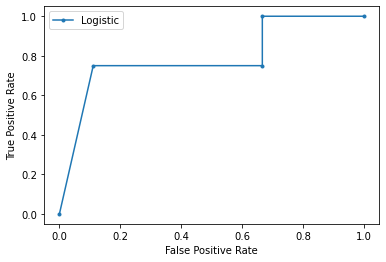

In [10]:
#Feature Selection
for n in range (1,7):
    if n == 1:
        X_new = SelectKBest(chi2, k=number_of_features).fit_transform(X, y)
        ffs = SelectKBest(chi2, k=number_of_features)
        ffs.fit(X,y)
    elif n == 2:
        X_new = SelectKBest(f_classif, k=number_of_features).fit_transform(X, y)
        ffs = SelectKBest(f_classif, k=number_of_features)
        ffs.fit(X,y)
    elif n == 3:    
        X_new = SelectKBest(mutual_info_classif, k=number_of_features).fit_transform(X, y)
        ffs = SelectKBest(mutual_info_classif, k=number_of_features)
        ffs.fit(X,y)
    elif n == 4:
        m = RFECV(RandomForestClassifier(), scoring='accuracy')
        m = m.fit(X, y)
        m.score(X, y)
        X_new = m.fit_transform(X, y)
        number_of_features = X_new.shape[1]
    elif n == 5:
        lsvc = LinearSVC().fit(X, y)
        model = SelectFromModel(lsvc, prefit=True)
        X_new = model.transform(X)
        number_of_features = X_new.shape[1]
    elif n == 6:
        clf = ExtraTreesClassifier(n_estimators=50)
        clf = clf.fit(X, y)
        model = SelectFromModel(clf, prefit=True)
        X_new = model.transform(X)
        number_of_features = X_new.shape[1]
    # create model, add dense layers one by one specifying activation function
    model = Sequential()
    model.add(Dense(32, input_dim=number_of_features, activation='relu')) # input layer requires input_dim param
    model.add(Dense(20, input_dim=number_of_features, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1

    # compile the model, adam gradient descent (optimized)
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
    
    # split X, Y into a train and test set
    x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, stratify = y)
    
    # call the function to fit to the data (training the network)
    model.fit(x_train, y_train, epochs = 5000, batch_size=10, validation_data=(x_test, y_test))
    scores = model.evaluate(x_test, y_test, batch_size=10)
    print("\n%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))
    
    #ROC score and AUC
    m1_probs = model.predict_proba(x_test)
    m1_auc = roc_auc_score(y_test, m1_probs)
    print('Model1: ROC AUC=%.3f' % (m1_auc))

    lr_fpr, lr_tpr, _ = roc_curve(y_test, m1_probs)
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    # show the plot
    plt.show()


Model1: ROC AUC=0.889


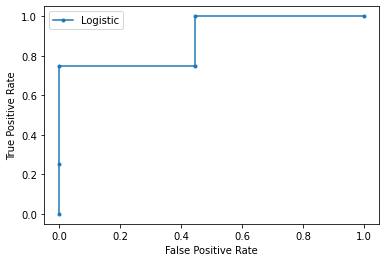

In [8]:
m1_probs = model.predict_proba(x_test)
m1_auc = roc_auc_score(y_test, m1_probs)
print('Model1: ROC AUC=%.3f' % (m1_auc))

lr_fpr, lr_tpr, _ = roc_curve(y_test, m1_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()


In [9]:
mask = ffs.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
        
new_features

['shapeMajorAxisLength',
 'firstorderSkewness',
 'firstorderMean',
 'glszmSizeZoneNonUniformity',
 'glszmLargeAreaLowGrayLevelEmphasis']

In [7]:
#Wrapper Based
m = RFECV(RandomForestClassifier(), scoring='accuracy',cv=10)
m = m.fit(X, y)
m.score(X, y)
X_new = m.fit_transform(X, y)
X_new

array([[2.18662171e-01, 2.11329080e-01, 5.21505859e-01, 7.51680008e-03],
       [3.01487257e-01, 0.00000000e+00, 5.80747001e-01, 1.22270105e-01],
       [1.00000000e+00, 6.80762134e-01, 1.00000000e+00, 5.11181206e-01],
       [2.37176185e-01, 9.37638265e-01, 4.96732496e-01, 5.77101608e-04],
       [2.61237915e-01, 3.53067341e-01, 5.73634385e-01, 4.56364578e-03],
       [3.69115050e-02, 7.97635021e-01, 4.33396858e-01, 2.77244815e-02],
       [1.79303912e-01, 3.96918152e-01, 4.61765158e-01, 1.00727708e-02],
       [2.60177019e-01, 8.59751577e-01, 6.13223849e-01, 6.45617173e-01],
       [2.51066251e-01, 6.92431318e-01, 5.15408684e-01, 4.73556938e-03],
       [2.05779531e-01, 6.38603194e-01, 4.99336956e-01, 5.20306174e-02],
       [1.24803494e-01, 6.72428320e-01, 4.48576261e-01, 1.08961143e-02],
       [2.35220462e-01, 4.66940569e-01, 5.41188452e-01, 1.52145439e-01],
       [2.34135308e-01, 8.78279372e-01, 4.52401519e-01, 1.25831906e-03],
       [2.41507310e-01, 7.58421823e-01, 4.21638880e

In [11]:
mask = m.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
        
new_features
X_new.shape

(61, 4)

In [47]:
X_new.shape

NameError: name 'SelectFromModel' is not defined

In [31]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
X_new =sel.fit_transform(X,y)
sel.get_support()
X_new.shape[1]

37

In [35]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape               

(61, 39)